### Prediction - prediction scatterplots - n choose r - Binomial Coefficient

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
def aggregate_predsV2(fold_predsFile):
    fold_preds = pd.read_csv(fold_predsFile+"/preds.csv")
    aggregate_pred = fold_preds['0']
    acc = [None] * 10
    mse = [None] * 10
    for i in range(0,10):
        acc[i] = accuracy_score(fold_preds[str(i)].round().astype("int"), y_true.age)
        mse[i] = mean_squared_error(fold_preds[str(i)], y_true.age)
        if i >= 1:
            aggregate_pred += fold_preds[str(i)]

    aggregate_pred = aggregate_pred/10.0    
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), y_true.age)
    mse_mean = mean_squared_error(aggregate_pred, y_true.age)
    print(fold_predsFile+ ":\t\t\t\t"+str(acc_mean) + " " + str(mse_mean))
    return acc, acc_mean, mse, mse_mean, aggregate_pred, fold_preds

def aggregate_predsV1(fold_predsFile):
    t = [None] * 10
    for i in range(0,10):
        t[i] = pd.read_csv(fold_predsFile+"/test_set_"+str(i)+".csv") 
    
    acc = [None] * 10
    mse = [None] * 10
    aggregate_pred = t[0].y_pred_test.values
    for i in range(0,10):
        acc[i] = accuracy_score(t[i].y_pred_test.values.round().astype("int"), t[0].y_true)
        mse[i] = mean_squared_error(t[i].y_pred_test.values, t[0].y_true)
        if i >= 1:
            aggregate_pred += t[i].y_pred_test.values

    aggregate_pred = aggregate_pred/10.0
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), t[0].y_true)
    mse_mean = mean_squared_error(aggregate_pred, t[0].y_true)
    print(fold_predsFile[-38:]+":\t\t"+str( acc_mean ) + " "+ str( mse_mean ) ) 
    return acc, acc_mean, mse, mse_mean, aggregate_pred, t
    
y_true = pd.read_csv("EFFNetV2_m_MLP_all/test_set_files.csv")

print("aggregate accuracy, mse")

lMinAcc, lMinAccMean, lMinMSE, lMinMSEMean, l_min, l_i = aggregate_predsV2( "EFFNetV2_l_min_mse" )
lMiddleAcc, lMiddleAccMean, lMiddleMSE, lMiddleMSEMean, l_middle, l_d = aggregate_predsV2( "EFFNetV2_l_middle_mse" )
lMaxAcc, lMaxAccMean, lMaxMSE, lMaxMSEMean, l_max, l_x = aggregate_predsV2( "EFFNetV2_l_max_mse" )
lAllAcc, lAllAccMean, lAllMSE, lAllMSEMean, l_all, l_a = aggregate_predsV2( "EFFNetV2_l_all_mse" )

mMinAcc, mMinAccMean, mMinMSE, mMinMSEMean, m_min, m_i = aggregate_predsV2( "EFFNetV2_m_min_mse" )
mMiddleAcc, mMiddleAccMean, mMiddleMSE, mMiddleMSEMean, m_middle, m_d = aggregate_predsV2( "EFFNetV2_m_middle_mse" )
mMaxAcc, mMaxAccMean, mMaxMSE, mMaxMSEMean, m_max, m_x = aggregate_predsV2( "EFFNetV2_m_max_mse" )
mAllAcc, mAllAccMean, mAllMSE, mAllMSEMean, m_all, m_a = aggregate_predsV2( "EFFNetV2_m_MLP_all" )

B4MinAcc, B4MinAccMean, B4MinMSE, B4MinMSEMean, b4_min, b4_i = aggregate_predsV1( "tf_EFFNetB4_groupkfold_stdScalar_10_test2" )
B4MiddleAcc, B4MiddleAccMean, B4MiddleMSE, B4MiddleMSEMean, b4_middle, b4_d = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_middle" )
B4MaxAcc, B4MaxAccMean, B4MaxMSE, B4MaxMSEMean, b4_max, b4_x = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_max" )

B5MinAcc, B5MinAccMean, B5MinMSE, B5MinMSEMean, b5_min, b5_i = aggregate_predsV1( "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min" )
B5MiddleAcc, B5MiddleAccMean, B5MiddleMSE, B5MiddleMSEMean, b5_middle, b5_d = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_middle" )
B5MaxAcc, B5MaxAccMean, B5MaxMSE, B5MaxMSEMean, b5_max, b5_x = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_max" )

B6MinAcc, B6MinAccMean, B6MinMSE, B6MinMSEMean, b6_min, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_min" )
B6MiddleAcc, B6MiddleAccMean, B6MiddleMSE, B6MiddleMSEMean, b6_middle, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle" )
B6MaxAcc, B6MaxAccMean, B6MaxMSE, B6MaxMSEMean, b6_max, b6_x = aggregate_predsV1( "EFFNetB6_groupkfold_stdScalar_10_test_max" )

#all_cnns = l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_middle,b6_min,b6_middle,b6_max
all_cnns = b4_min, b5_min, b6_min, m_min, l_min, b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all
all_cnns2 = np.asarray([all_cnns])
all_acc = np.zeros((len(all_cnns),len(all_cnns)))
all_mse = np.zeros((len(all_cnns),len(all_cnns)))

aggregate accuracy, mse
EFFNetV2_l_min_mse:				0.7203883495145631 0.27984743881004925
EFFNetV2_l_middle_mse:				0.7281553398058253 0.2749396896282028
EFFNetV2_l_max_mse:				0.7242718446601941 0.28599091634838775
EFFNetV2_l_all_mse:				0.7223300970873786 0.27061980996288926
EFFNetV2_m_min_mse:				0.7398058252427184 0.2733061445705727
EFFNetV2_m_middle_mse:				0.7223300970873786 0.2753004481257845
EFFNetV2_m_max_mse:				0.7126213592233009 0.2891016447191845
EFFNetV2_m_MLP_all:				0.7398058252427184 0.2728000533332227
EFFNetB4_groupkfold_stdScalar_10_test2:		0.7281553398058253 0.27677442836796534
EFFNetB4_groupkfold_stdScalar_middle:		0.7145631067961165 0.2847701138075624
EFFNetB4_groupkfold_stdScalar_max:		0.7087378640776699 0.2908639084032022
tB5_2_groupkfold_stdScalar_10_test_min:		0.7436893203883496 0.2770159431240281
B5_groupkfold_stdScalar_10_test_middle:		0.7339805825242719 0.2731098431413754
NetB5_groupkfold_stdScalar_10_test_max:		0.7320388349514563 0.3587137165456544
NetB6_group

### Correlation matrix - using Pearson, Spearman and Kendals Tau correlation

In [19]:
a = np.matrix('1 2; 3 4')
a.shape
#pd.DataFrame(a)

(2, 2)

Pearson


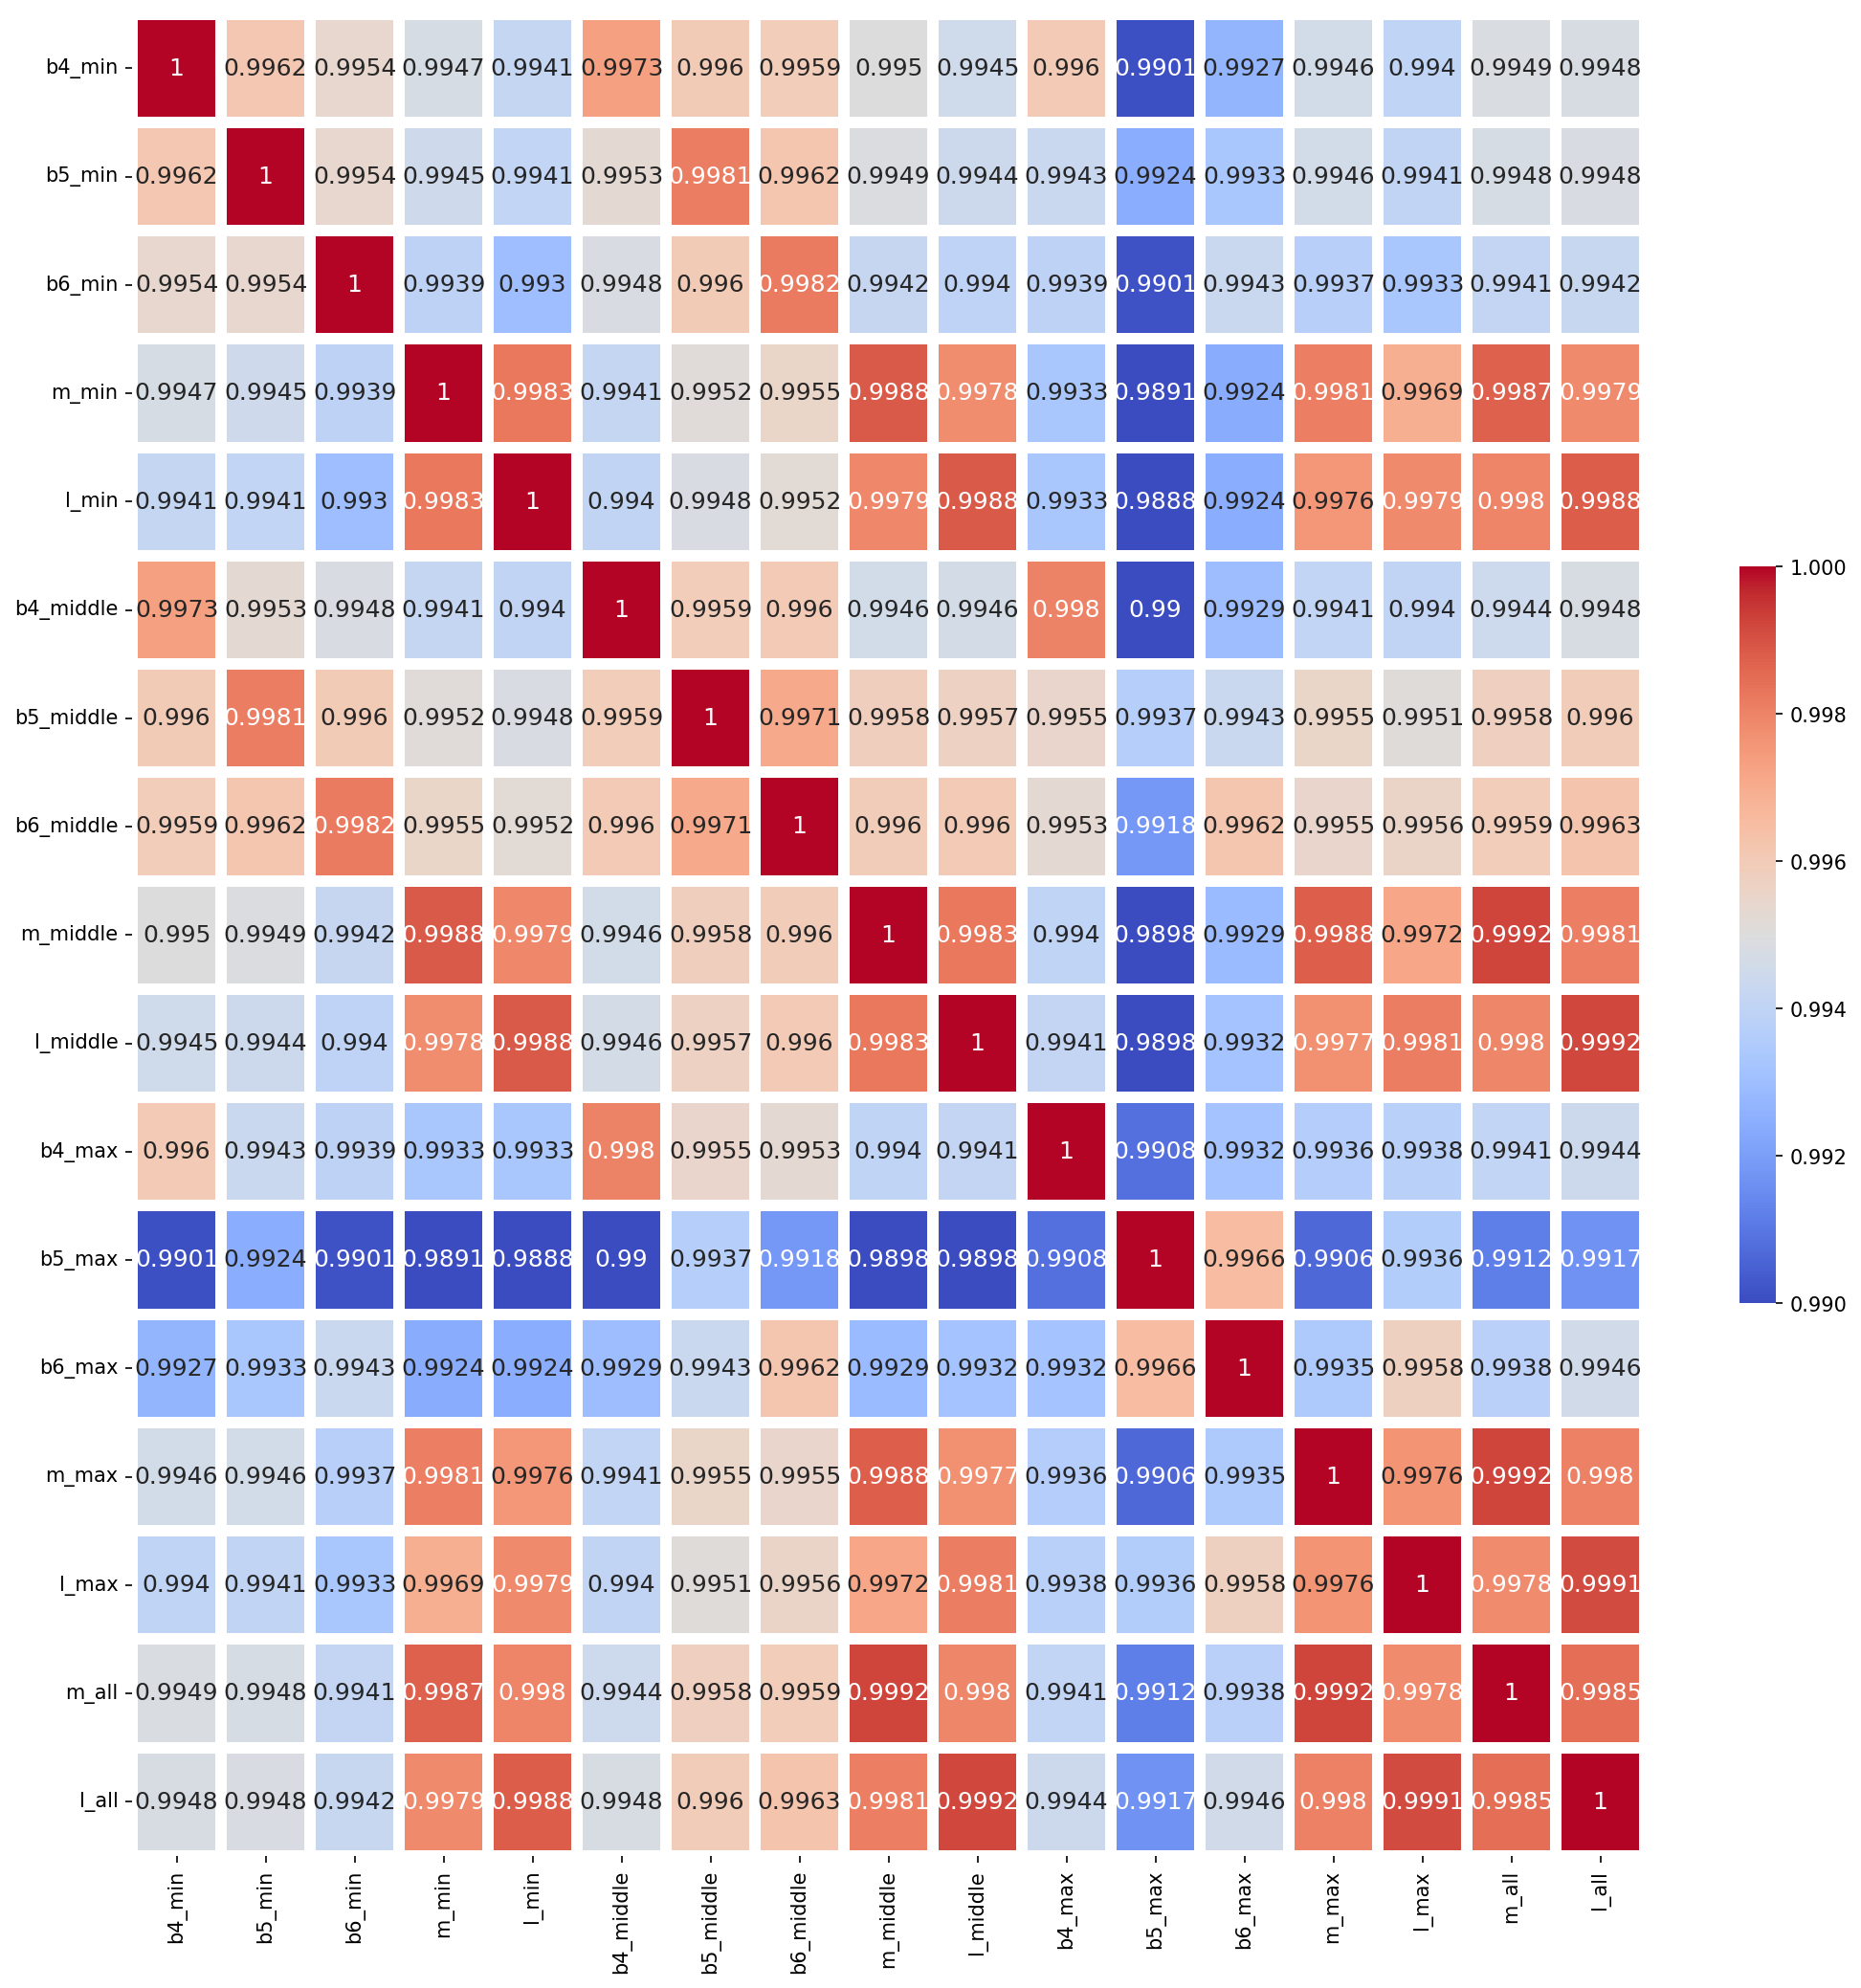

Spearman


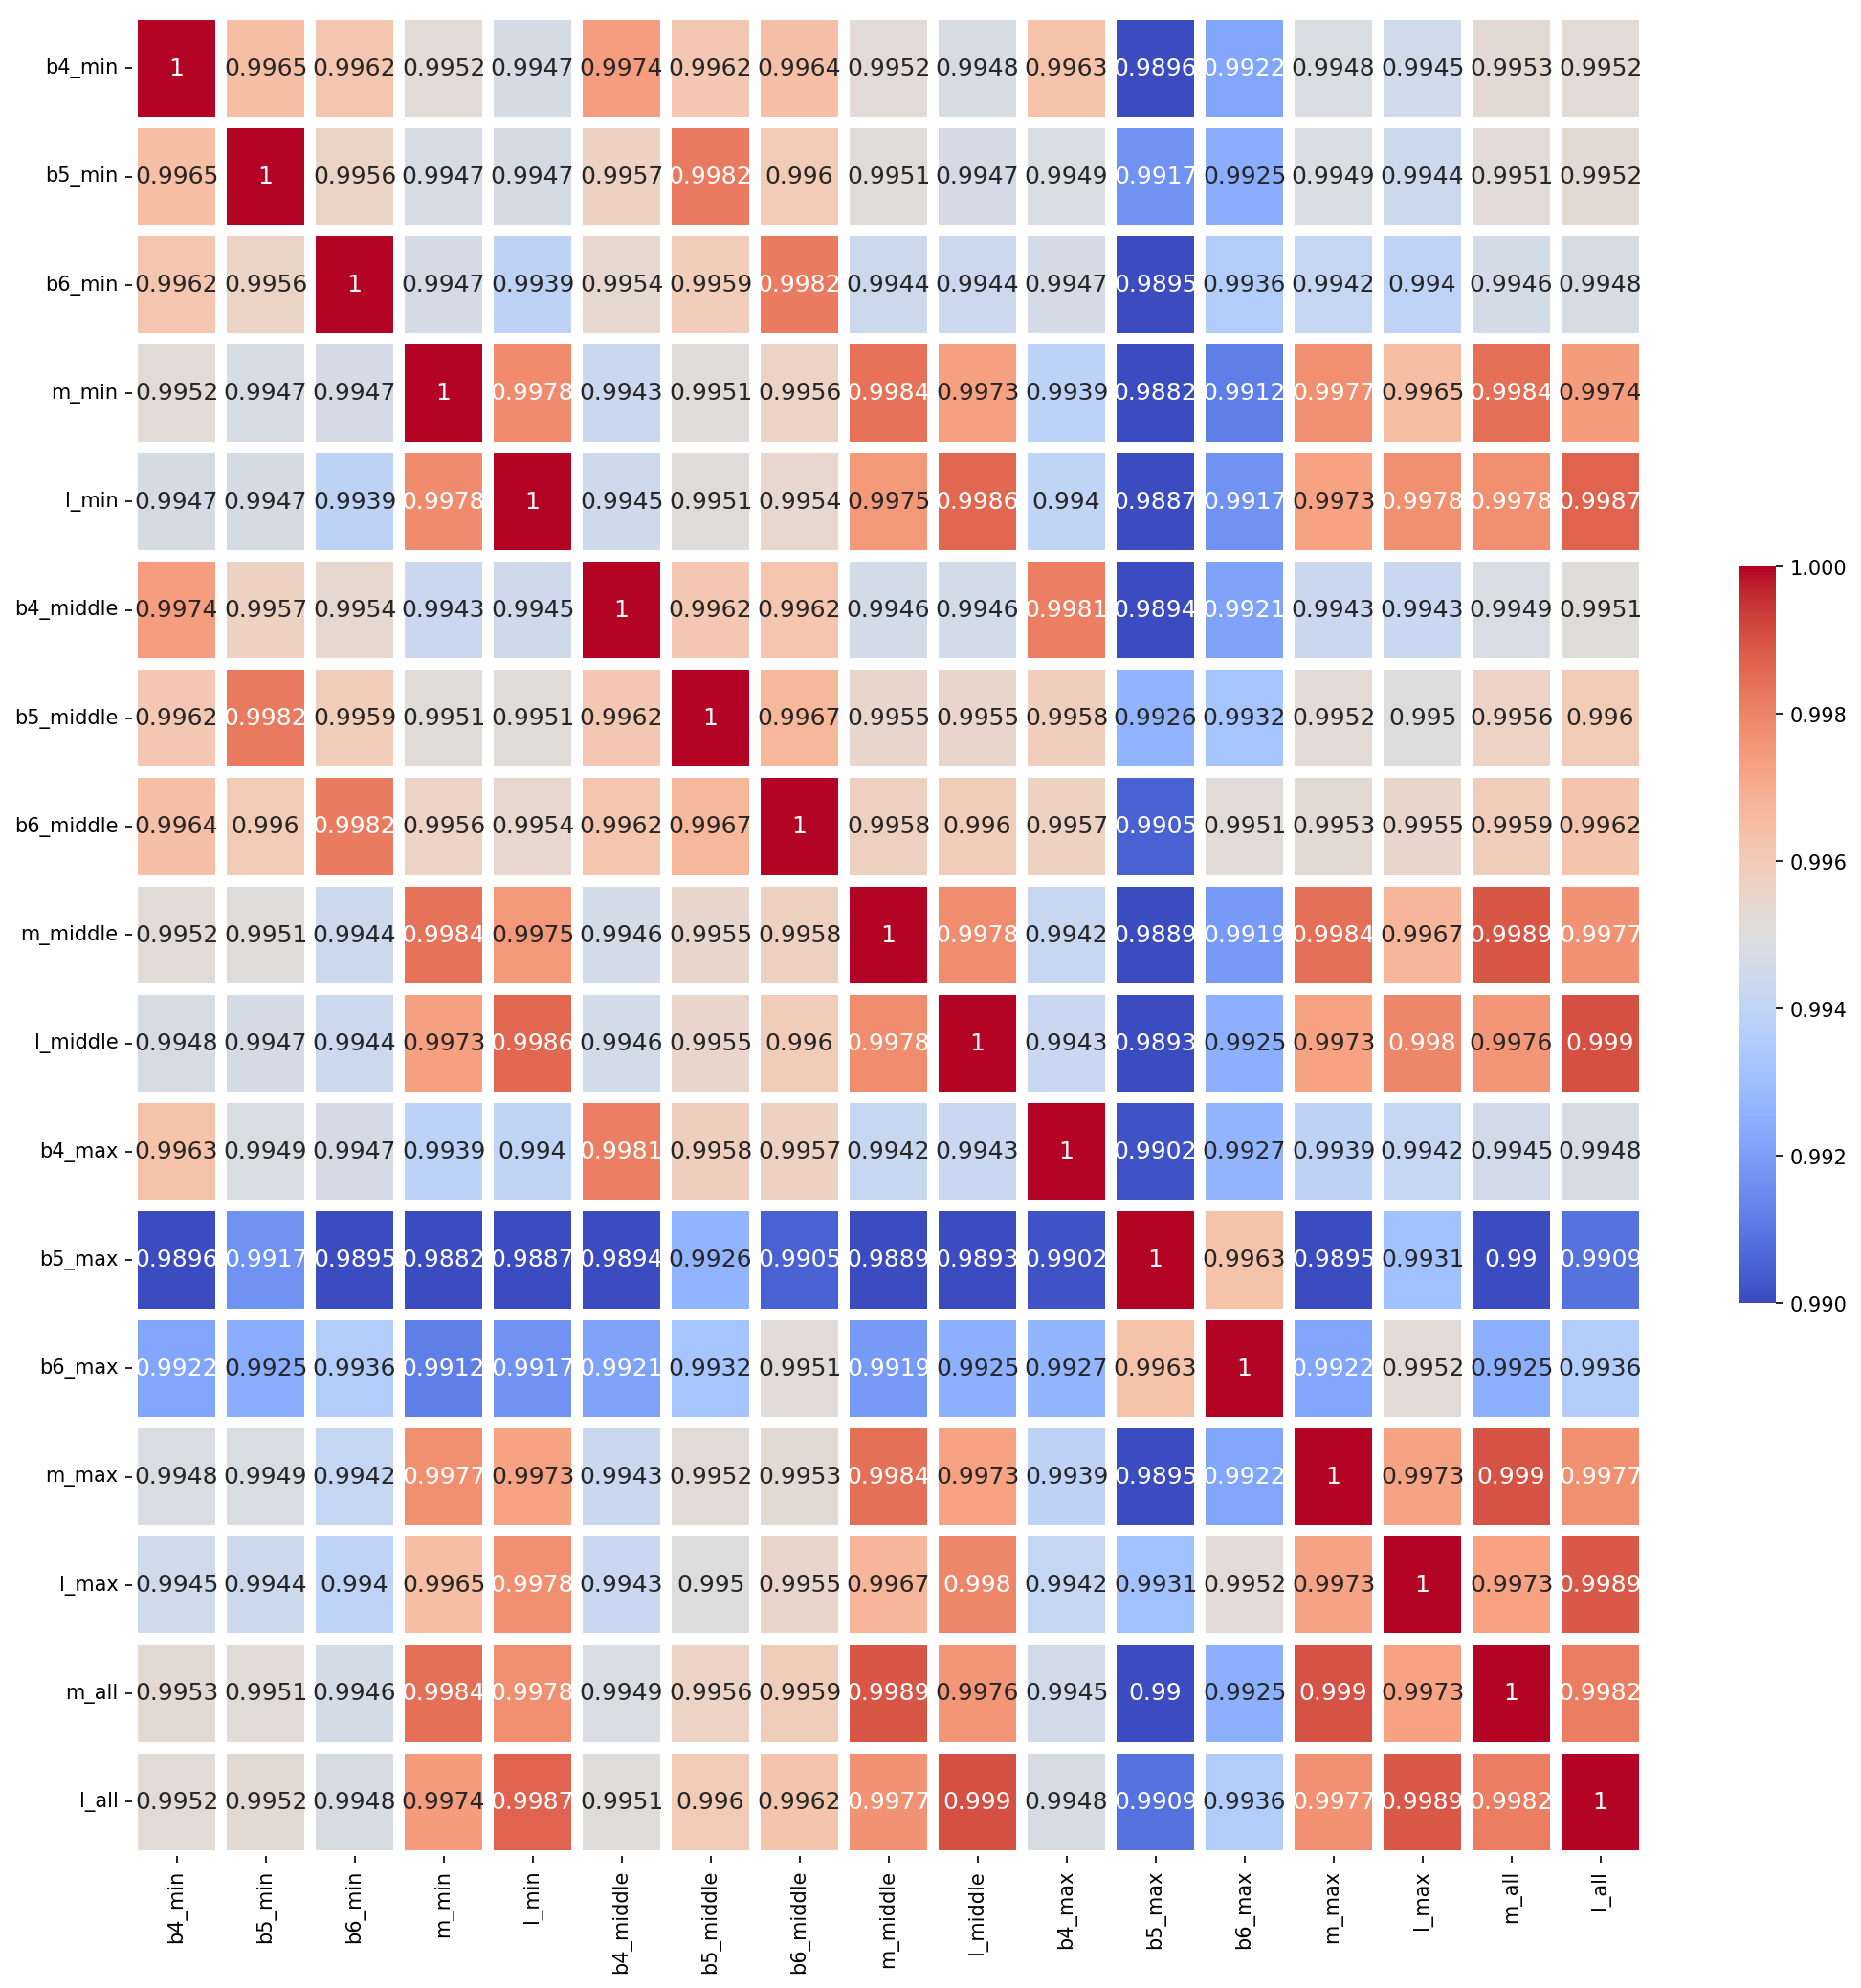

Kendals Tau


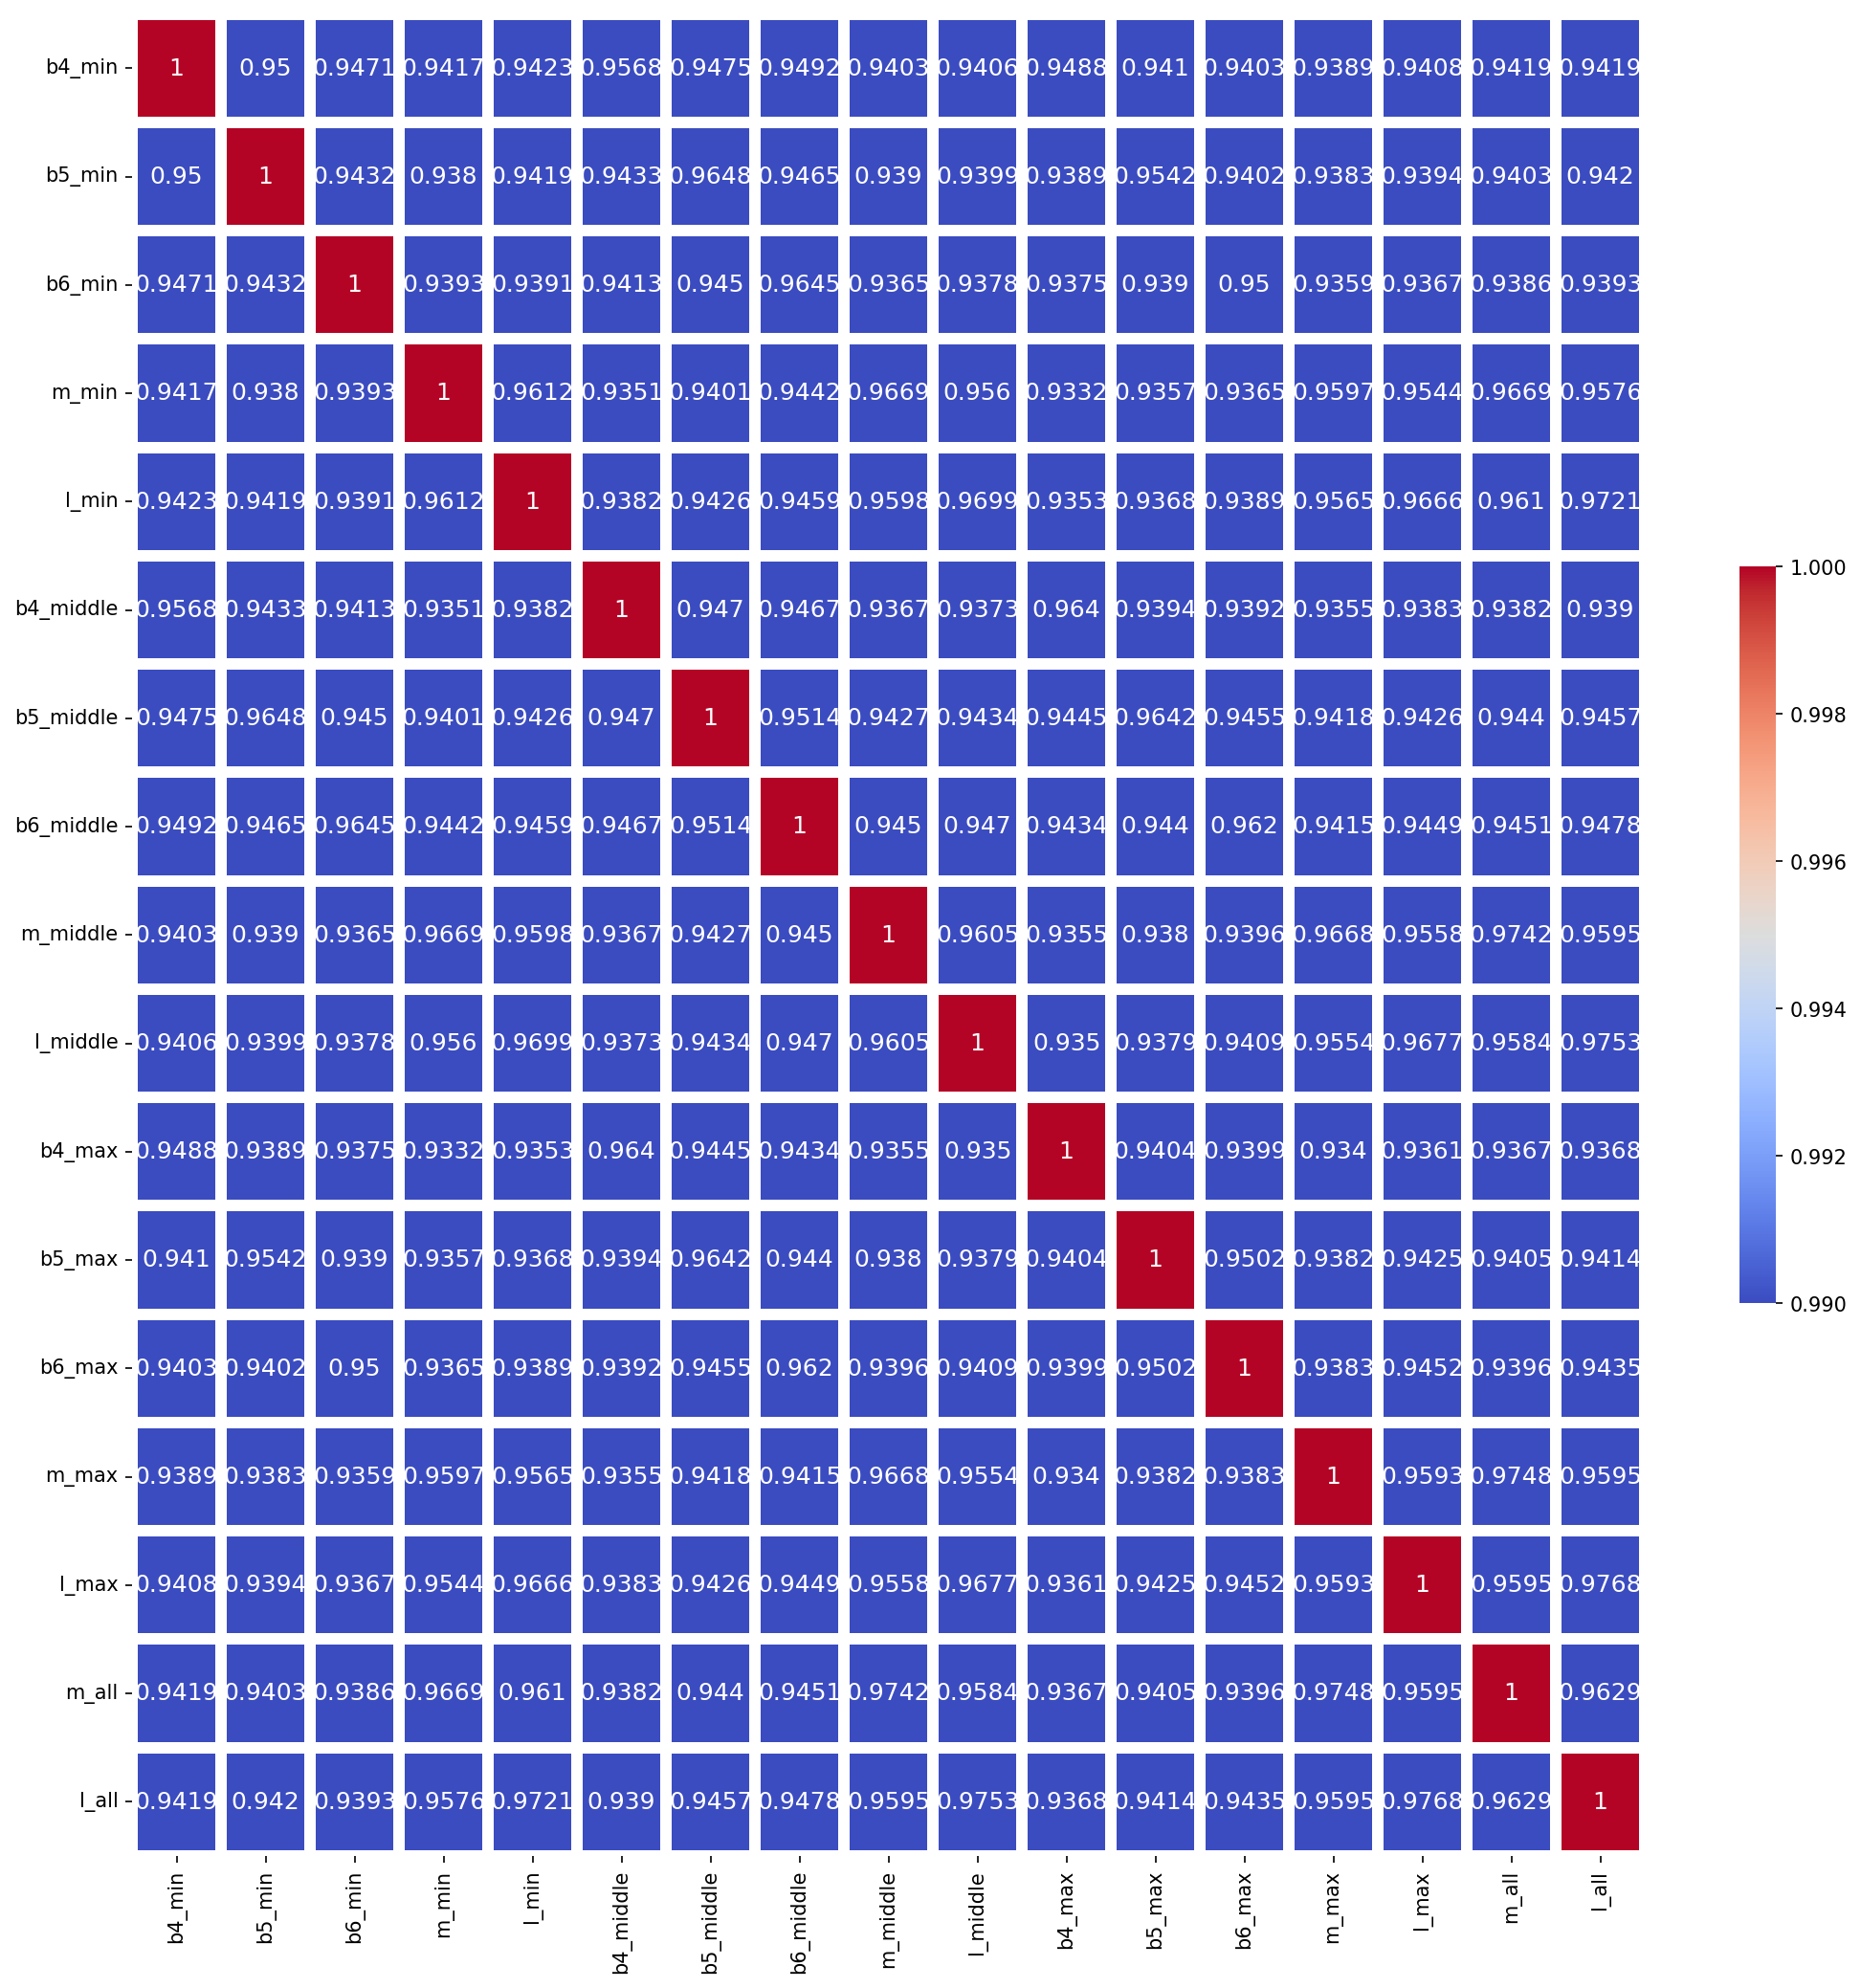

In [5]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import seaborn as sns

all = all_cnns#[l_all.values.tolist(),l_middle.values.tolist(),m_min.values.tolist(),m_middle.values.tolist(),m_max.values.tolist(),m_all.values.tolist(),b4_min.values.tolist(),b4_middle.values.tolist(),b4_max.values.tolist(),b5_min.values.tolist(),b6_min.values.tolist(),b6_middle.values.tolist(),b6_max.values.tolist()]

corr_matrix1 = np.empty((len(all), len(all)))
corr_matrix2 = np.empty((len(all), len(all)))
corr_matrix3 = np.empty((len(all), len(all)))
for i in range(0,len(all)):
    data1 = all[i]
    for j in range(0, len(all)):
        data2 = all[j]
        corr1, _ = pearsonr(data1, data2)
        corr2, _ = spearmanr(data1, data2)
        corr3, _ = kendalltau(data1, data2)
        corr_matrix1[i, j] = corr1
        corr_matrix2[i, j] = corr2
        corr_matrix3[i, j] = corr3

column_names = ['b4_min', 'b5_min', 'b6_min', 'm_min', 'l_min', 'b4_middle', 'b5_middle', 'b6_middle', 'm_middle', 'l_middle', 'b4_max', 
    'b5_max', 'b6_max', 'm_max', 'l_max', 'm_all', 'l_all']
#column_names = ['l_all','l_middle','m_min','m_middle','m_max','m_all','b4_min','b4_middle','b4_max','b5_min','b6_min','b6_middle','b6_max']
corr_matrix1 = pd.DataFrame(corr_matrix1)
corr_matrix1.columns = column_names
corr_matrix2 = pd.DataFrame(corr_matrix2)
corr_matrix2.columns = column_names
corr_matrix3 = pd.DataFrame(corr_matrix3)
corr_matrix3.columns = column_names

def plotCorrelation(corr_matrix):
    f, ax = plt.subplots(figsize=(17, 17))
    
    heatmap = sns.heatmap(corr_matrix,
                          #mask = mask,
                          square = False,
                          linewidths = 5,
                          cmap = "coolwarm",
                          cbar_kws = {'shrink': .4
                                      ,
                                    "ticks" : [0.99, 0.992, 0.994, 0.996, 0.998, 1]},
                          vmin = 0.99,
                          vmax = 1,
                          annot = True,
                          annot_kws = {"size": 12},
                          fmt='.4g')

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    plt.show()
  
print("Pearson")
plotCorrelation(corr_matrix1)
print("Spearman")
plotCorrelation(corr_matrix2)
print("Kendals Tau")
plotCorrelation(corr_matrix3)

### Cluster analysis
#### 1. hierarchical clustering
#### 2. DBSCAN Clustering (Density-Based Spatial Clustering of Applications with Noise)

In [17]:
#Function to plot the correlation matrix of a dataframe.
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

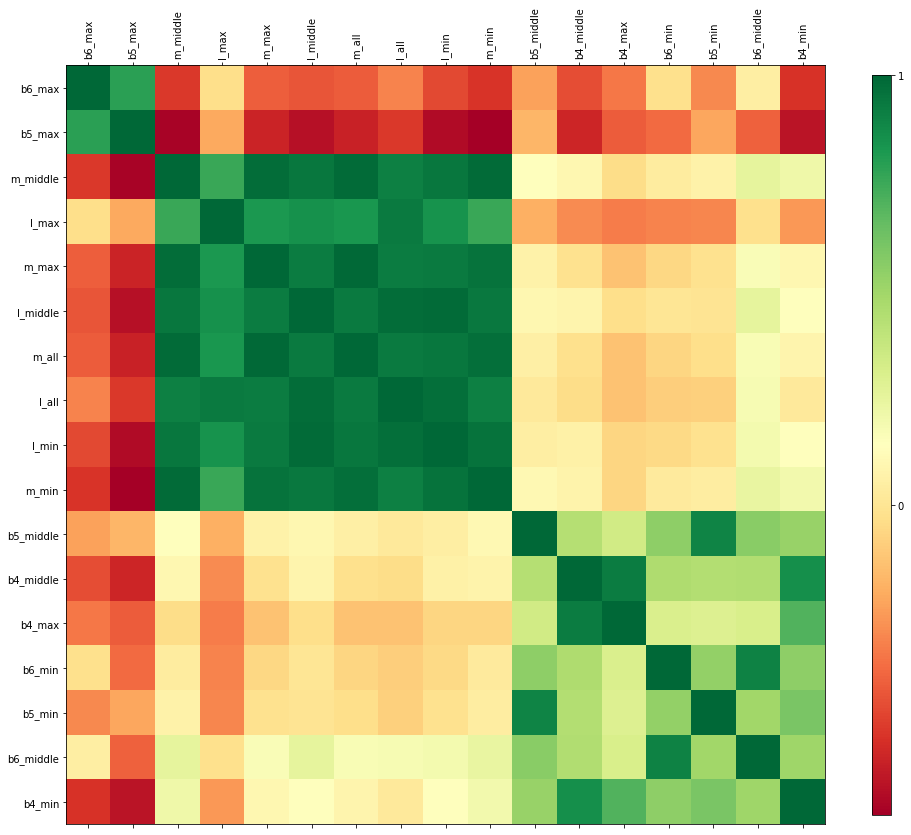

In [18]:
# hierarchical clustering

import scipy
import scipy.cluster.hierarchy as sch

df = pd.DataFrame(corr_matrix1, columns=column_names)
X = corr_matrix1
d = sch.distance.pdist(X)   # vector of ('17' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)

plot_corr(df, size=17)

Index(['b4_min', 'b5_min', 'b6_min', 'm_min', 'l_min', 'b4_middle',
       'b5_middle', 'b6_middle', 'm_middle', 'l_middle', 'b4_max', 'b5_max',
       'b6_max', 'm_max', 'l_max', 'm_all', 'l_all'],
      dtype='object')


<ipython-input-36-b927b8d574c3>:5: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  scipy.randn(100,2)


(array([26, 30, 11], dtype=int32), array([1, 2, 3], dtype=int32))

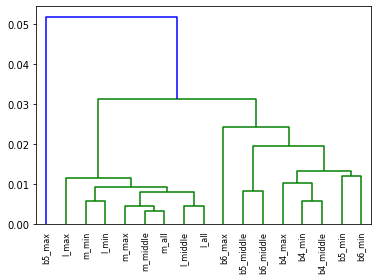

In [36]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

scipy.randn(100,2)
df = pd.DataFrame(corr_matrix1, columns=column_names)

df = df.set_index(df.columns)
print(df.index)
d = sch.distance.pdist(corr_matrix1, metric='canberra') #Pairwise distances between observations in n-dimensional space.
#d = sch.distance.cdist(corr_matrix1, metric='chebyshev') #Compute distance between each pair of the two collections of inputs.
Z = sch.linkage(d, method='complete') #Perform hierarchical/agglomerative clustering.
#P = sch.dendrogram(Z) #Plot the hierarchical clustering as a dendrogram.
P = sch.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

#plt.savefig('plot_dendrogram.png')

T = sch.fcluster(Z, 0.5*d.max(), 'distance')

sch.leaders(Z,T)


In [67]:
#dbscan
corr = corr_matrix1
from sklearn.cluster import DBSCAN

# Creating DBSCAN object and defining clusters for each data point
# NOTE: Noise points (outliers) are assigned to "cluster -1"

#dbscan = DBSCAN(min_samples=20, eps=2.4)
#dbscan_defined_clusters = dbscan.fit_predict(corr) # Also using the exclusively numeric dataset

# Evaluating clusters created by DBSCAN
#print(dbscan_defined_clusters)
#silhouette_dbscan = silhouette_score(corr, dbscan_defined_clusters)
#print("DBSCAN: for eps = 2.4 and min_samples = 20, the average silhouette_score is", silhouette_dbscan)

In [42]:
# K-means elbow-, silhouette-method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores
corr = corr_matrix1

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(corr)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(corr, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


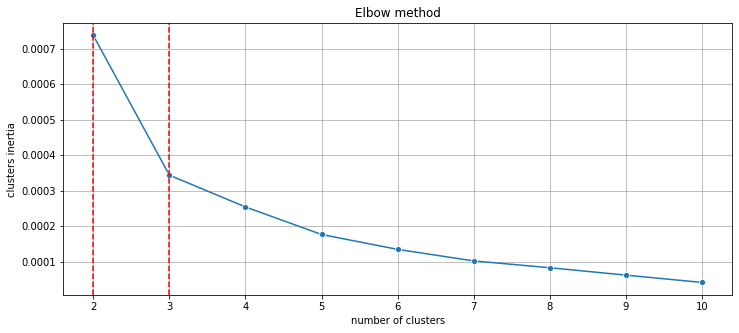

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(2, ls="--", c="red")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


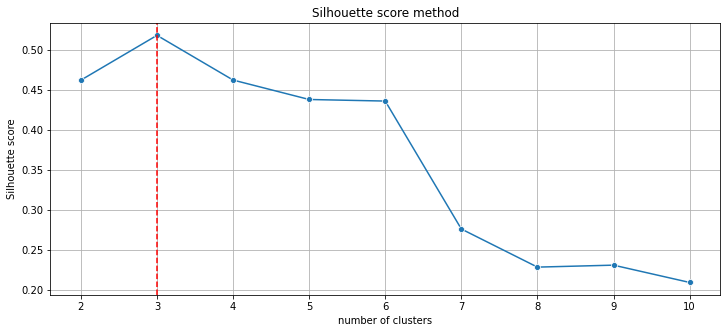

In [47]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

### 3 clusters

In [64]:
KM_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(corr) # initialise and fit K-Means model

KM3_clustered = corr.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ 
KM3_clustered.Cluster.sort_values()

0     0
1     0
2     0
5     0
6     0
7     0
10    0
14    1
13    1
8     1
15    1
4     1
3     1
9     1
16    1
11    2
12    2
Name: Cluster, dtype: int32

c:\users\endre\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Age` for parameter `x`

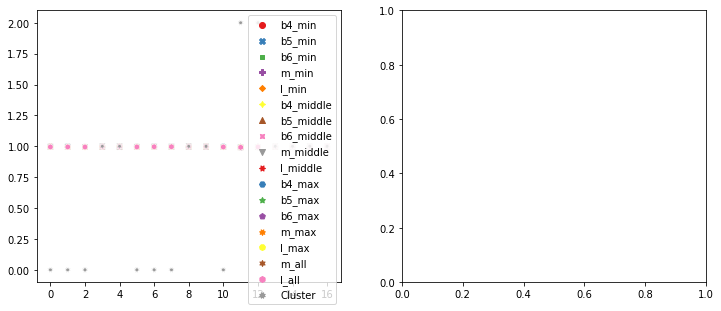

In [58]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

#print(KM3_clustered)
scat_1 = sns.scatterplot(data=KM3_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM3_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_3_clusters.cluster_centers_[:,1],KM_3_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_3_clusters.cluster_centers_[:,0],KM_3_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

### distribution of residual error

In [25]:
len(df_values)

78795

/home/endrem/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/endrem/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/endrem/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

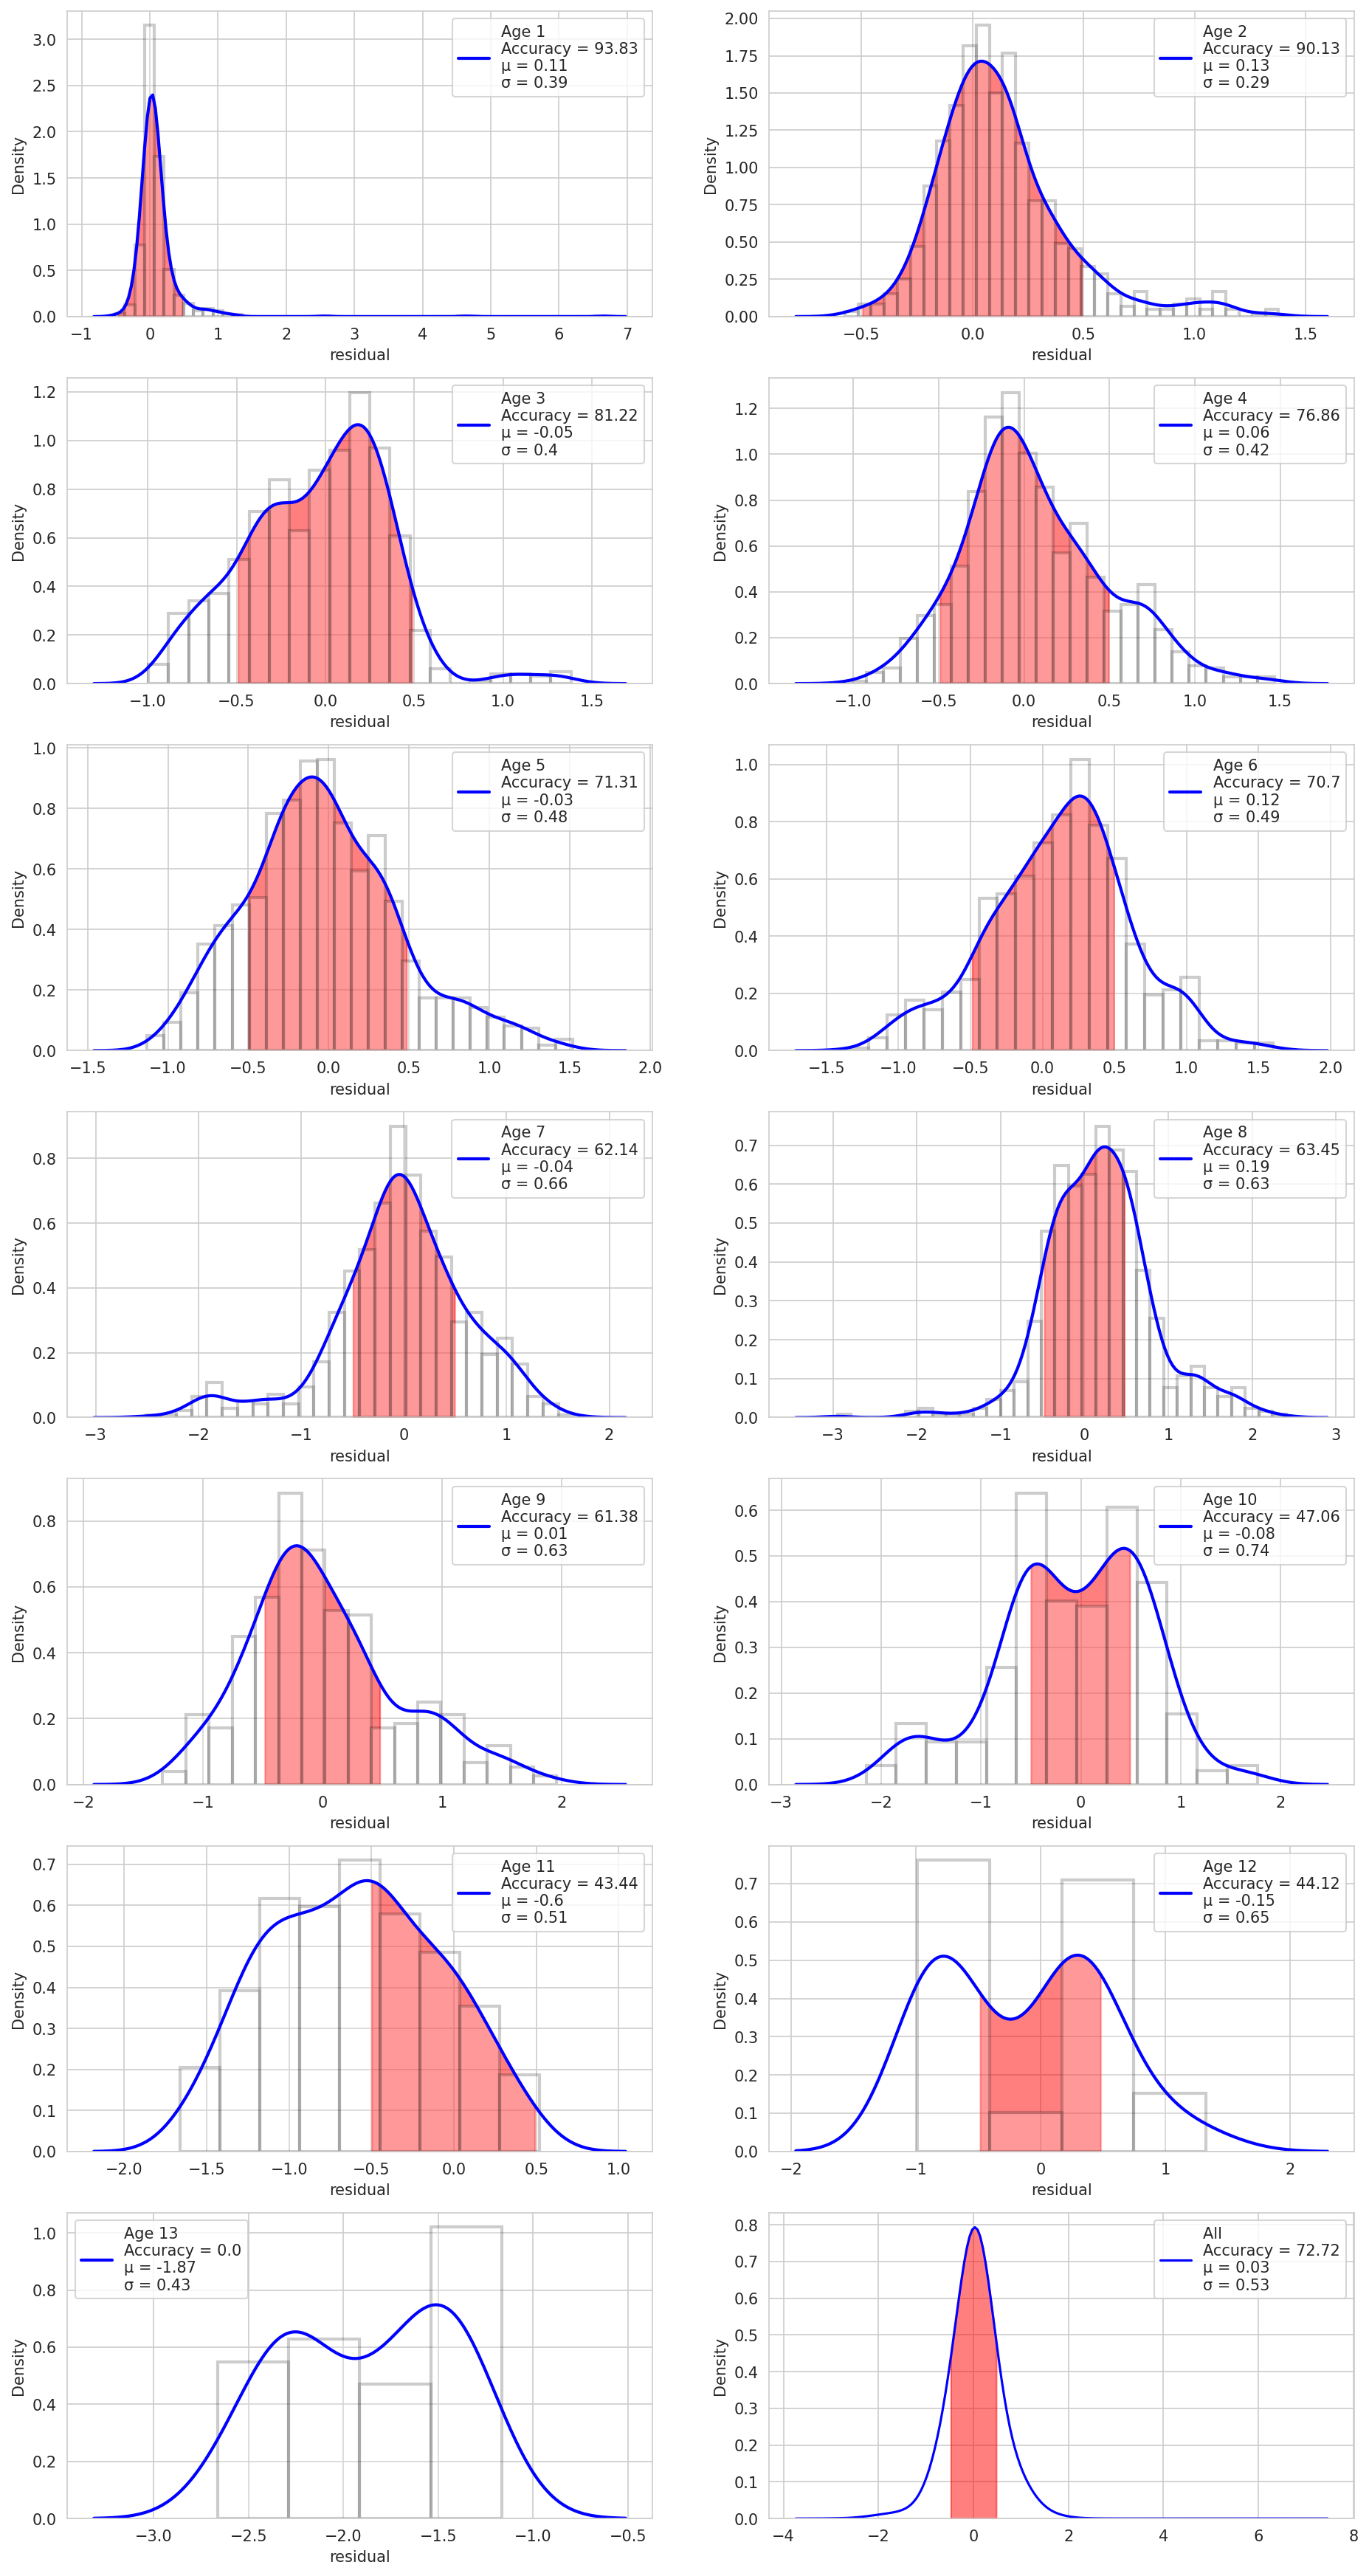

      b4_min    b5_min    b6_min     m_min     l_min  b4_middle  b5_middle  \
1   0.038359  0.067816  0.138330  0.133341  0.060026   0.046059   0.082948   
2   0.144490  0.166186  0.170384  0.100707  0.123926   0.107236   0.116626   
3  -0.027522 -0.004292 -0.054786 -0.044407 -0.048271  -0.065453  -0.037412   
4   0.076545  0.098897  0.067724  0.067387  0.056083   0.036216   0.134196   
5  -0.008701 -0.009225 -0.022710  0.003796 -0.027547  -0.041998  -0.022592   
6   0.175534  0.133873  0.162954  0.082296  0.078243   0.176304   0.176518   
7   0.043243  0.015354  0.014372 -0.086433 -0.122146   0.025454   0.048465   
8   0.268529  0.252404  0.180126  0.141749  0.110446   0.205997   0.276467   
9   0.106024  0.193314  0.122747 -0.112262 -0.170262   0.116939   0.202417   
10  0.011033  0.062114 -0.097354 -0.111930 -0.218188   0.045200   0.146067   
11 -0.413648 -0.427068 -0.535252 -0.664285 -0.787640  -0.438826  -0.392821   
12  0.299193 -0.078106  0.010263 -0.287717 -0.350509   0.351261 

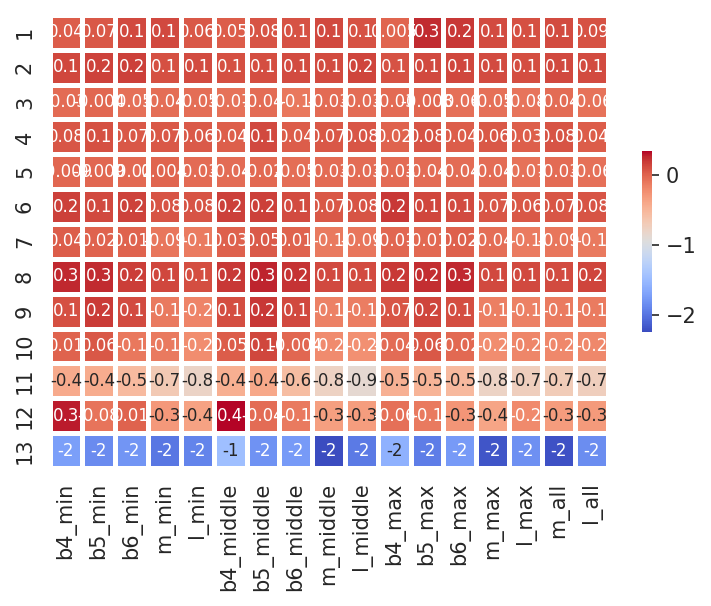

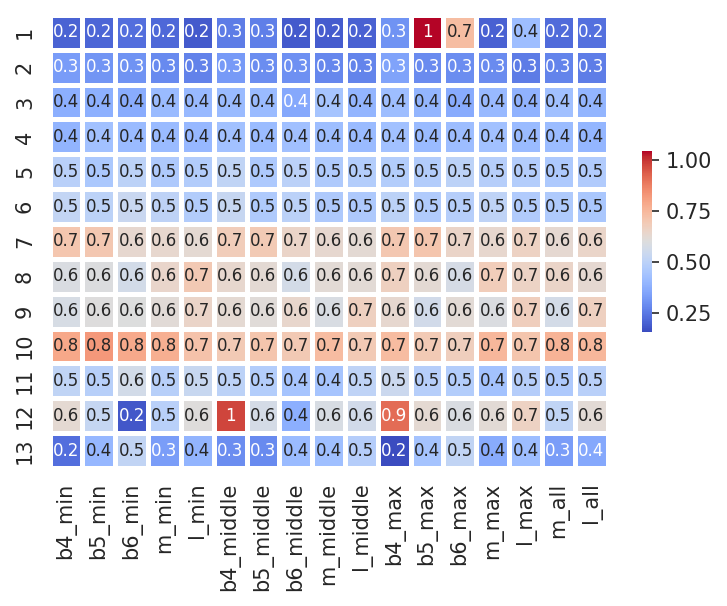

In [62]:
import numpy as np
import seaborn as sns
from scipy.stats import norm 

#df_all = [l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max]
df_all = [b4_min, b5_min, b6_min, m_min, l_min, b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all]
figure, axes = plt.subplots(7,2, figsize=(15,30)) 
plt.rcParams['figure.dpi'] = 150

df_values = np.array([])
weight_acc = np.zeros(13)
weights = np.zeros(13)

mu_matrix = pd.DataFrame(0, index=np.arange(1, 14), columns=column_names)
std_matrix = pd.DataFrame(0, index=np.arange(1, 14), columns=column_names)
for j in range(1, 14):
    sns.set_style('whitegrid')
    age1 = np.array([])
    for i in range(0,len(all)):
        data1 = df_all[i]
        age1 = np.append( age1, data1[y_true.age==j] )
        df_values = np.append(df_values, age1 -j)
        
        mu_age, std_age = norm.fit(data1[y_true.age==j]-j) #returns location scale
        #mu_age = str(round(mu_age, 2))
        ##std_age = str(round(std_age, 2))
        mu_matrix.iloc[j-1, i] = mu_age
        std_matrix.iloc[j-1, i] = std_age

    acc = accuracy_score(age1.round(), np.repeat(j, len(age1) ))
    acc = acc * 100
    weight_acc[j-1] = acc
    
    acc = str(round(acc, 2))
    mu, std = norm.fit(age1-j) #returns location scale
    mu = str(round(mu, 2))
    std = str(round(std, 2))
    
    weights[j-1] = len(age1)
    
    age1 = age1 - j
    #theAx = sns.kdeplot(age1, bw_method=0.5, ax=axes[(j-1)//2, (j-1)%2], label='Age '+str(j)+
    #            '\nAccuracy = '+str(acc)+
    #            '\n\u03BC = '+str(mu)+ #mu
    #            '\n\u03C3 = '+str(std)) #sigma
    sns.distplot(age1, ax=axes[(j-1)//2, (j-1)%2],
                 hist_kws={"alpha":0.2, "color":"white", "edgecolor":"black", "linewidth":2}, 
                 #color="w",
                 fit_kws={"color":"black"},
                 kde_kws={"color": "blue", "lw": 2, "label": 'Age '+str(j)+
                 '\nAccuracy = '+str(acc)+
                 '\n\u03BC = '+str(mu)+ #mu
                 '\n\u03C3 = '+str(std) #sigma)
                         })
    
    axes[(j-1)//2, (j-1)%2].set_xlabel('residual')
    axes[(j-1)//2, (j-1)%2].legend()
    
    l1 = axes[(j-1)//2, (j-1)%2].lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]

    cond = np.where( (x1 > -0.5) & (x1 < 0.5) )
    x1 = x1[cond]
    y1 = y1[cond]
    
    axes[(j-1)//2, (j-1)%2].fill_between(x1, y1, color="red", alpha=0.5)
    


mu, std = norm.fit(df_values) #returns location scale
mu = str(round(mu, 2))
std = str(round(std, 2))

new_weights = (weights/13) / (np.sum(weights)/13)
acc = 0
for i in range(0,13):
    acc += weight_acc[i]*new_weights[i]

acc = str(round(acc, 2))
sns.kdeplot(df_values, bw_method=0.5, ax=axes[6,1], color="blue",label='All '+
                '\nAccuracy = '+str(acc)+
                '\n\u03BC = '+str(mu)+ #mu
                '\n\u03C3 = '+str(std)) #sigma


l1 = axes[6, 1].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

cond = np.where( (x1 > -0.5) & (x1 < 0.5) )
x1 = x1[cond]
y1 = y1[cond]
axes[6, 1].fill_between(x1, y1, color="red", alpha=0.5)
axes[6, 1].legend()
plt.show()    

#print(mu_matrix.to_markdown()) 
#print("********")
#print(std_matrix.to_markdown()) 

print(mu_matrix)
heatmap = sns.heatmap(mu_matrix,
                      #mask = mask,
                      square = False,
                      linewidths = 1.5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4},
                      #          "ticks" : [0.99, 0.992, 0.994, 0.996, 0.998, 1]},
                      #vmin = 0.99,
                      #vmax = 1,
                      annot = True,
                      annot_kws = {"size": 8},
                      fmt='.1g')
#sns.heatmap(mu_matrix)
plt.show()
heatmap = sns.heatmap(std_matrix,
                      #mask = mask,
                      square = False,
                      linewidths = 1.5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4},
                      #          "ticks" : [0.99, 0.992, 0.994, 0.996, 0.998, 1]},
                      #vmin = 0.99,
                      #vmax = 1,
                      annot = True,
                      annot_kws = {"size": 8},
                      fmt='.1g')
plt.show()

#plt.show() #B6 max is weird

### Scatter plot of result x result pr age 

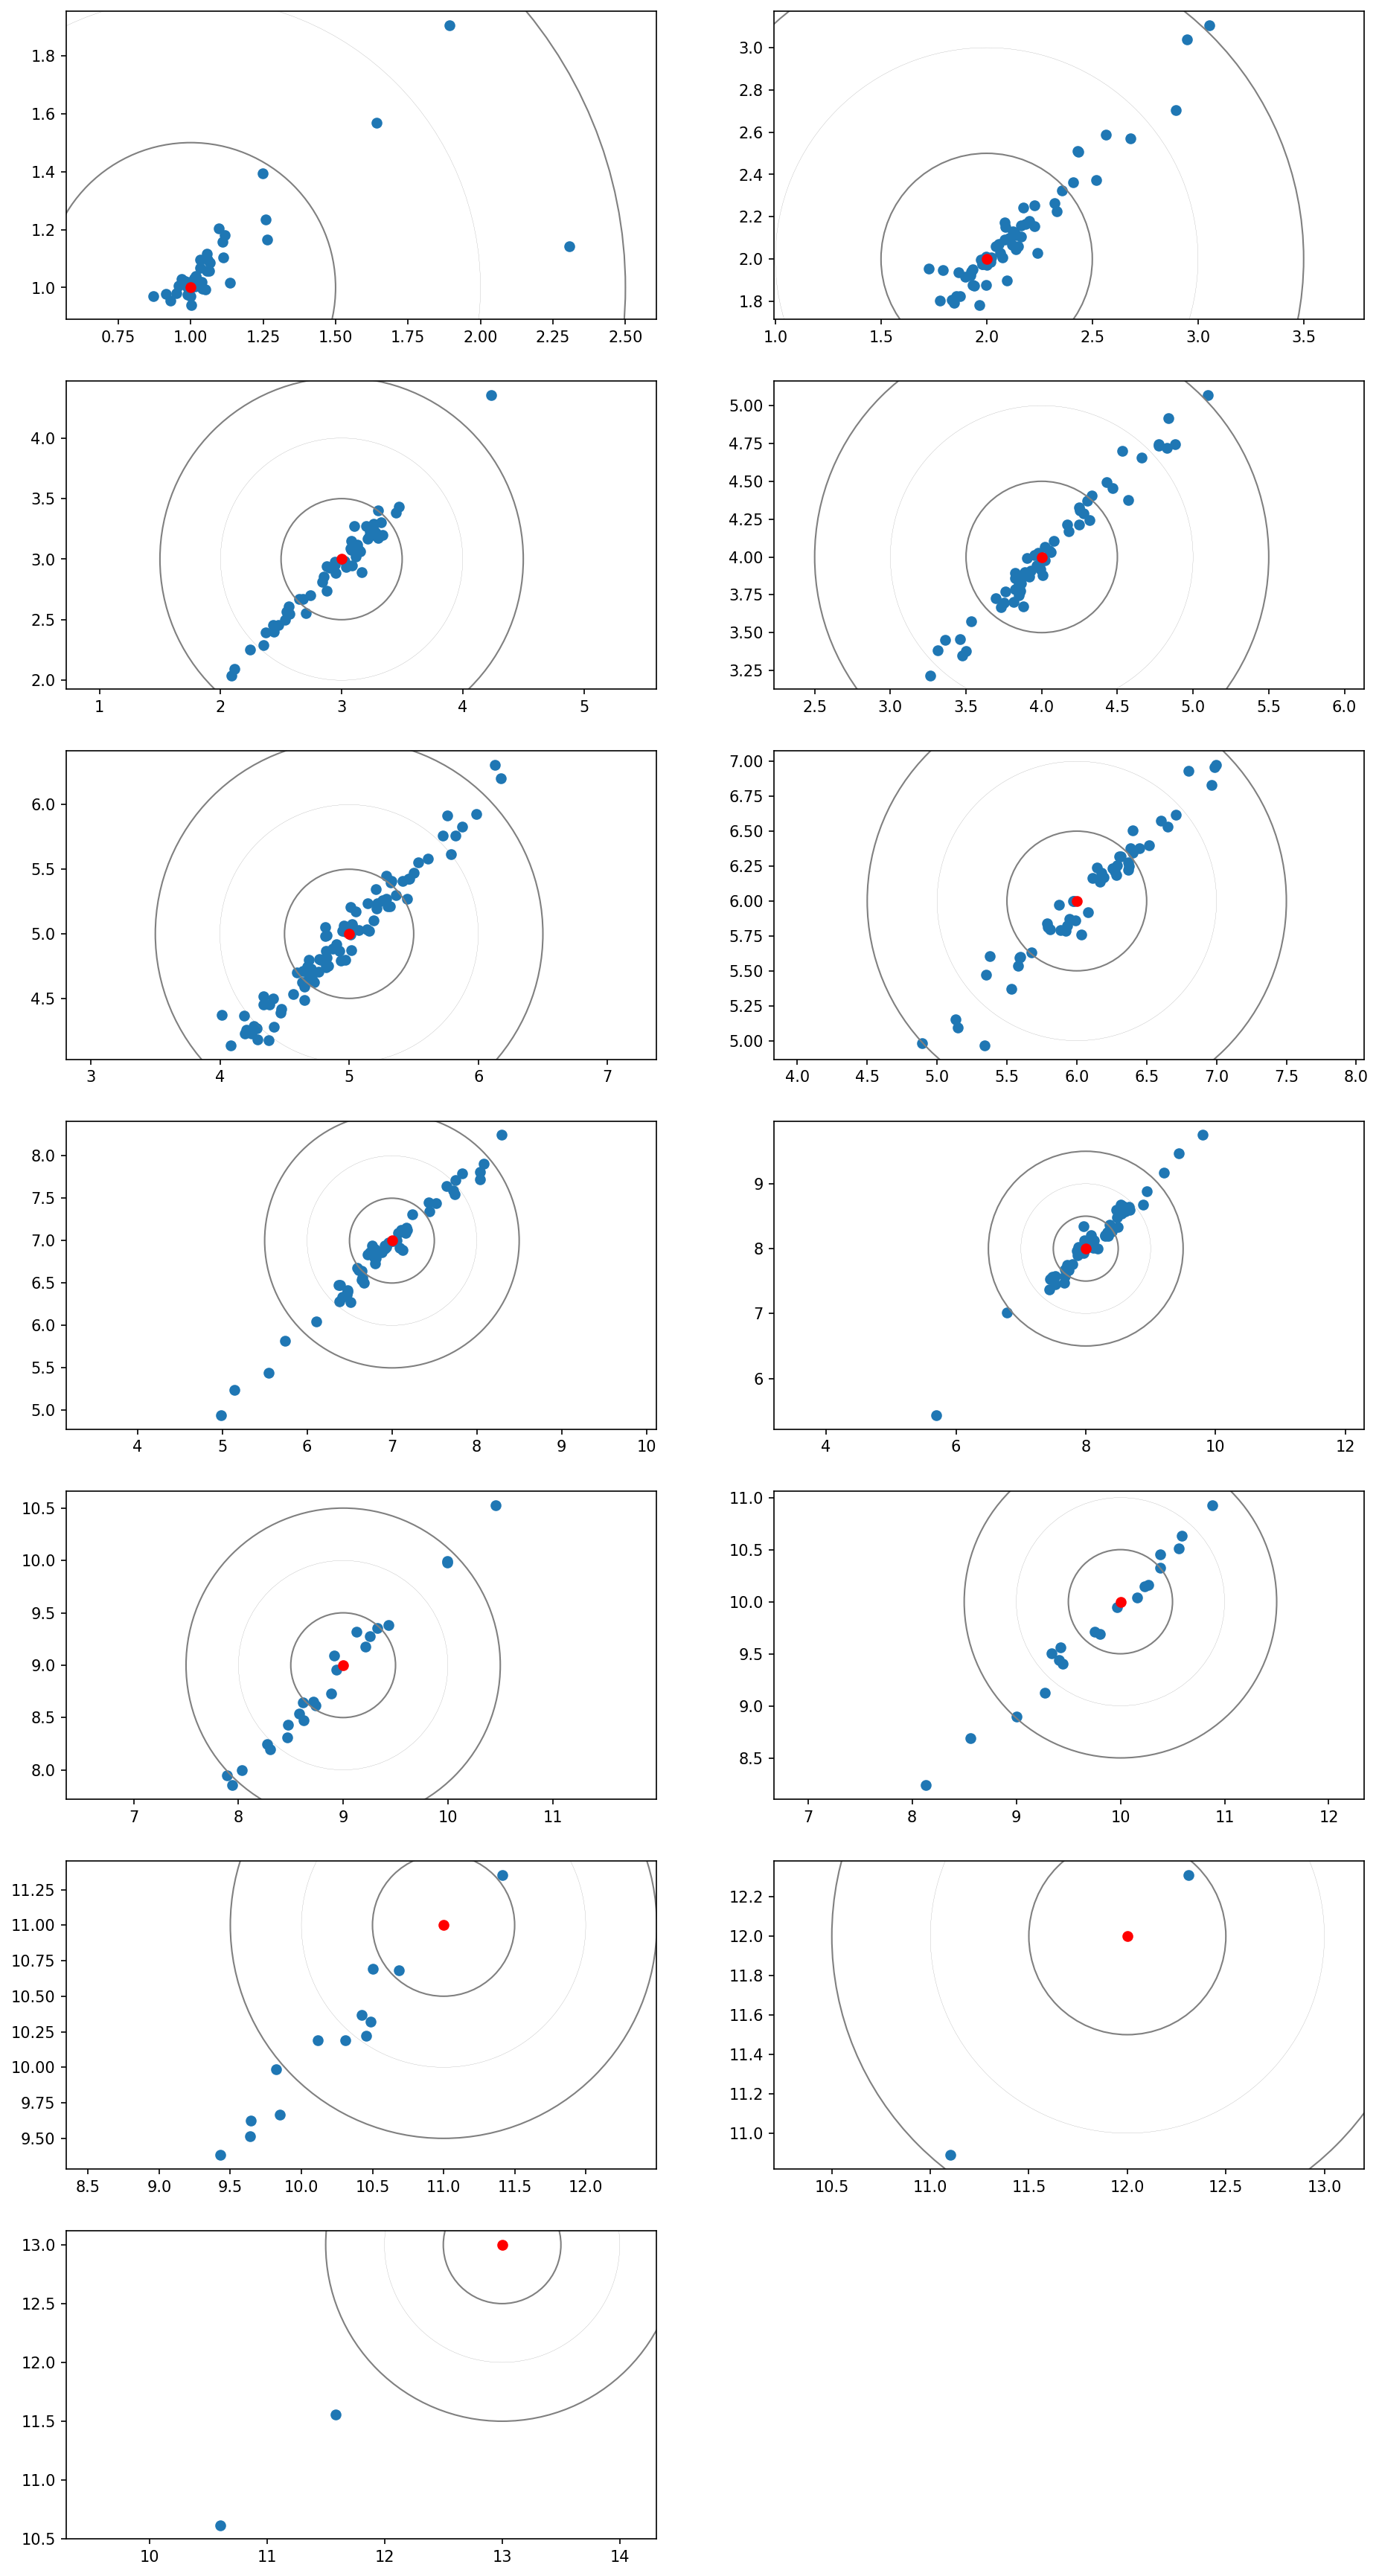

In [48]:
#fig, axs = plt.subplots(1, 2)
#l_all x l_middle
figure, axes = plt.subplots(7,2, figsize=(15,30)) 
plt.rcParams['figure.dpi'] = 150
for i in range(0,13):
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].scatter(l_all[y_true.age==i+1], l_middle[y_true.age==i+1])
    axes[i//2, i%2].scatter(i+1,i+1, c='red')
    cc1 = plt.Circle(( i+1 , i+1 ),   1, fill=False, color='gray', linewidth=0.1)  
    cc2 = plt.Circle(( i+1 , i+1 ), 0.5, fill=False, color='gray', linewidth=1.0)  
    cc3 = plt.Circle(( i+1 , i+1 ), 1.5, fill=False, color='gray', linewidth=1.0)  
    axes[i//2, i%2].add_artist( cc1 ) 
    axes[i//2, i%2].add_artist( cc2 ) 
    axes[i//2, i%2].add_artist( cc3 ) 

figure.delaxes( axes[6,1] )
plt.show()

### Residual scatter plot or result x result pr age

data1: mean=-0.019 stdv=0.530 min=-2.394 max=1.798
data2: mean=-0.037 stdv=0.528 min=-2.567 max=1.751
correlation pearson=0.980 spearman=0.973 kendal=0.872


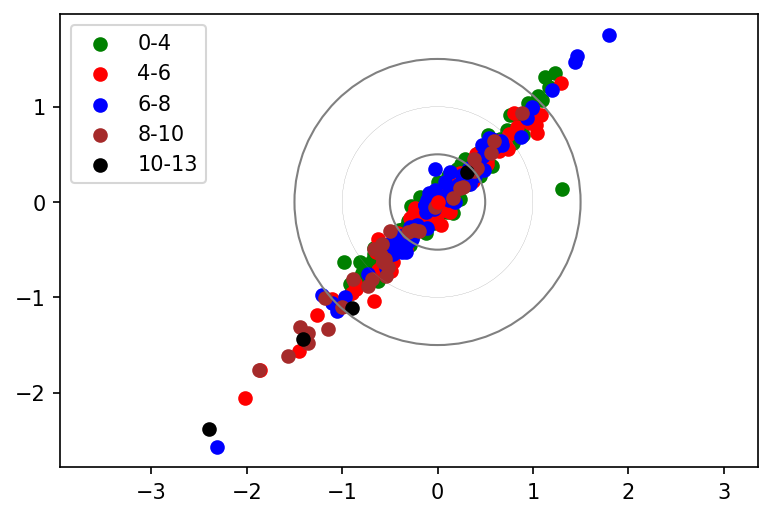

In [248]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

fig, ax = plt.subplots()
ax.axis('equal')
data1 = []
data2 = []
for i in range(0,13): 
    color = 'green'
    theLabel=''
    if i==0:
        theLabel = '0-4'
    if i==5:
        theLabel = '4-6'
    if i==7:
        theLabel = '6-8'
    if i==9:
        theLabel = '8-10'
    if i==11:
        theLabel = '10-13'
    if (i >4):
        color = 'red'
    if (i > 6):
        color = 'blue'
    if (i > 8):
        color = 'brown'
    if (i > 10):
        color = 'black'

    ax.scatter(l_all[y_true.age==i+1]-(i+1), l_middle[y_true.age==i+1]-(i+1), c=color, label=theLabel)
    data1.extend(l_all[y_true.age==i+1].values-(i+1))
    data2.extend(l_middle[y_true.age==i+1].values-(i+1))

ax.scatter(0,0, c='red')    
cc1 = plt.Circle(( 0, 0 ),   1, fill=False, color='gray', linewidth=0.1)  
cc2 = plt.Circle(( 0, 0 ), 0.5, fill=False, color='gray', linewidth=1.0)  
cc3 = plt.Circle(( 0, 0 ), 1.5, fill=False, color='gray', linewidth=1.0)  
ax.add_artist( cc1 ) 
ax.add_artist( cc2 ) 
ax.add_artist( cc3 ) 
plt.legend(loc="upper left")

data1, data2 = np.asarray(data1), np.asarray(data2)
corr1, _ = pearsonr(data1, data2)
corr2, _ = spearmanr(data1, data2)
corr3, _ = kendalltau(data1, data2)
print('data1: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data1), np.std(data1), np.min(data1), np.max(data1)))
print('data2: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data2), np.std(data2), np.min(data2), np.max(data2)))
print('correlation pearson=%.3f spearman=%.3f kendal=%.3f' % (corr1, corr2, corr3))

plt.show()

In [251]:
all = [l_all.values.tolist(),l_middle.values.tolist(),m_min.values.tolist(),m_middle.values.tolist(),m_max.values.tolist(),m_all.values.tolist(),b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max]
for i in range(0,len(all)):
    data1 = all[i]
    print('data1: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data1), np.std(data1), np.min(data1), np.max(data1)))
    for j in range(i+1, len(all)):
        
        data2 = all[j]
        corr1, _ = pearsonr(data1, data2)
        corr2, _ = spearmanr(data1, data2)
        corr3, _ = kendalltau(data1, data2)
        
        print('data2: mean=%.3f stdv=%.3f min=%.3f max=%.3f' % (np.mean(data2), np.std(data2), np.min(data2), np.max(data2)))
        print('\t correlation pearson=%.3f spearman=%.3f kendal=%.3f' % (corr1, corr2, corr3))
    print("*********")

data1: mean=5.161 stdv=2.607 min=0.872 max=12.309
data2: mean=5.143 stdv=2.604 min=0.938 max=12.311
	 correlation pearson=0.999 spearman=0.999 kendal=0.974
data2: mean=5.184 stdv=2.623 min=0.939 max=12.201
	 correlation pearson=0.998 spearman=0.997 kendal=0.956
data2: mean=5.169 stdv=2.593 min=0.869 max=11.867
	 correlation pearson=0.997 spearman=0.997 kendal=0.954
data2: mean=5.188 stdv=2.599 min=0.960 max=12.112
	 correlation pearson=0.998 spearman=0.997 kendal=0.956
data2: mean=5.175 stdv=2.609 min=0.922 max=12.205
	 correlation pearson=0.998 spearman=0.998 kendal=0.960
data2: mean=5.241 stdv=2.697 min=0.716 max=12.924
	 correlation pearson=0.994 spearman=0.995 kendal=0.940
data2: mean=5.218 stdv=2.706 min=0.494 max=13.328
	 correlation pearson=0.994 spearman=0.994 kendal=0.936
data2: mean=5.208 stdv=2.696 min=0.510 max=12.852
	 correlation pearson=0.994 spearman=0.994 kendal=0.935
data2: mean=5.245 stdv=2.686 min=0.805 max=12.447
	 correlation pearson=0.994 spearman=0.995 kendal=0.

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max

i=5
#print(l_all[y_true.age==i].index.values)
#print(type(l_all[y_true.age==i].index.values.tolist()))
#print(l_all[y_true.age==i].index.values.tolist())


dat = pd.DataFrame(columns=l_all.index.values.tolist(), dtype=object)
dat.loc[len(dat)] = l_all.values.tolist()
dat.loc[len(dat)] = l_middle.values.tolist()
dat.loc[len(dat)] = m_min.values.tolist()
dat.loc[len(dat)] = m_middle.values.tolist()
dat.loc[len(dat)] = m_max.values.tolist()
dat.loc[len(dat)] = m_all.values.tolist()
dat.loc[len(dat)] = b4_min
dat.loc[len(dat)] = b4_middle
dat.loc[len(dat)] = b4_max
dat.loc[len(dat)] = b5_min
dat.loc[len(dat)] = b6_min
dat.loc[len(dat)] = b6_middle
dat.loc[len(dat)] = b6_max

print(dat.corr(method='pearson'))

#print(dat.values[0][0:5])
#print(dat.values[1][0:5])
tmp = pd.DataFrame([[4.92319007, 4.68769202, 4.97317033, 4.41288381, 5.29765811],
                    [4.87006421, 4.80093632, 5.01835675, 4.4977107,  5.21192546]], columns=['a','b','c','d','e'], dtype=int)

tmp.a = tmp.a.astype('int')
tmp.b = tmp.b.astype('int')
tmp.c = tmp.c.astype('int')
tmp.d = tmp.d.astype('int')
tmp.e = tmp.e.astype('int')
#print(tmp.dtypes)
#print(tmp)
#print(tmp.corr())

data = pd.DataFrame([["A", 4, 0, 1, 27], 
                         ["B", 7, 1, 1, 29], 
                         ["C", 6, 1, 0, 23], 
                         ["D", 2, 0, 0, 20], 
                         ["etc.", 3, 0, 1, 21]], 
                         columns=["ID", "score", "male", "age20", "BMI"])
#print( data.corr() )

#model = ols("BMI ~ score + male + age20", data=data).fit()
#print( model.params )
#print( model.summary() )

Text(0.5, 1.0, 'm_middle')

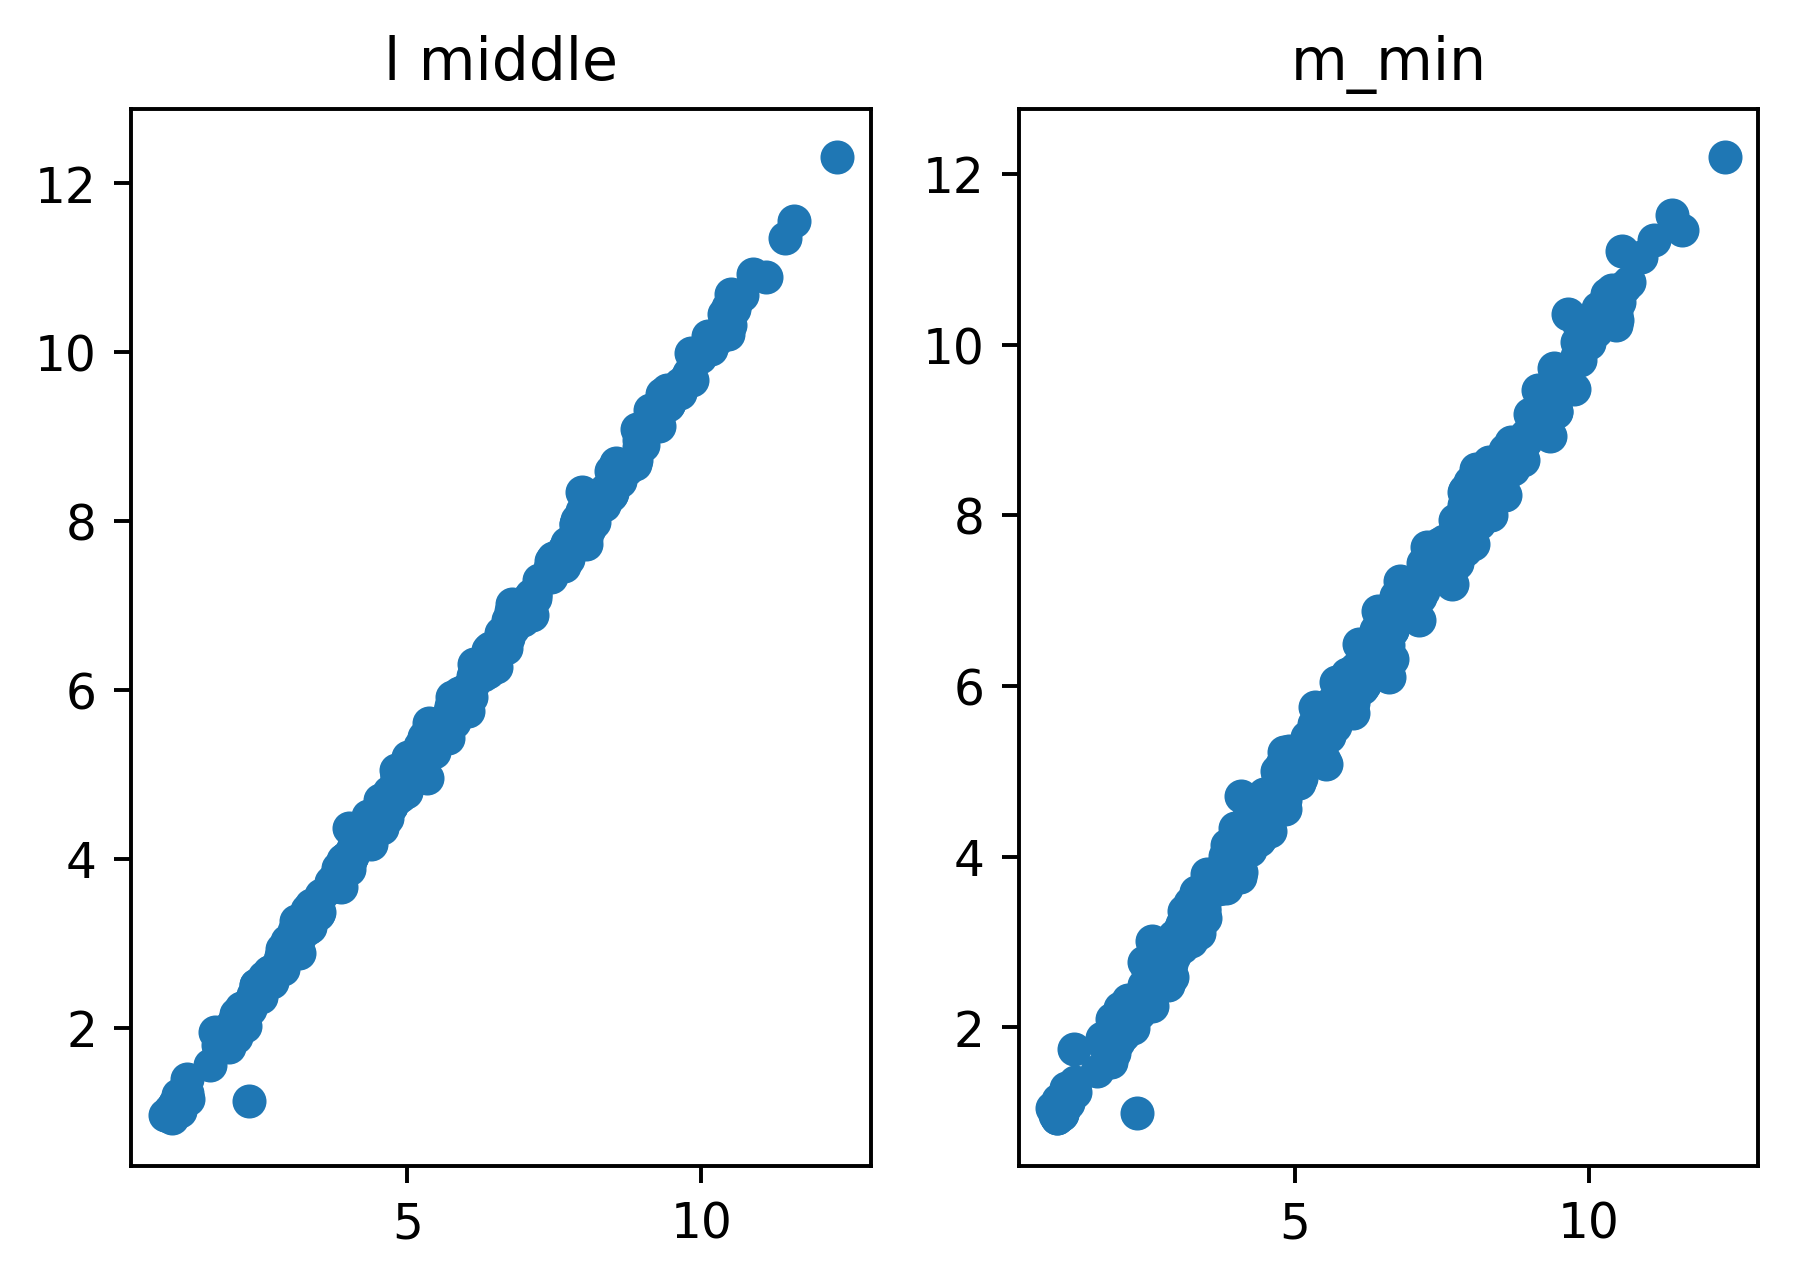

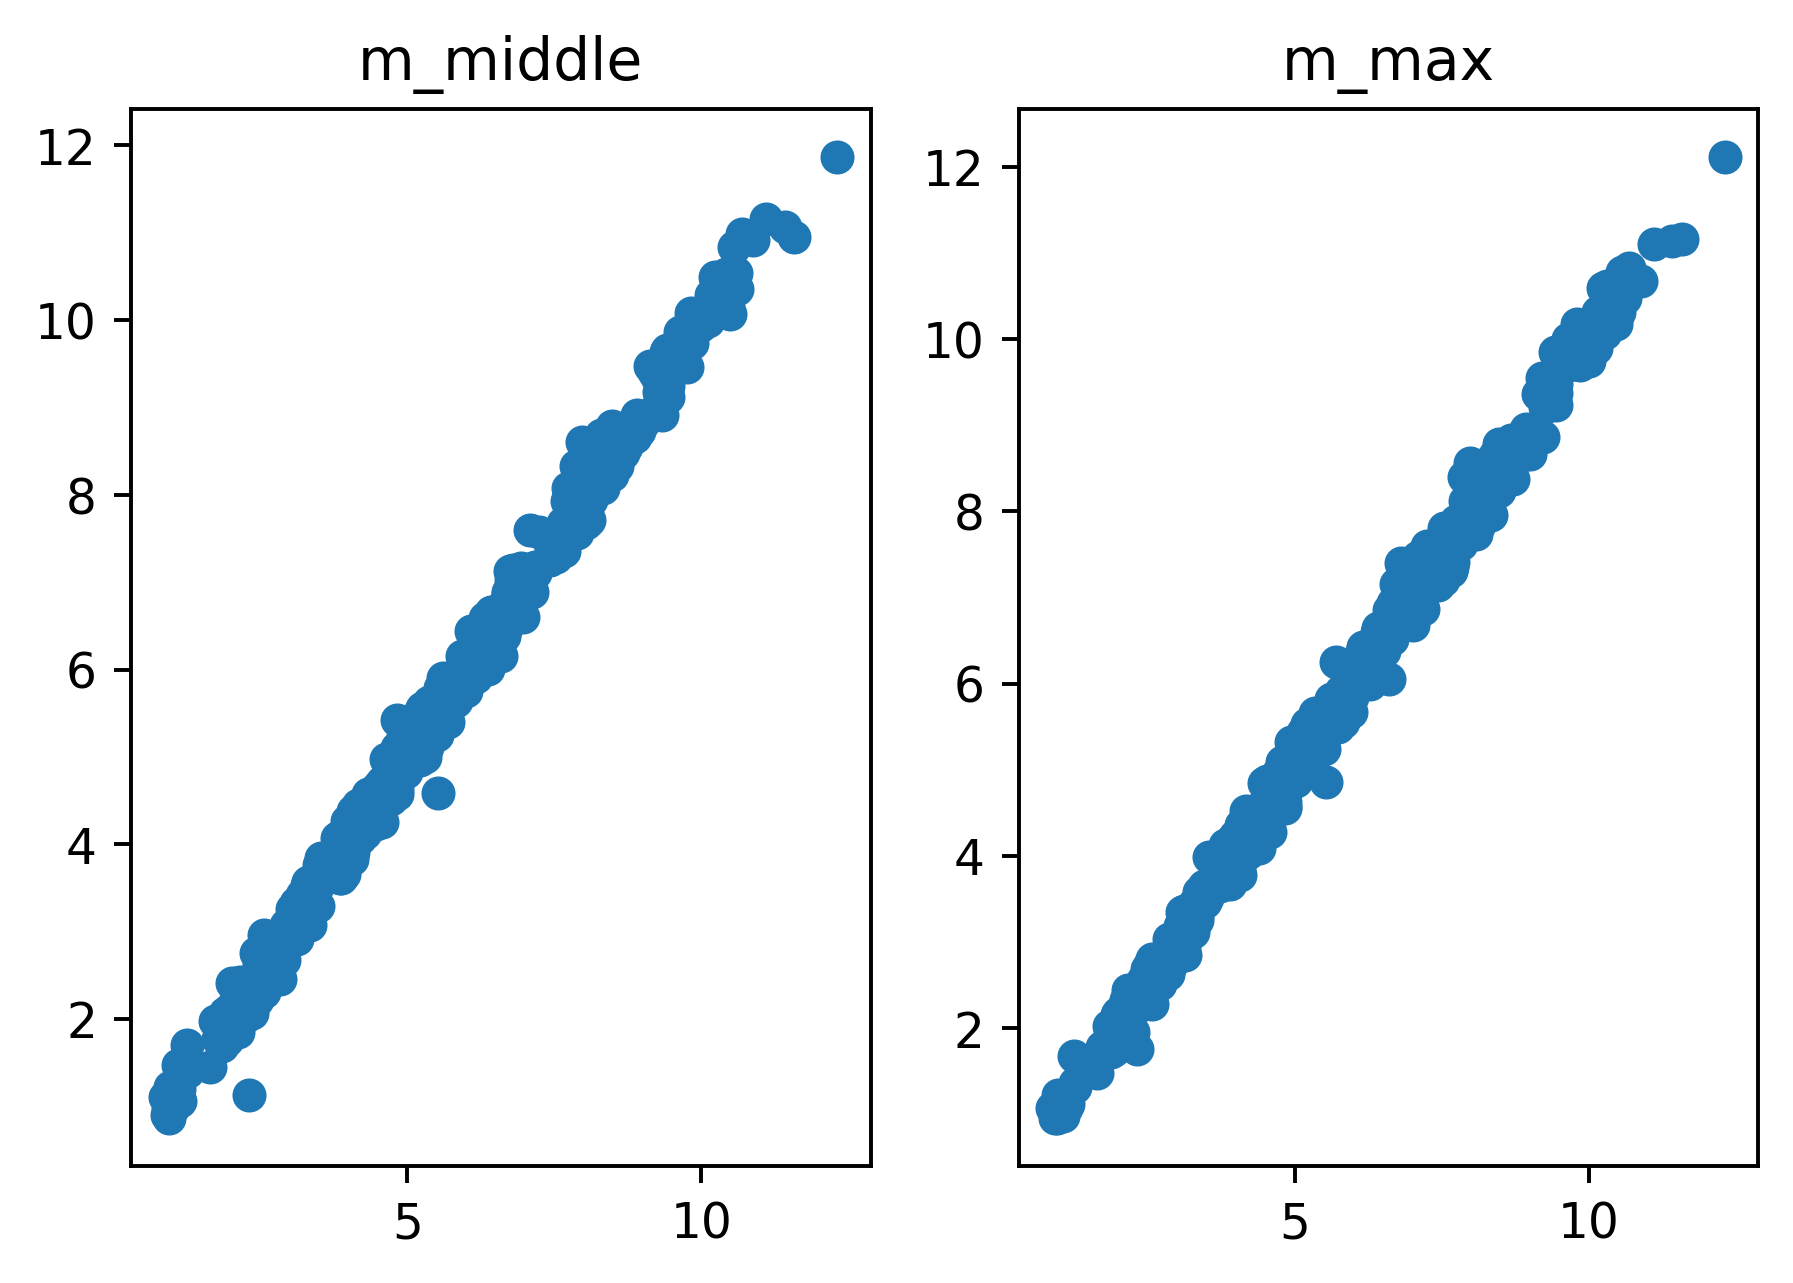

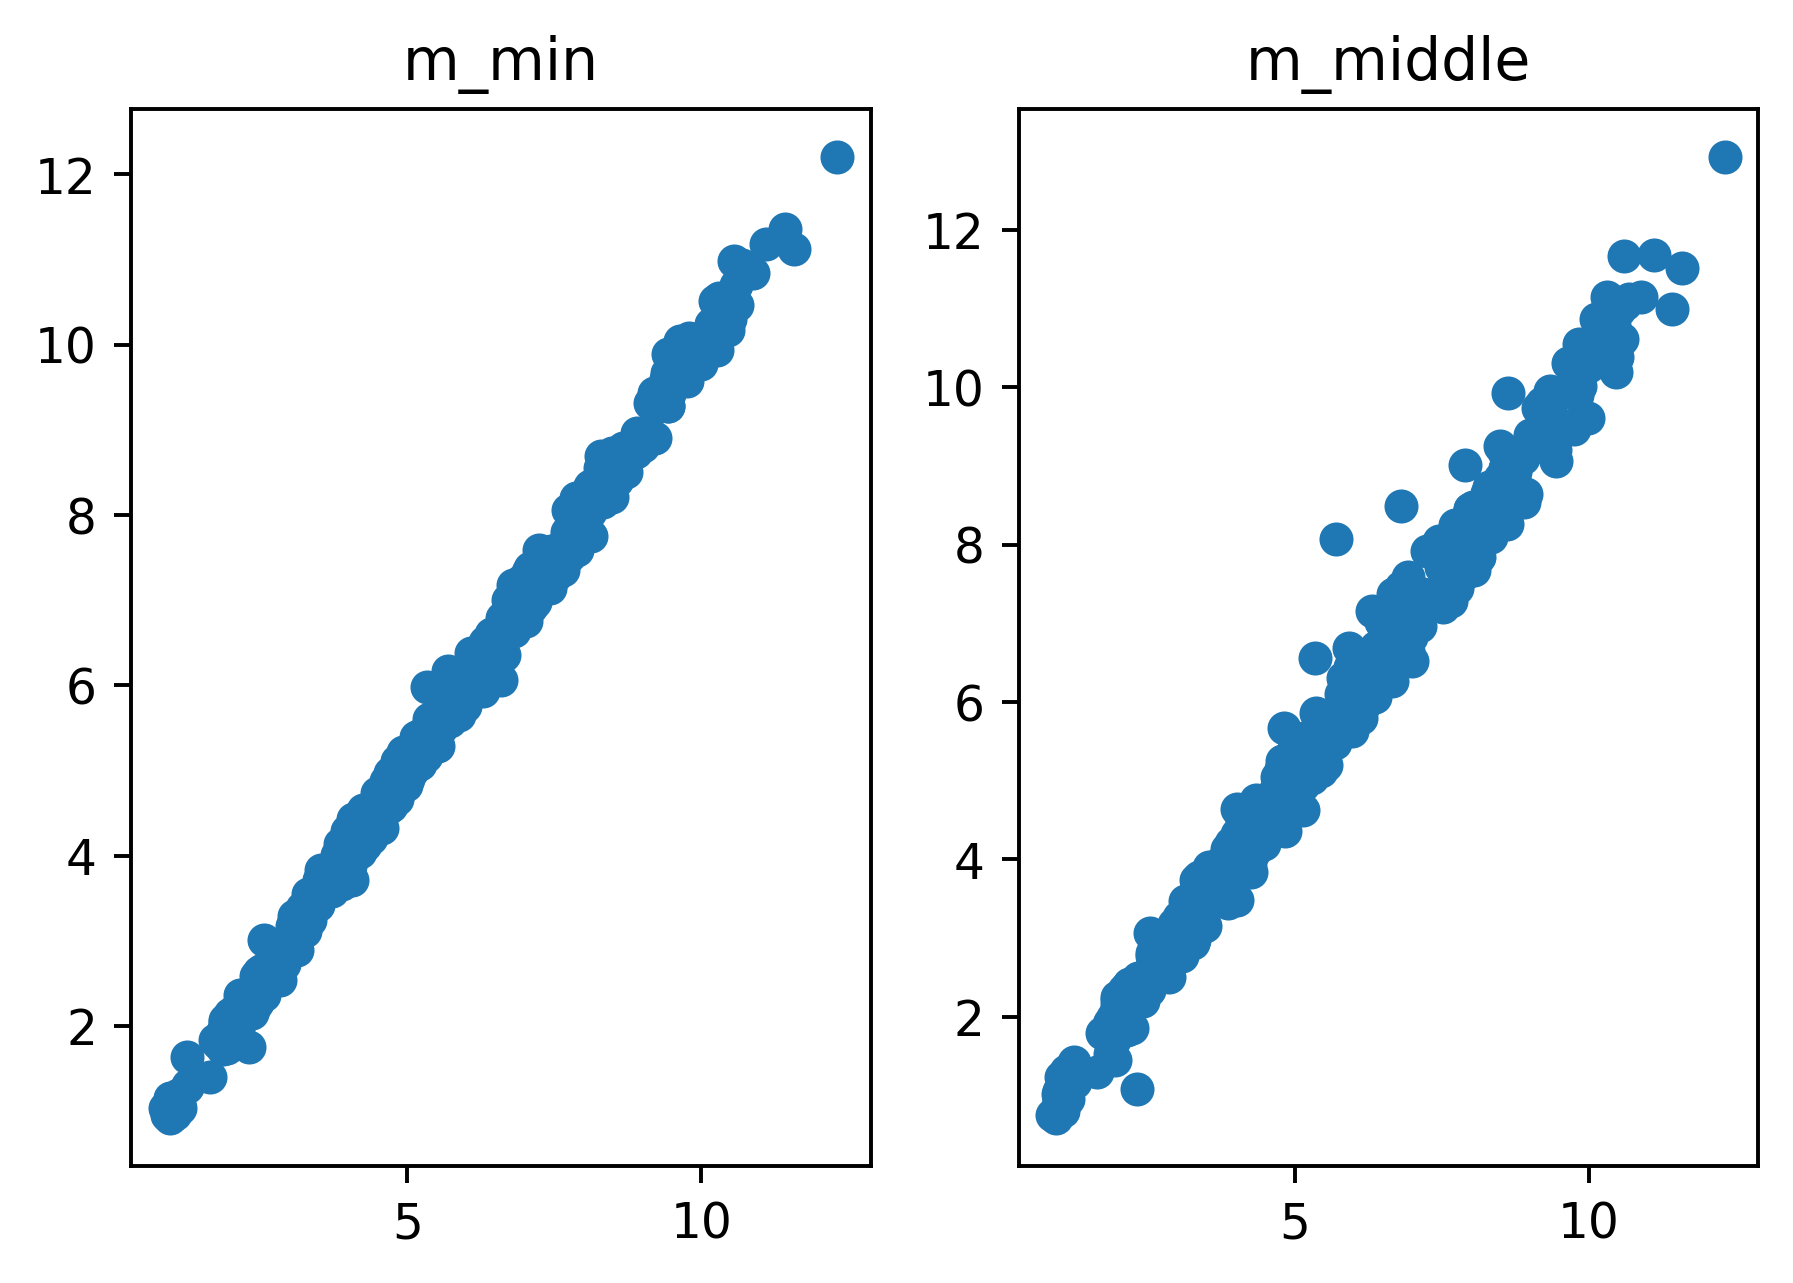

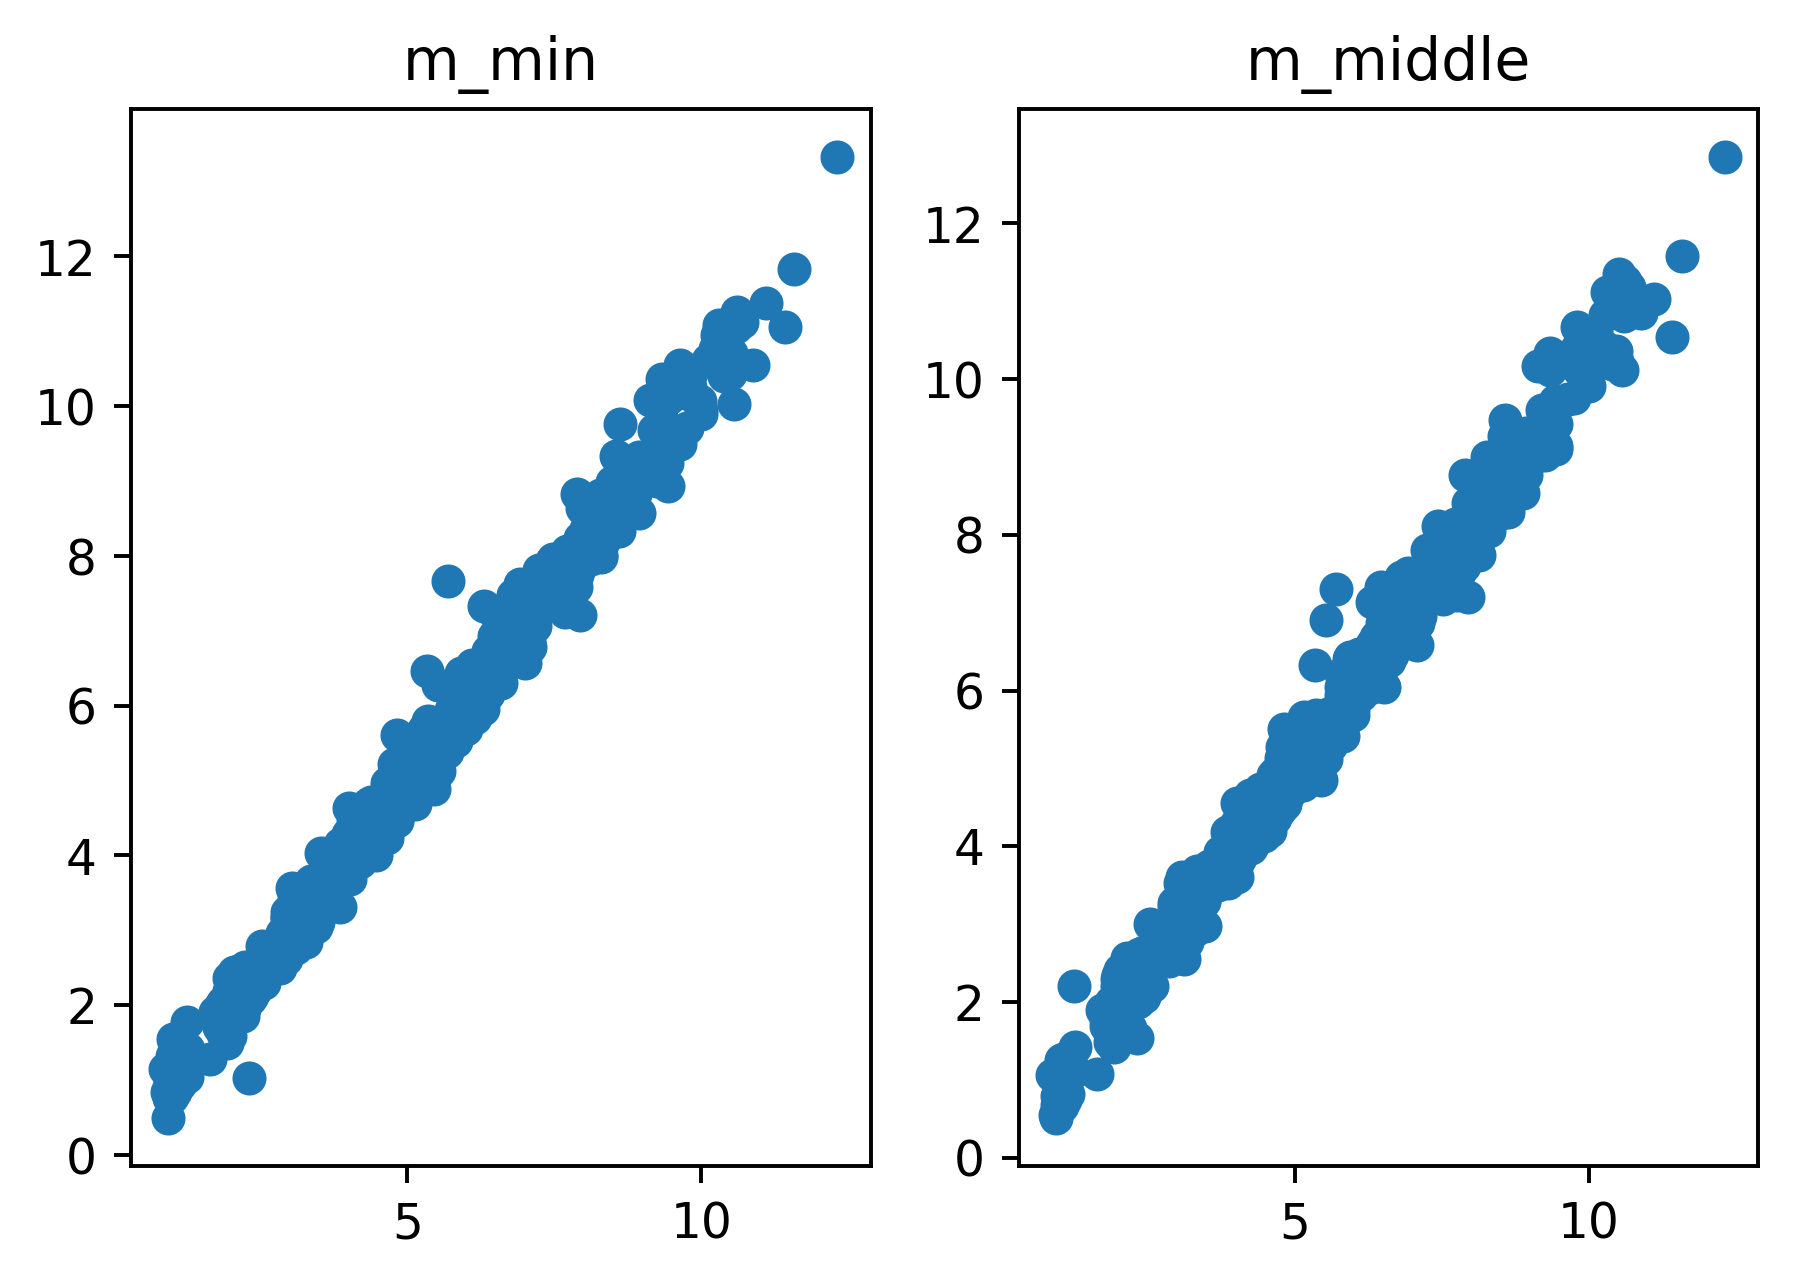

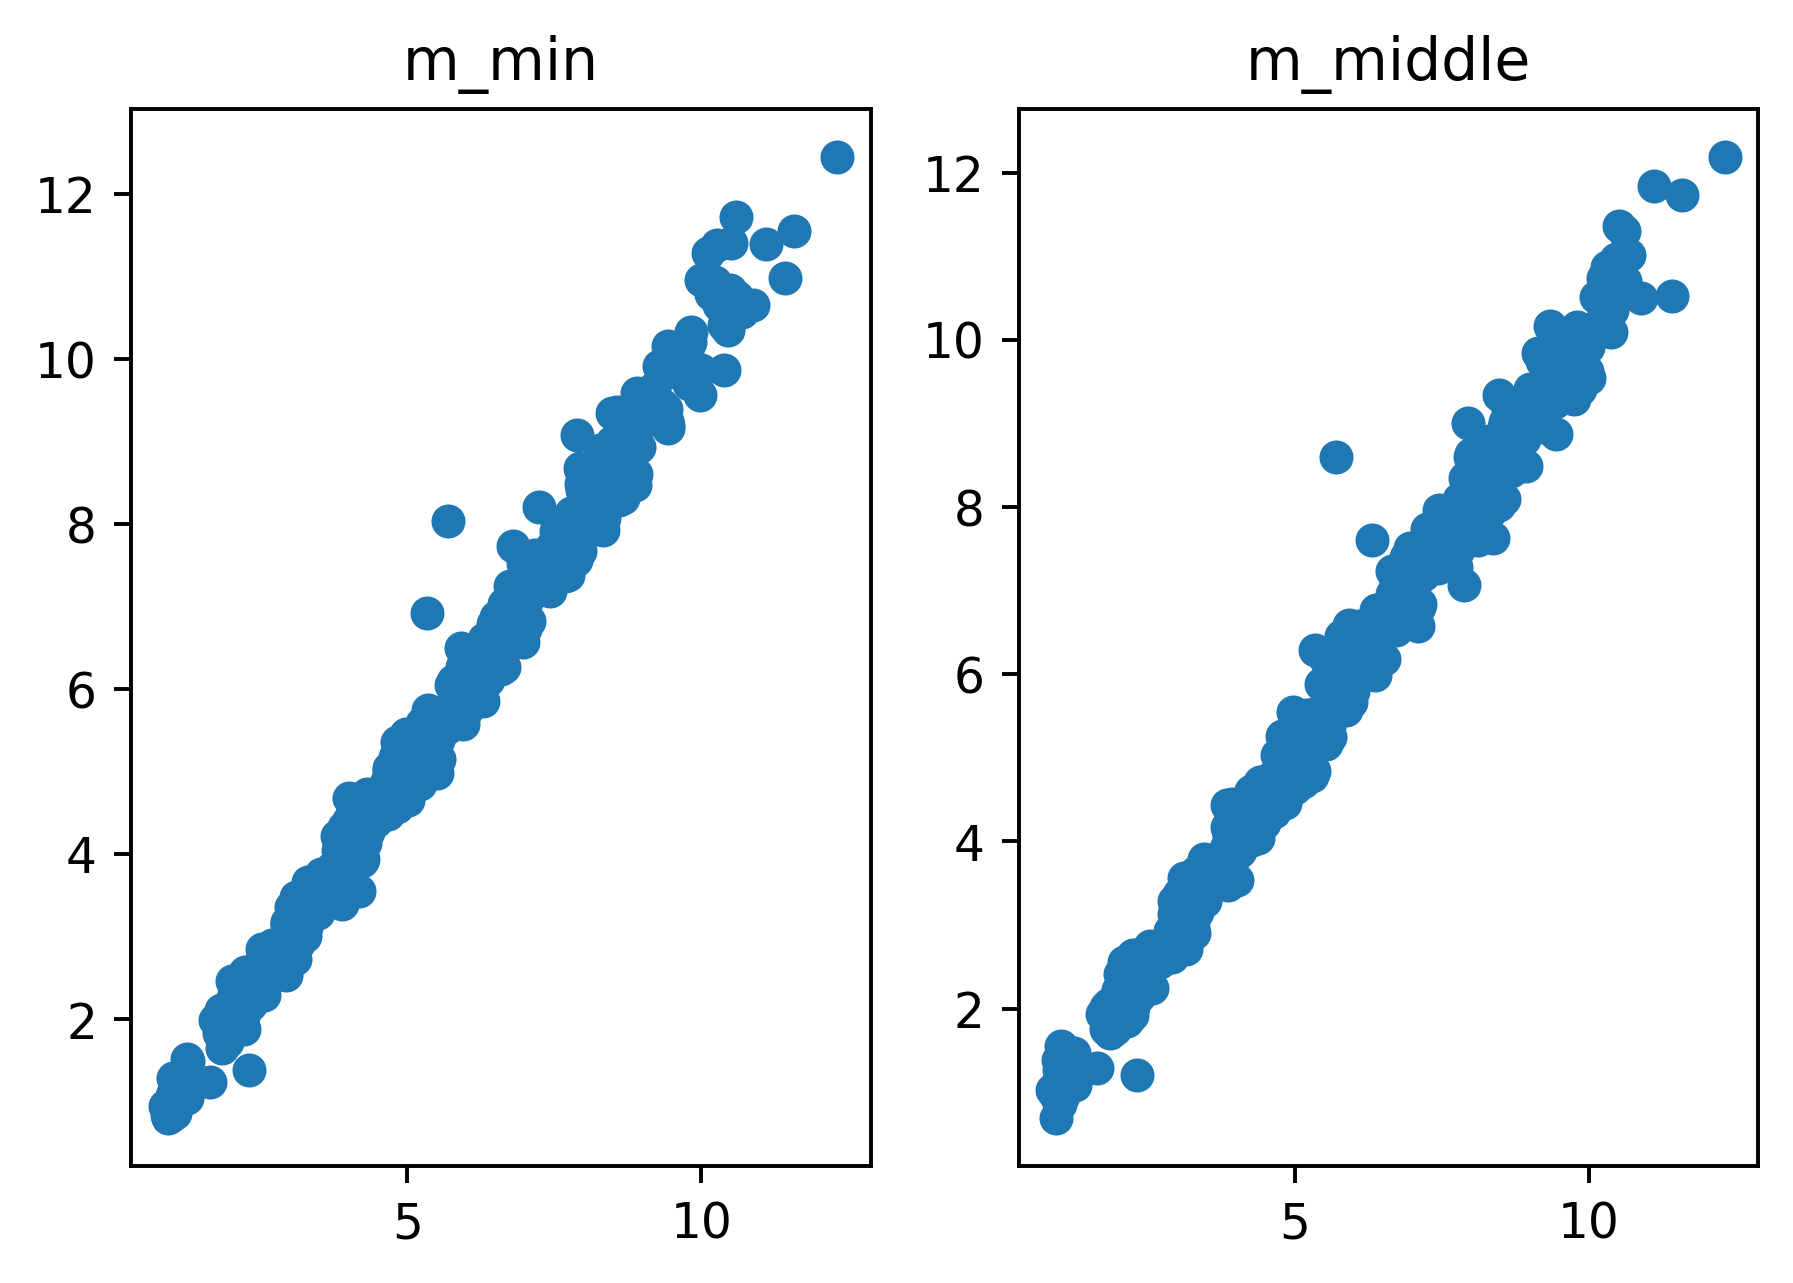

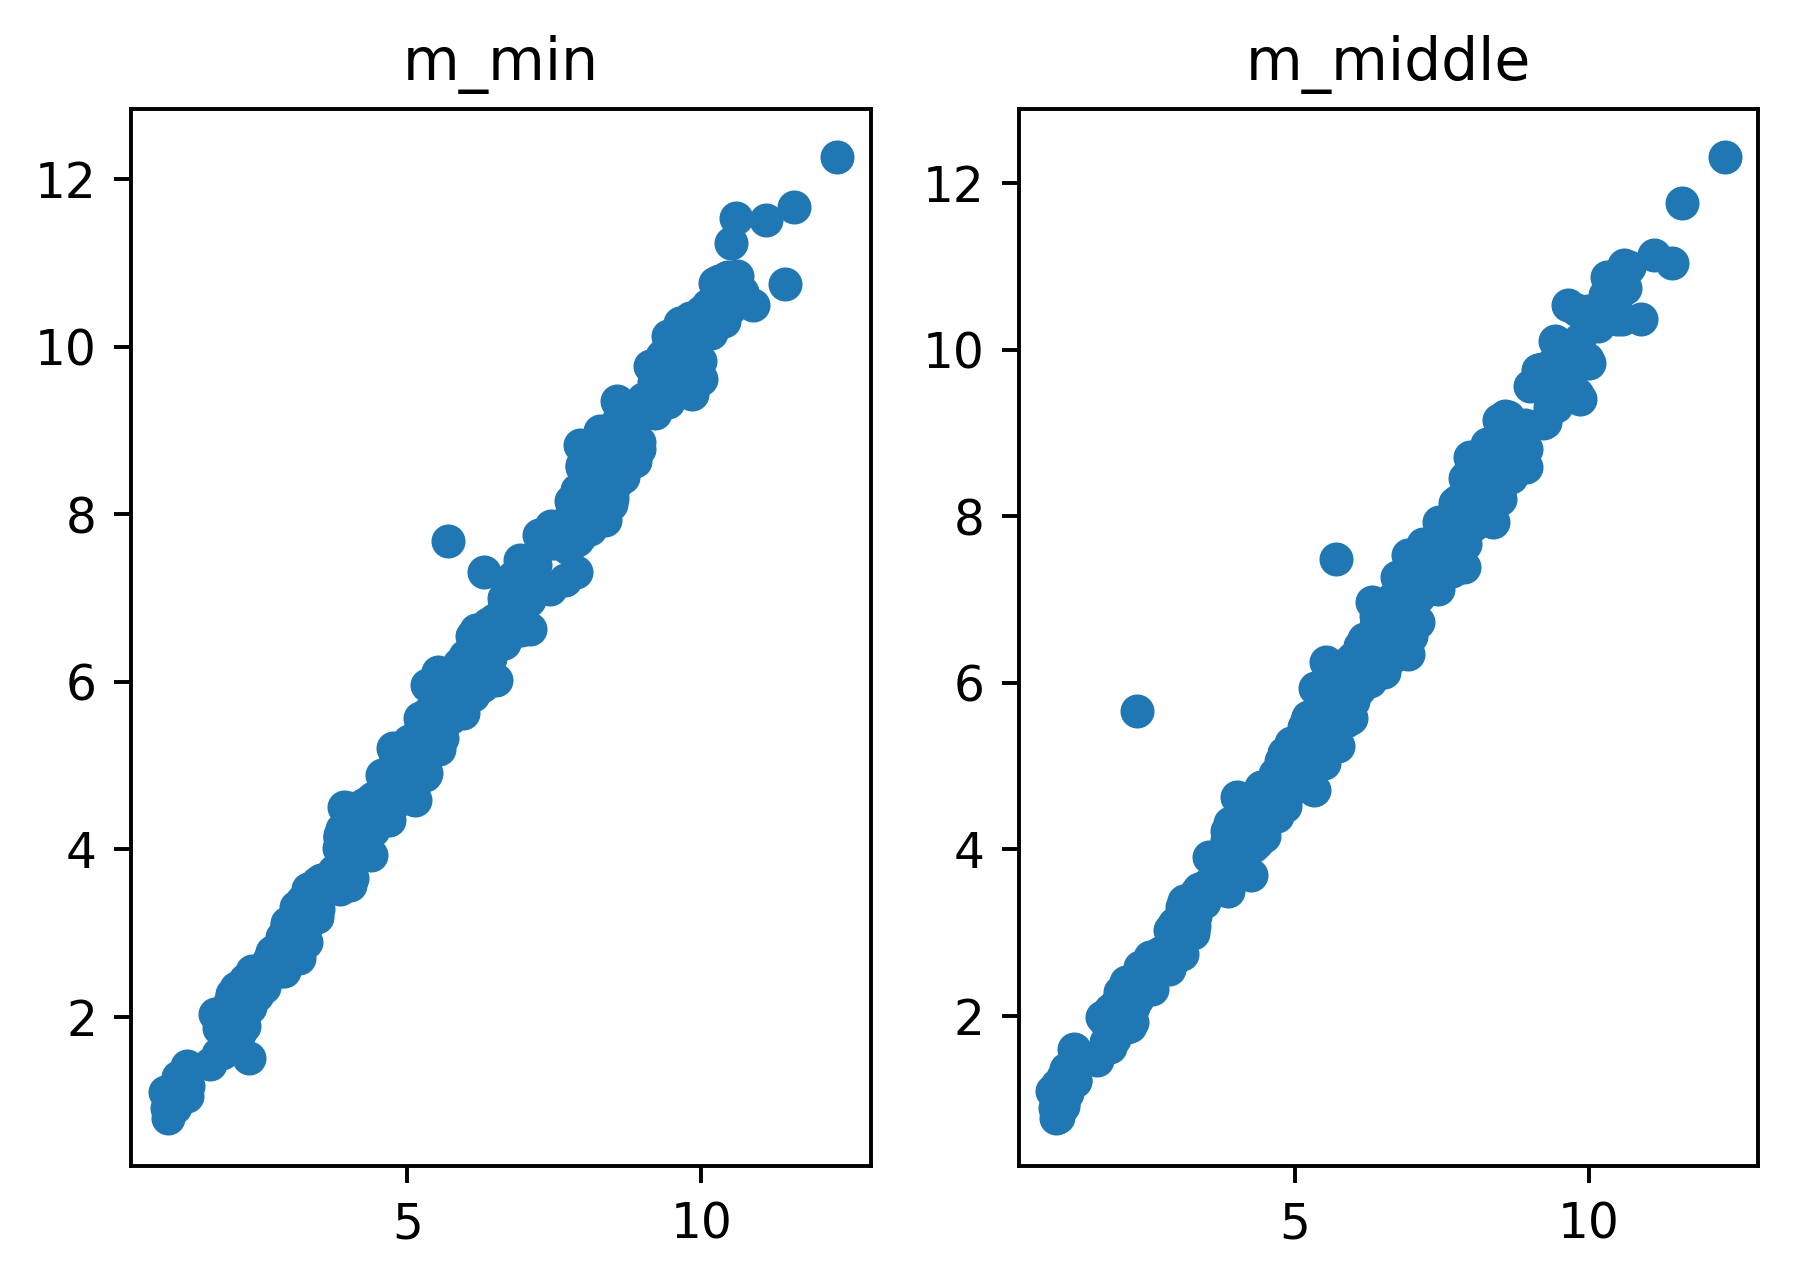

In [28]:
plt.rcParams['figure.dpi'] = 350
fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, l_middle)
axs[0].set_title('l middle')
axs[1].scatter(l_all, m_min)
axs[1].set_title('m_min')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, m_middle)
axs[0].set_title('m_middle')
axs[1].scatter(l_all, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, m_all)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_all, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_all, b6_max)
axs[1].set_title('m_middle')

#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max


Text(0.5, 1.0, 'm_middle')

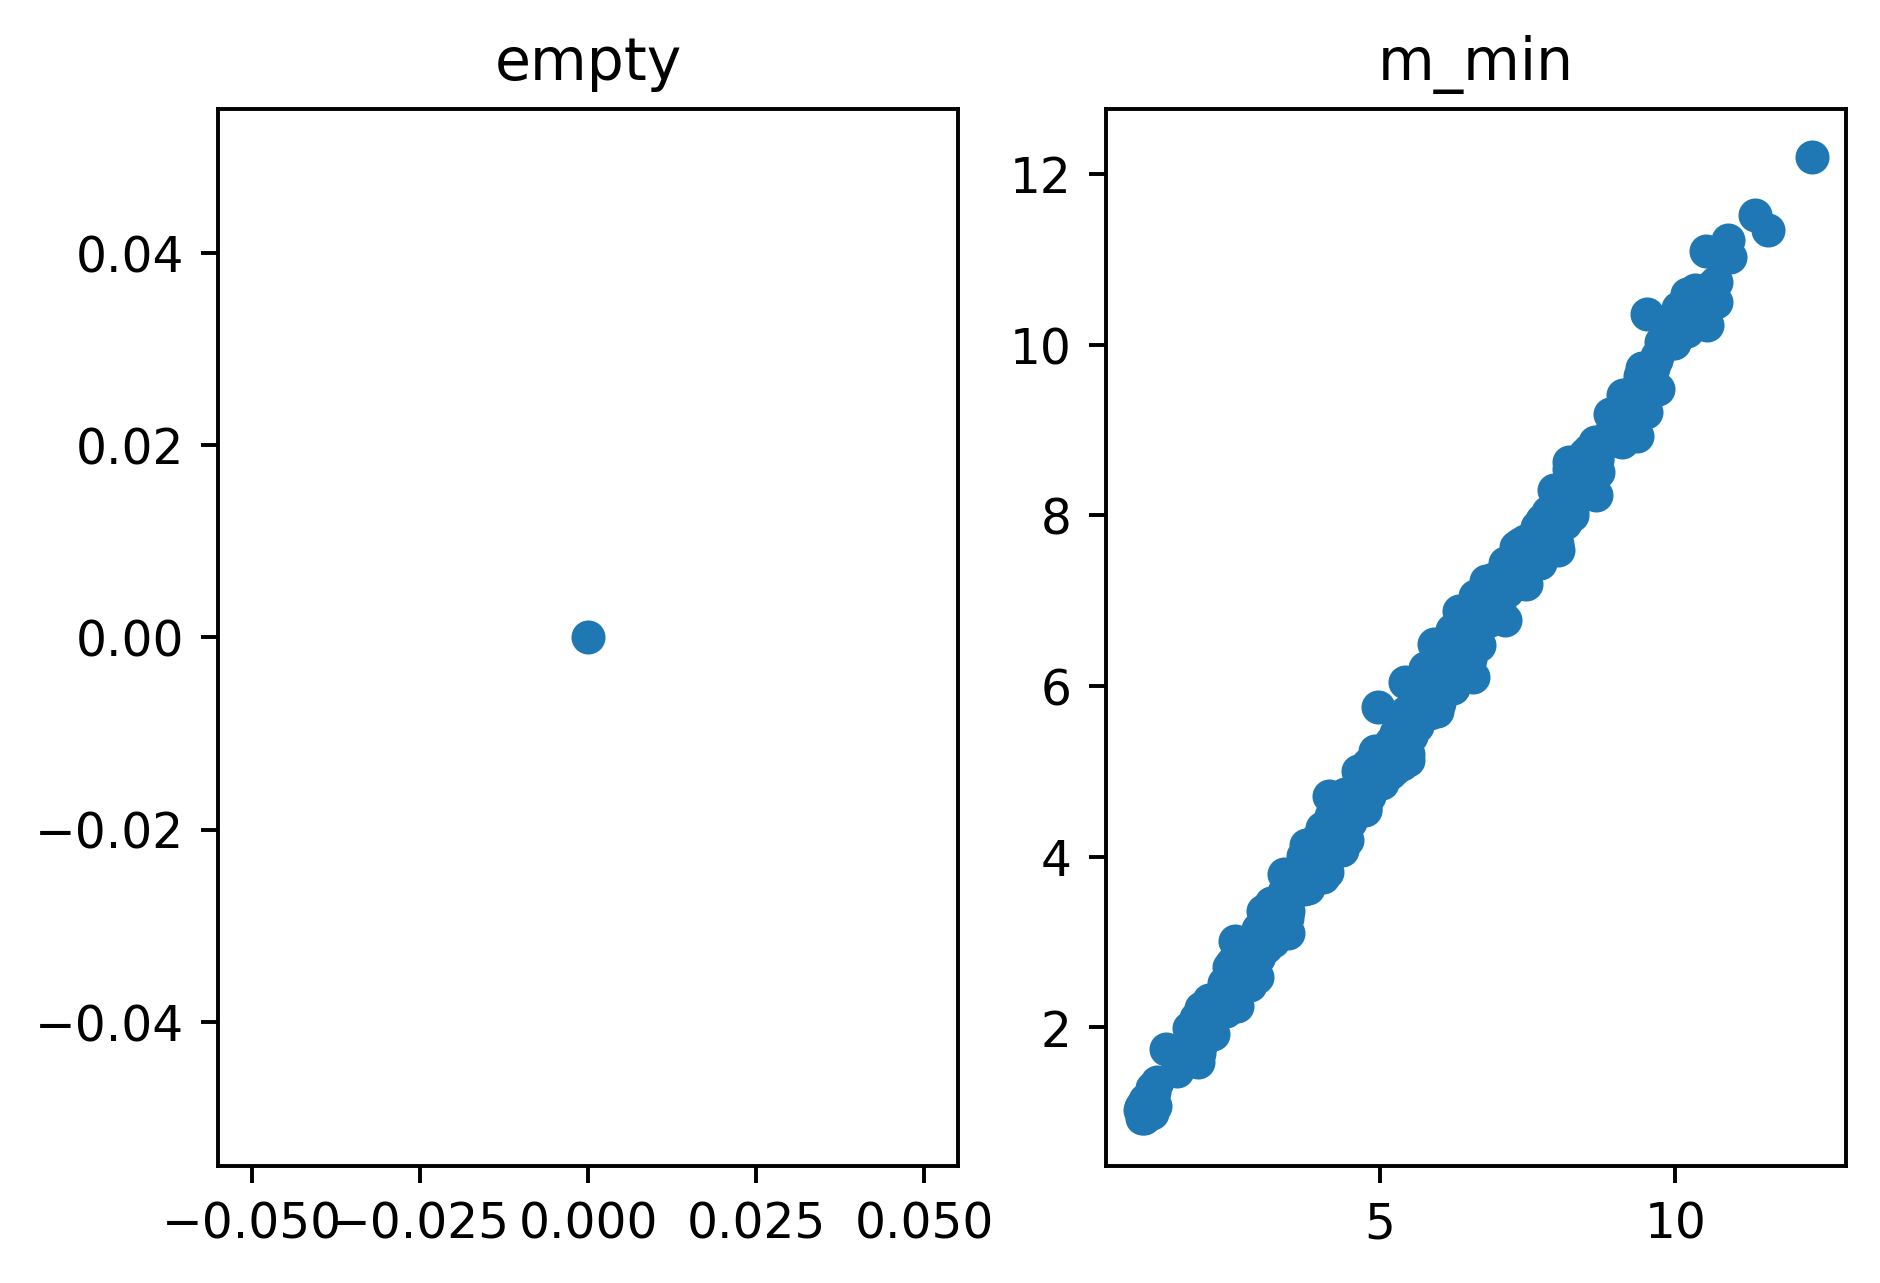

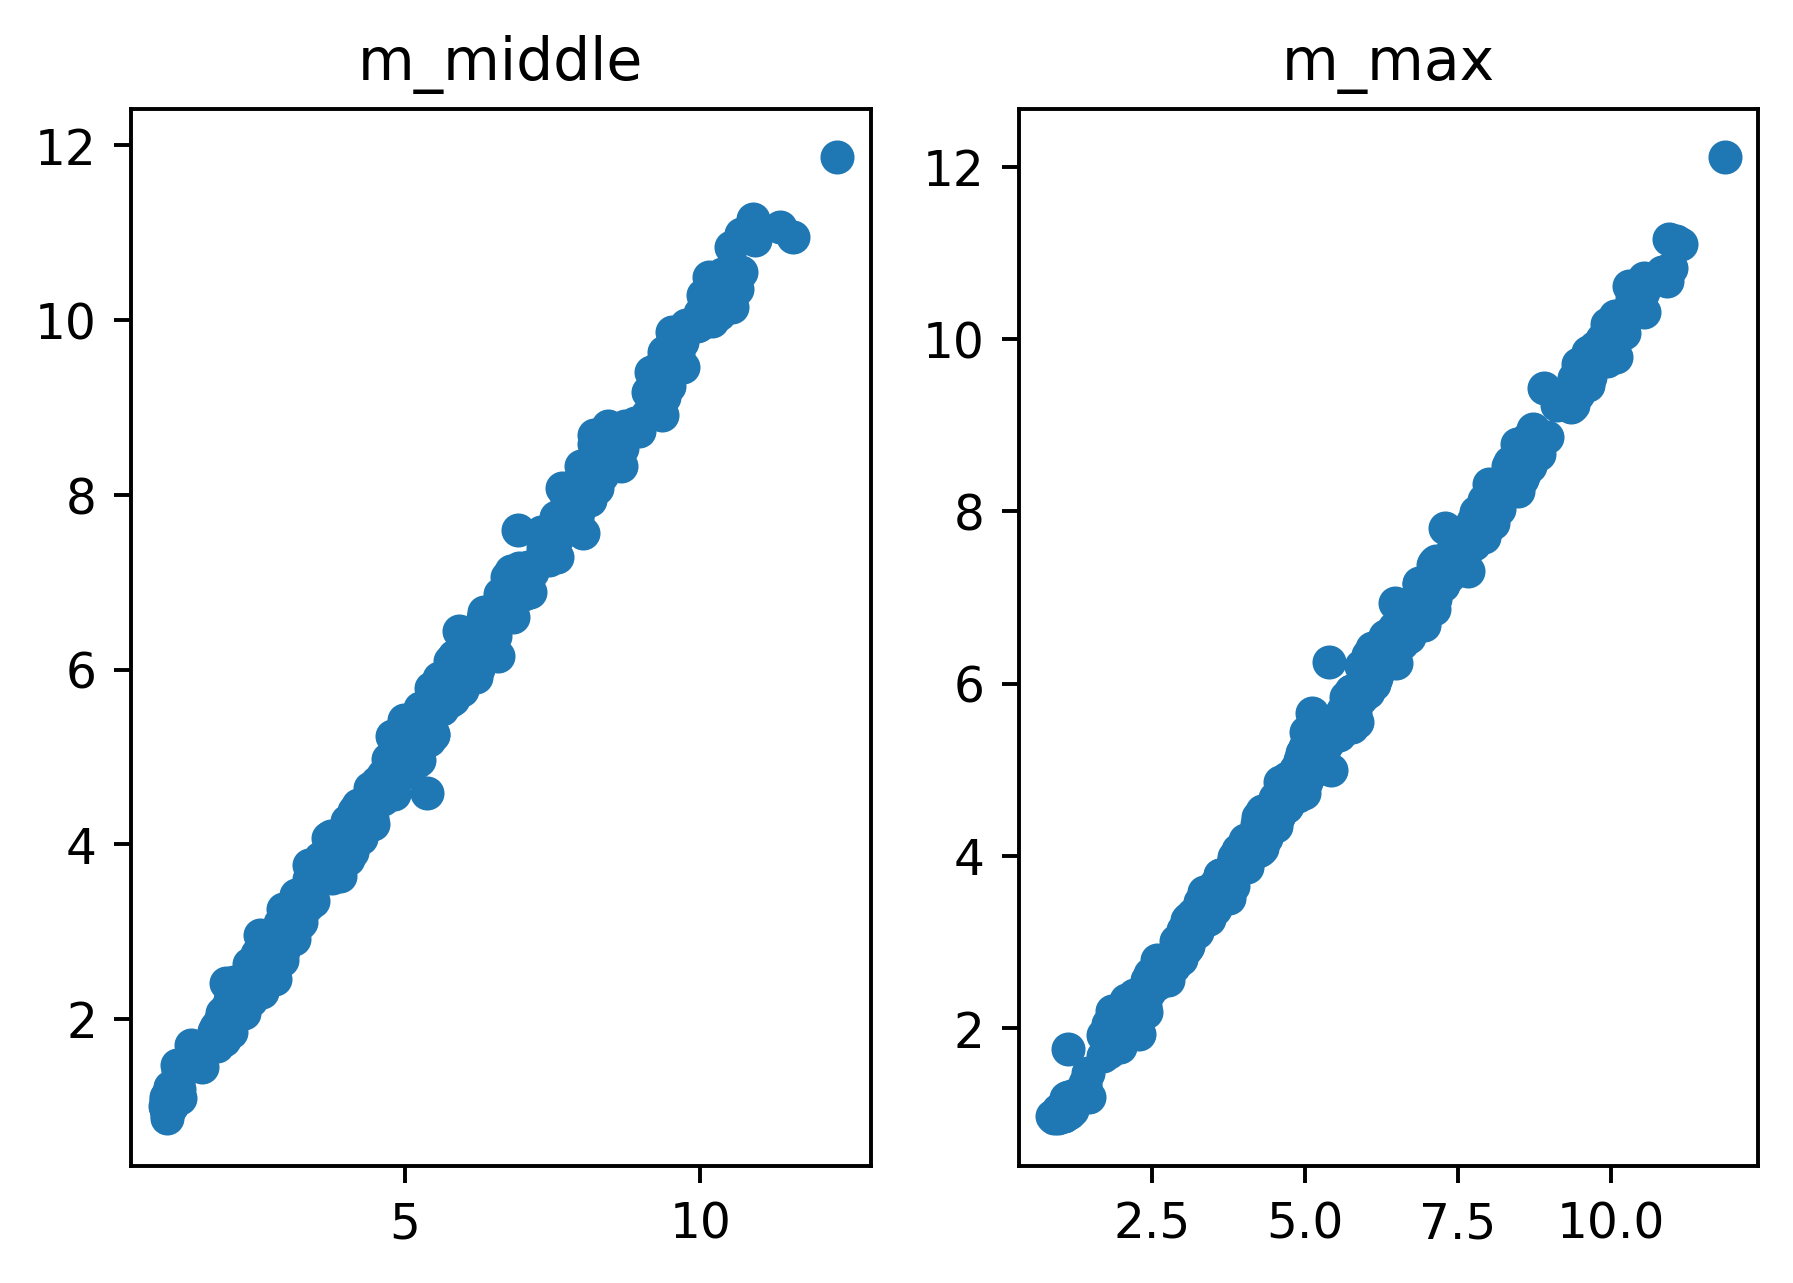

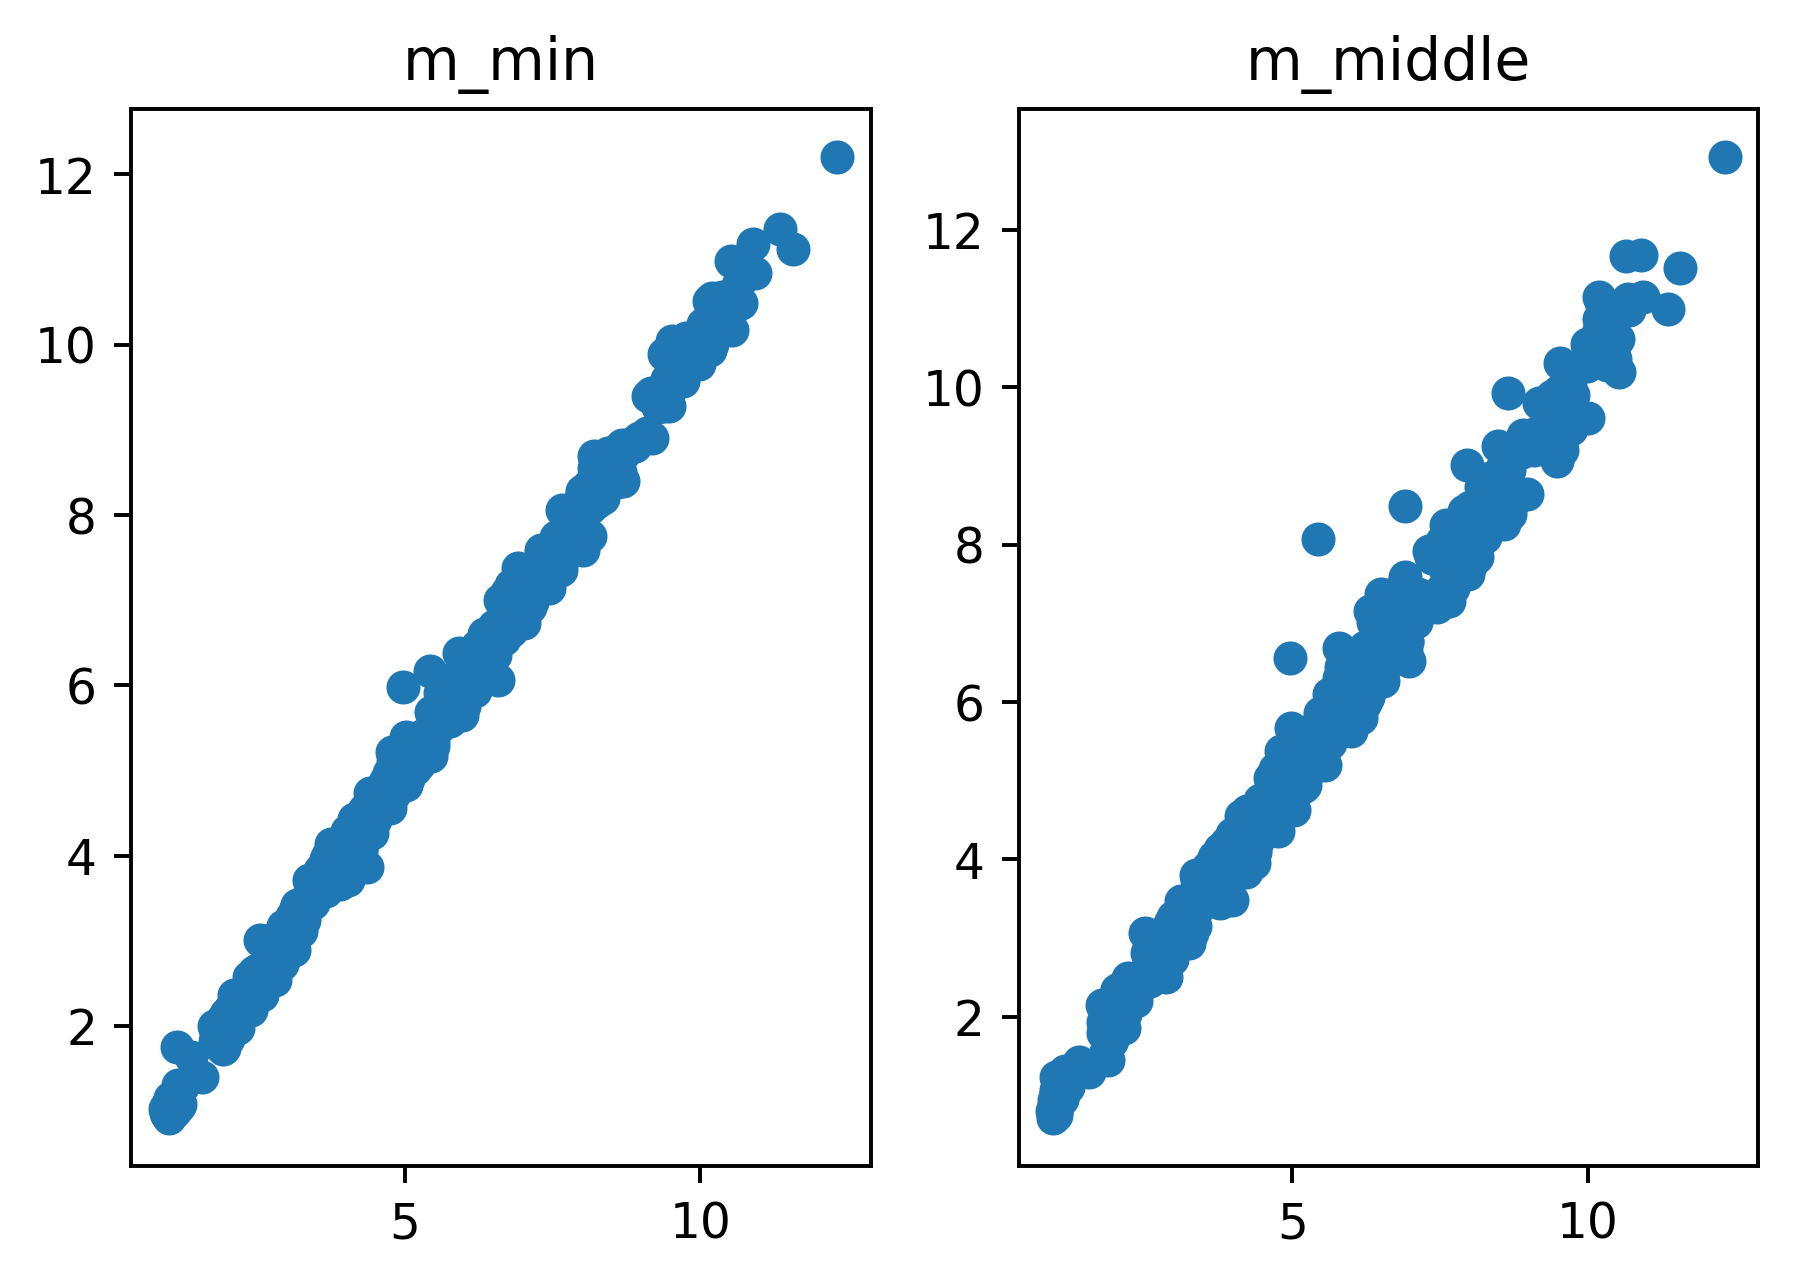

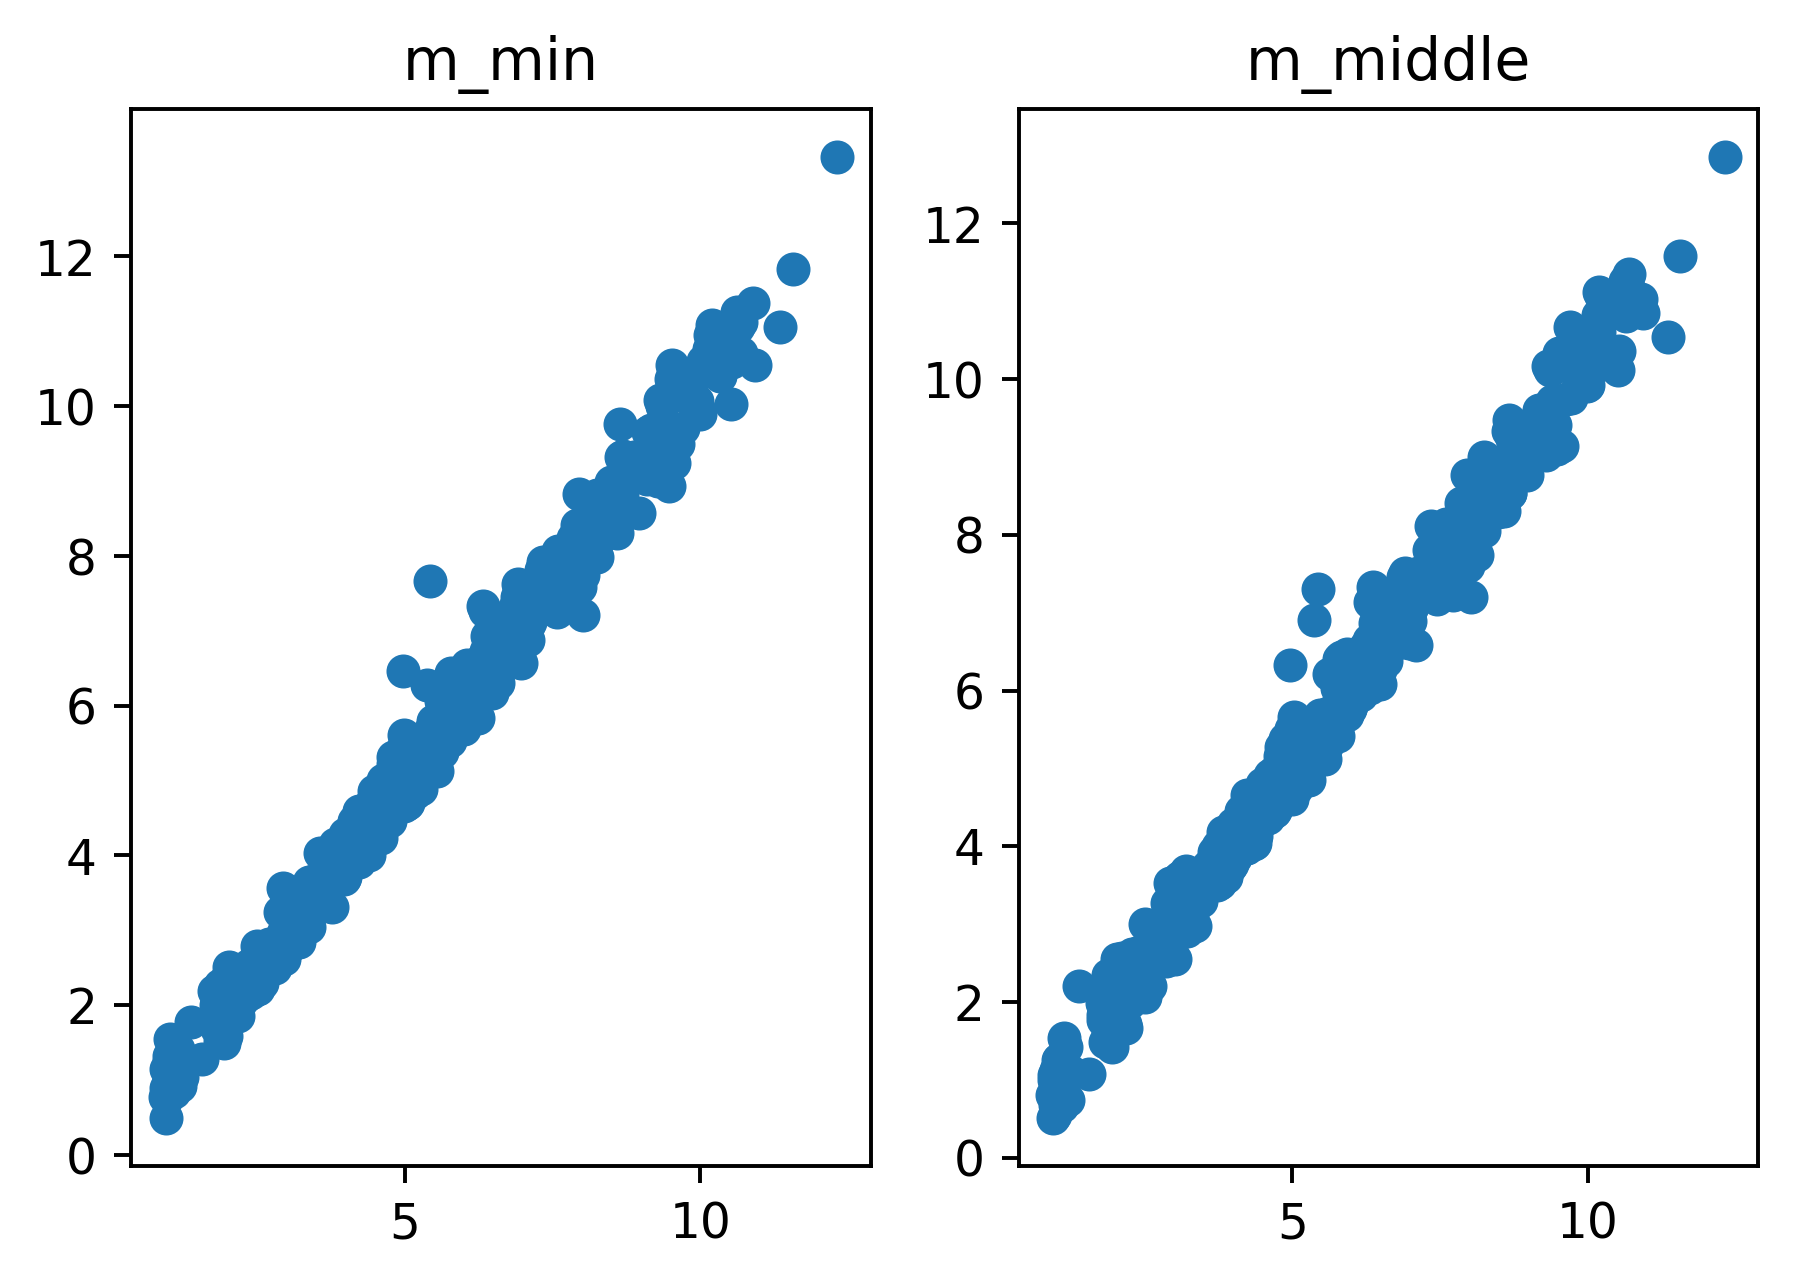

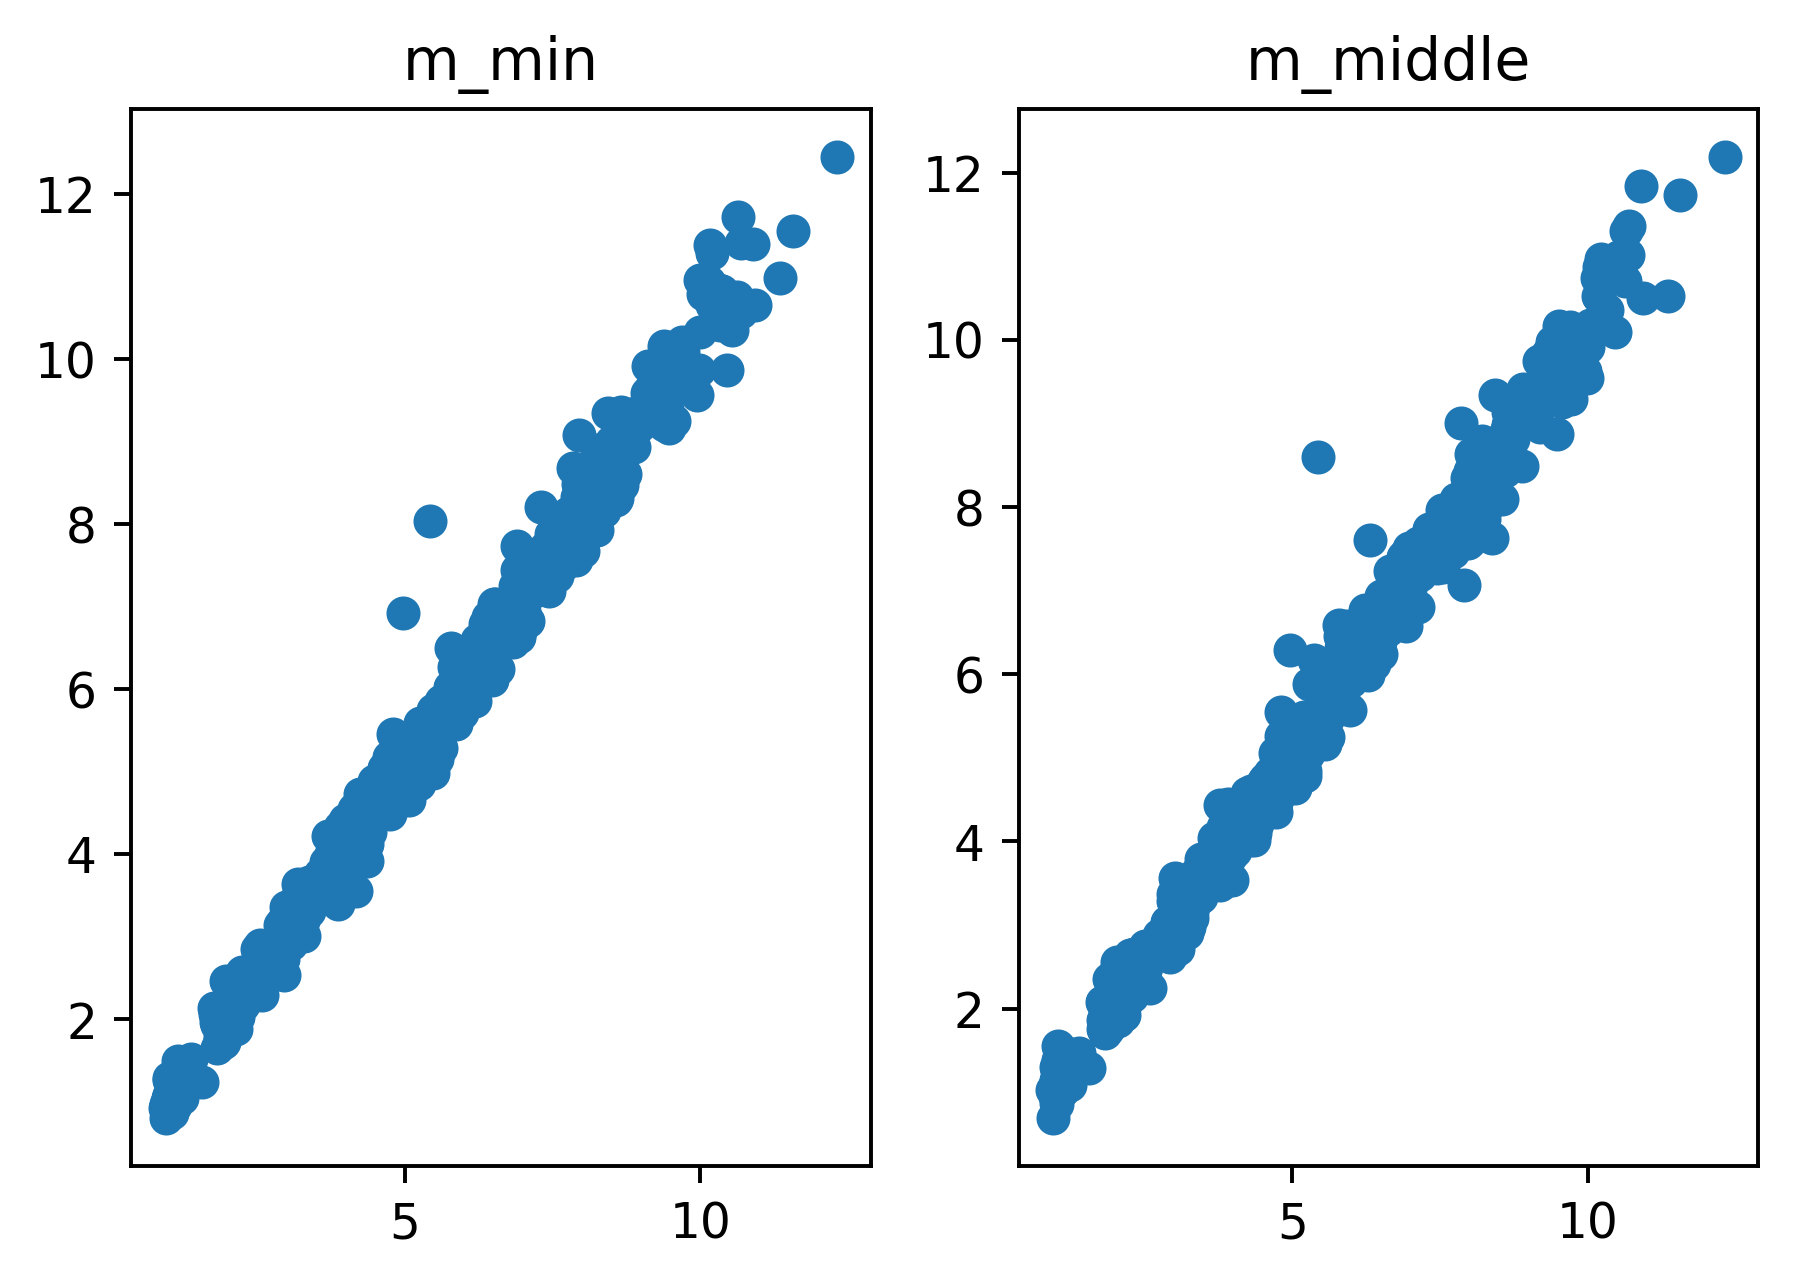

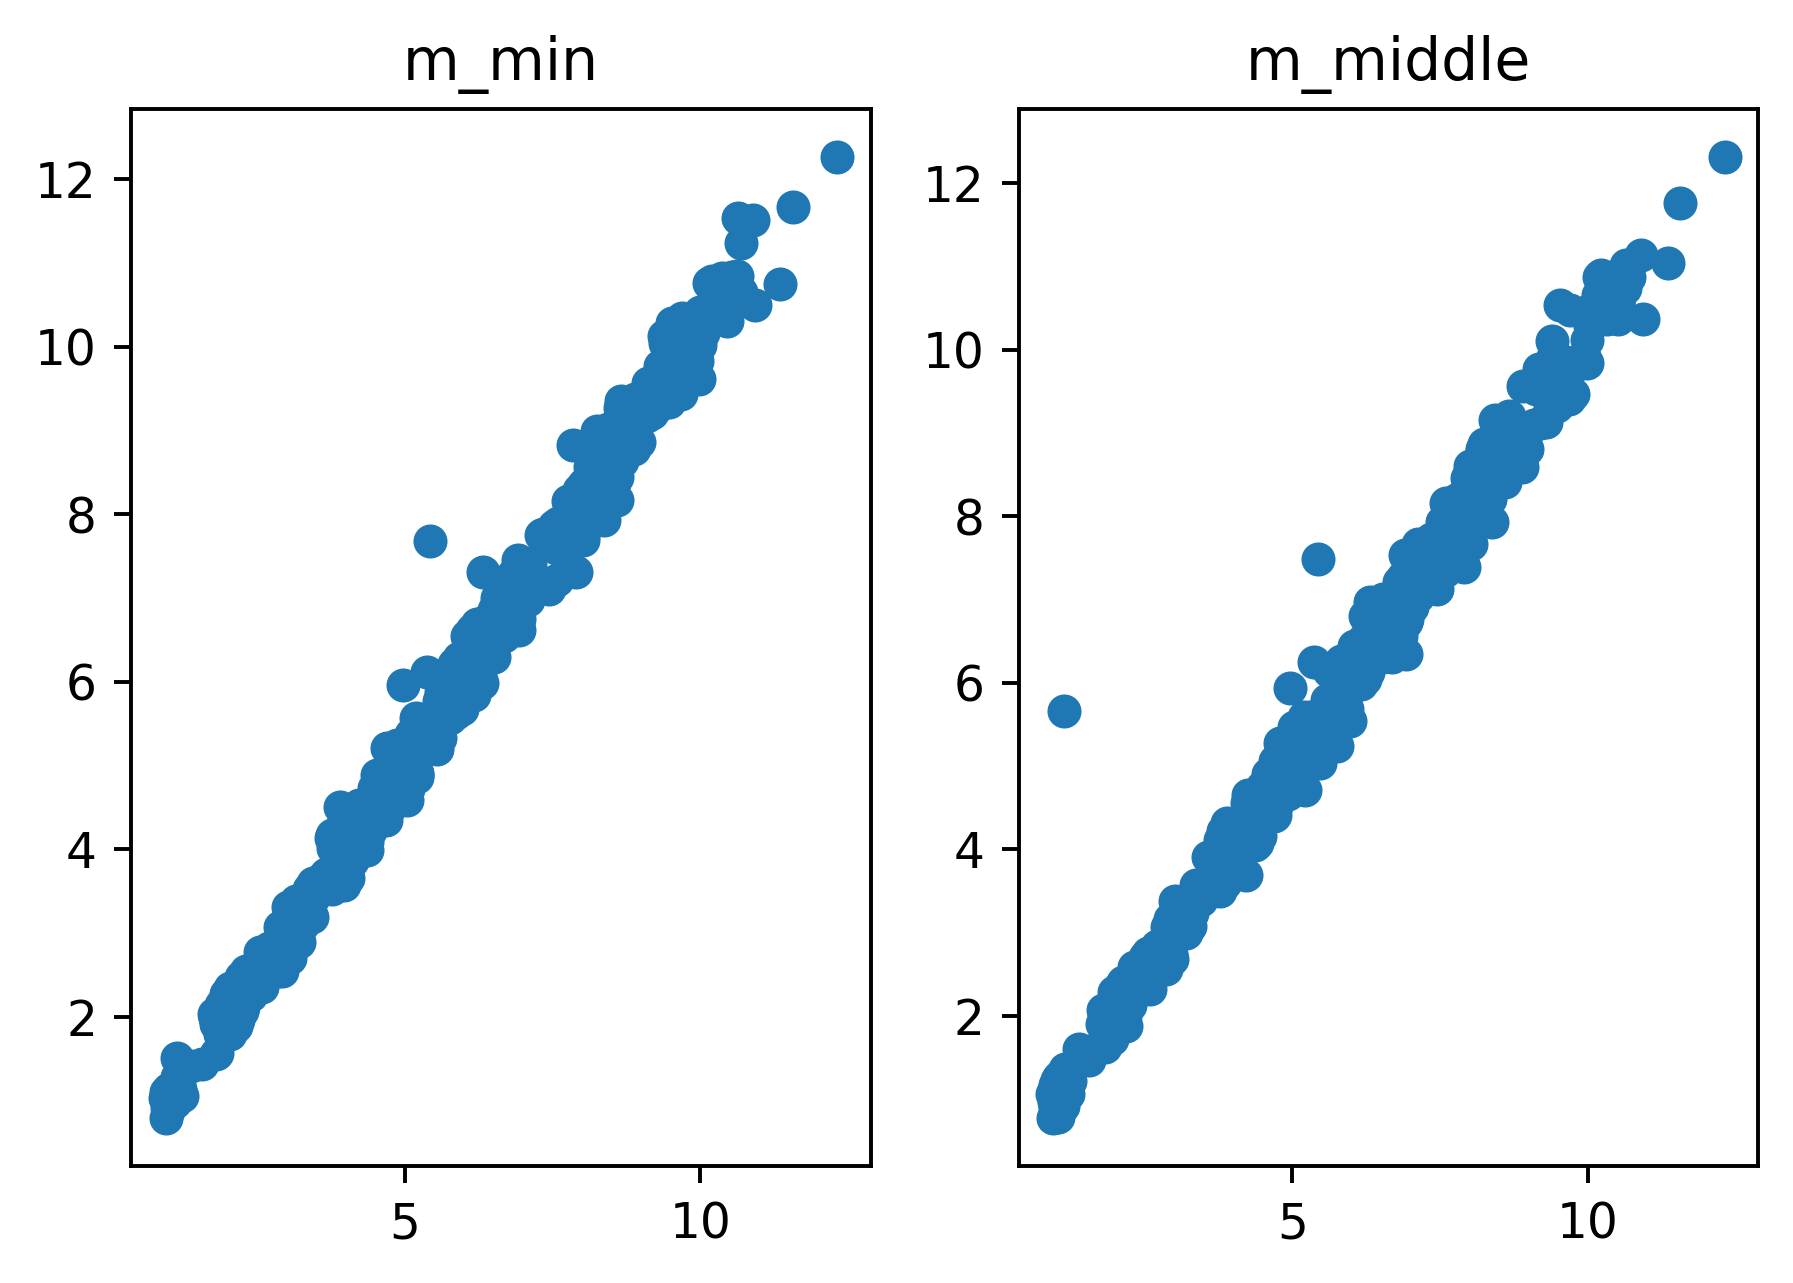

In [31]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0,0)
axs[0].set_title('empty')
axs[1].scatter(l_middle, m_min)
axs[1].set_title('m_min')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, m_middle)
axs[0].set_title('m_middle')
axs[1].scatter(m_middle, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, m_all)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(l_middle, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(l_middle, b6_max)
axs[1].set_title('m_middle')

#l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_min,b6_middle,b6_max

Text(0.5, 1.0, 'm_middle')

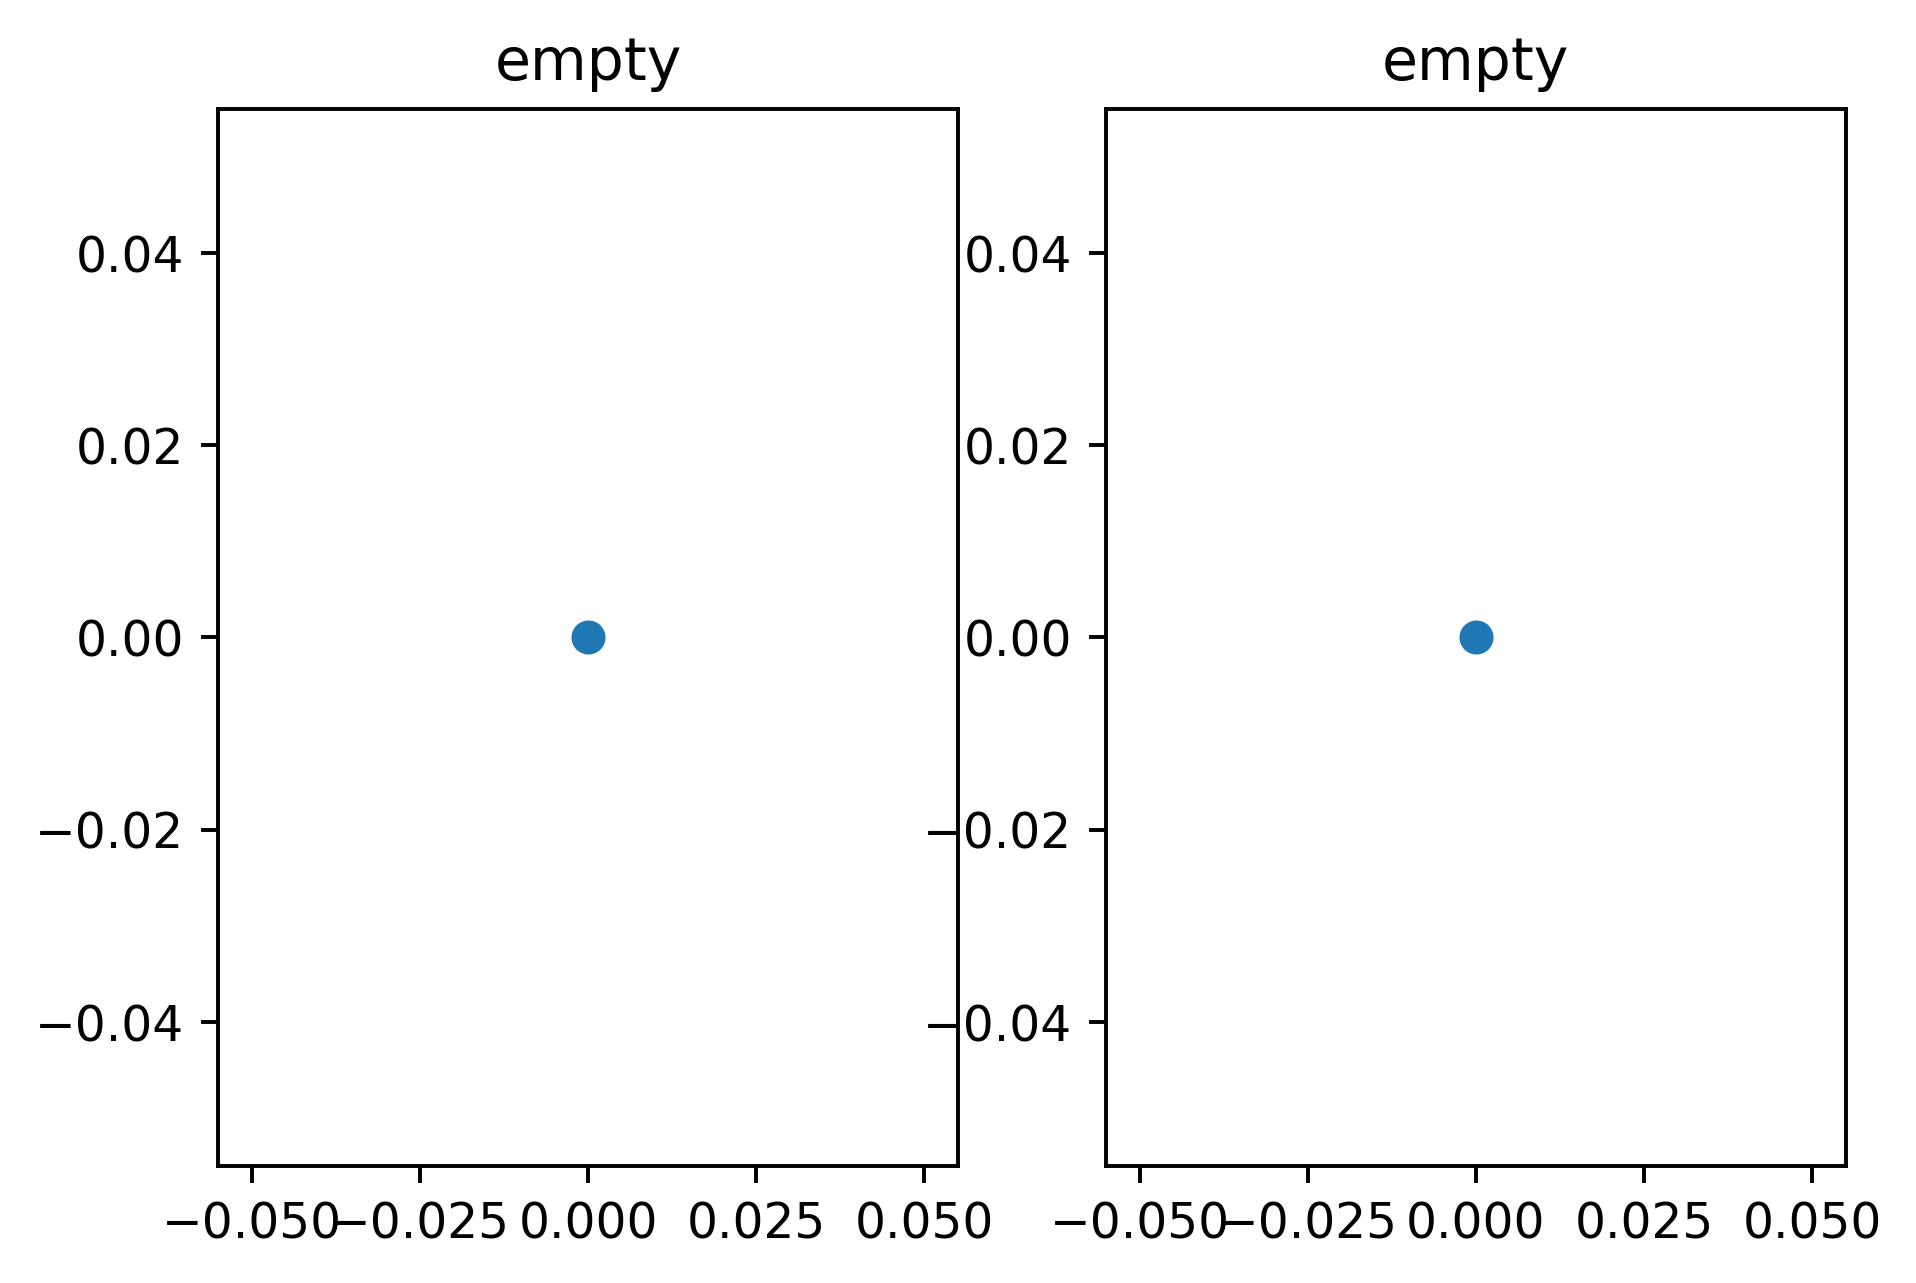

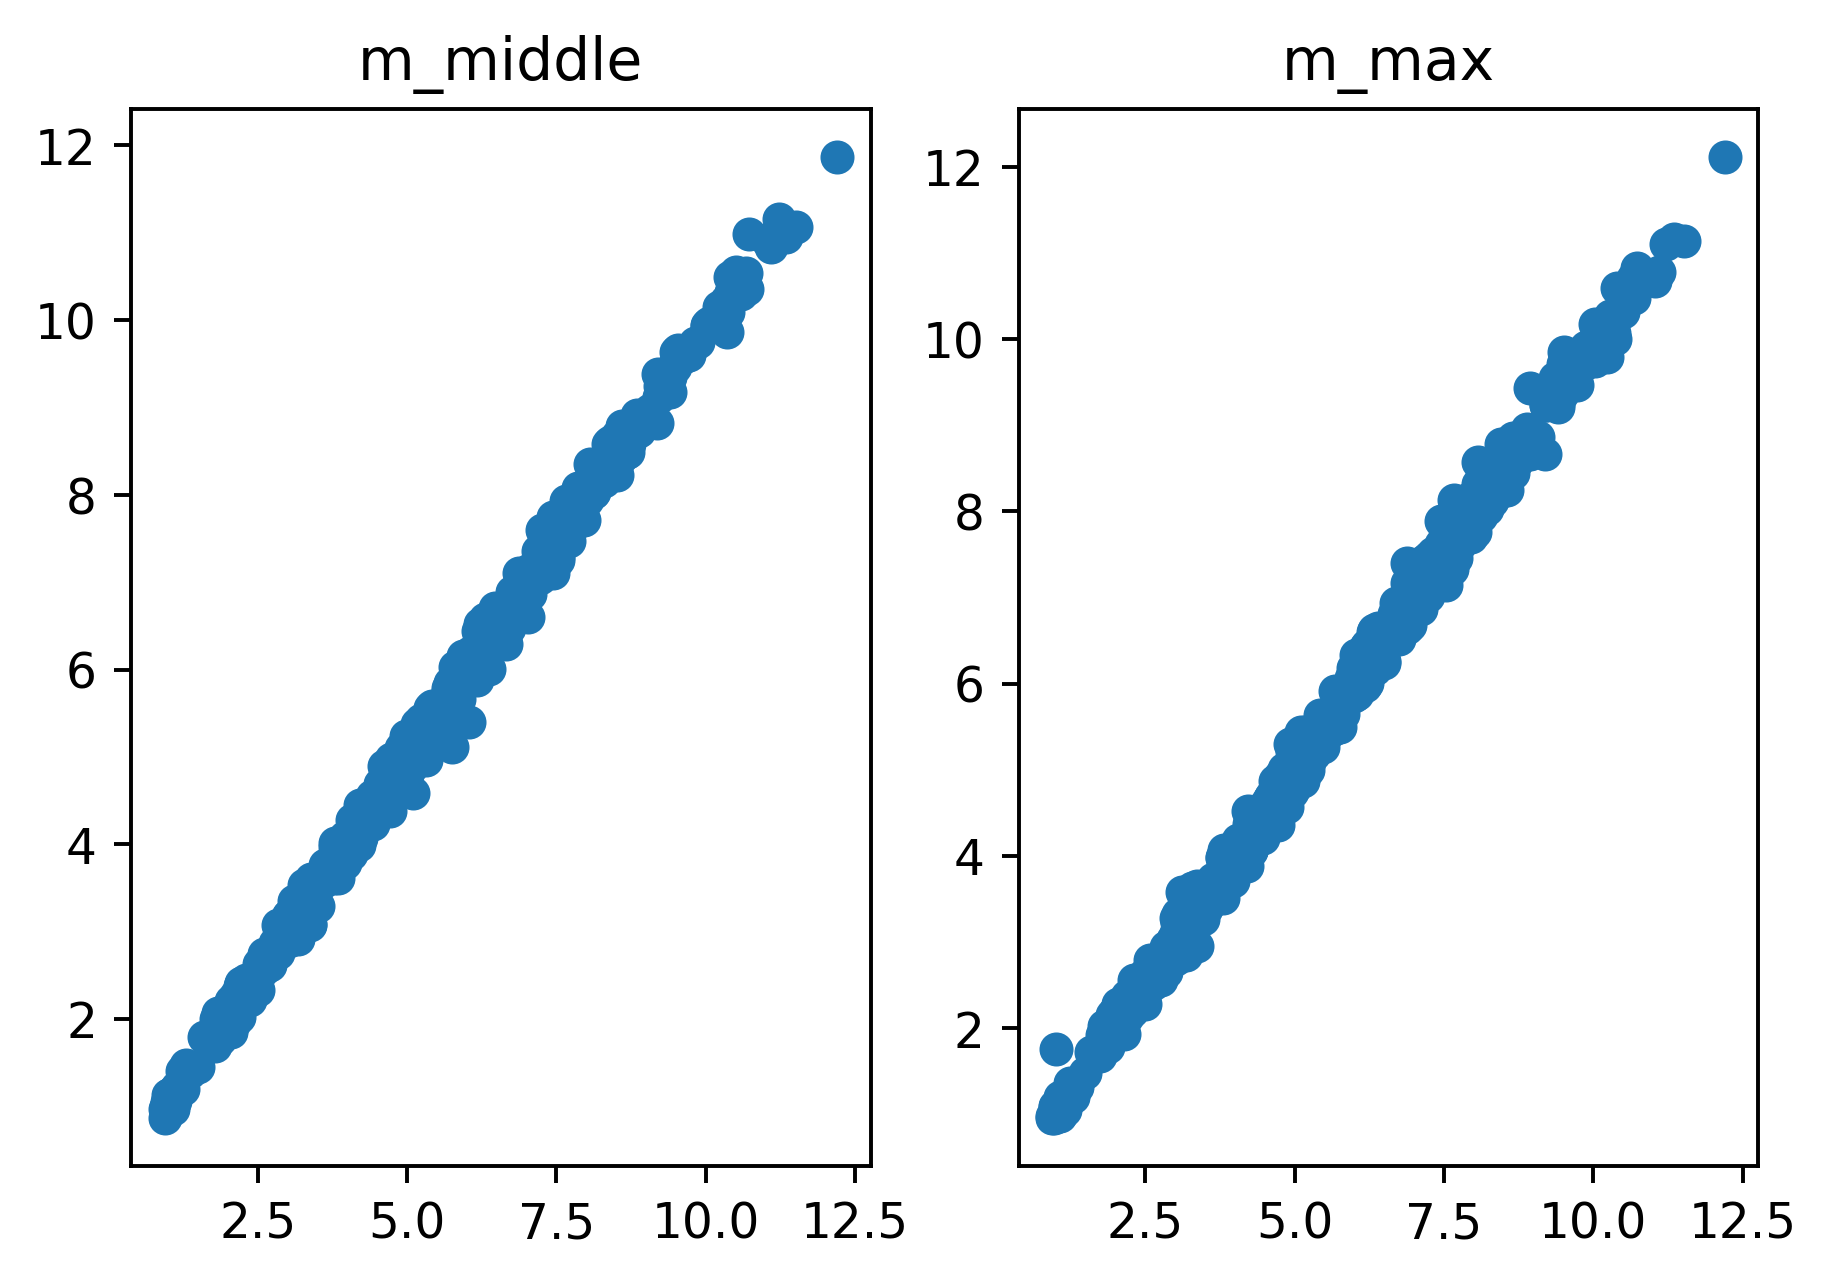

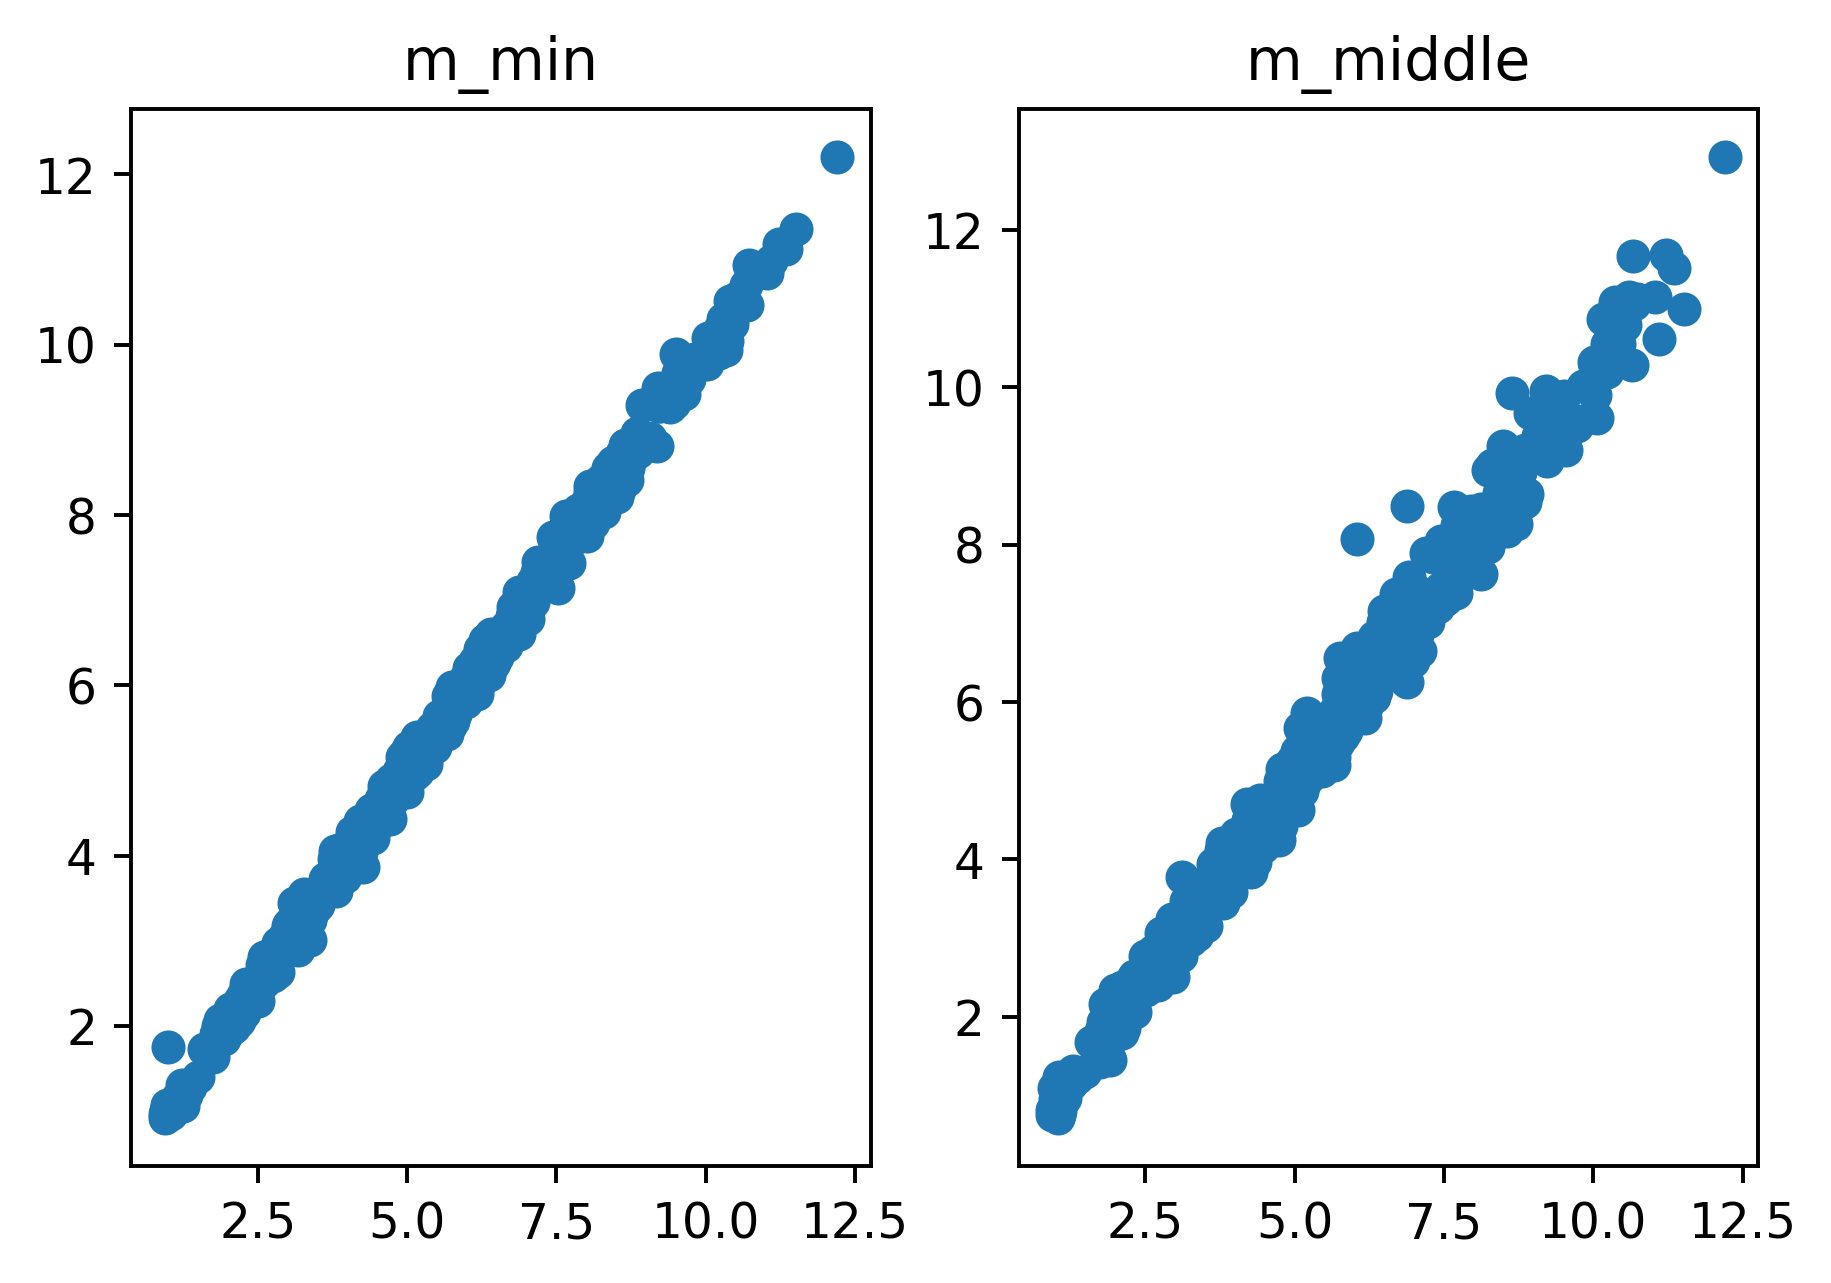

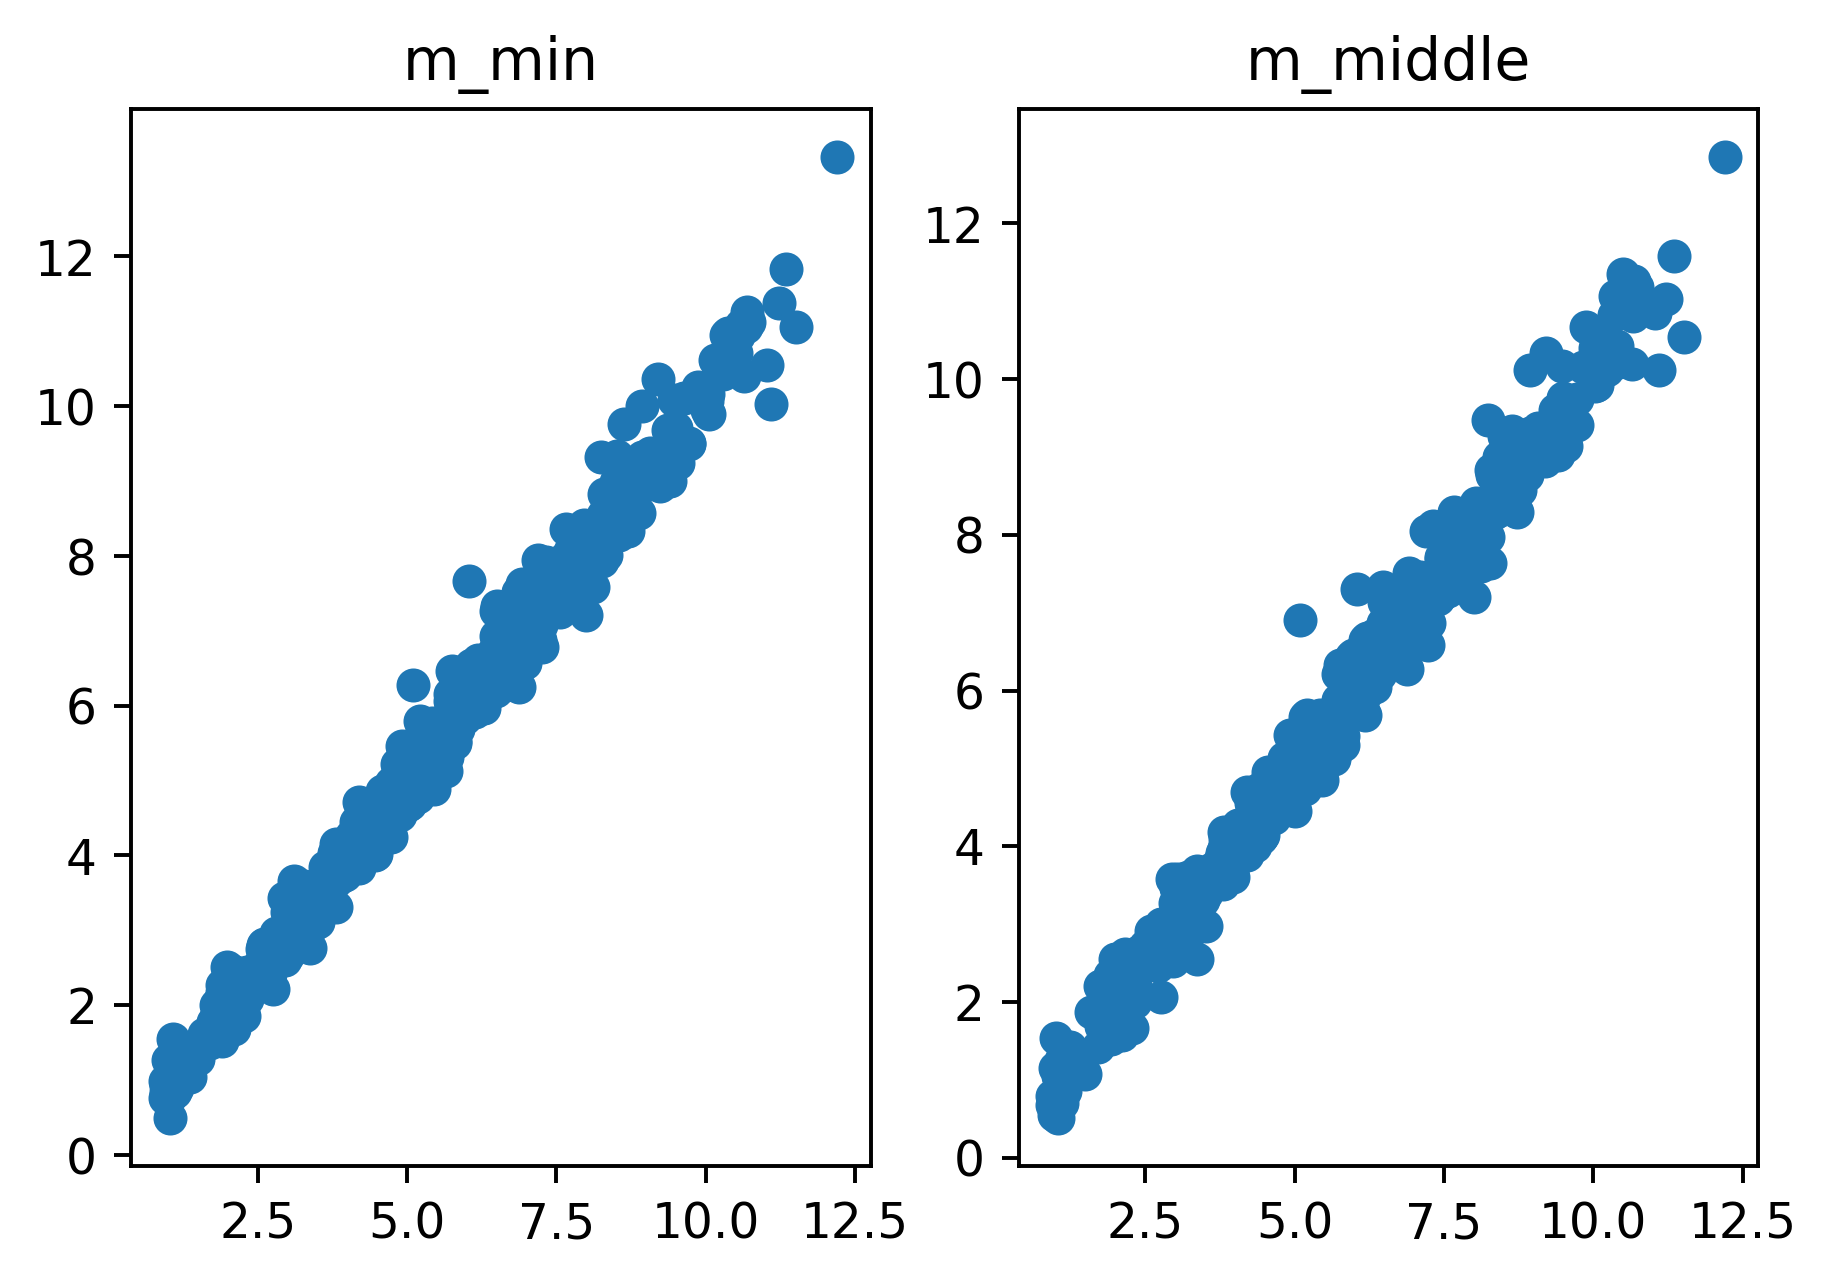

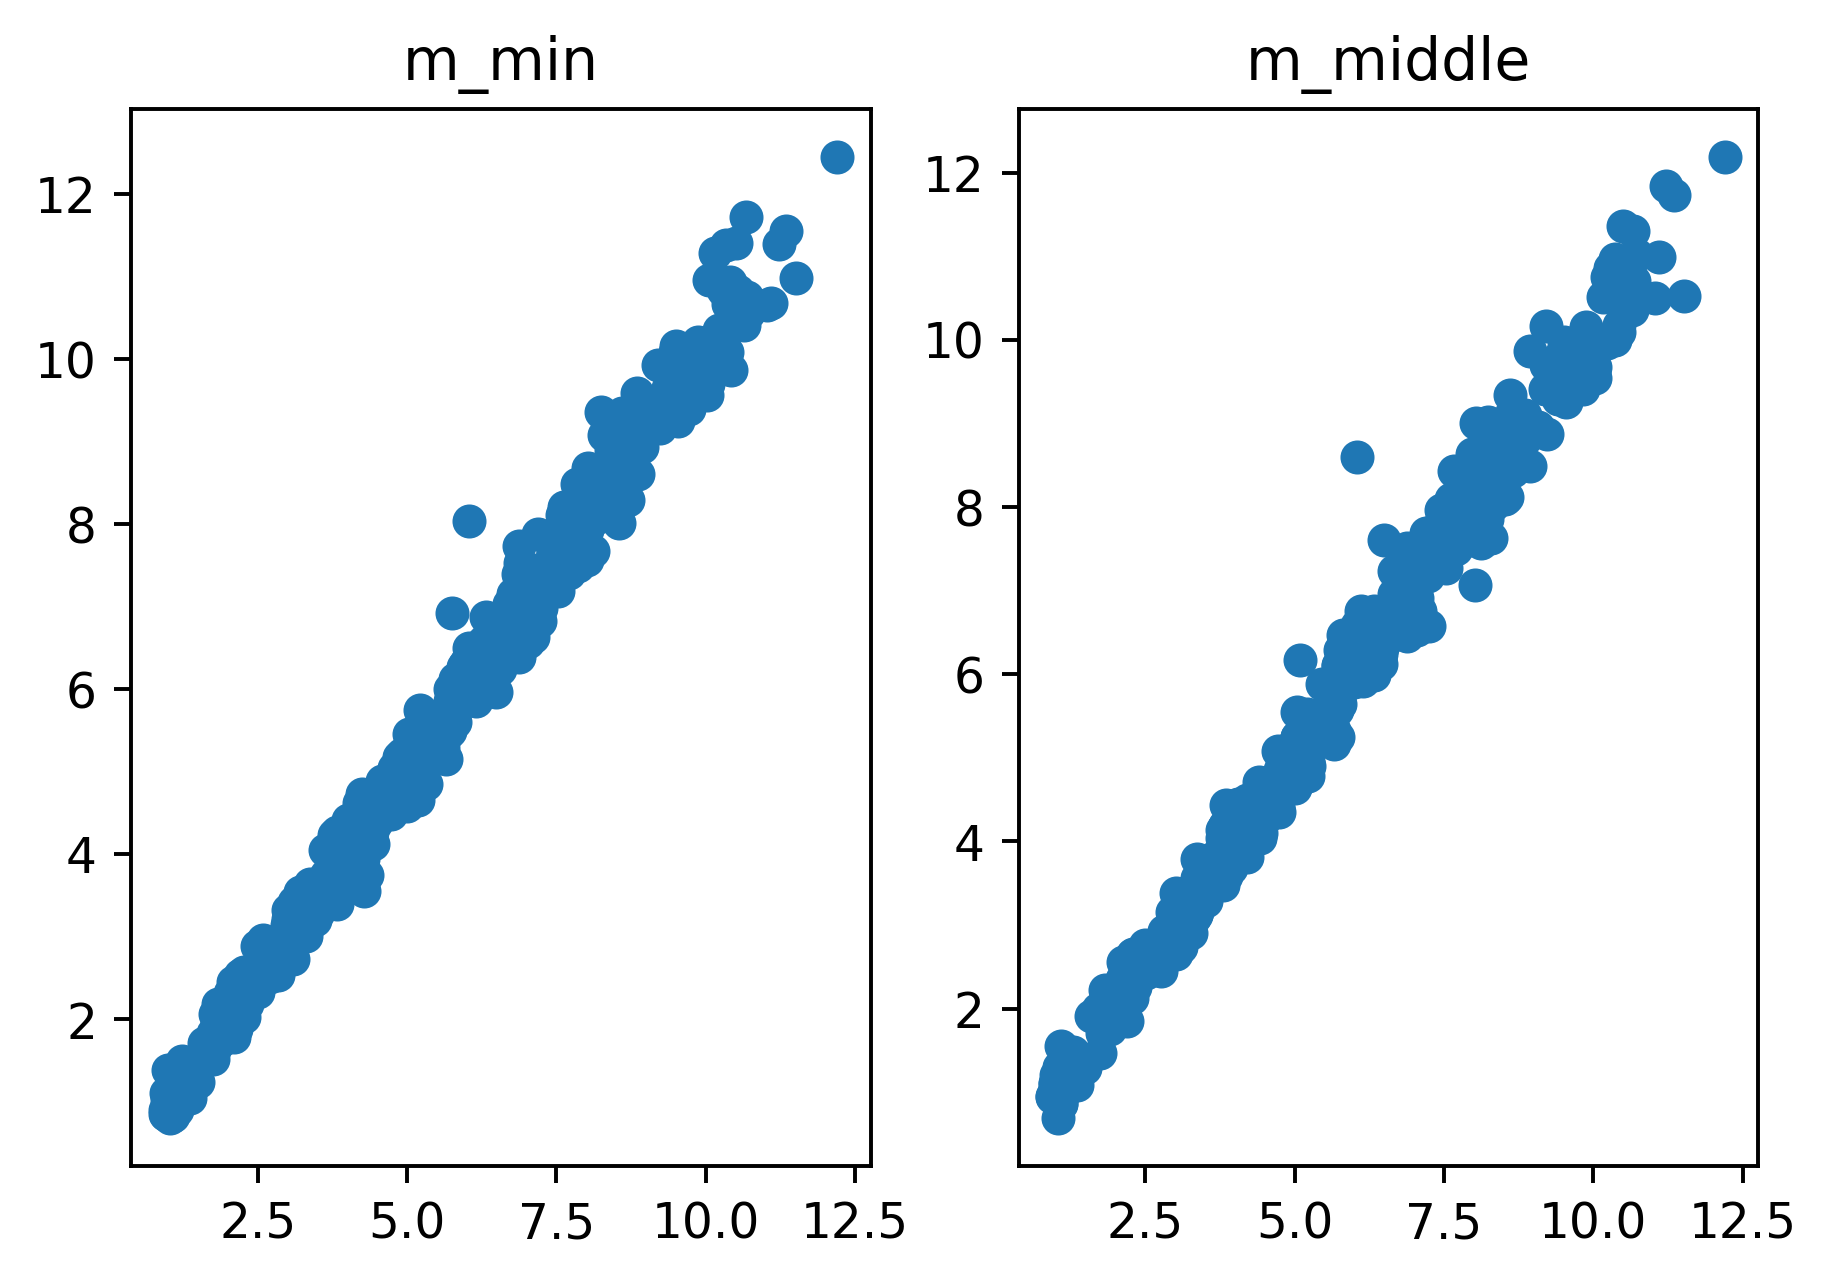

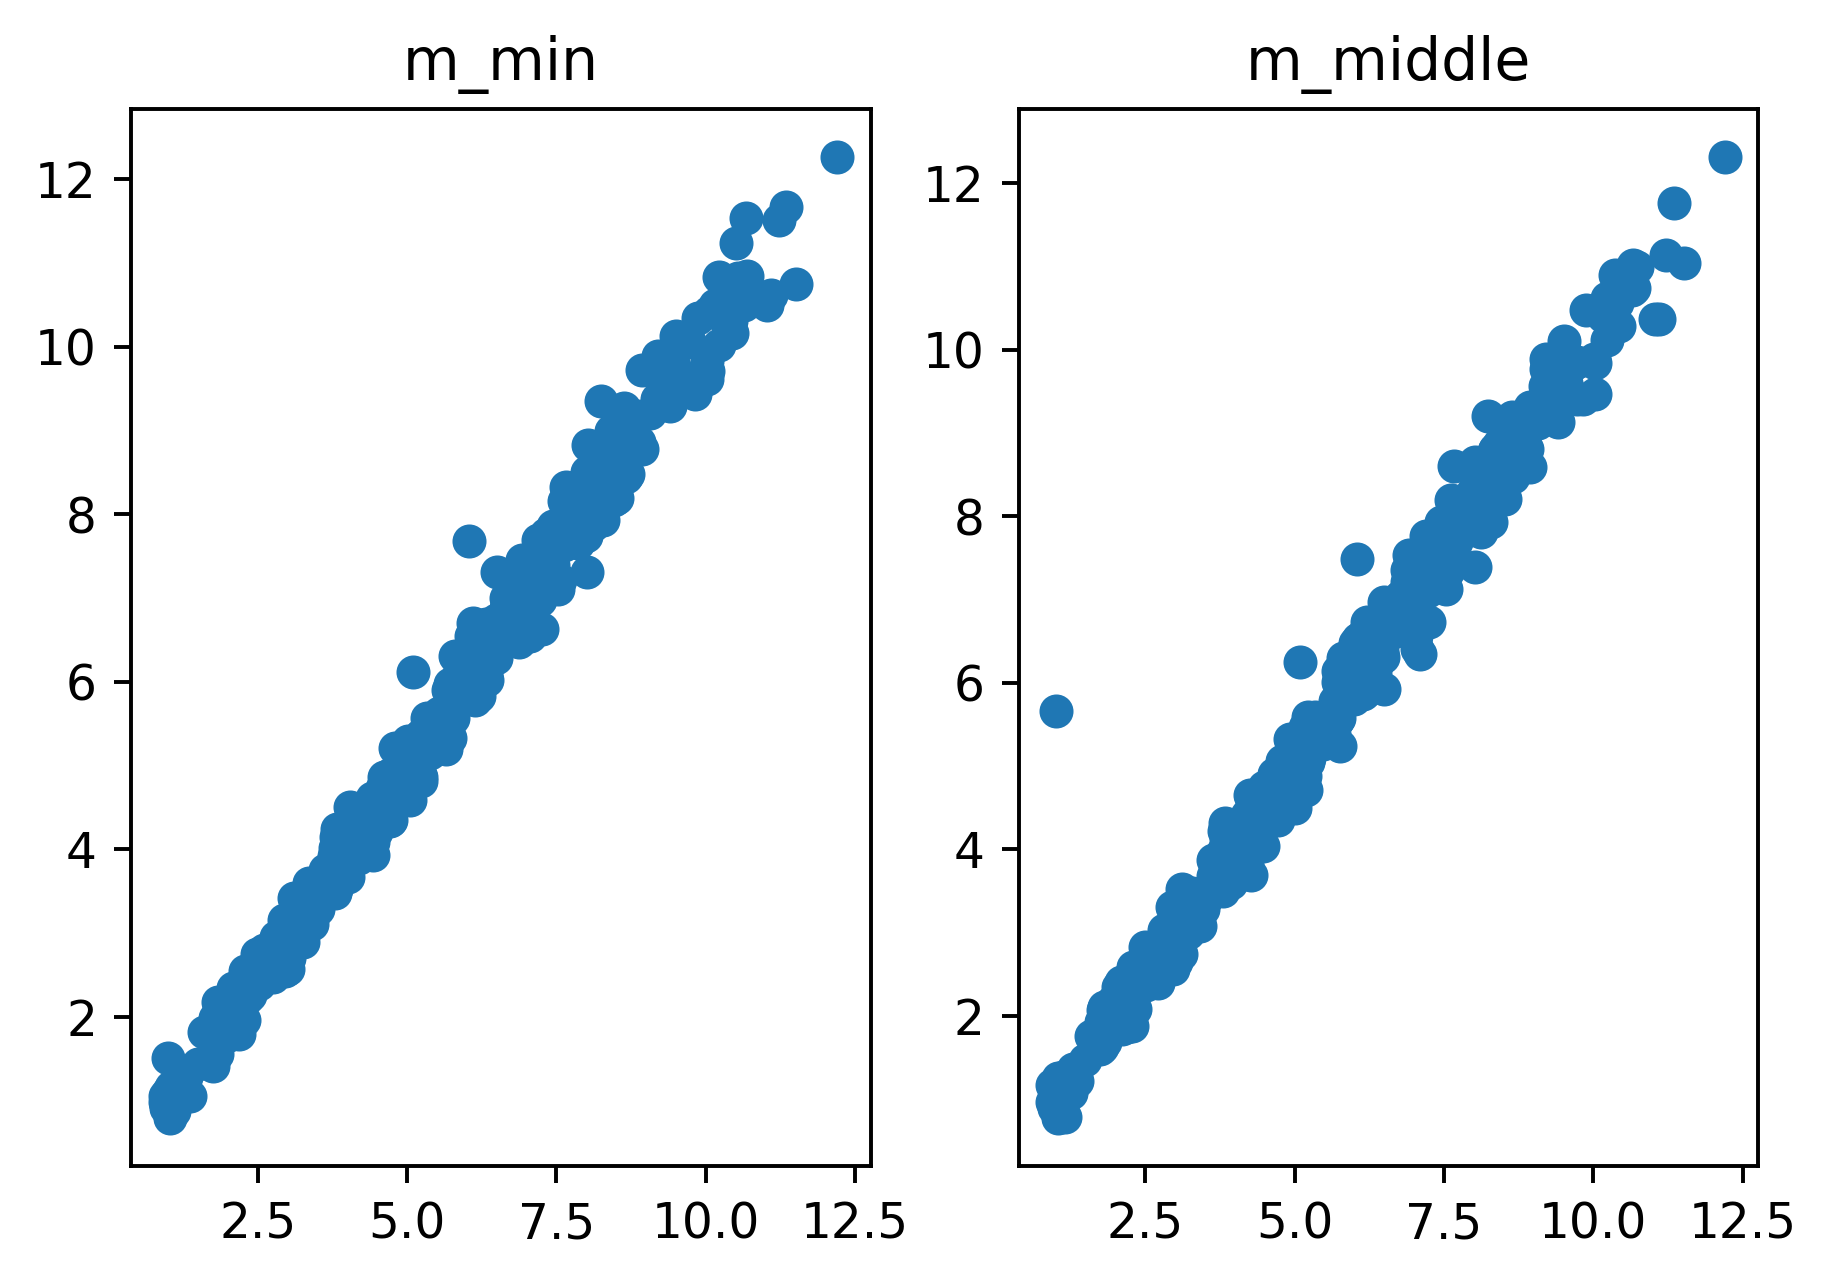

In [32]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, m_middle)
axs[0].set_title('m_middle')
axs[1].scatter(m_min, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, m_all)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

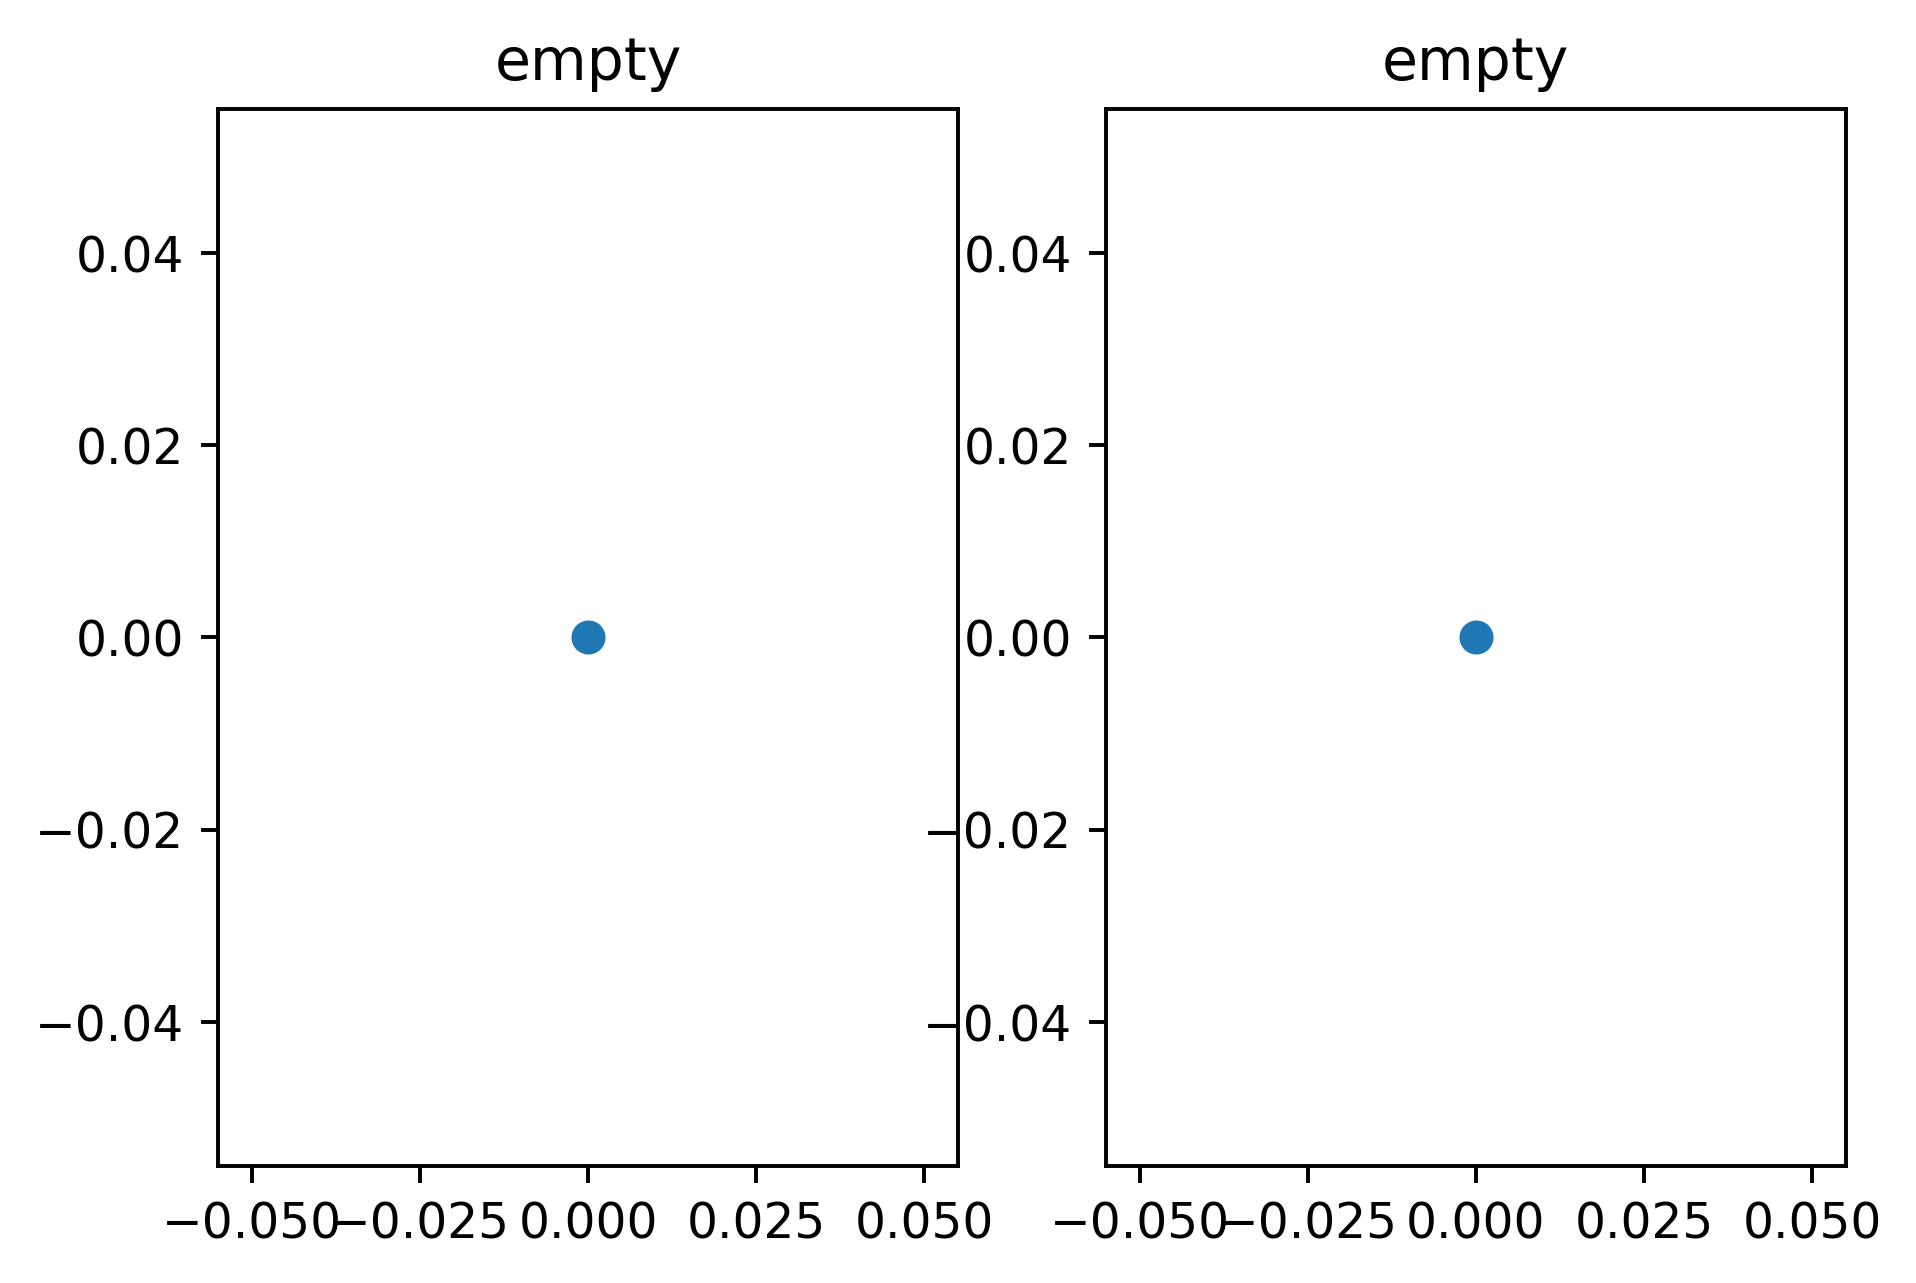

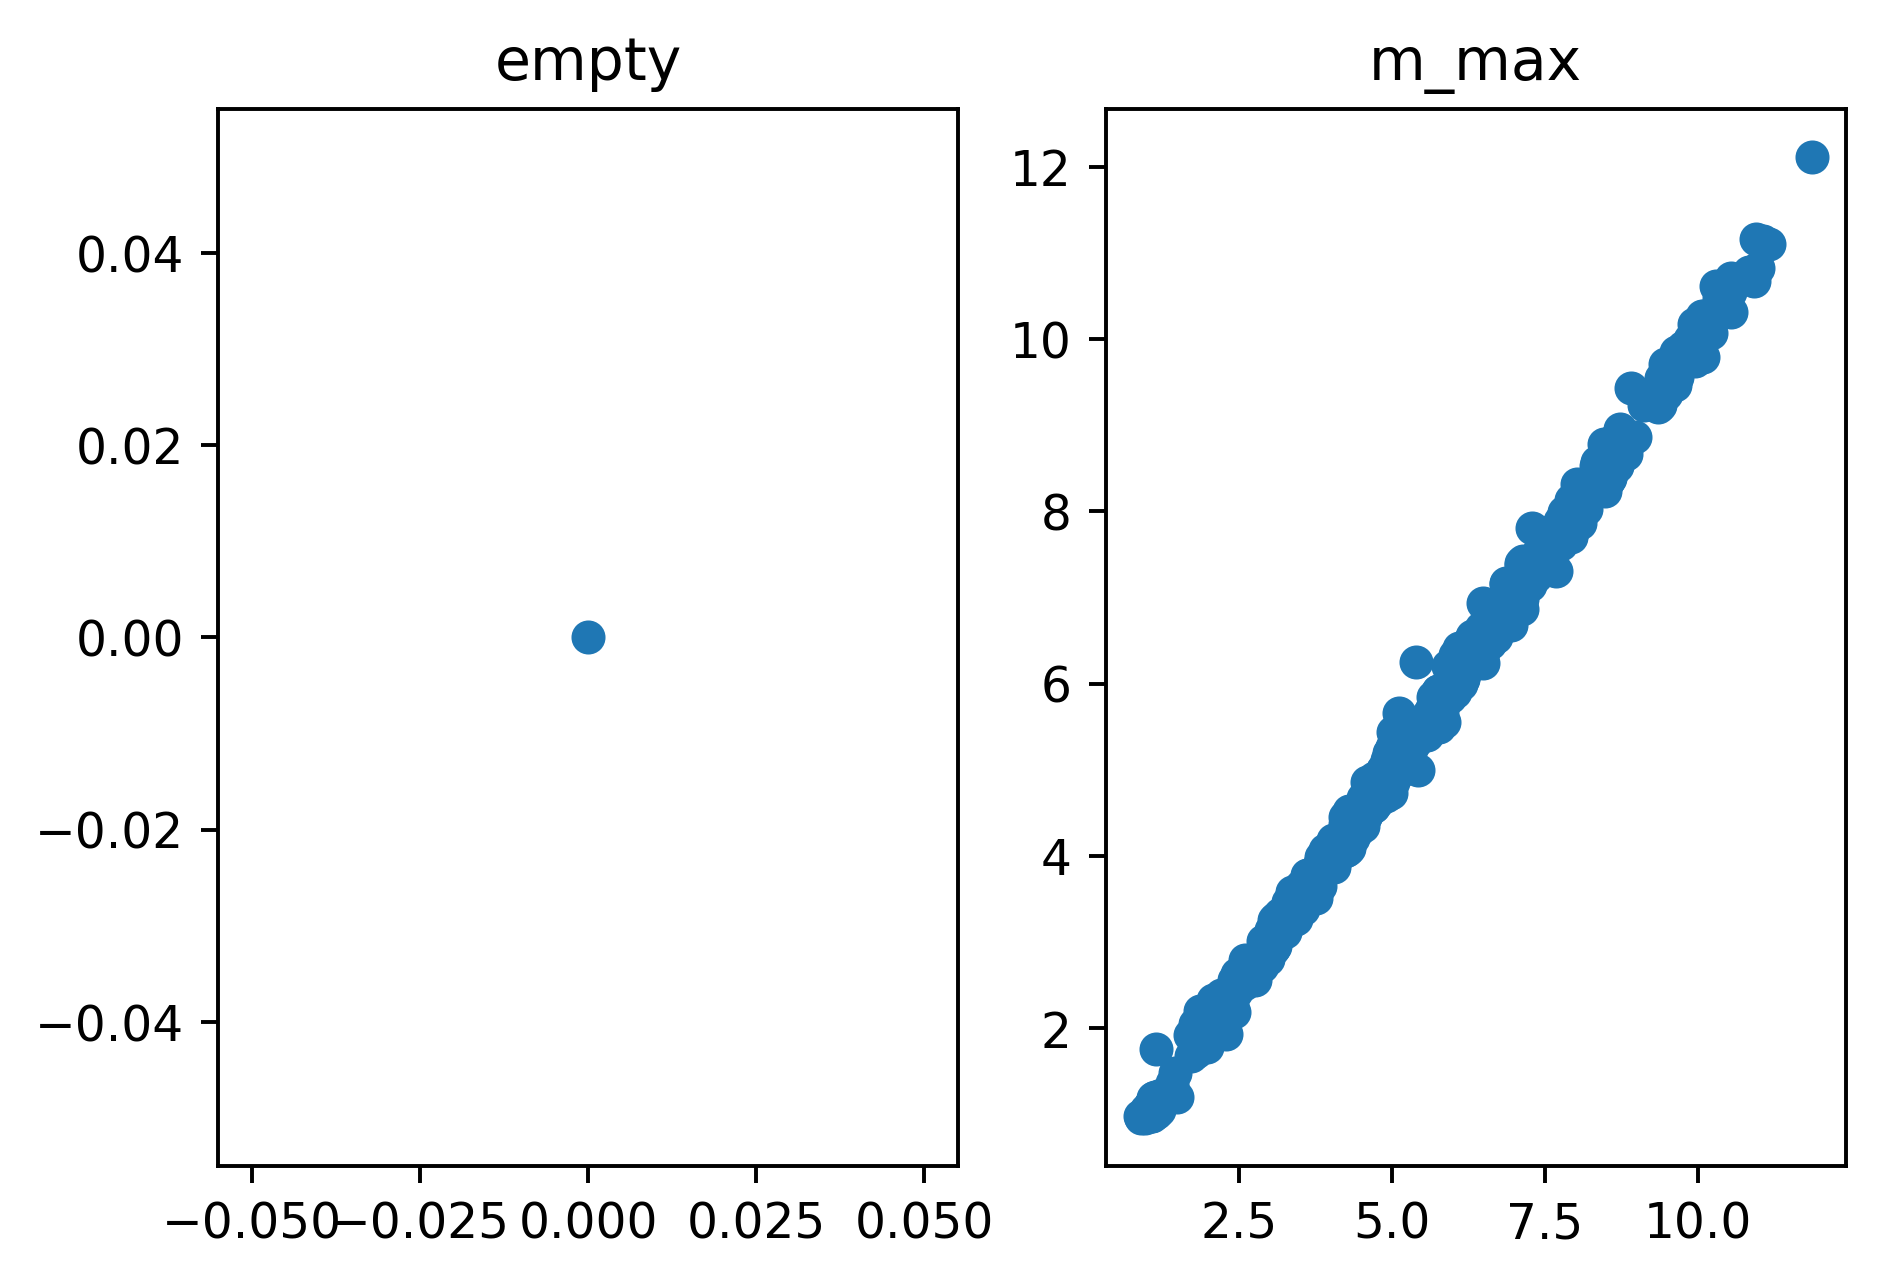

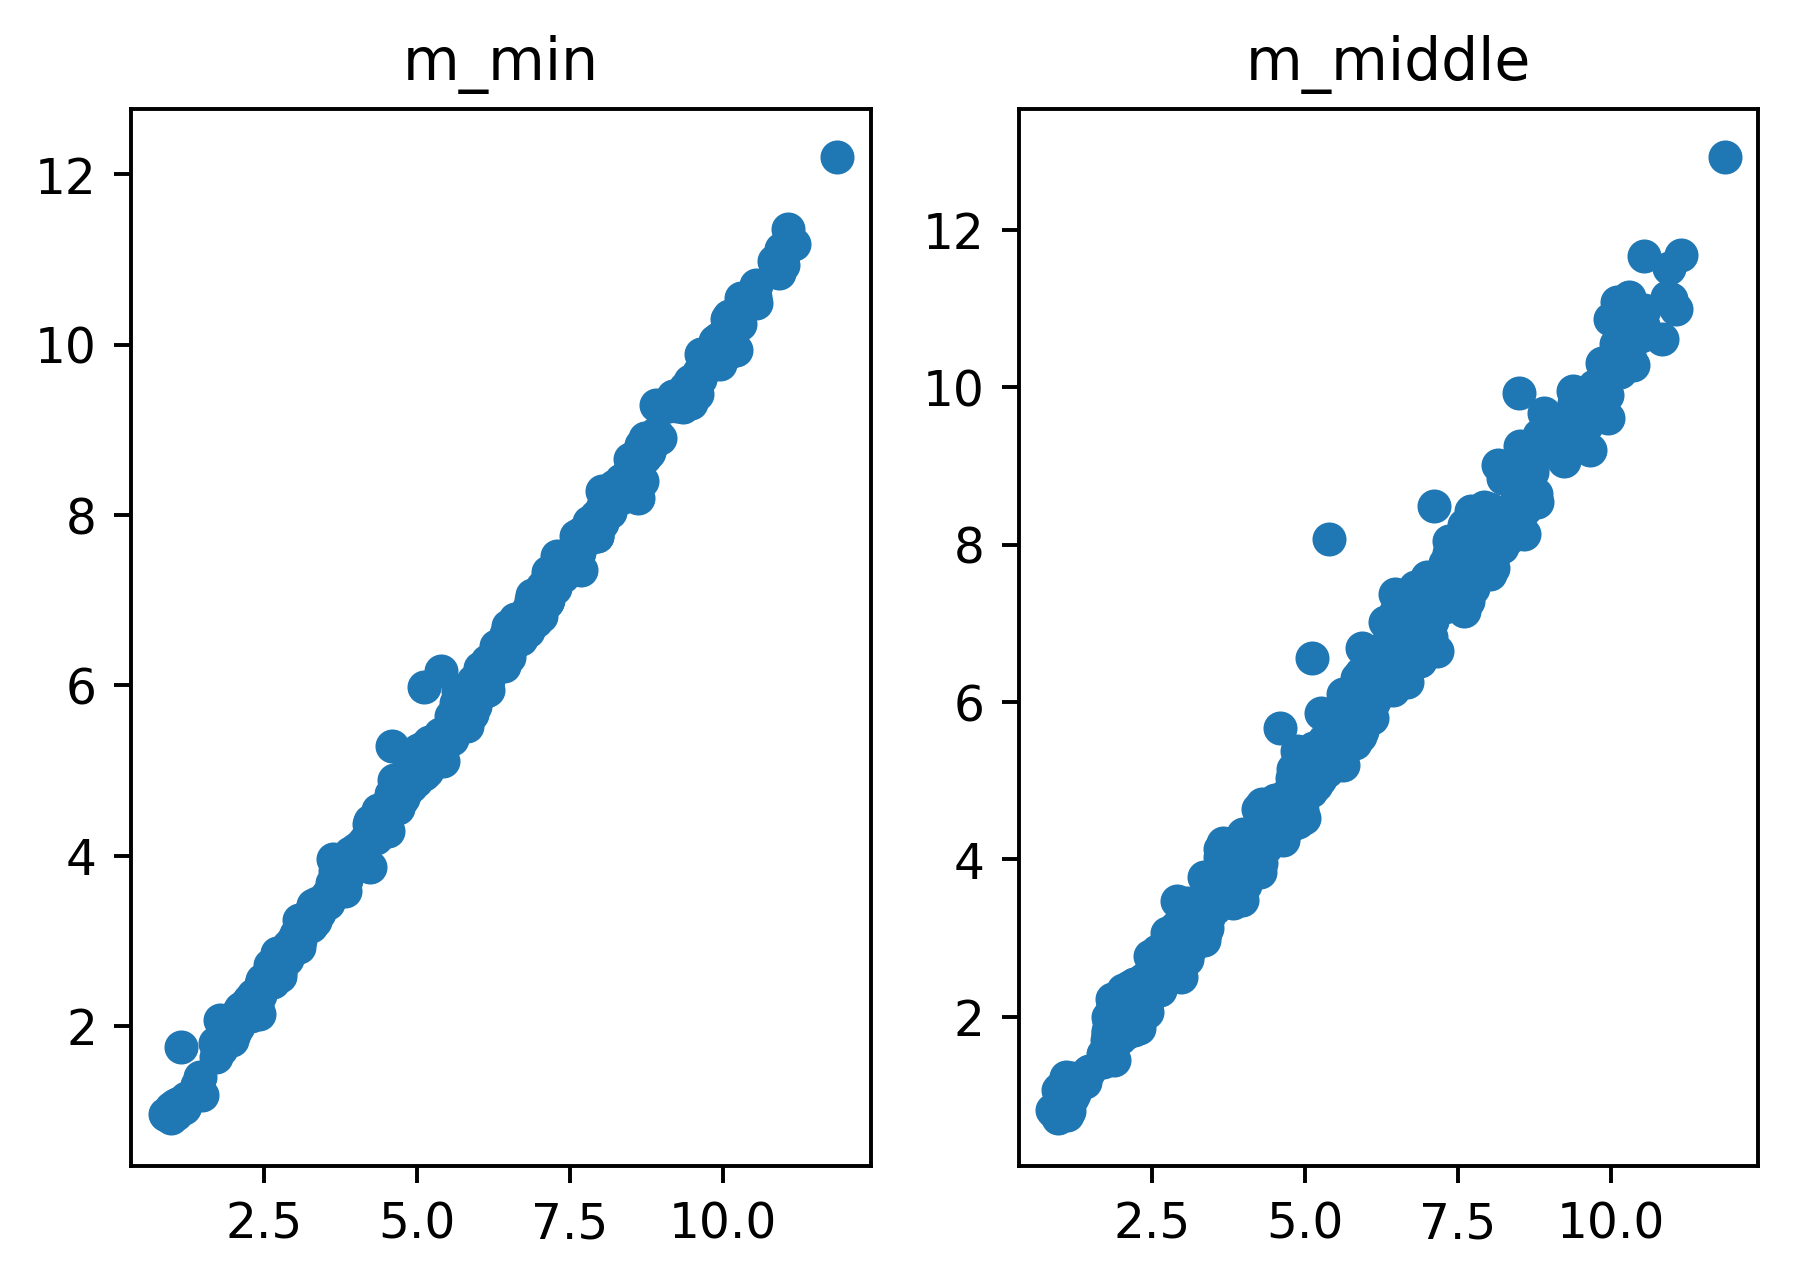

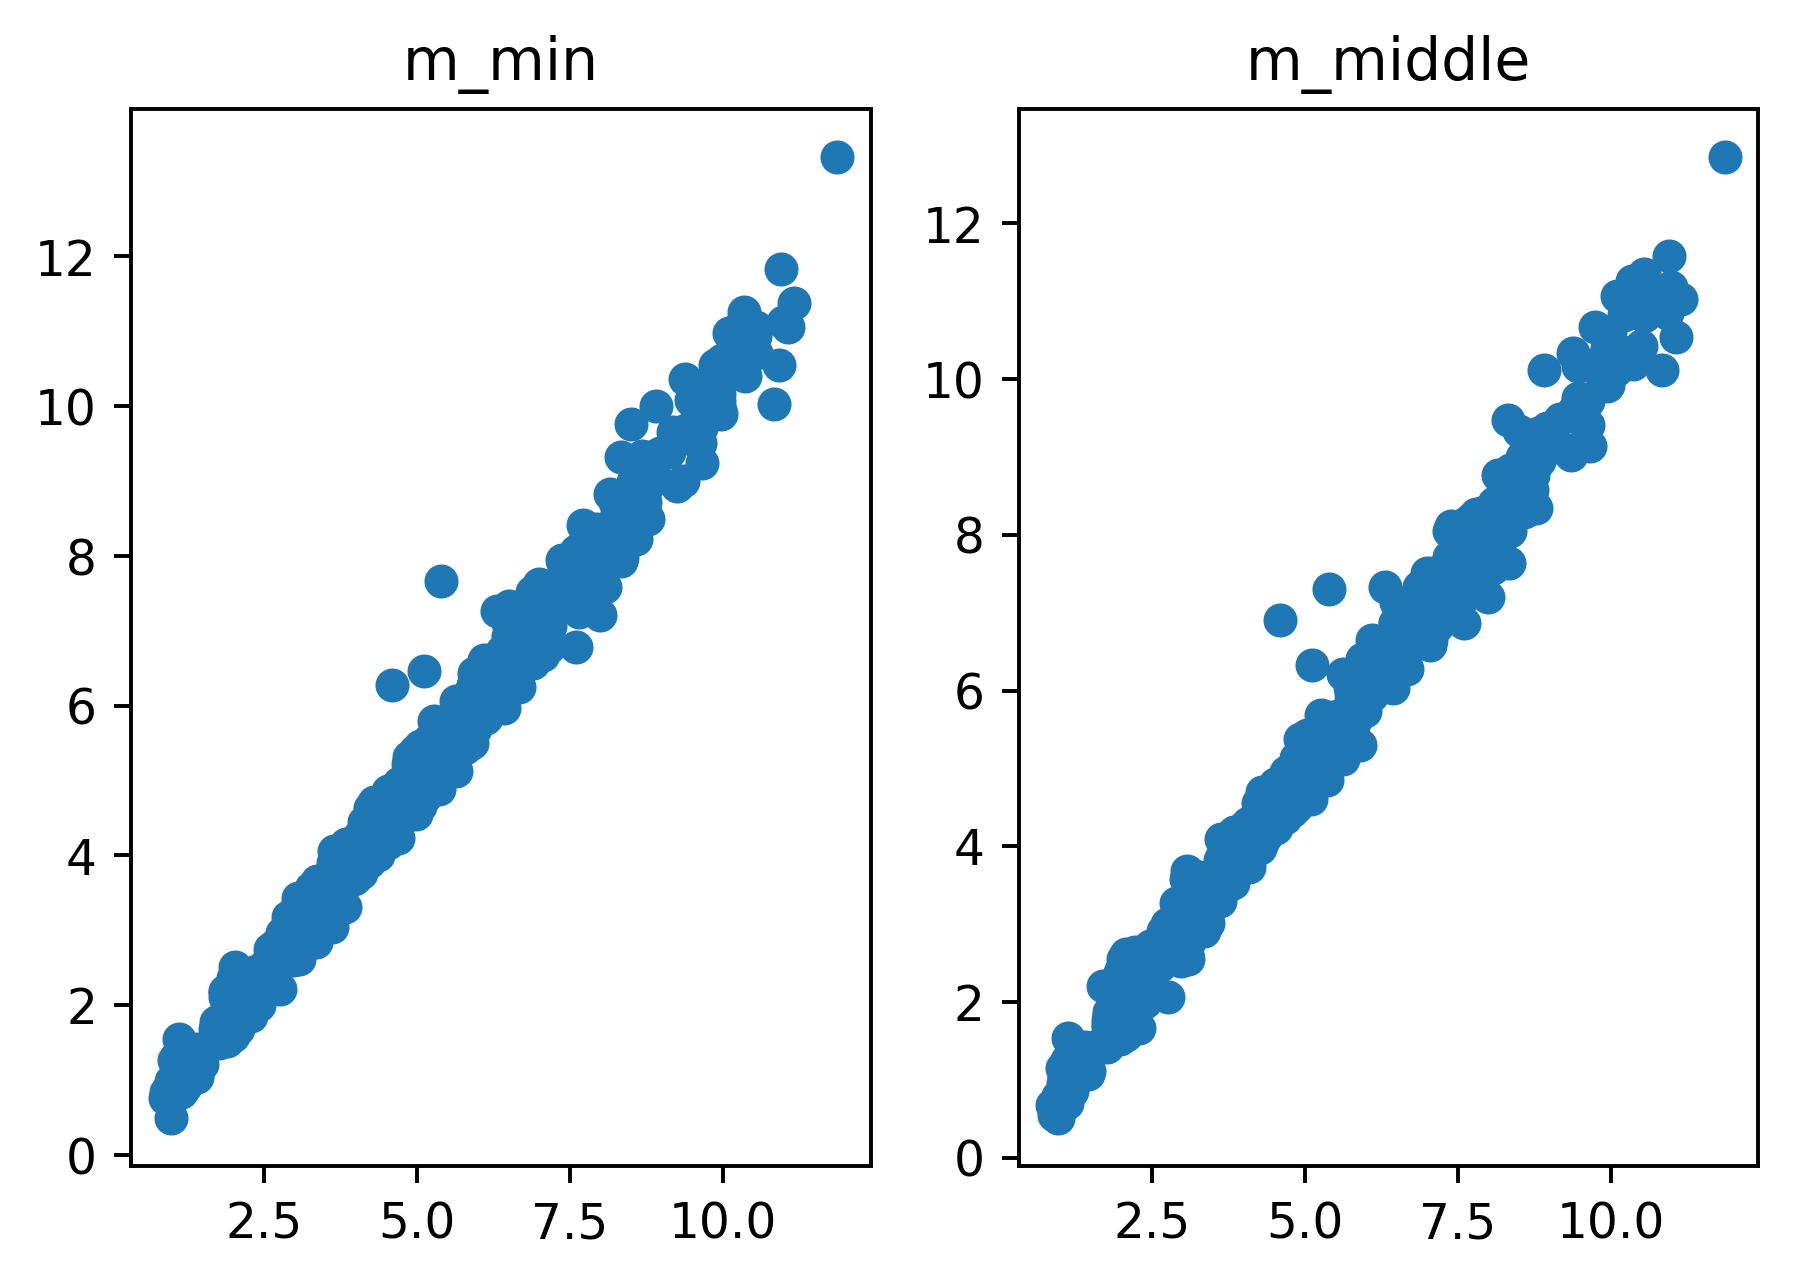

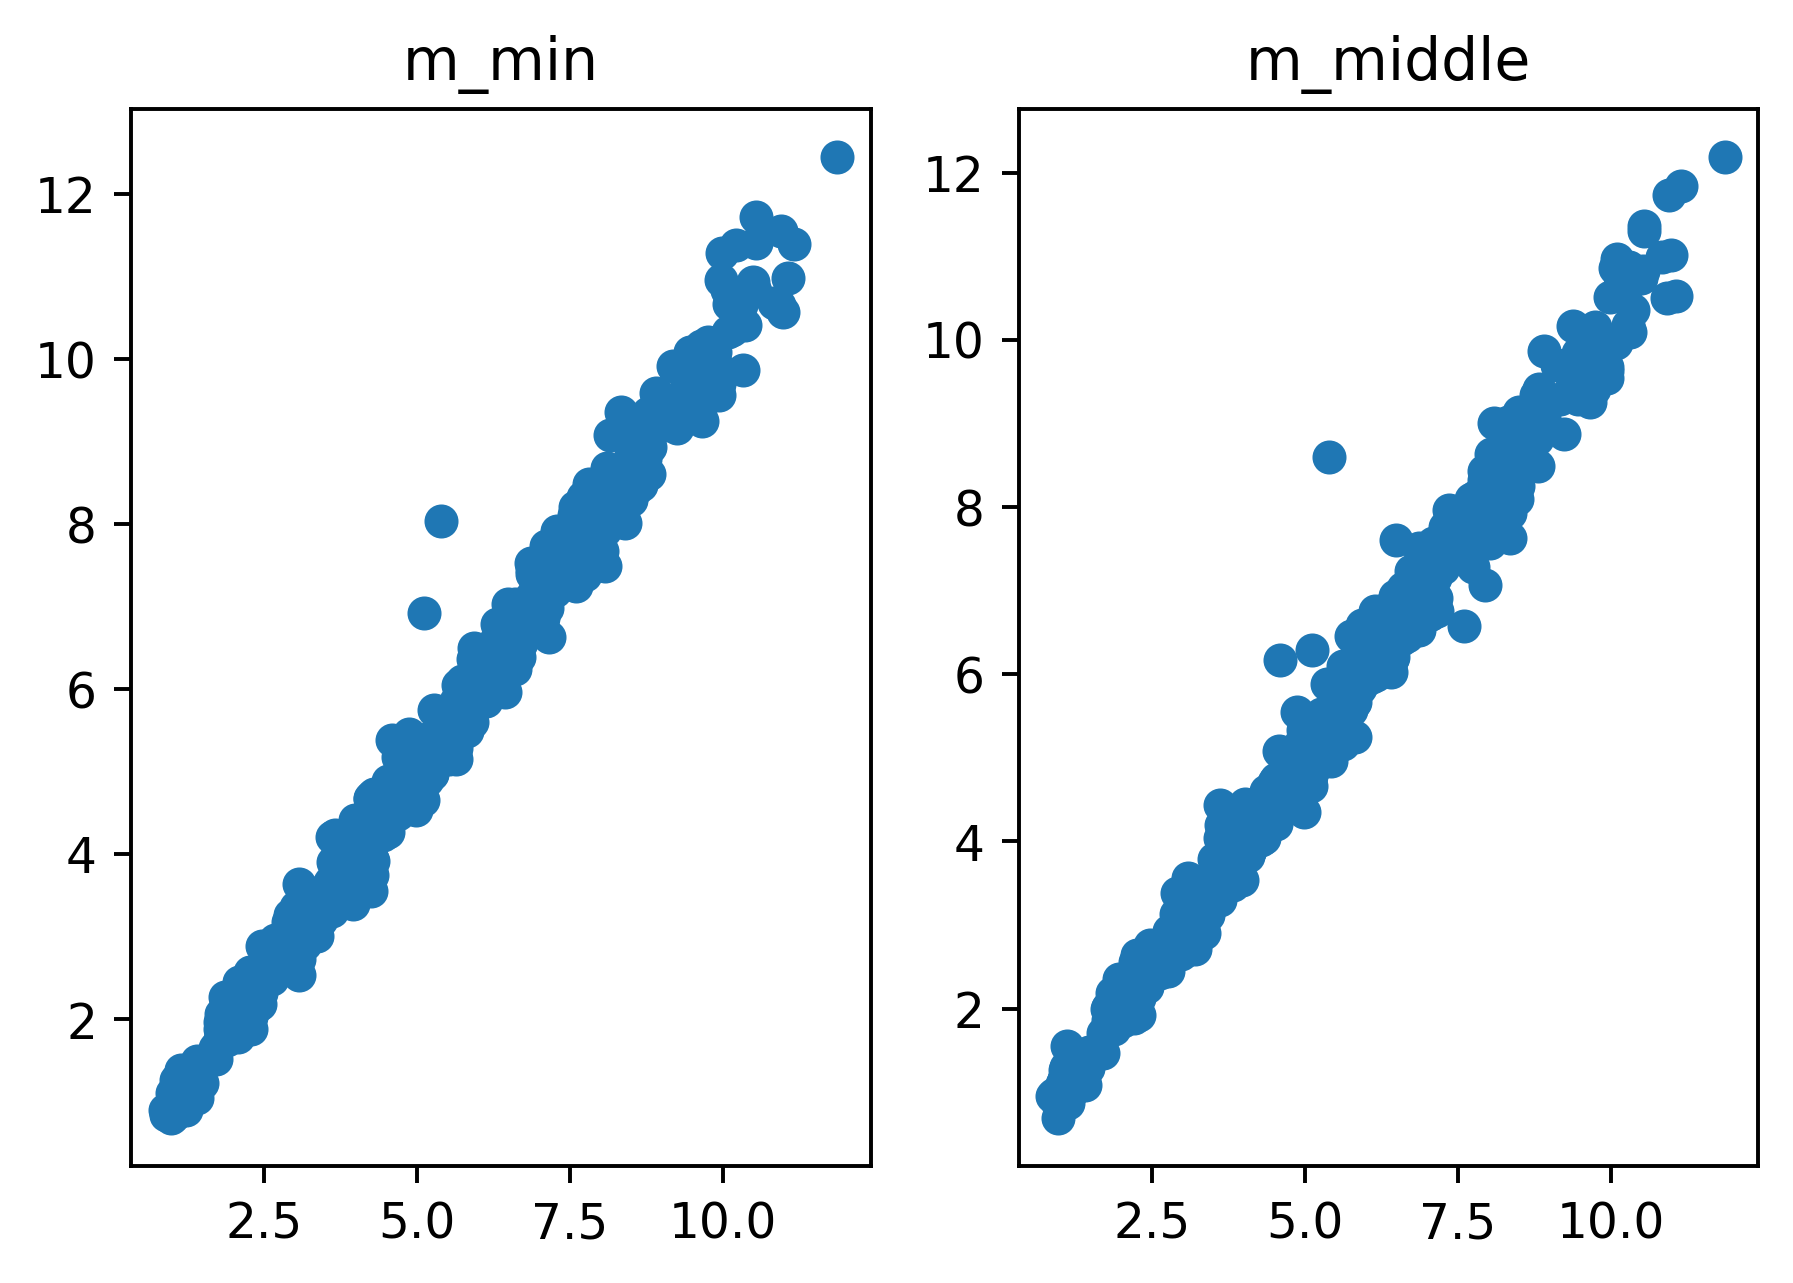

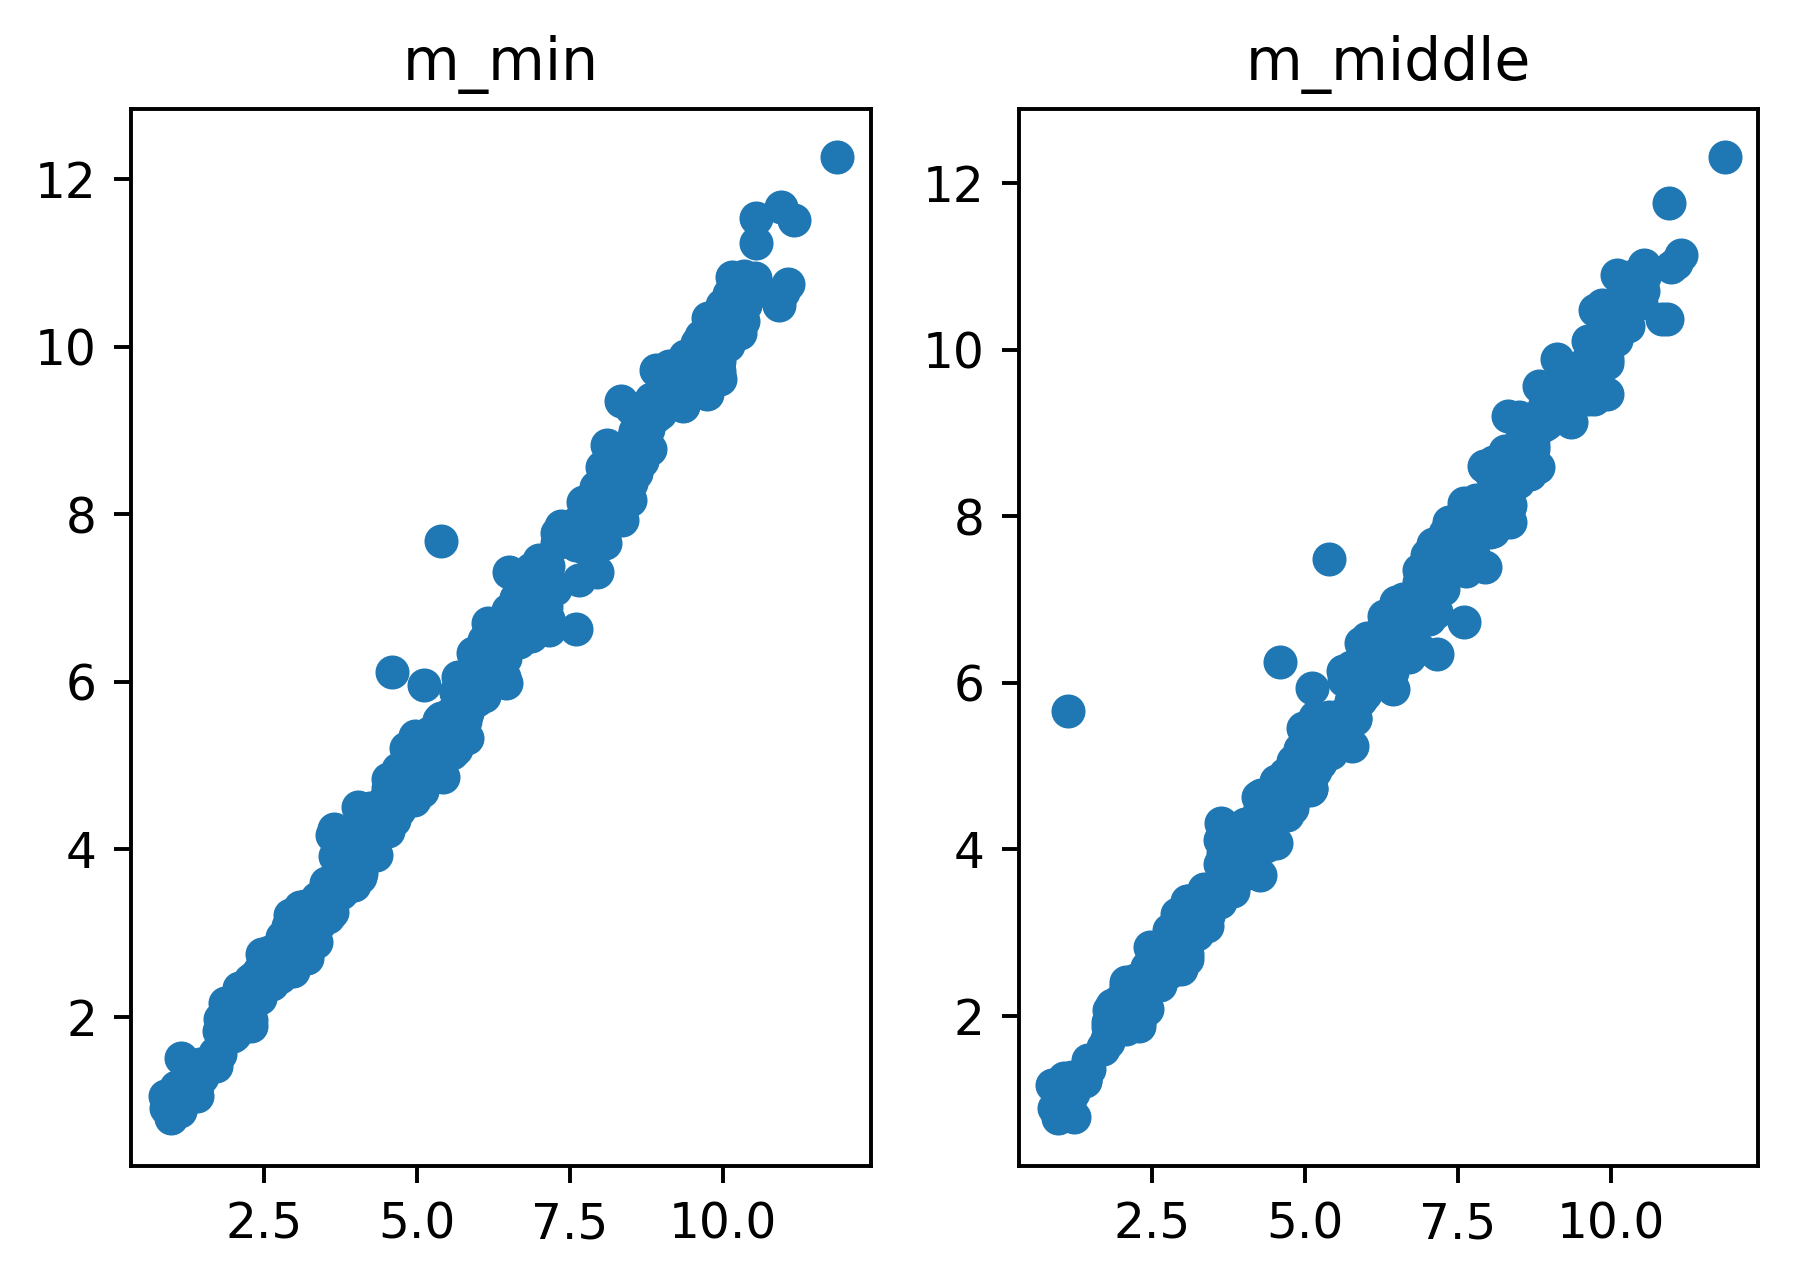

In [33]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(m_middle, m_max)
axs[1].set_title('m_max')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, m_all)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_middle, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_middle, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

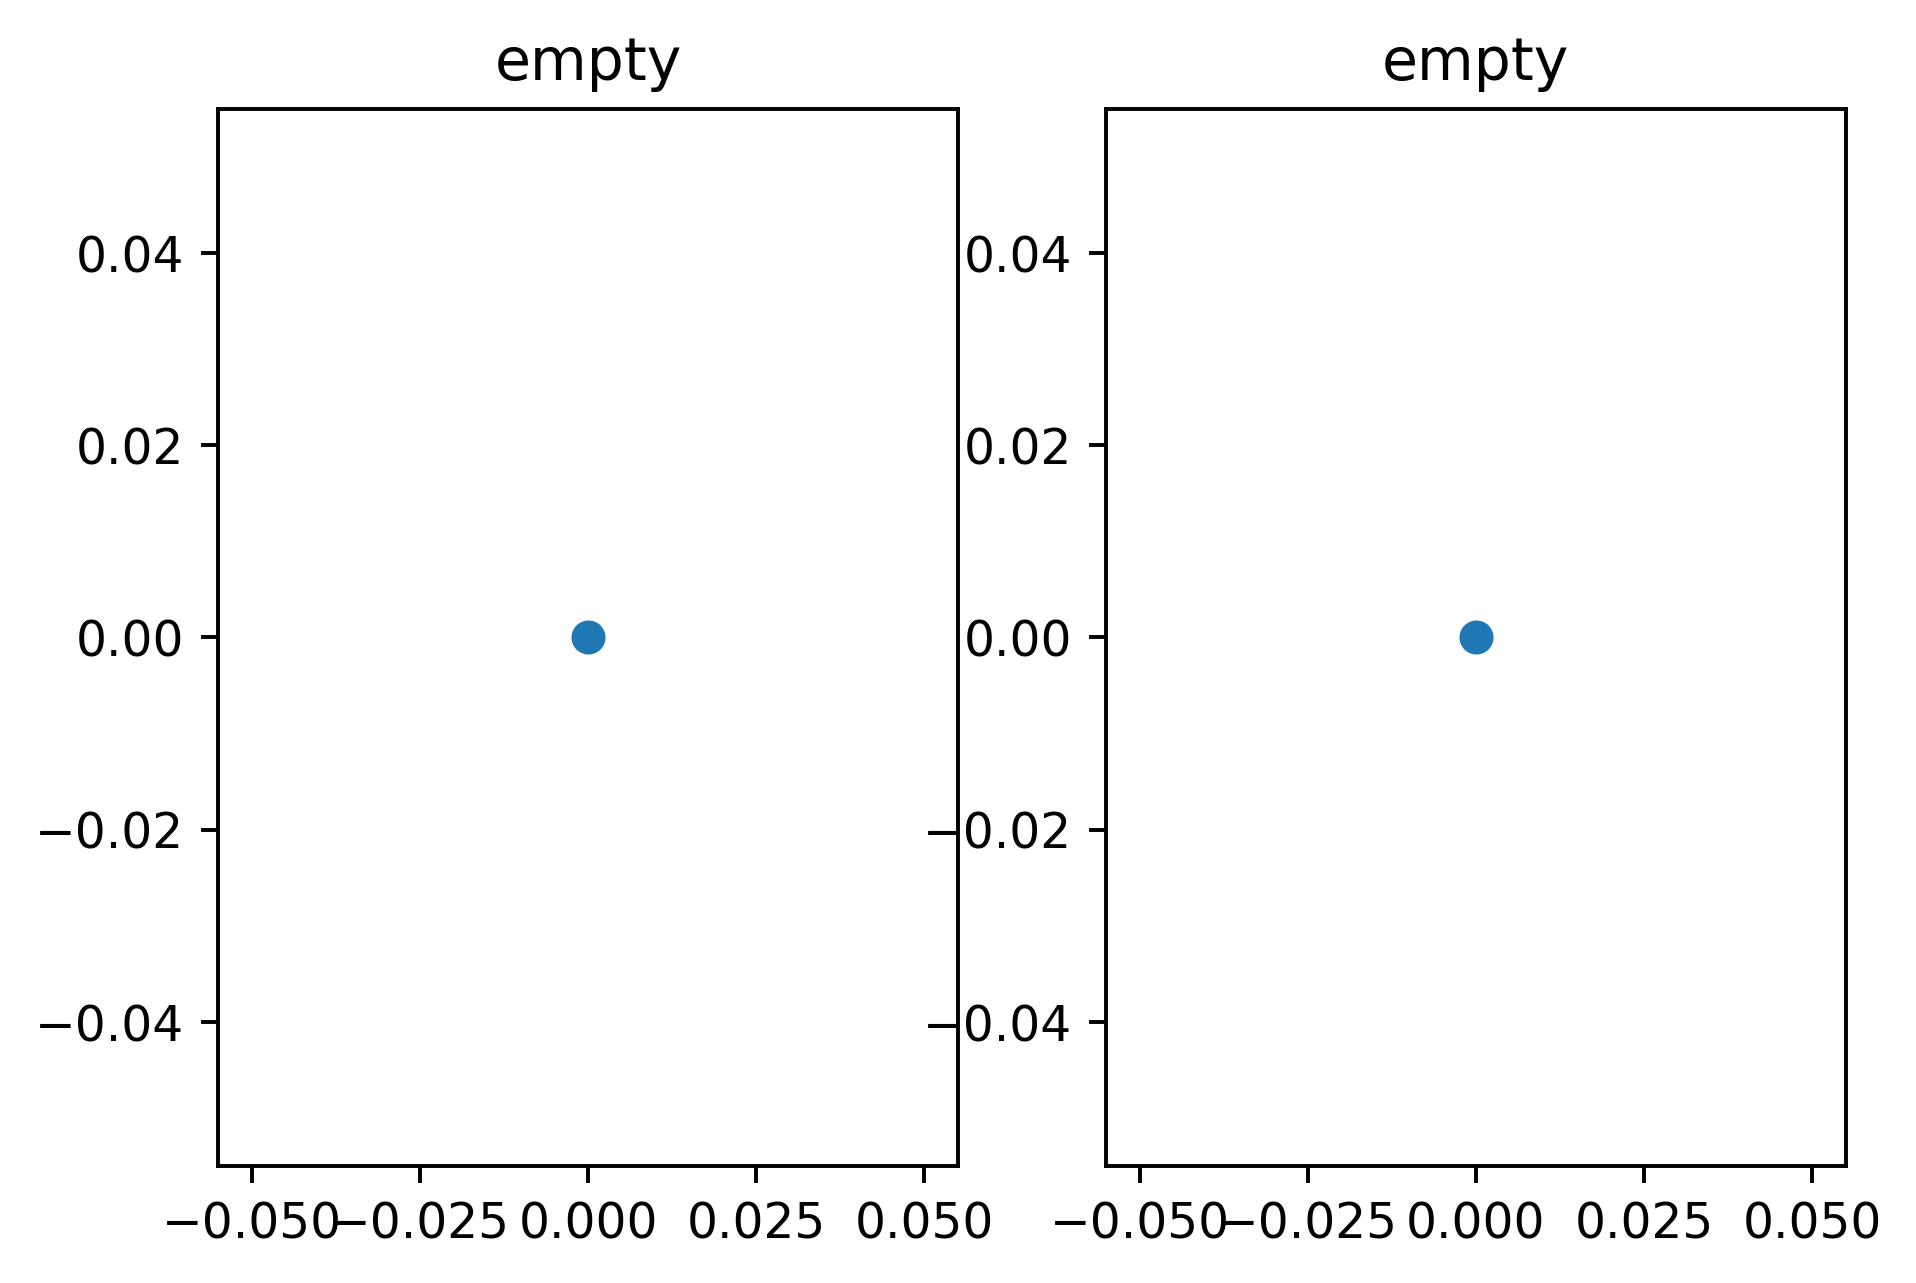

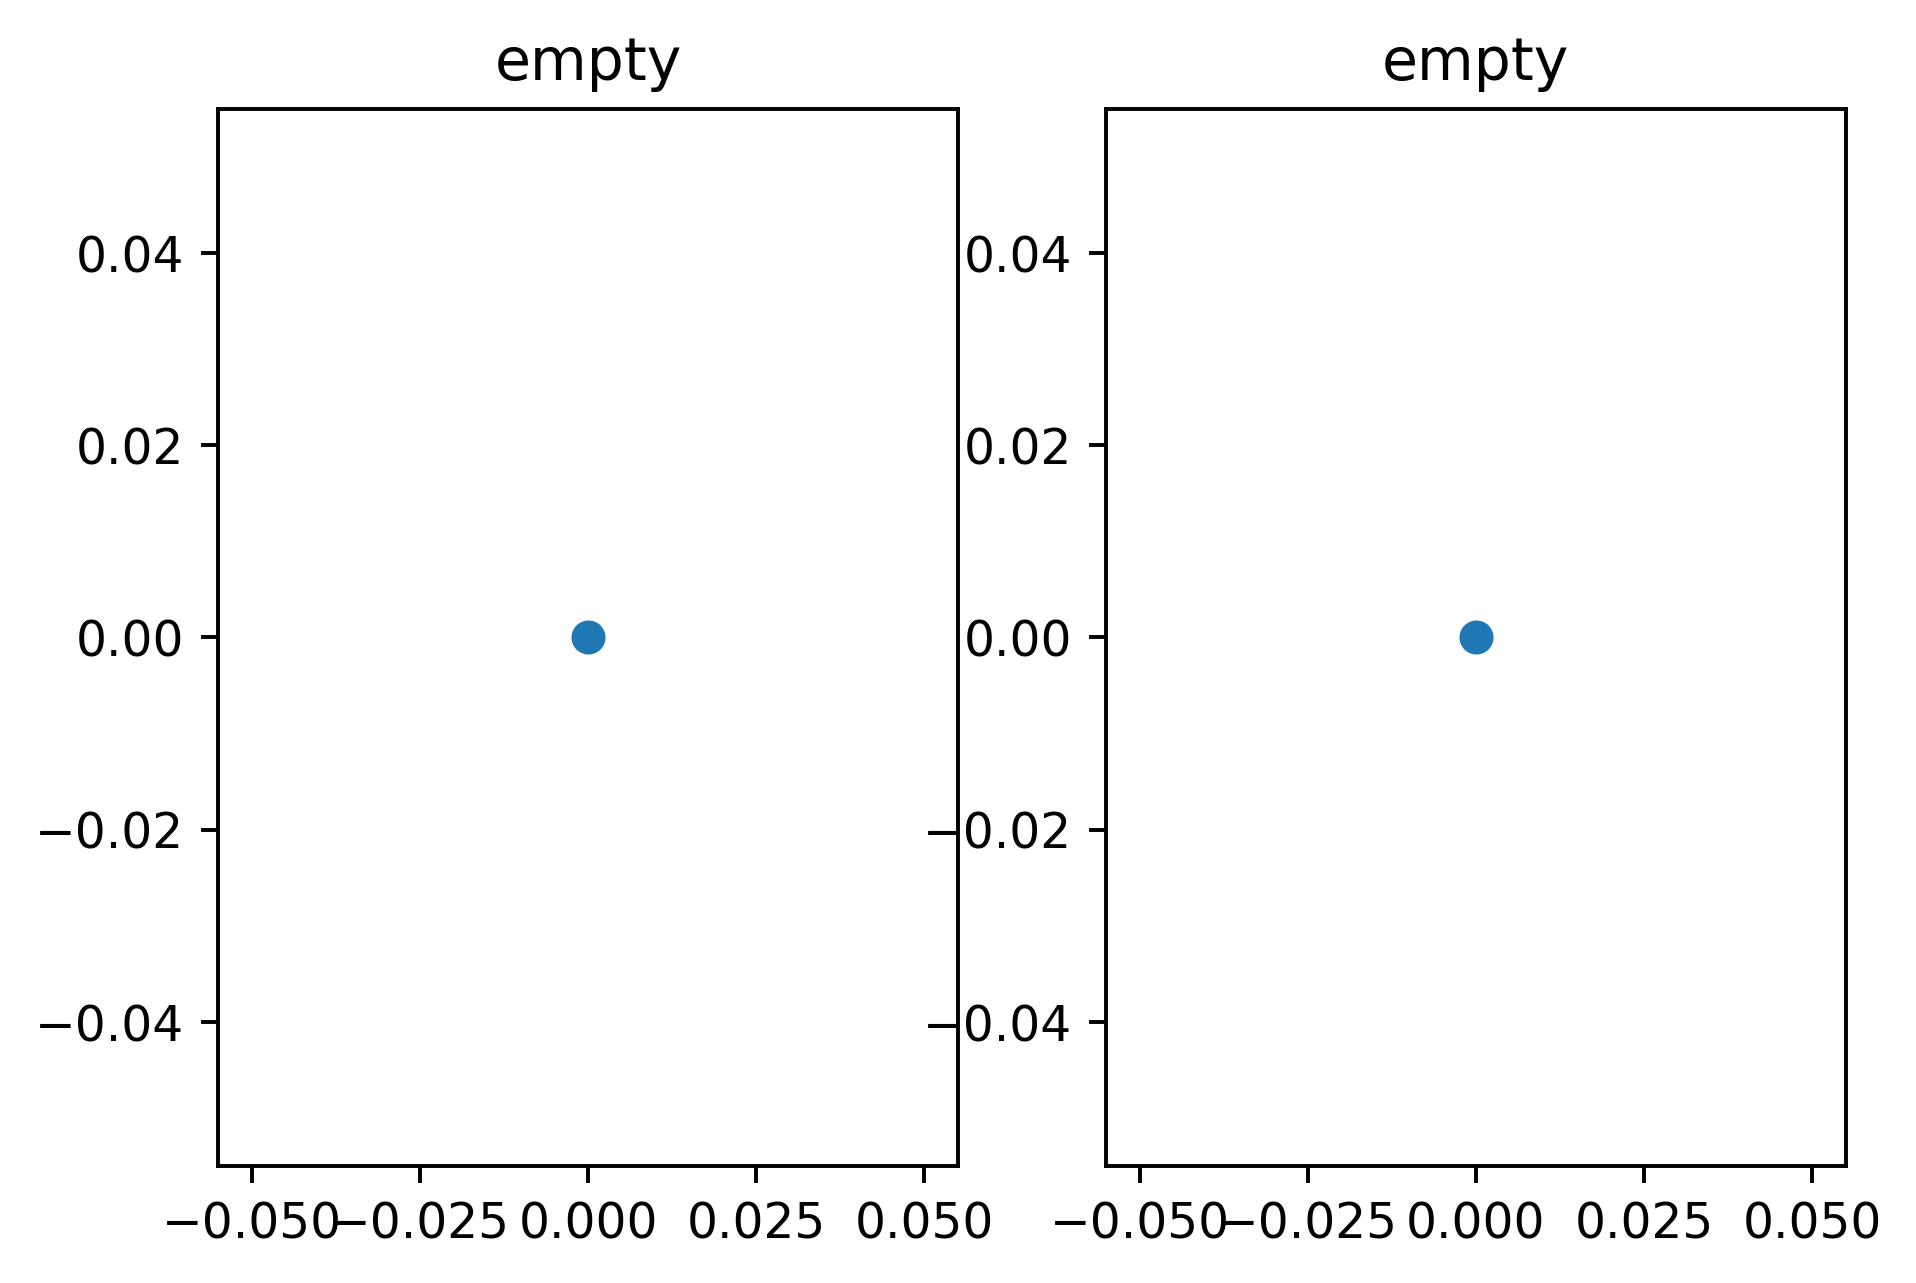

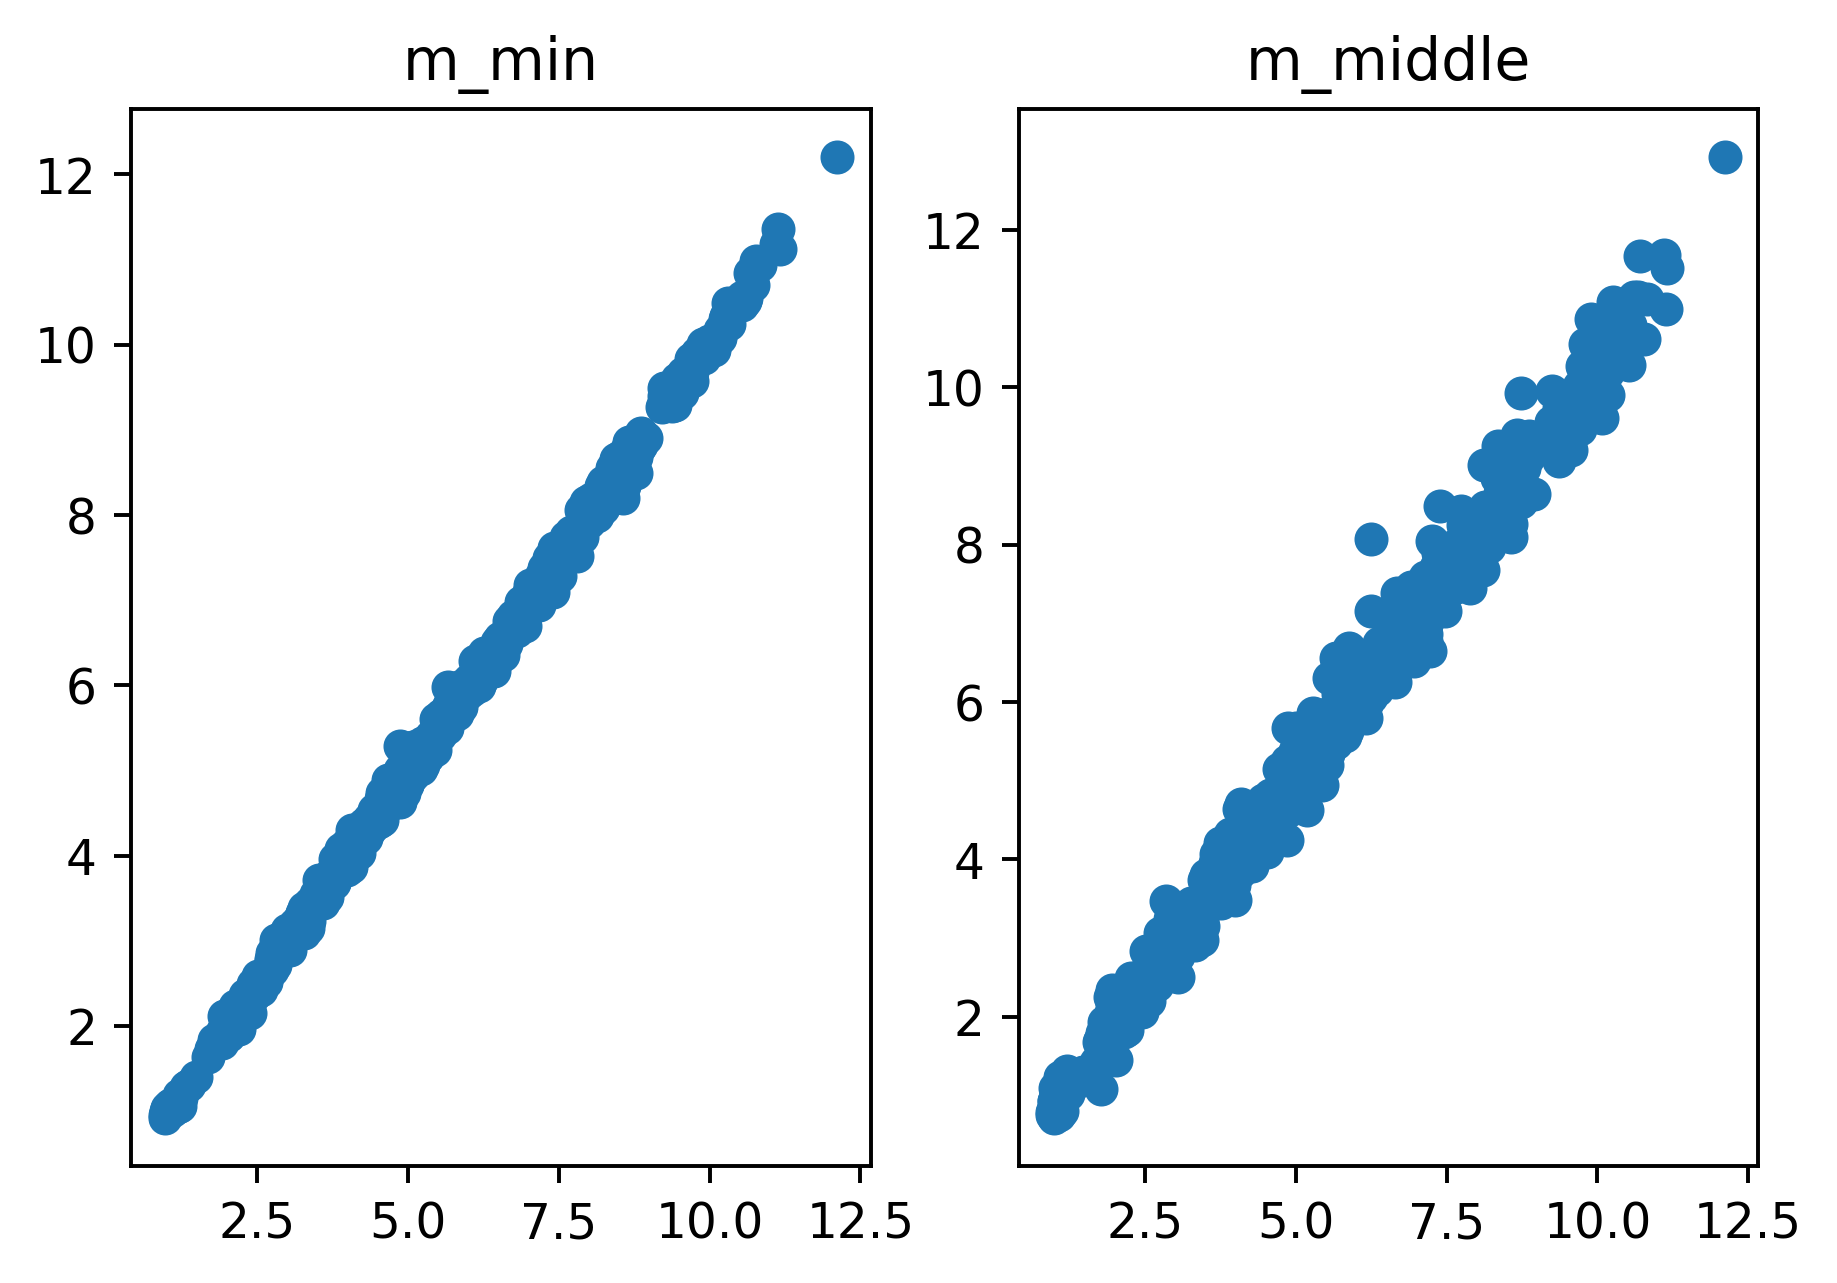

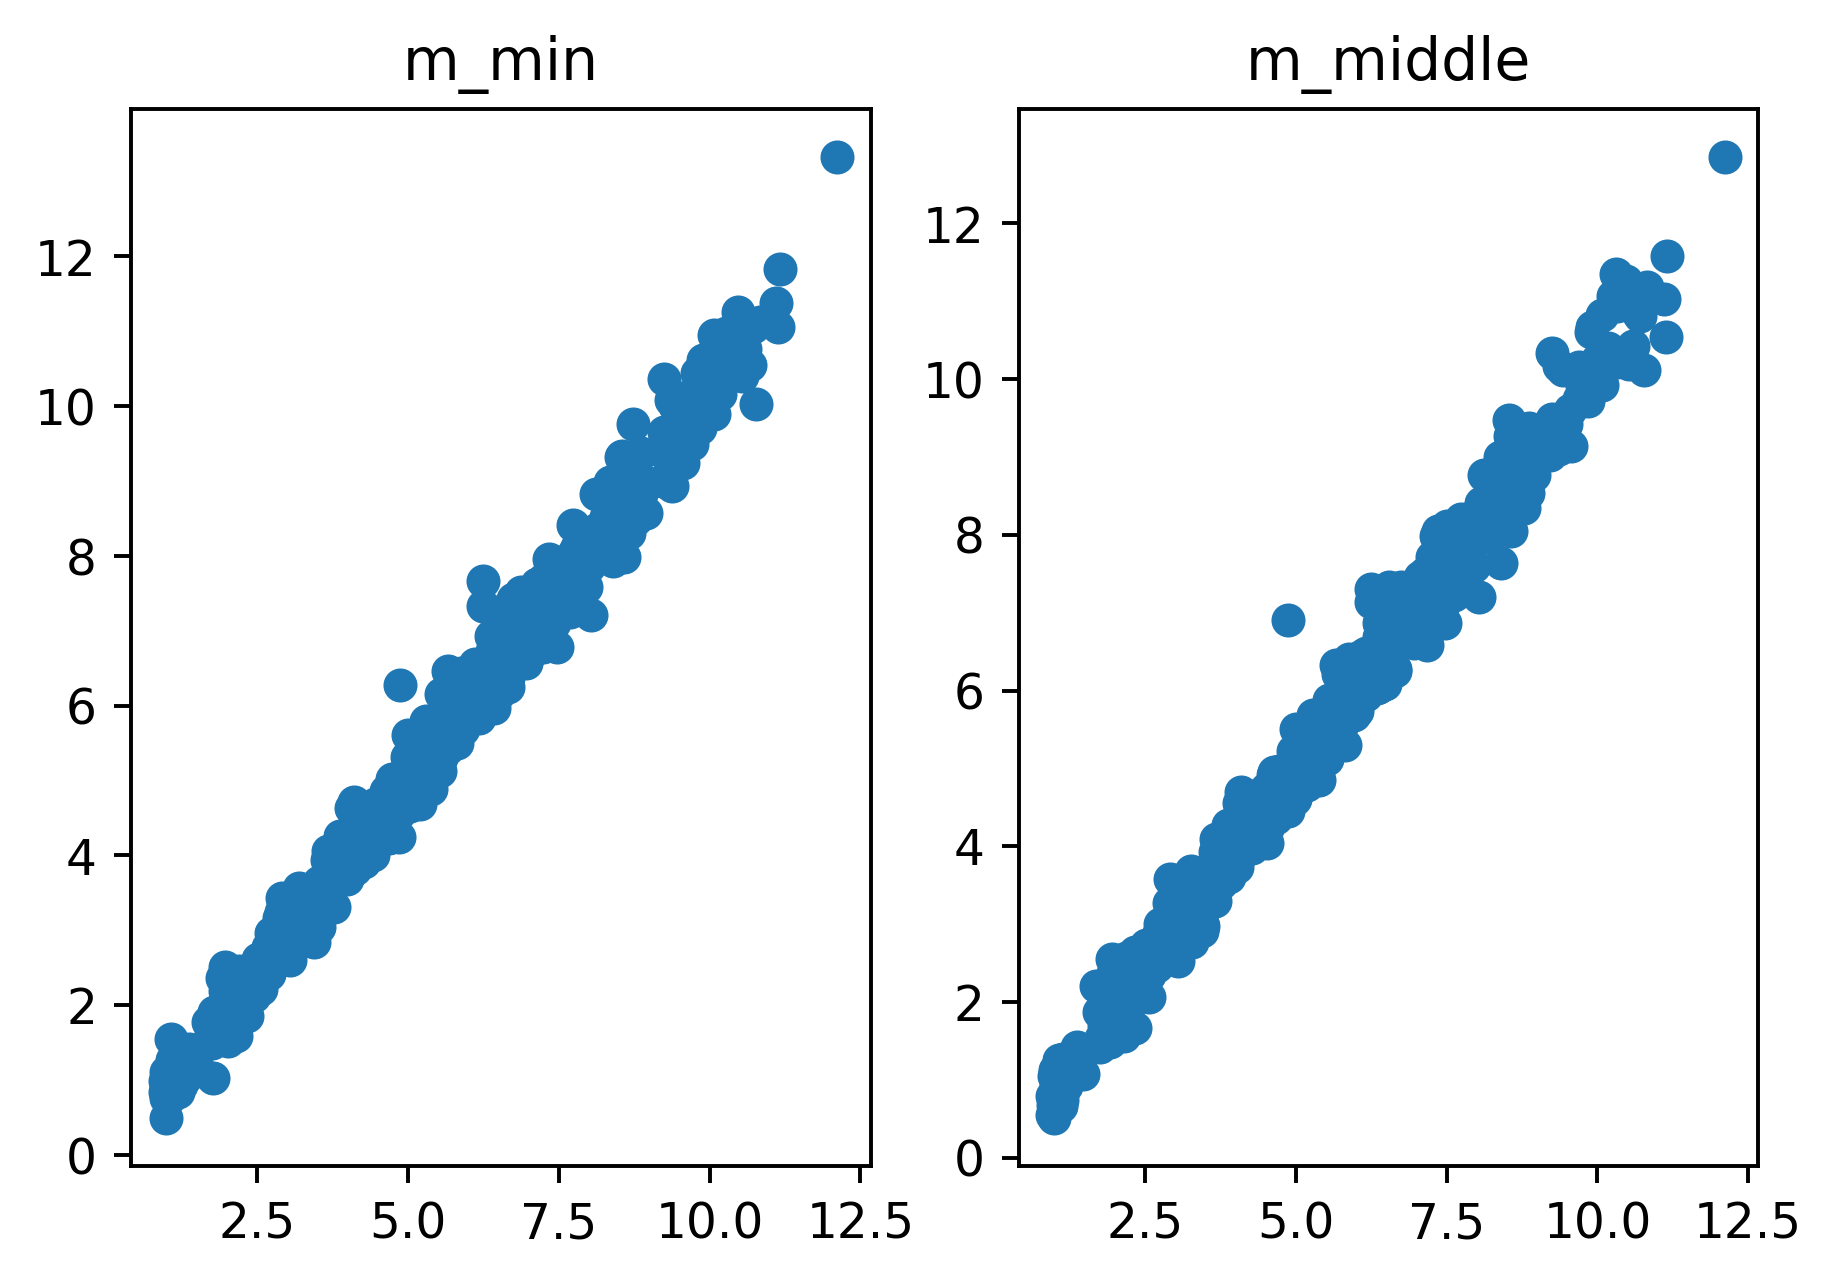

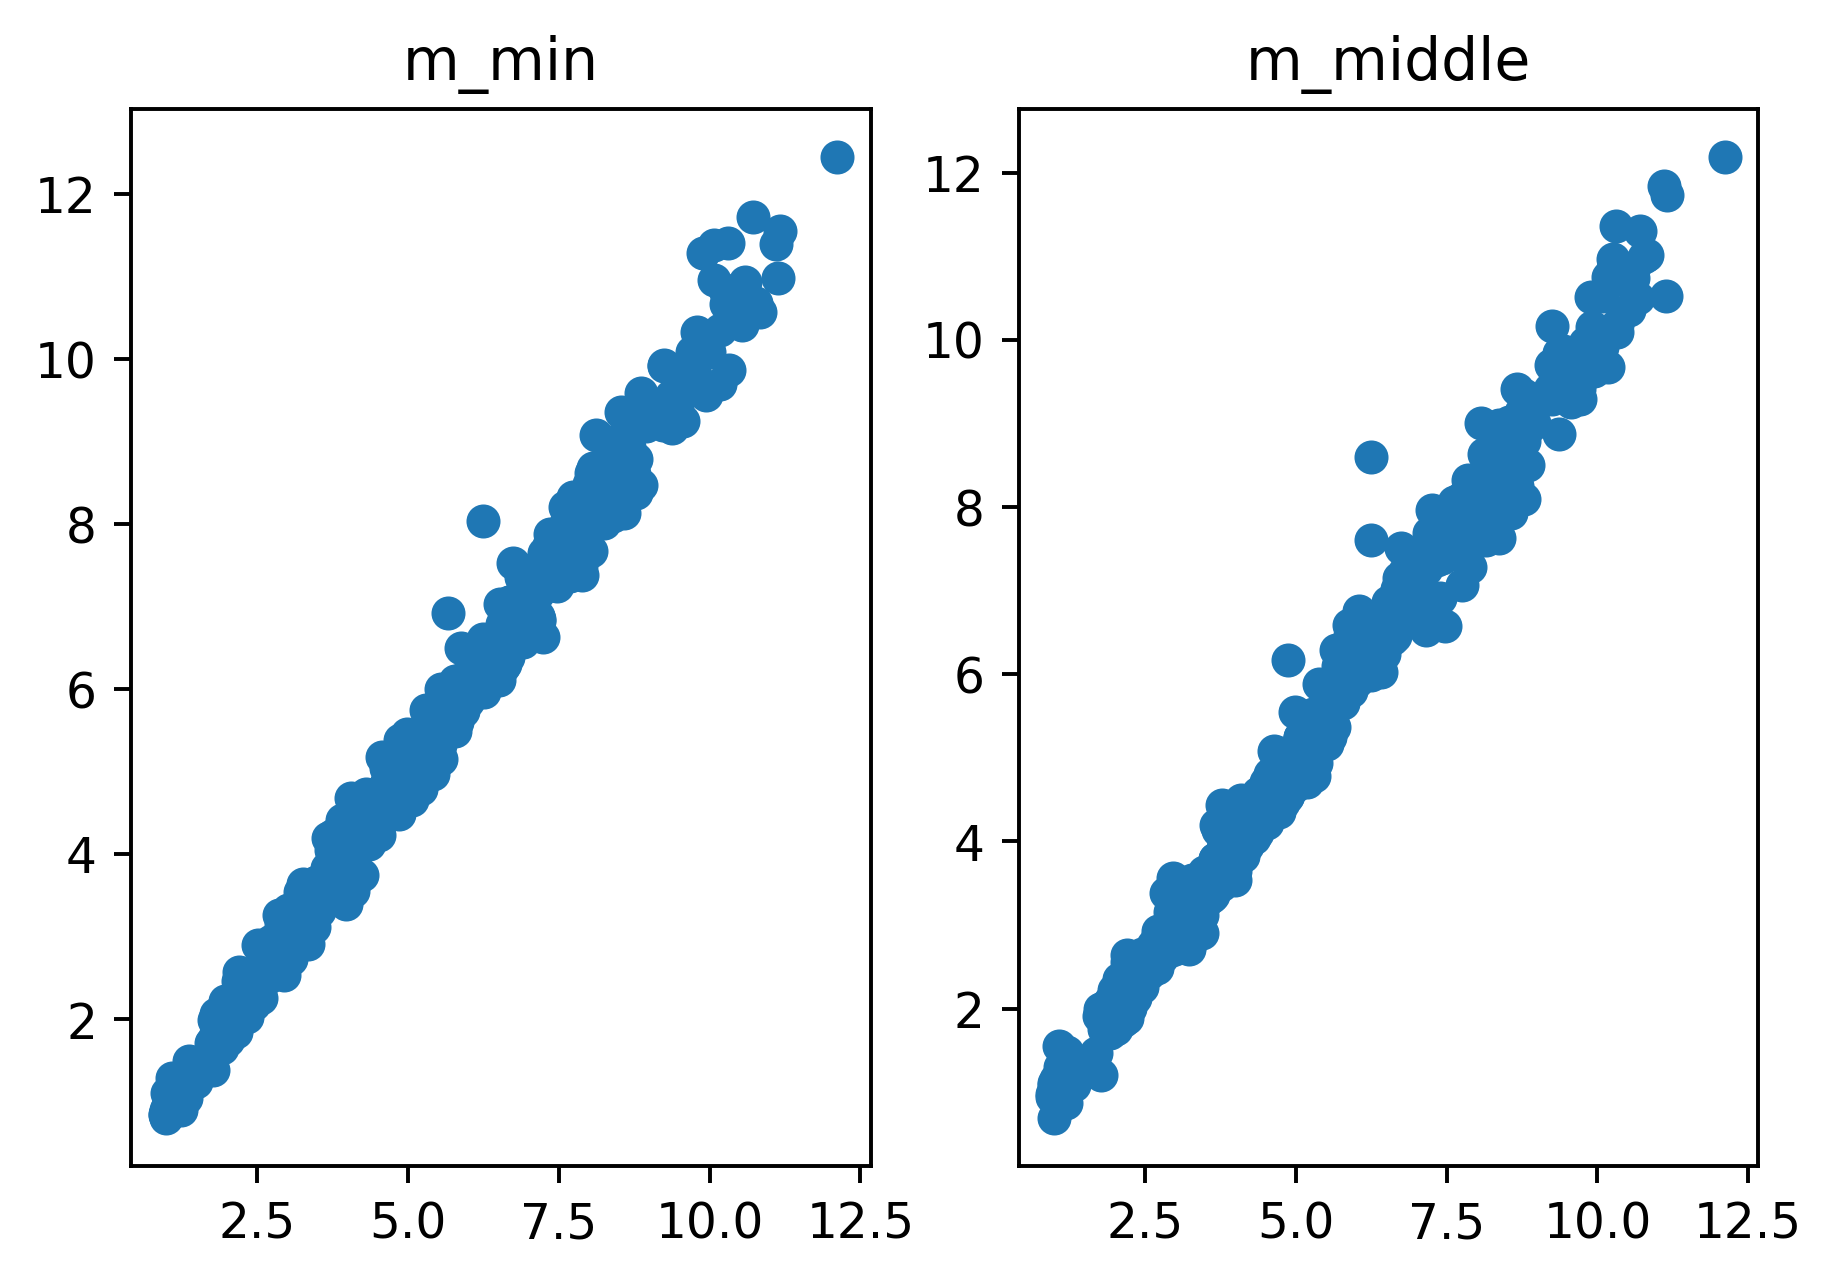

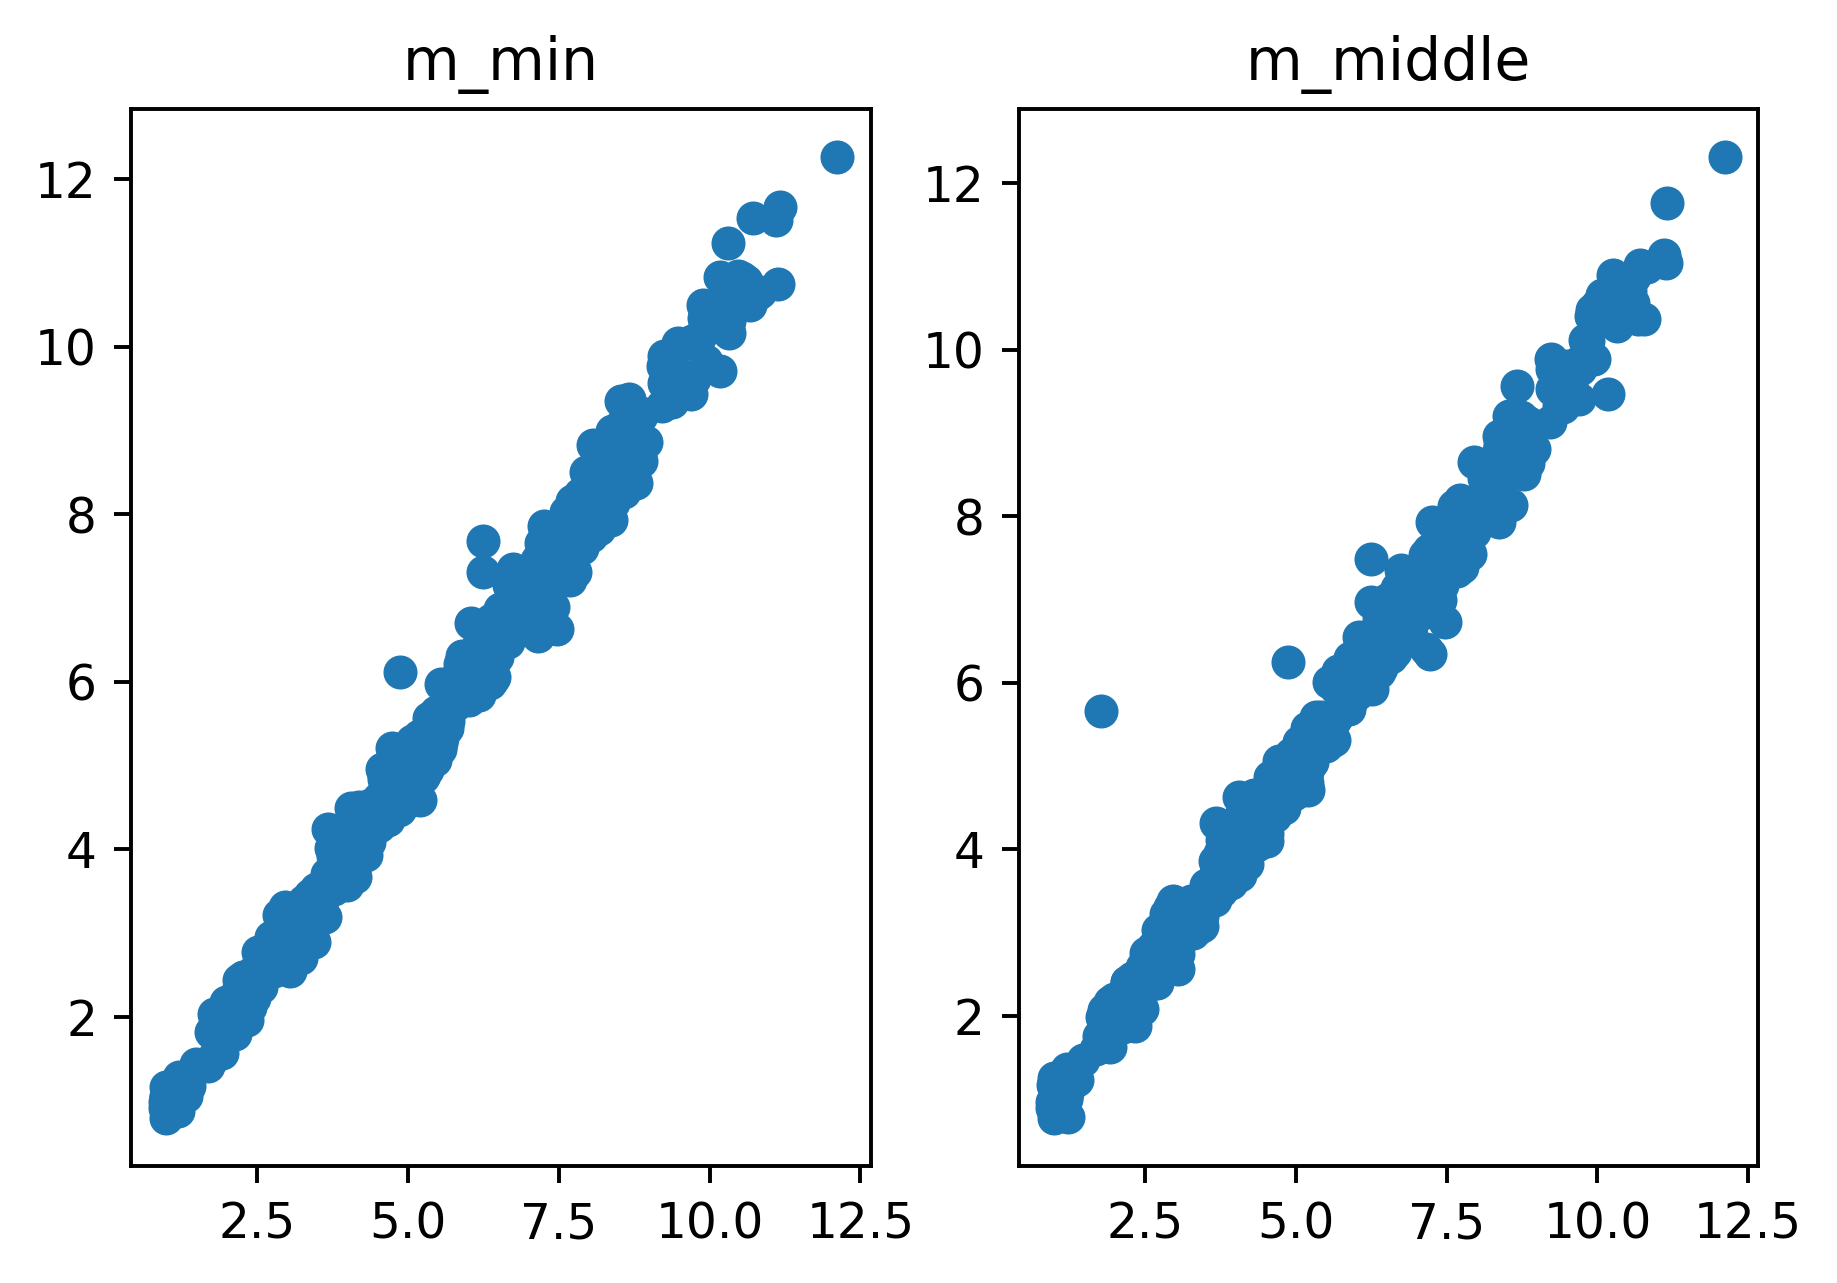

In [45]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, m_all)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_max, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_max, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

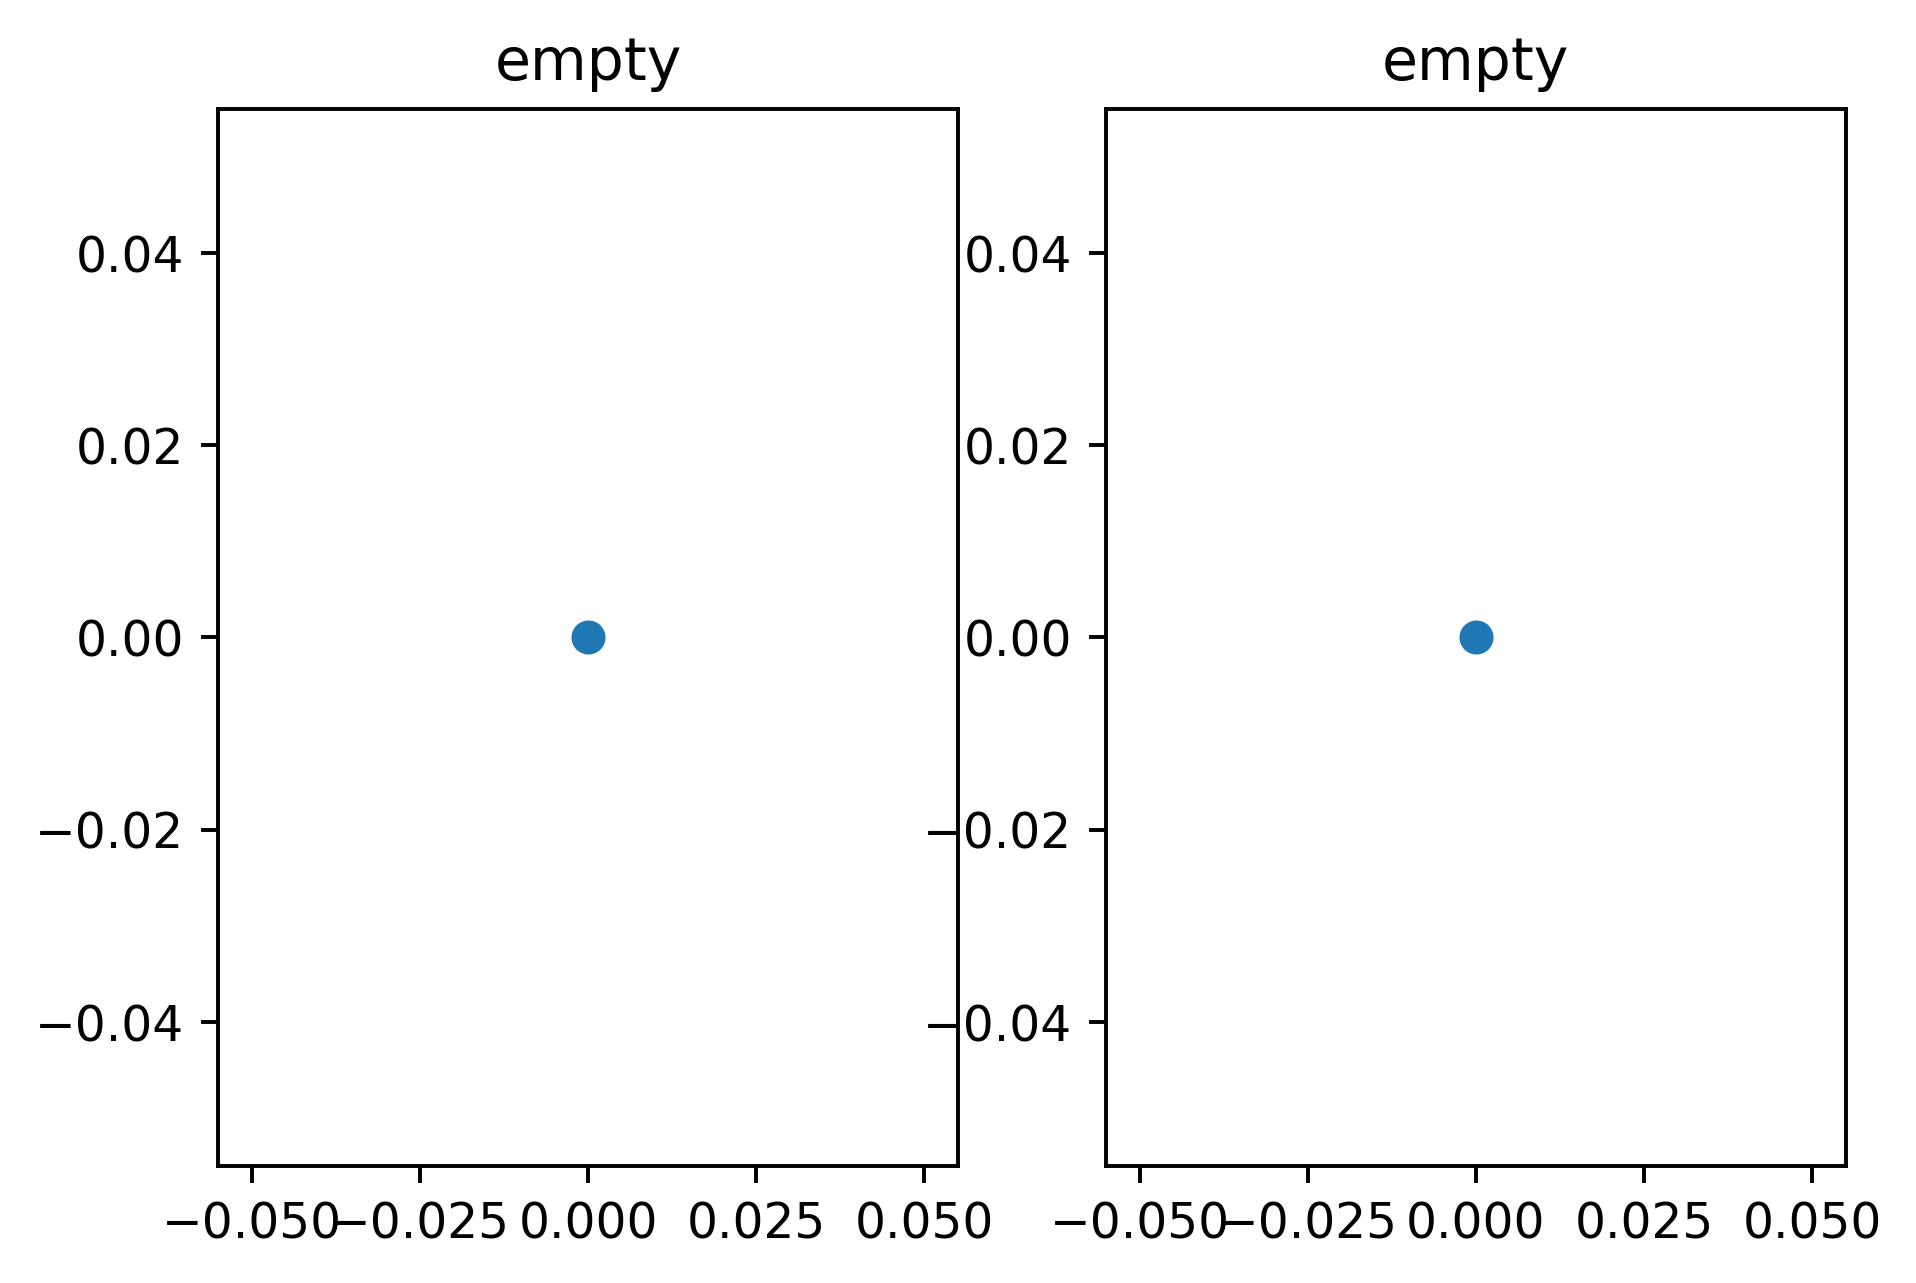

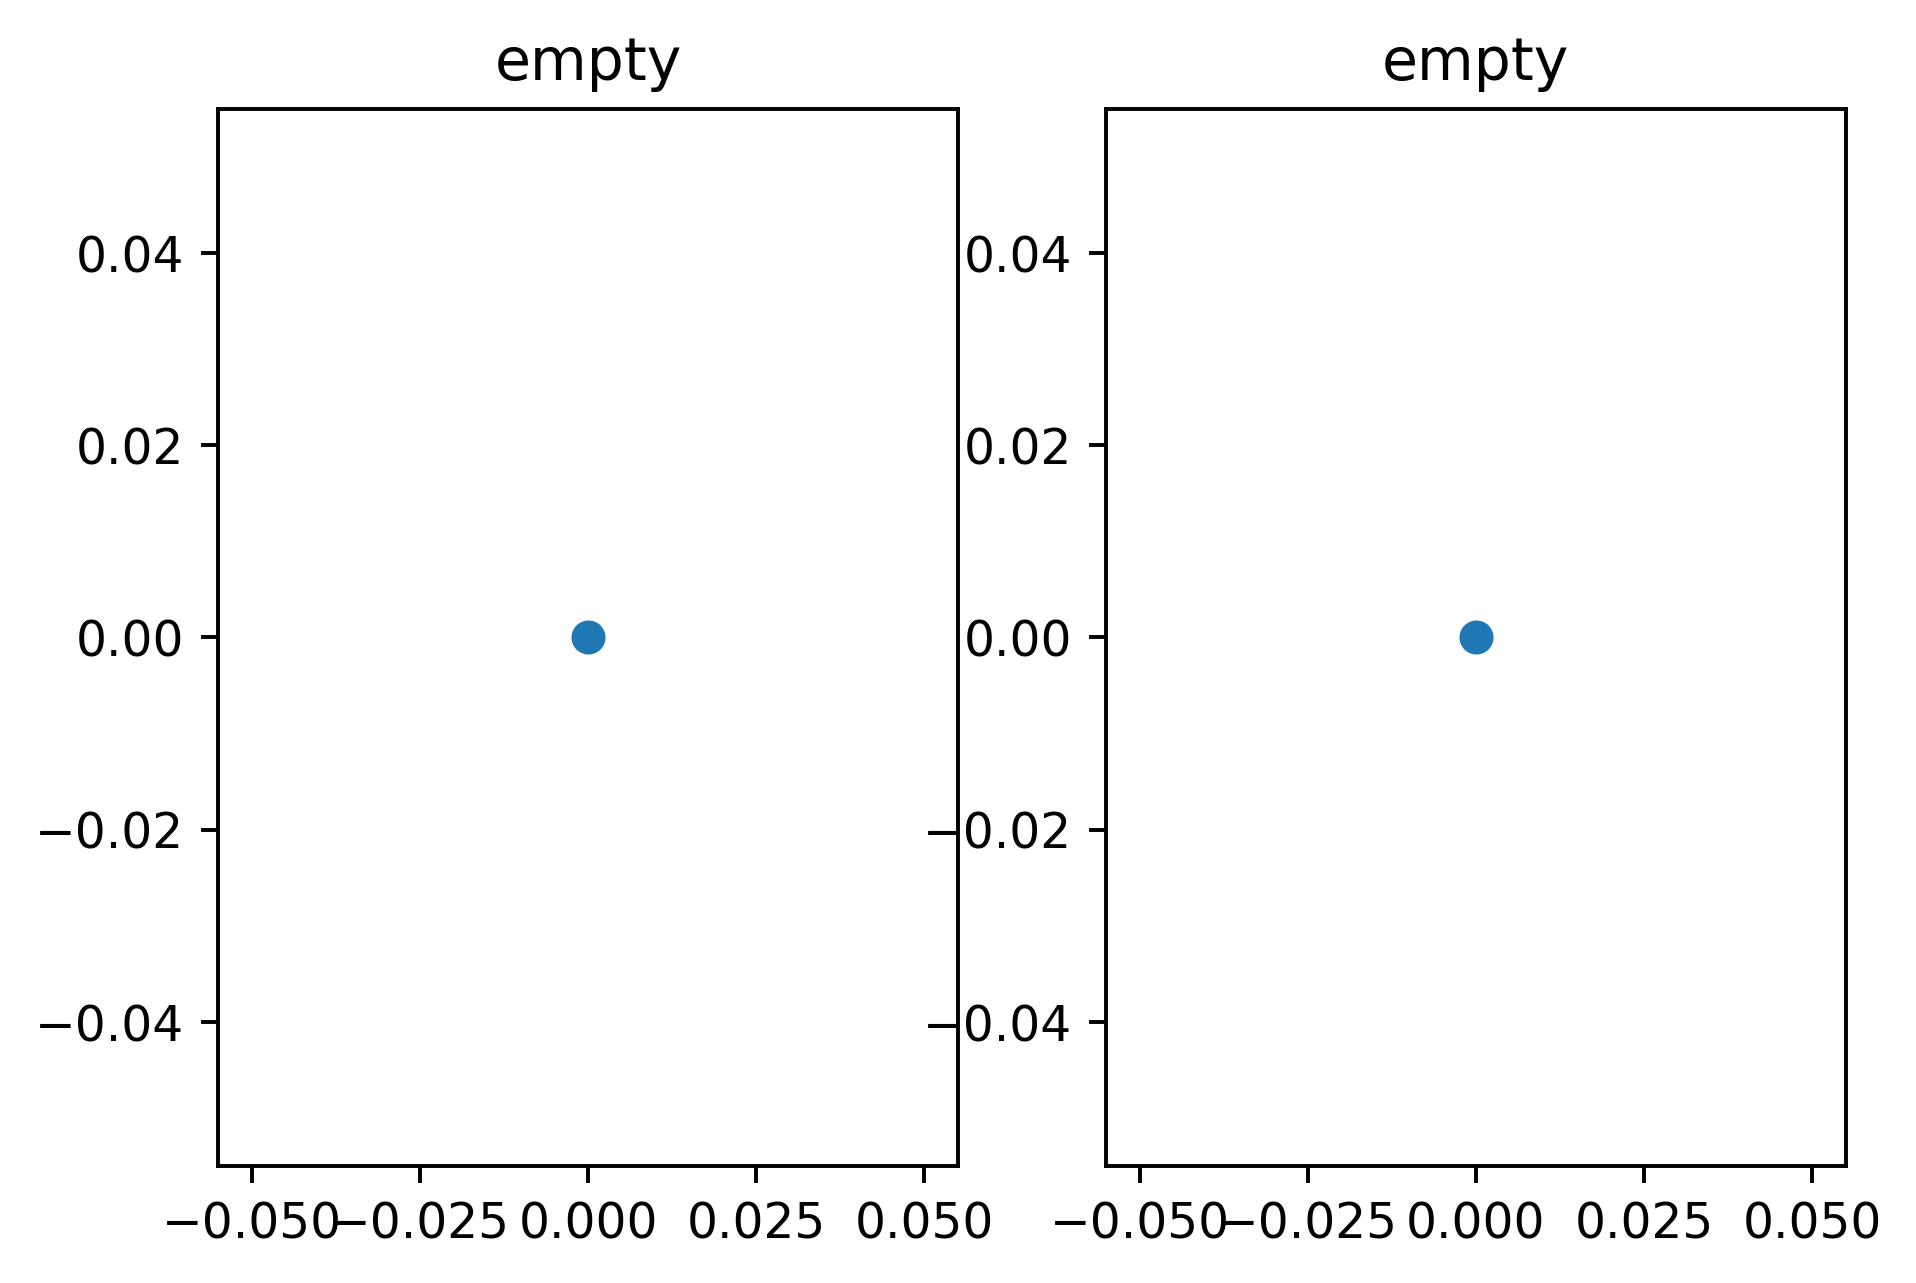

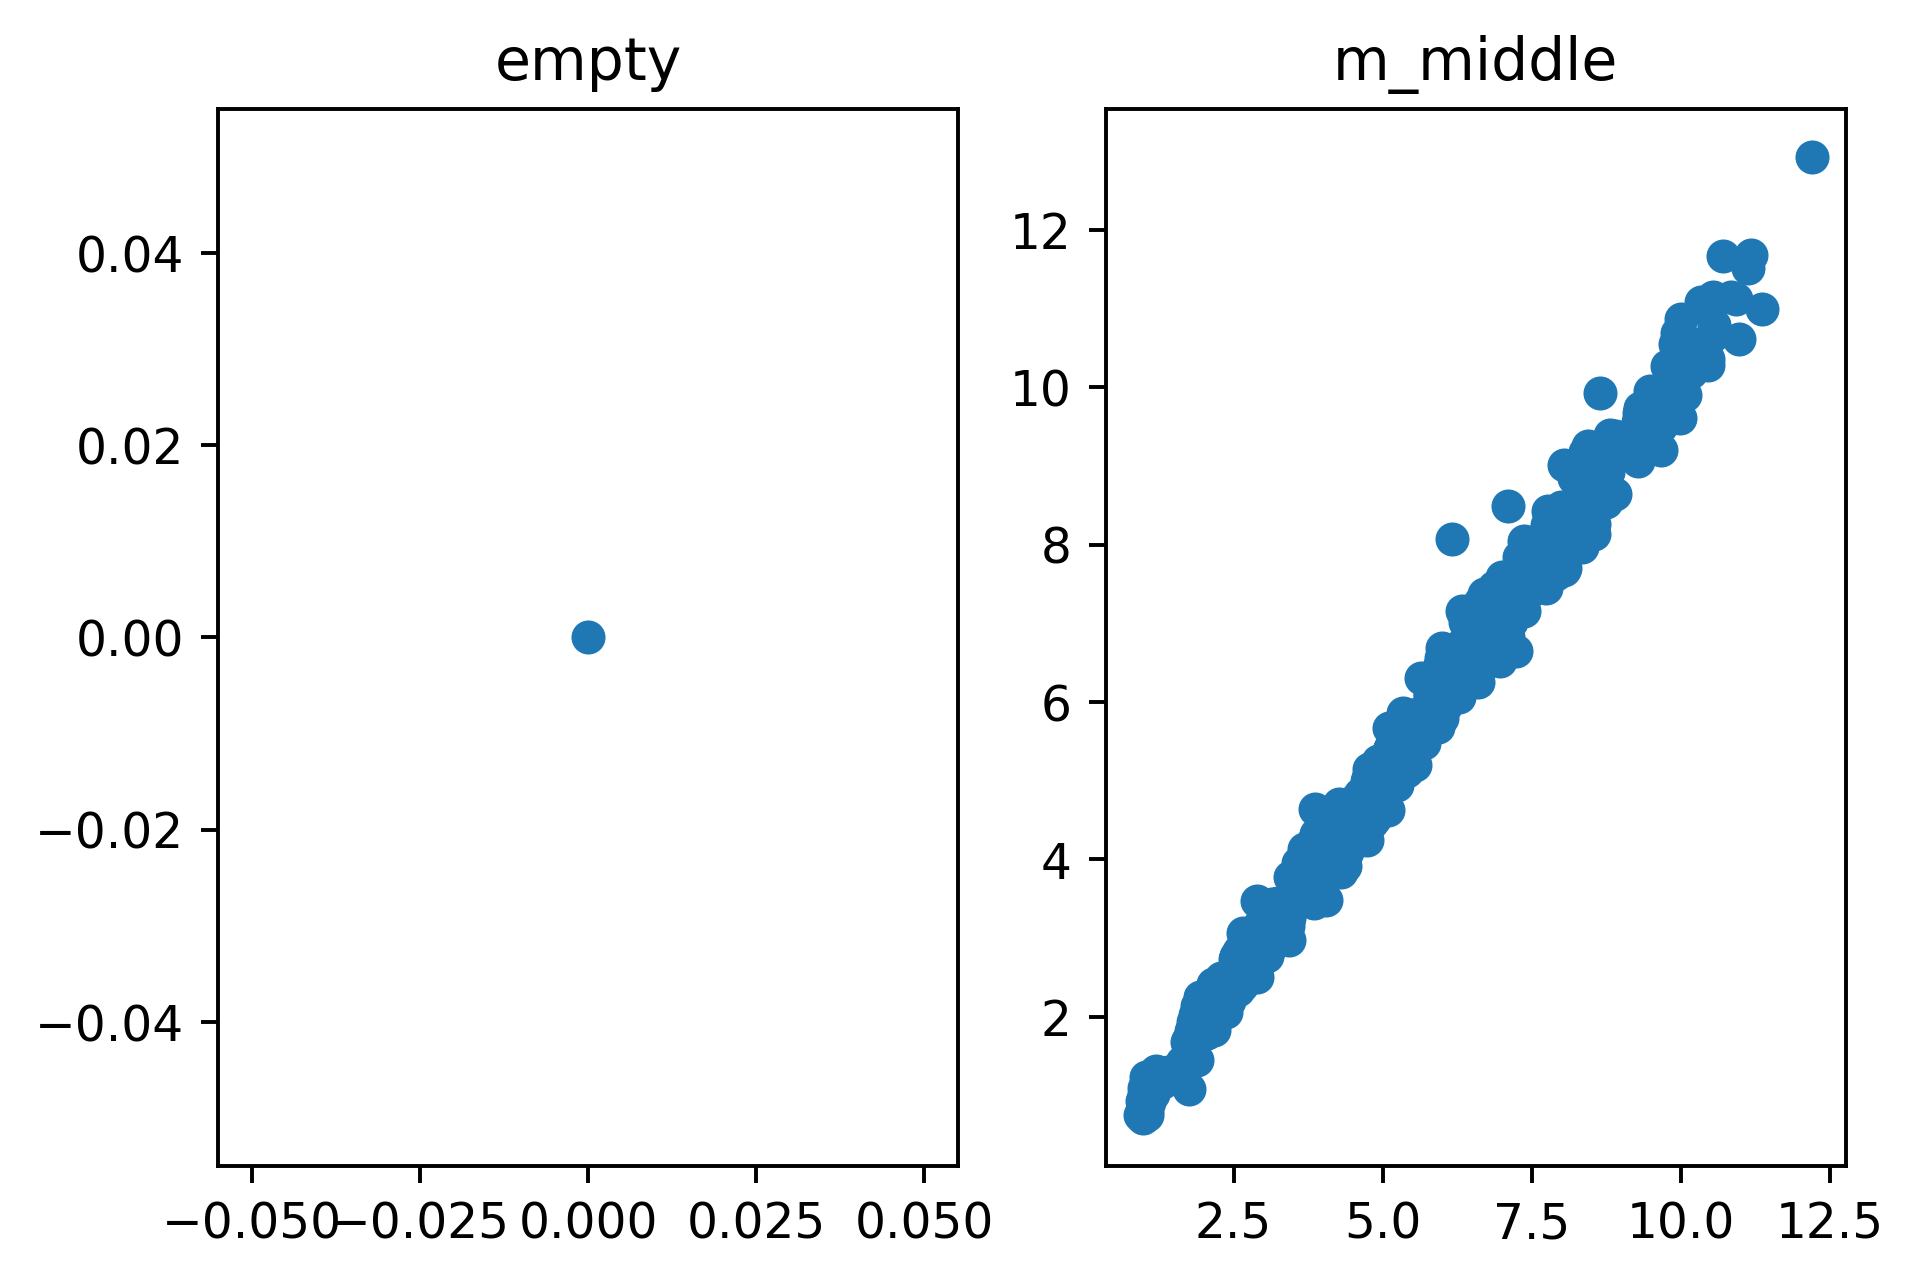

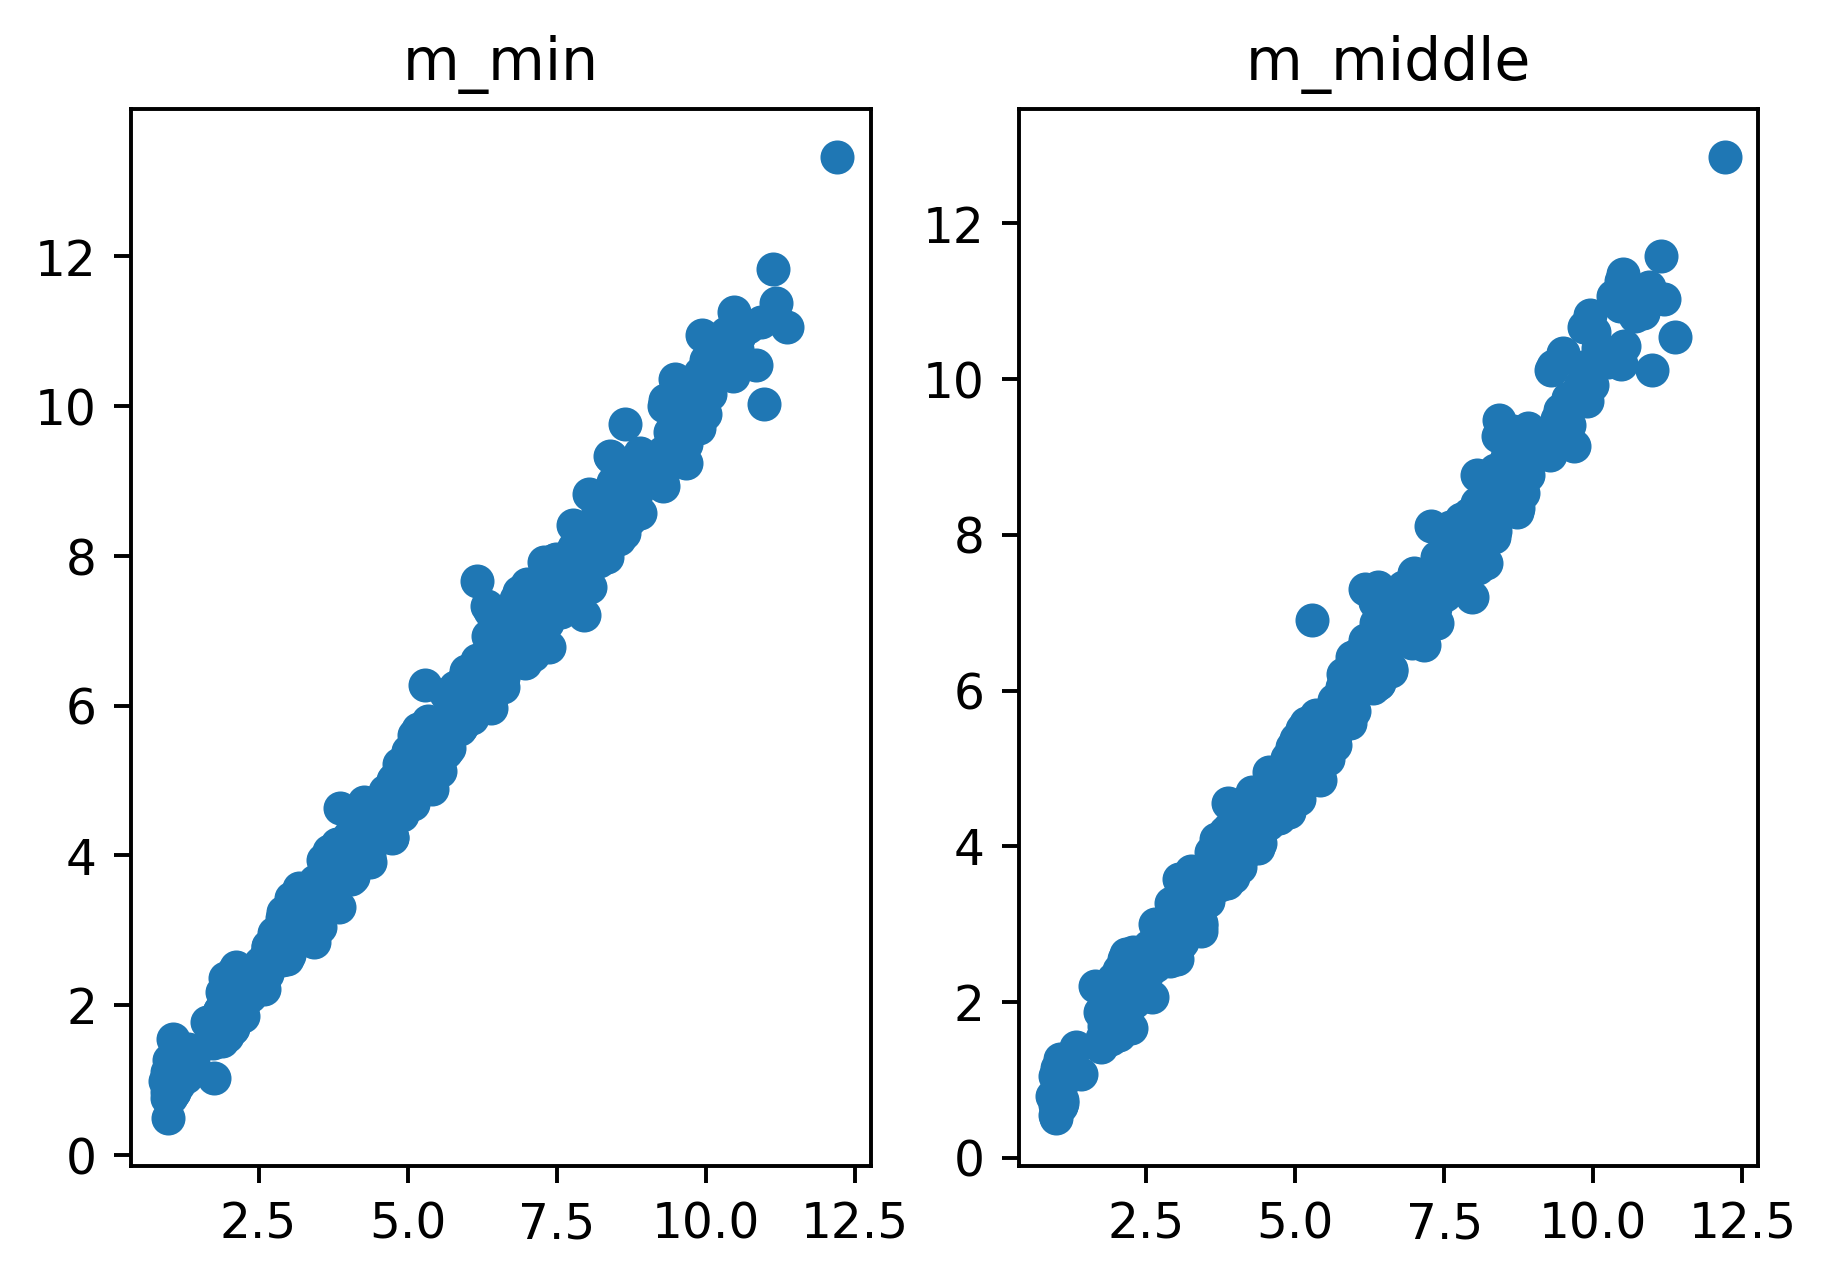

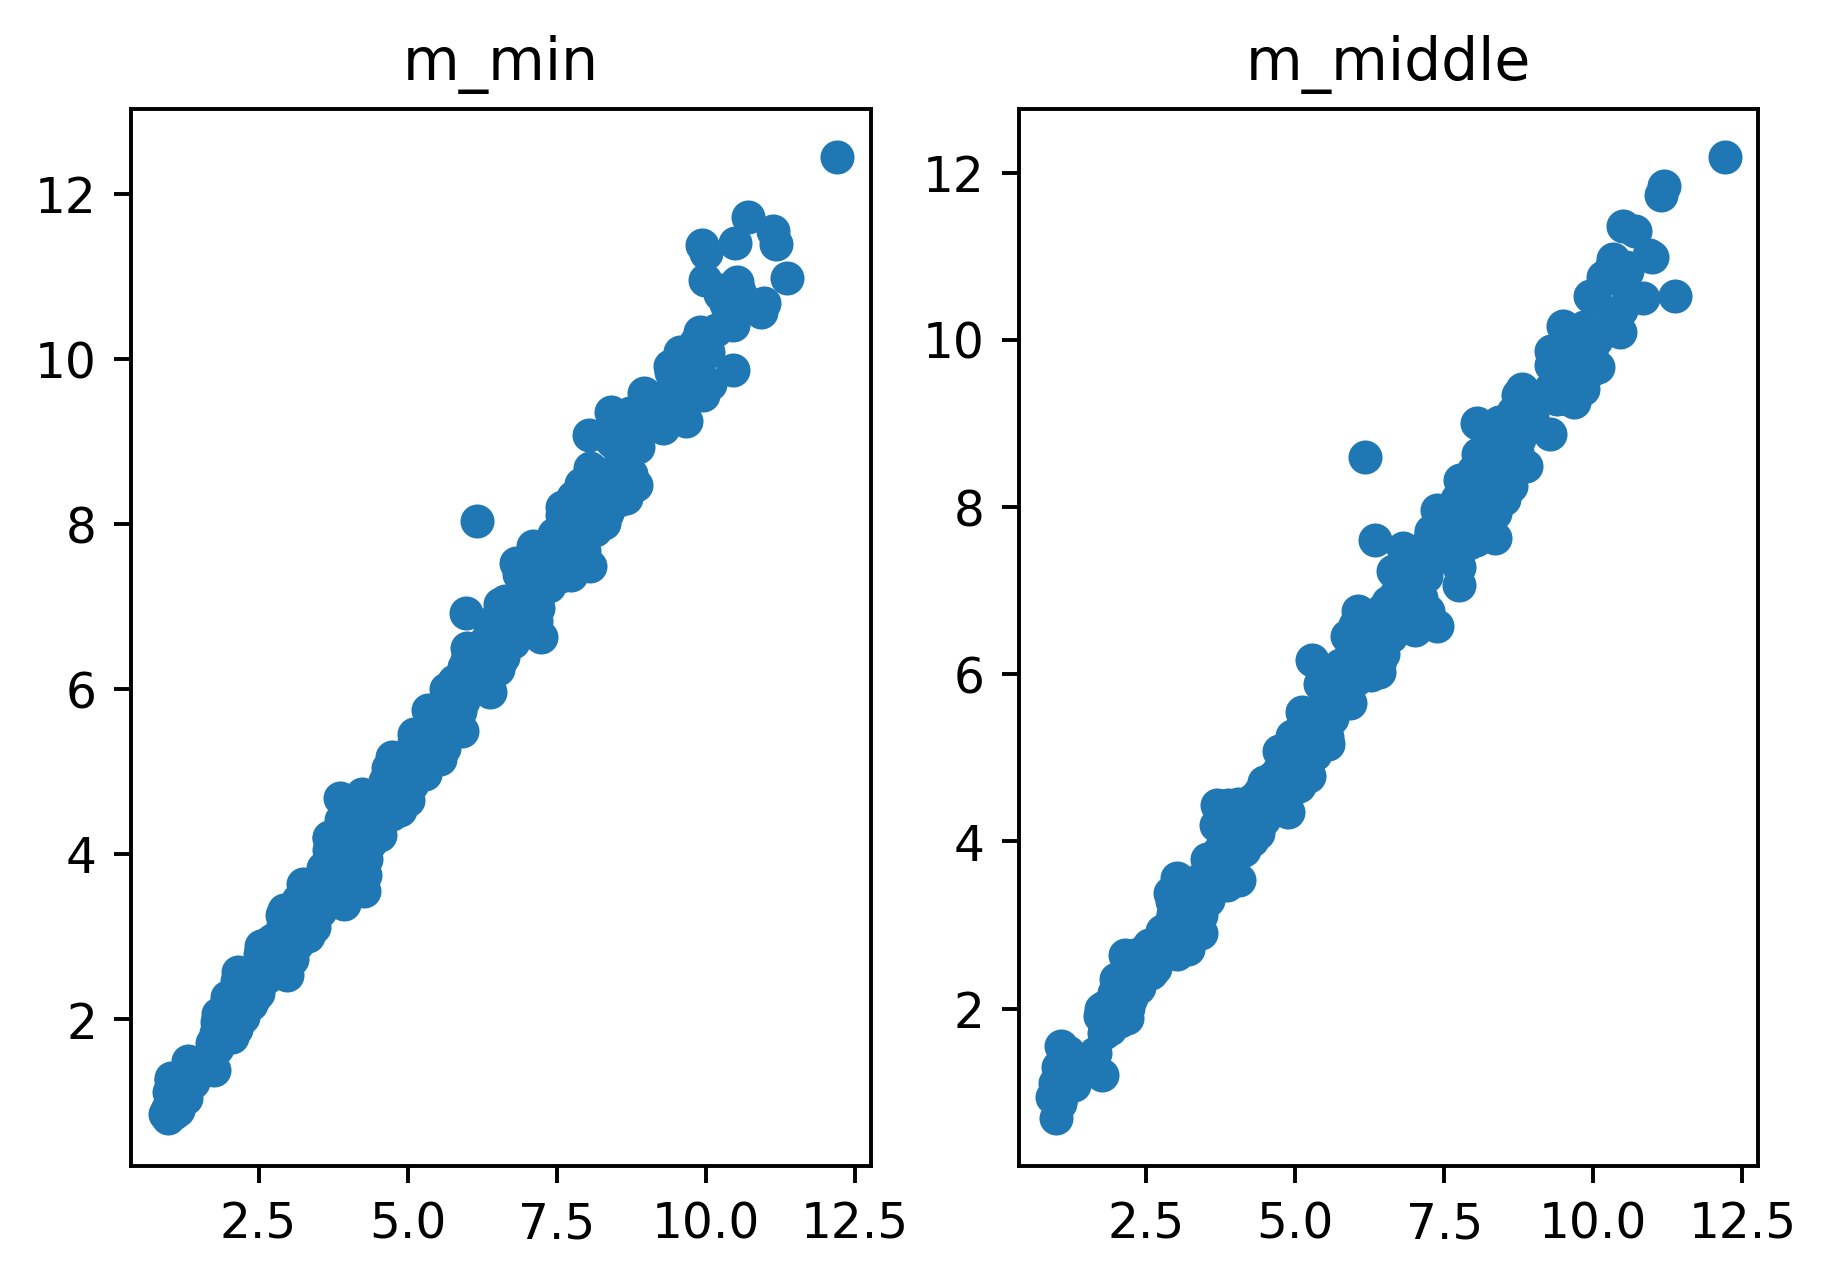

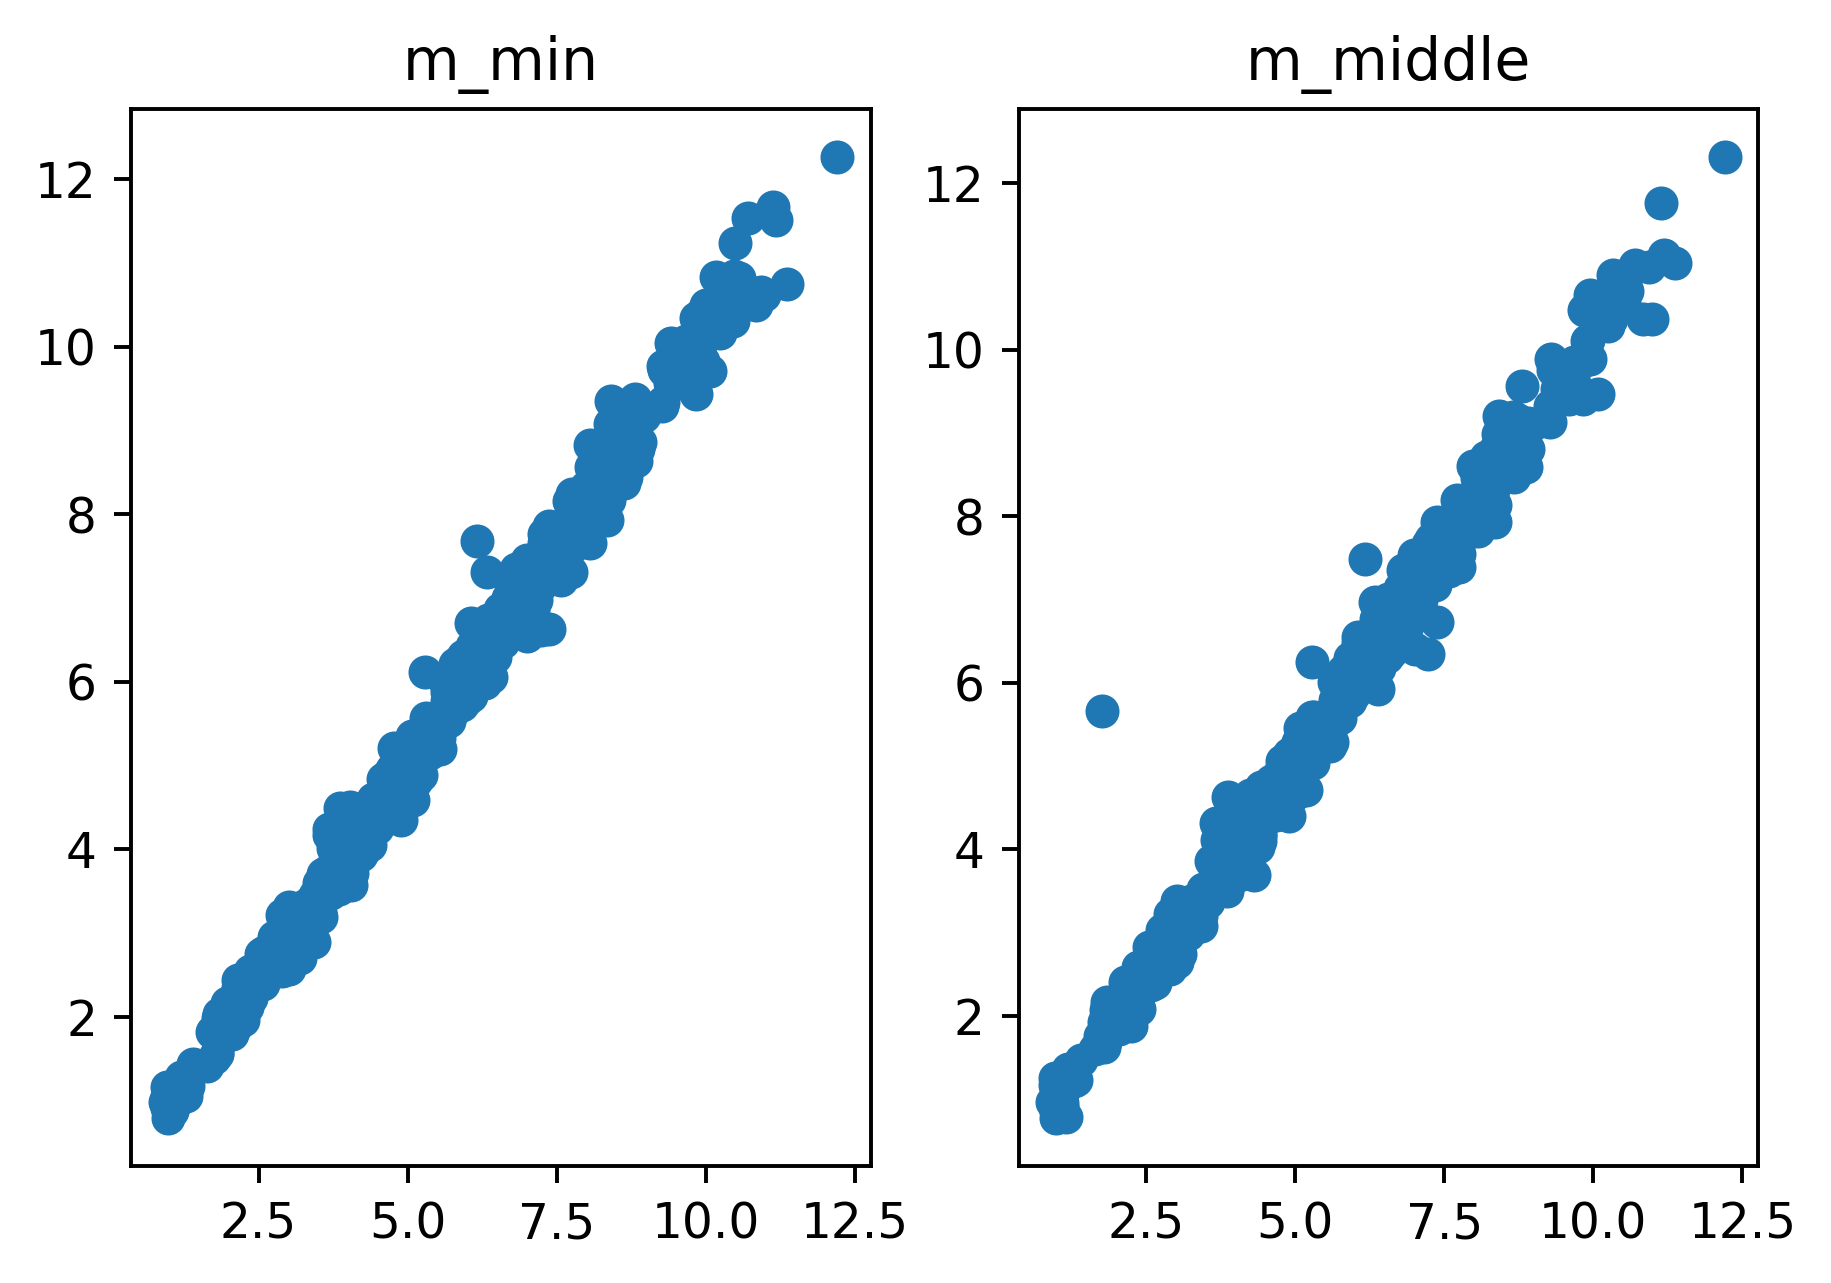

In [44]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(m_all, b4_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_all, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_all, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_all, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(m_all, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(m_all, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(m_all, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

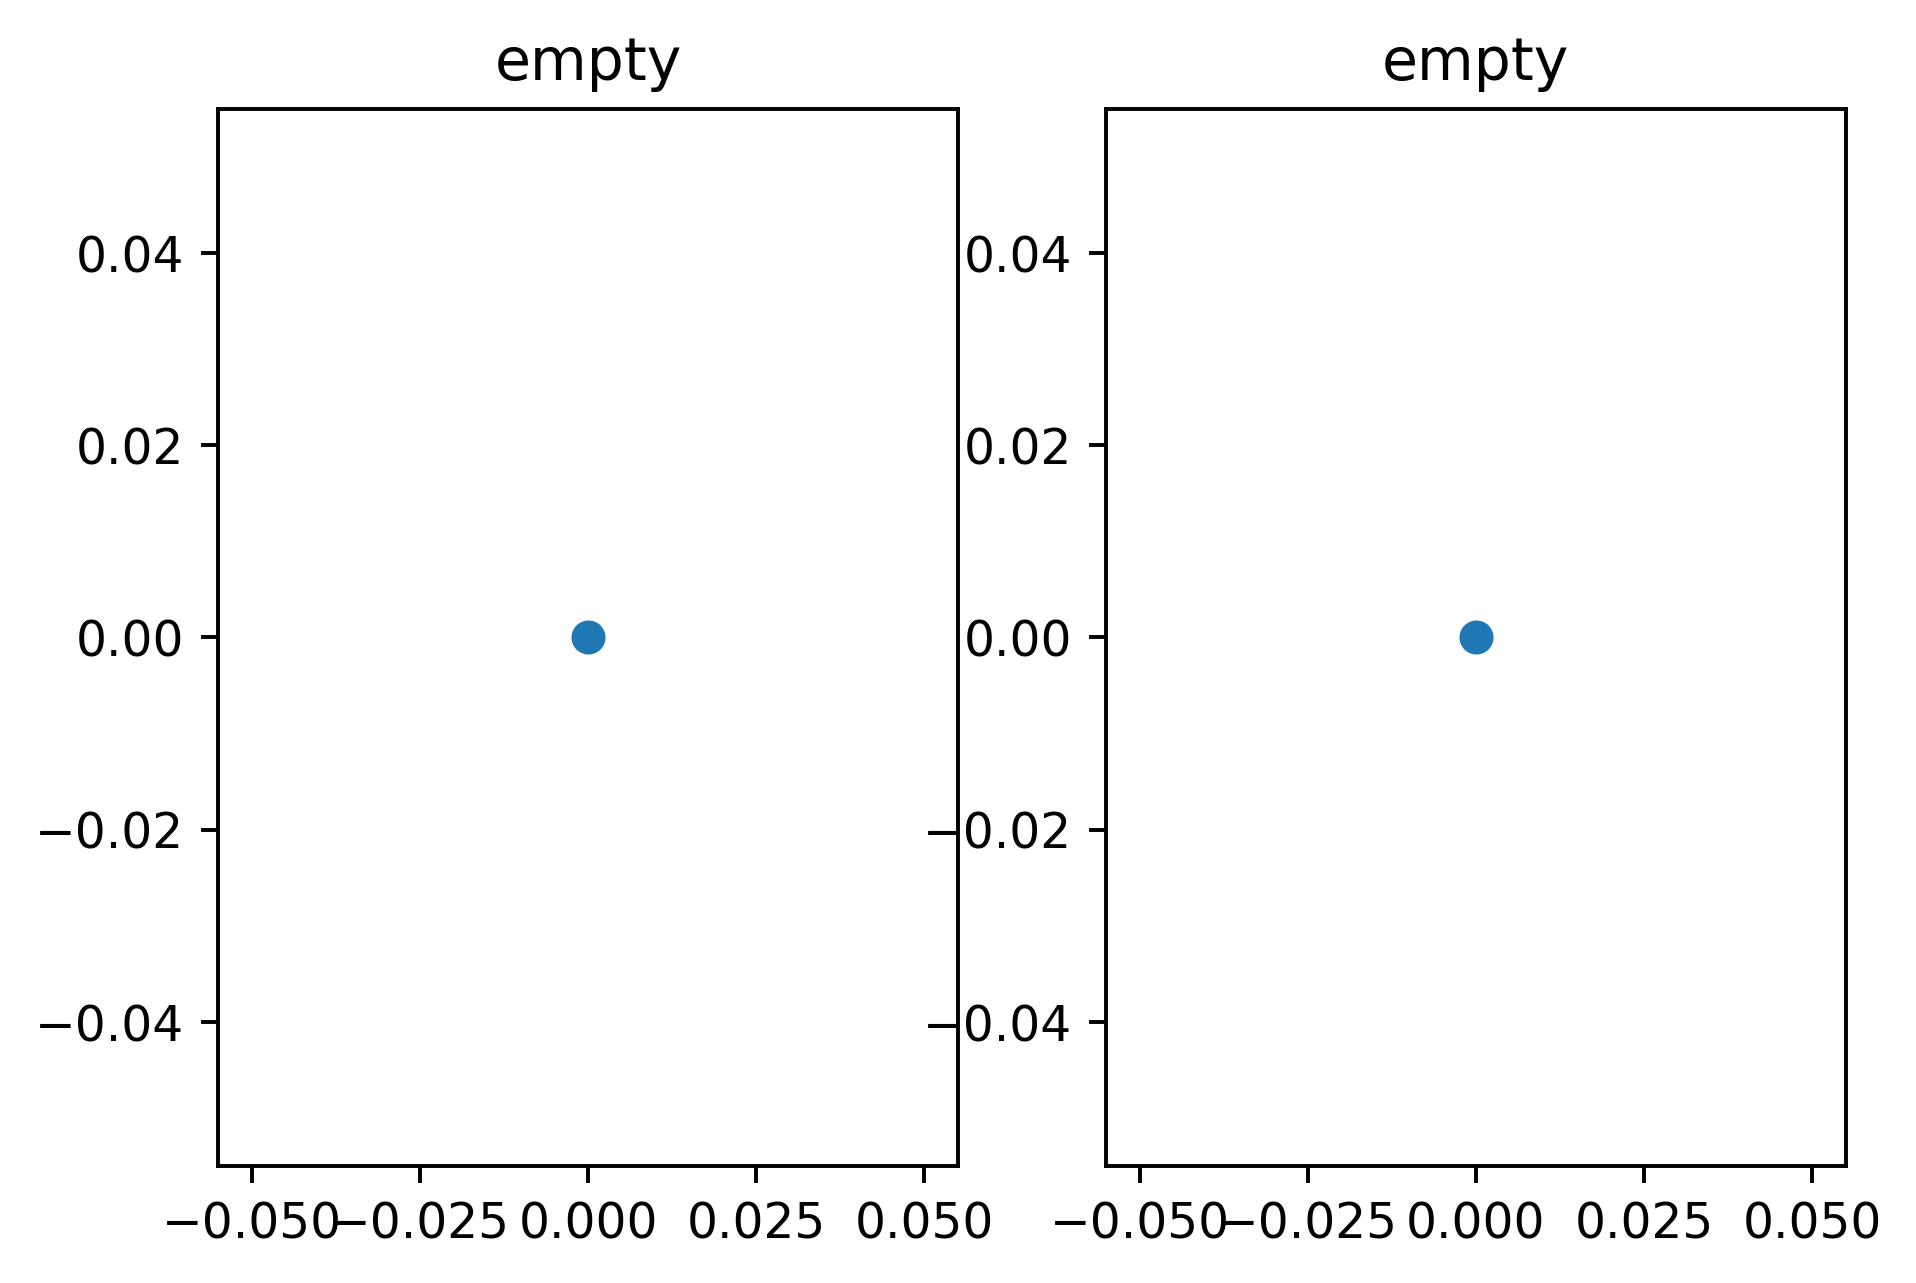

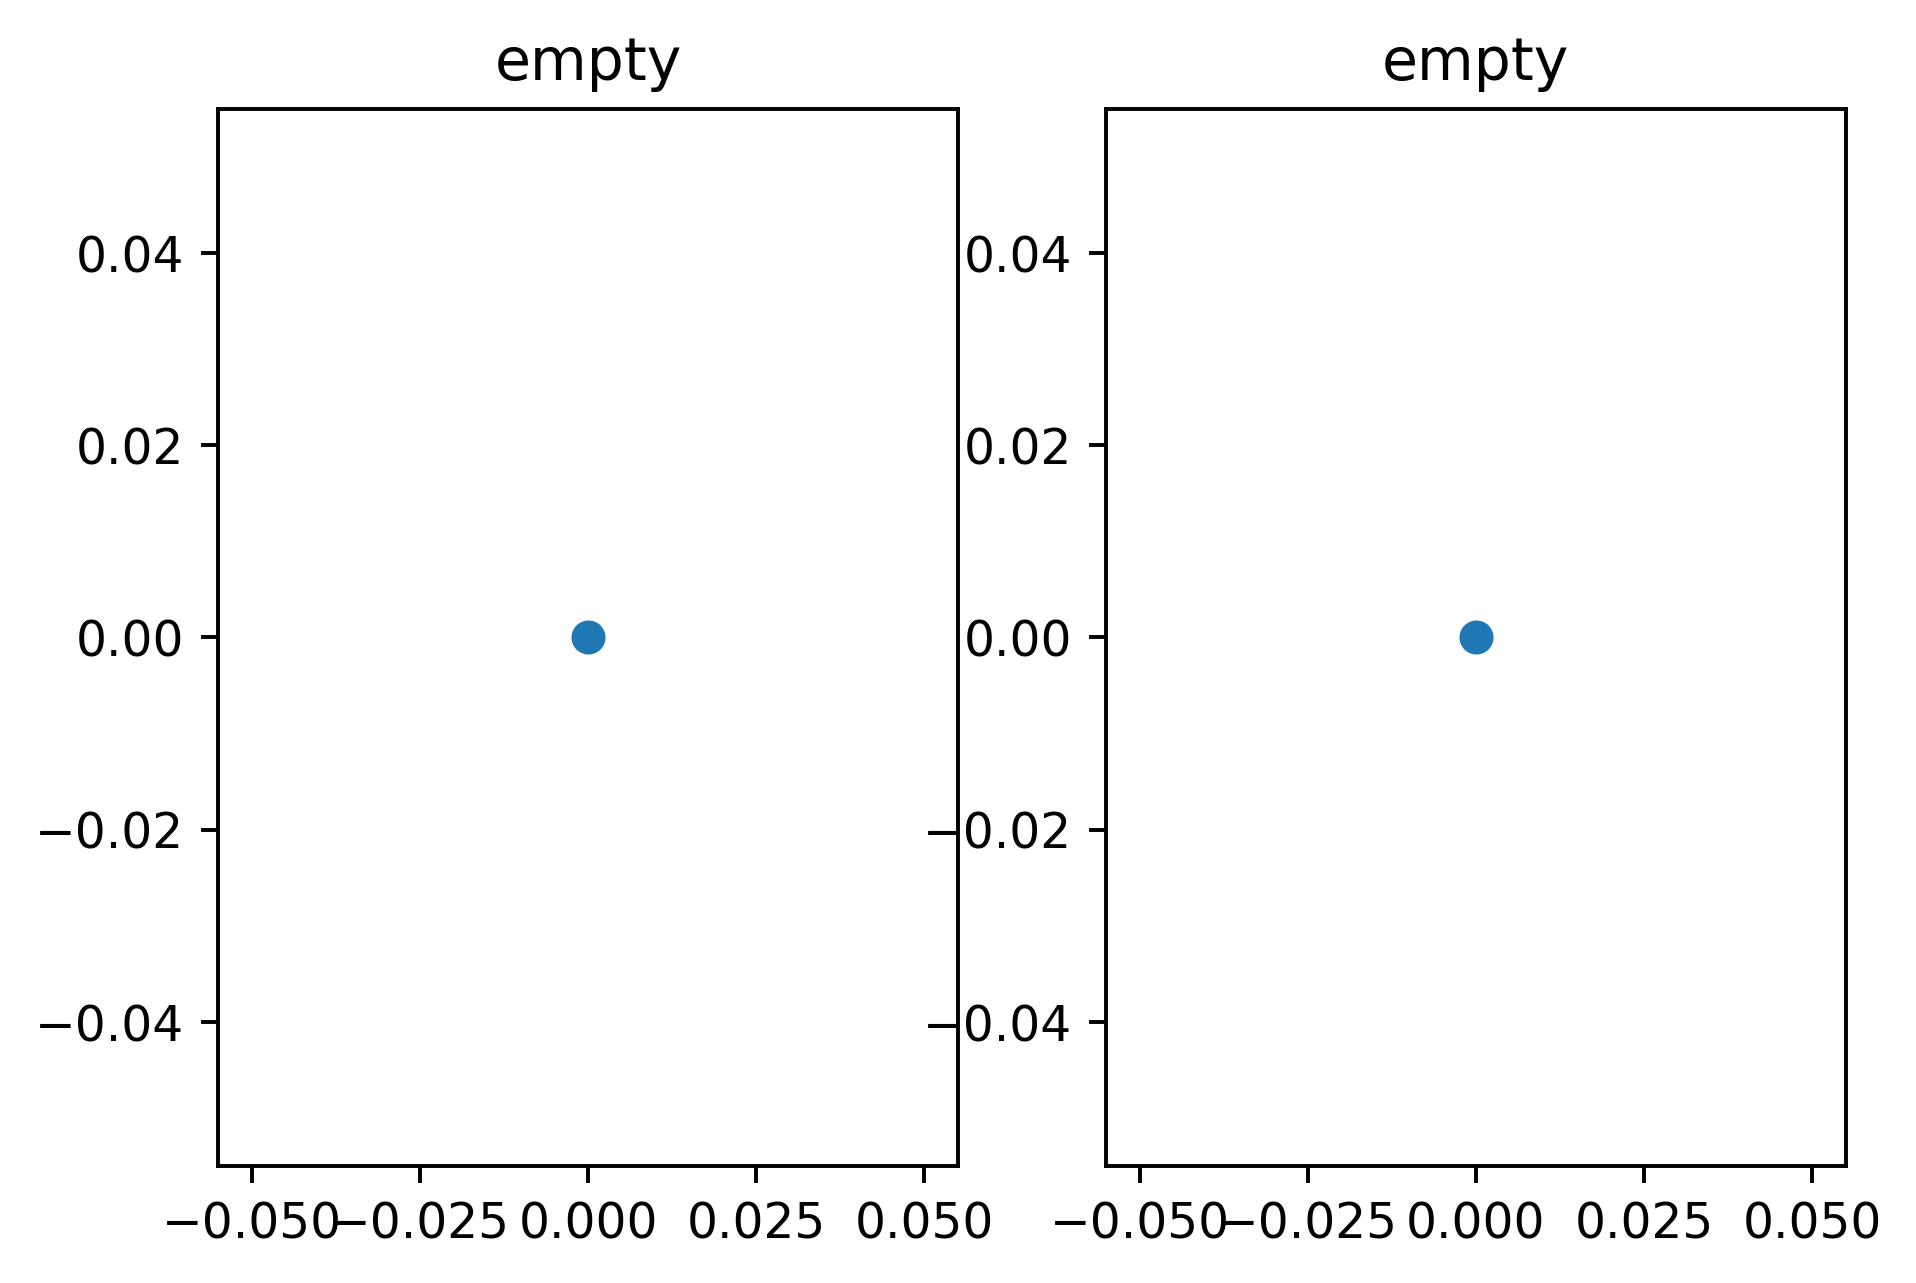

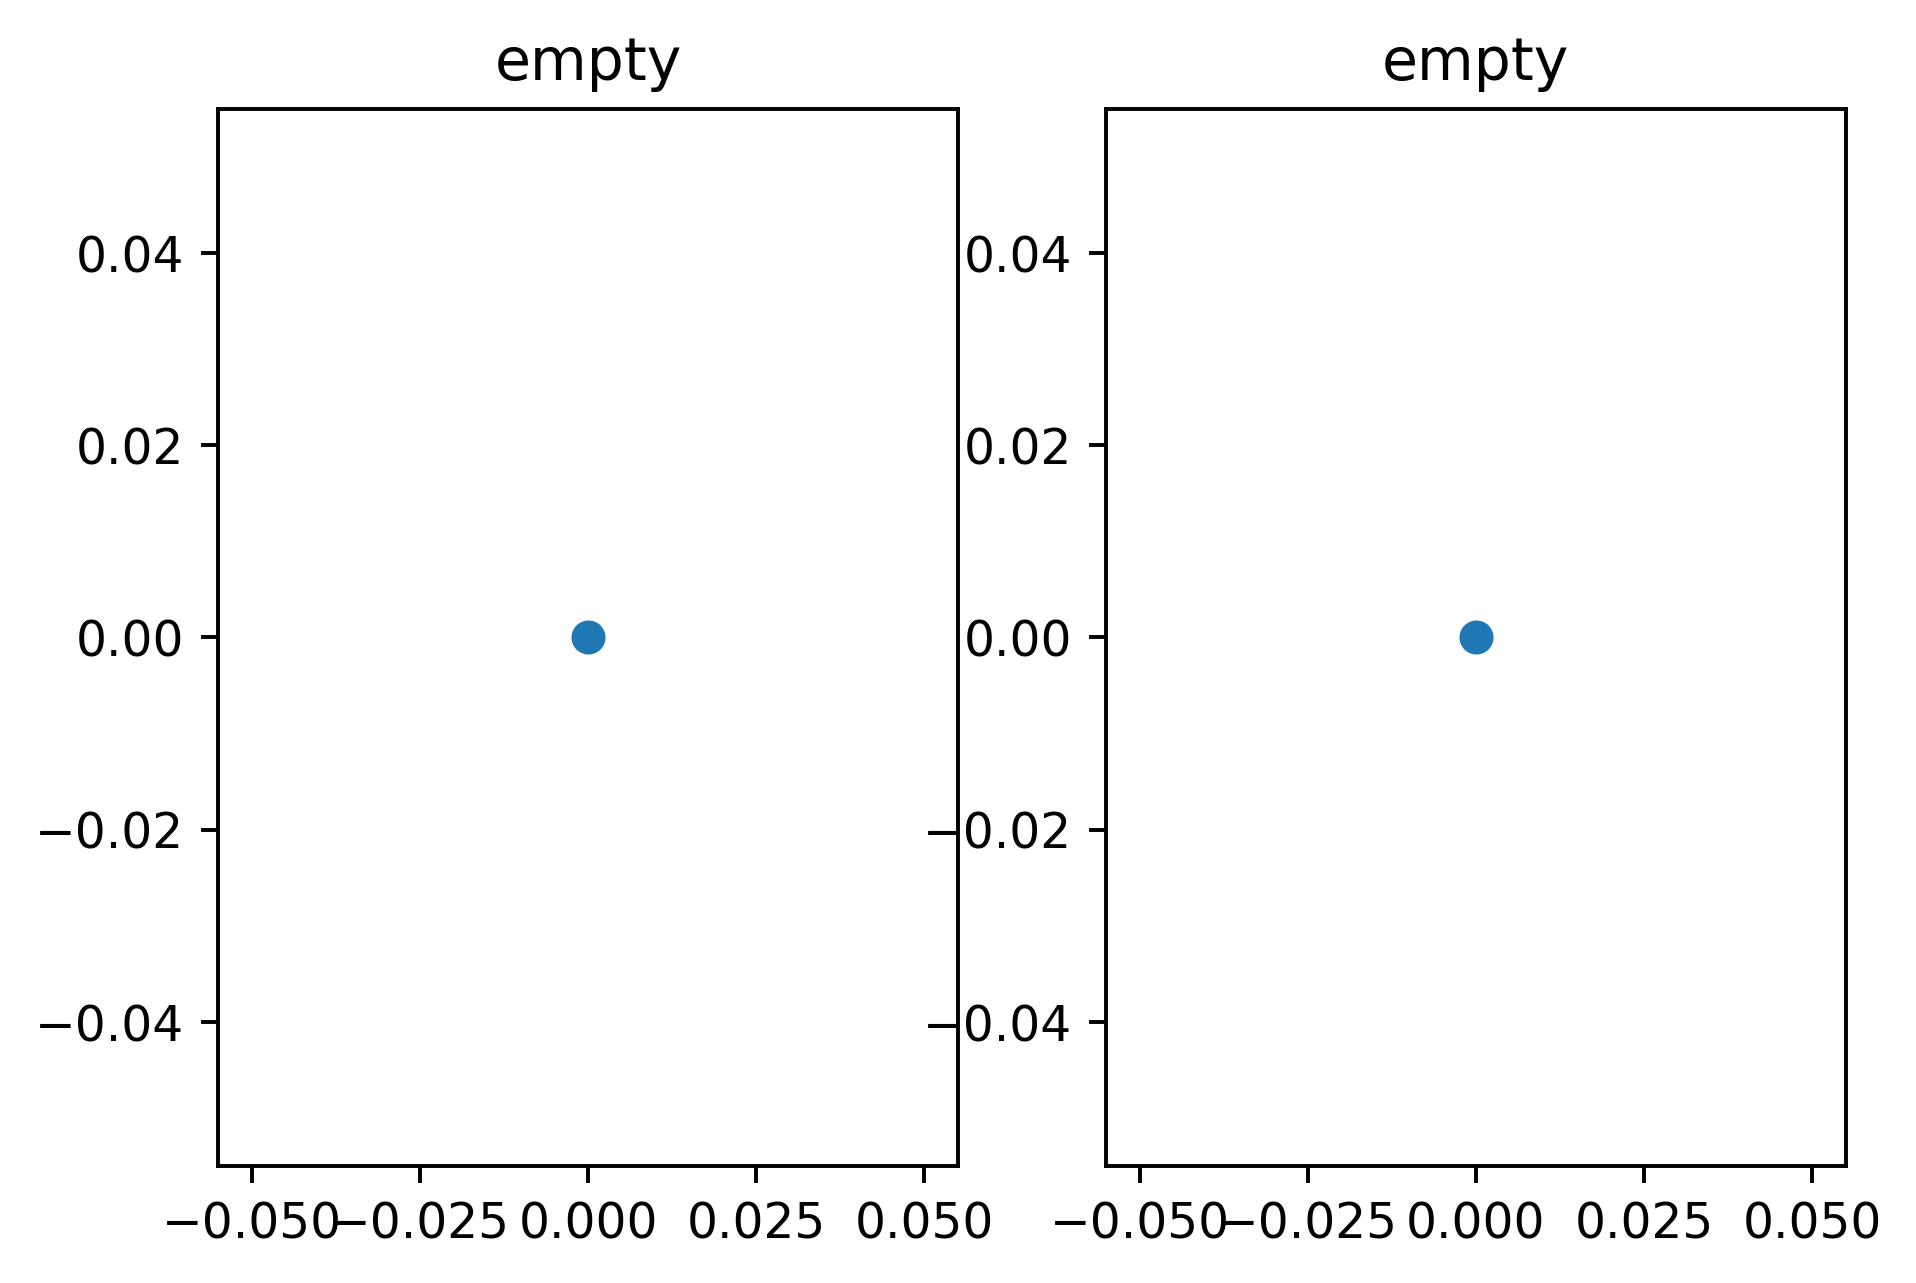

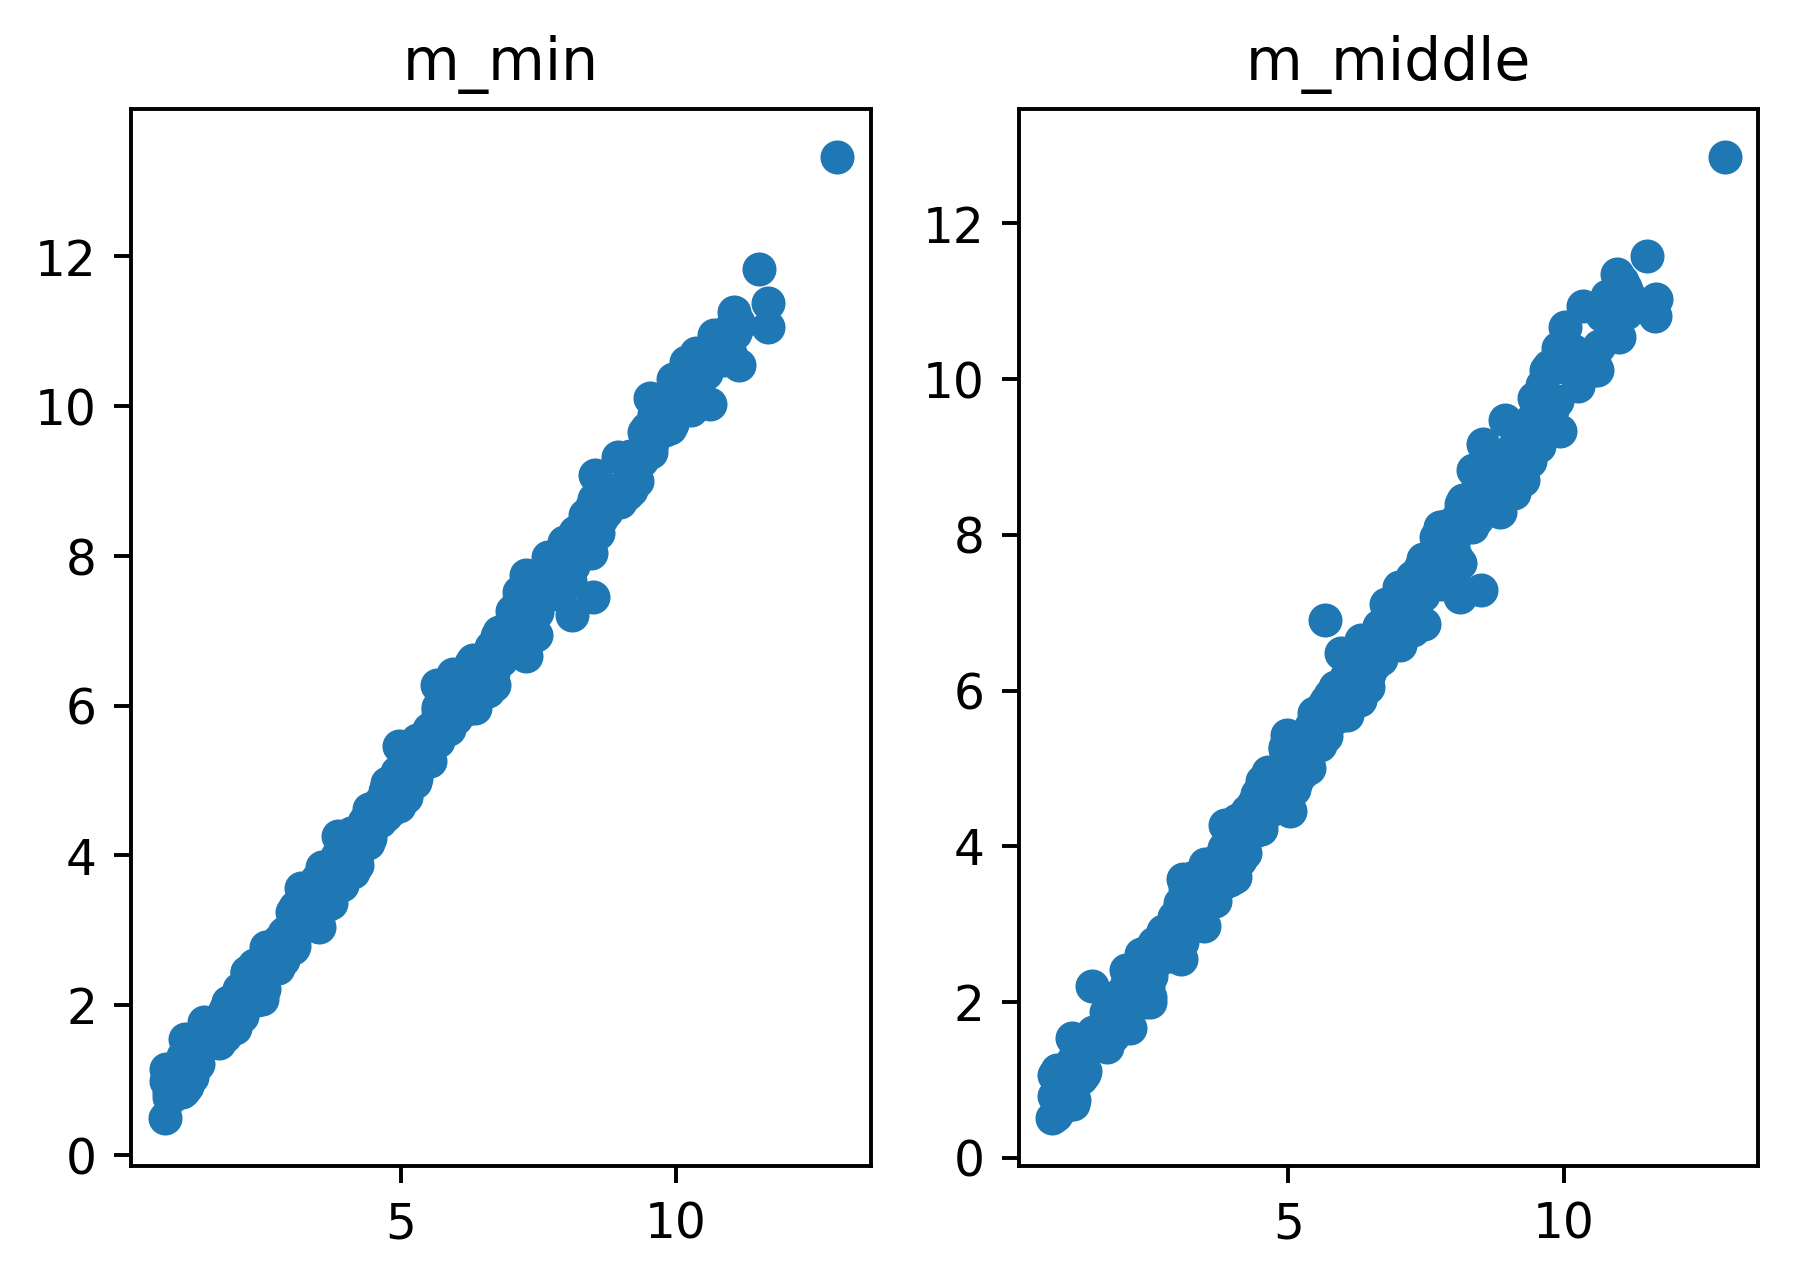

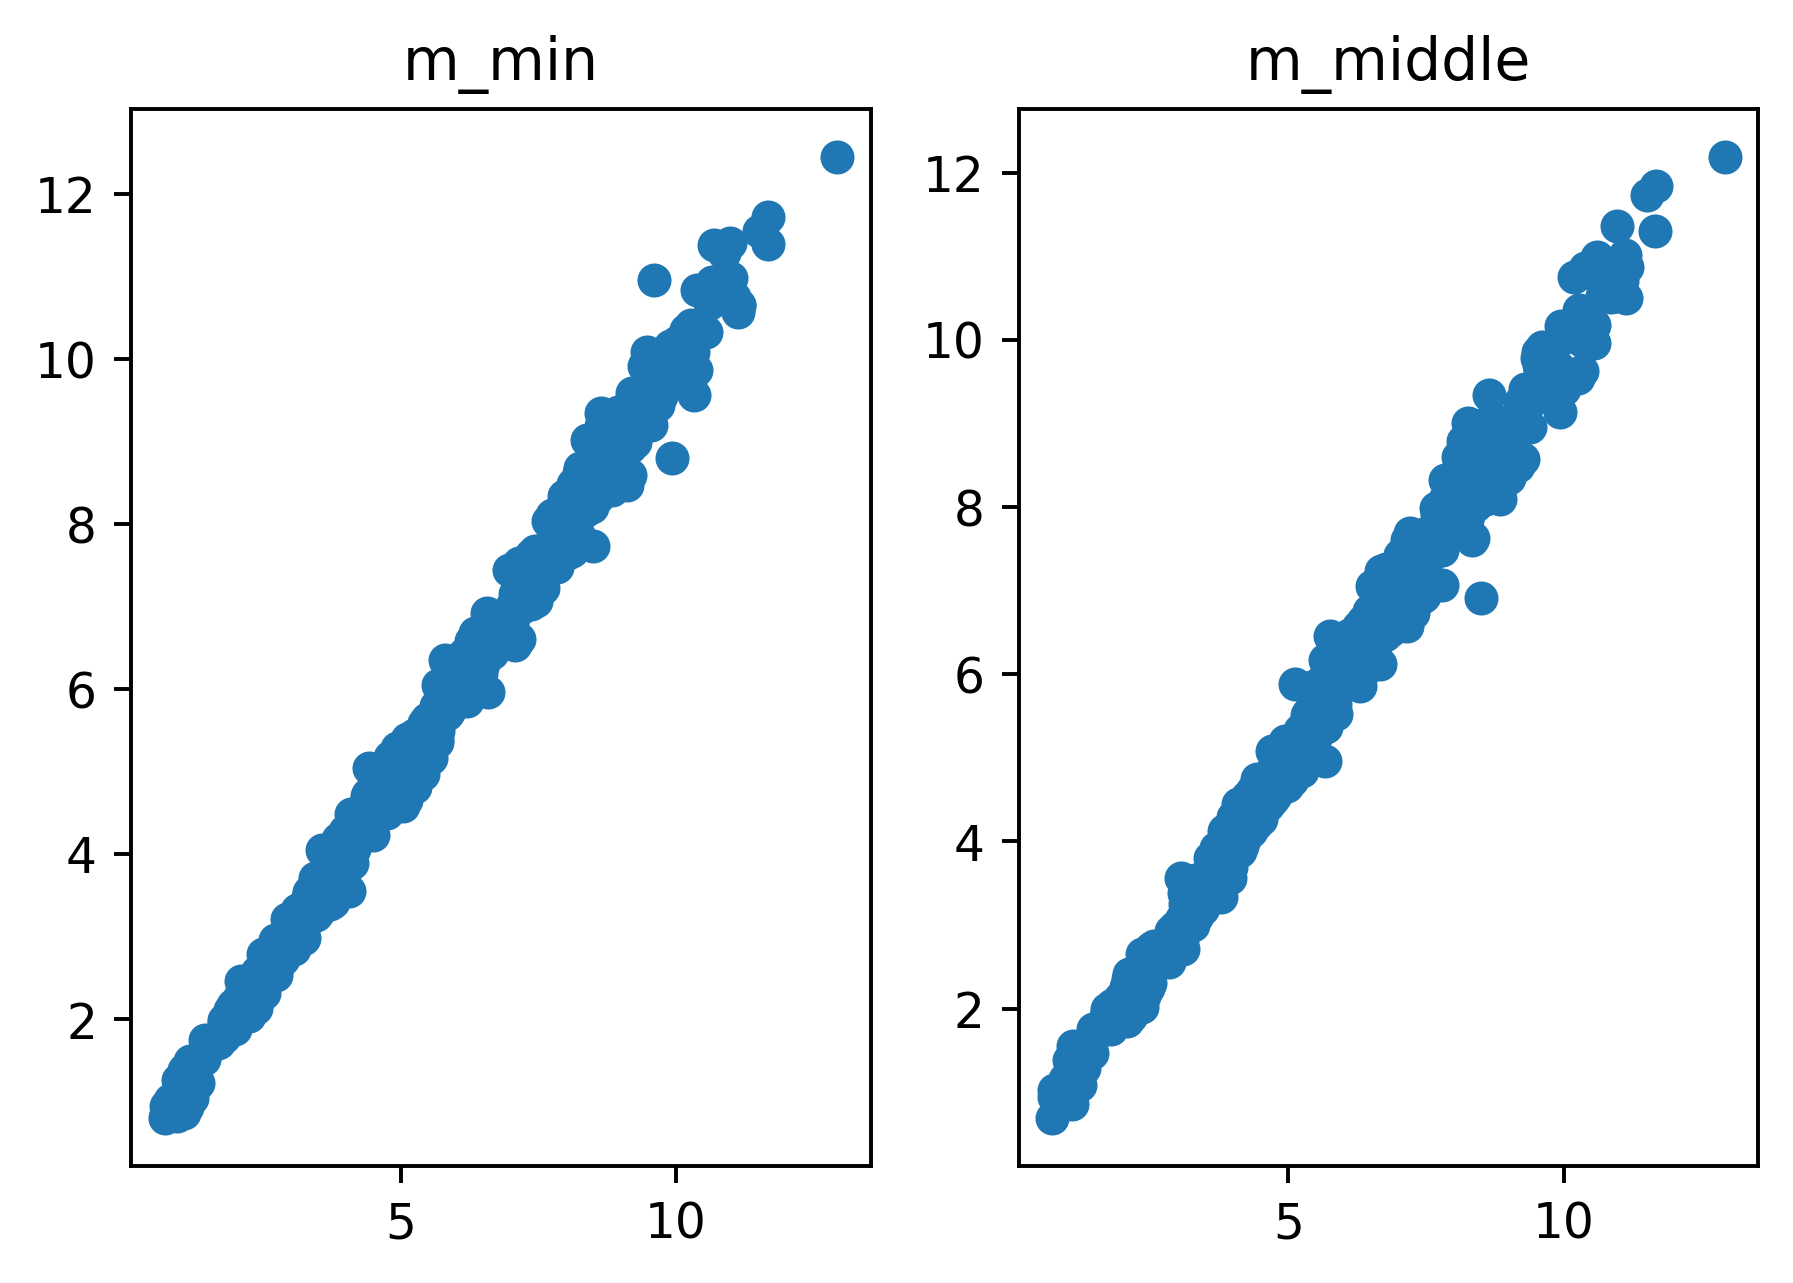

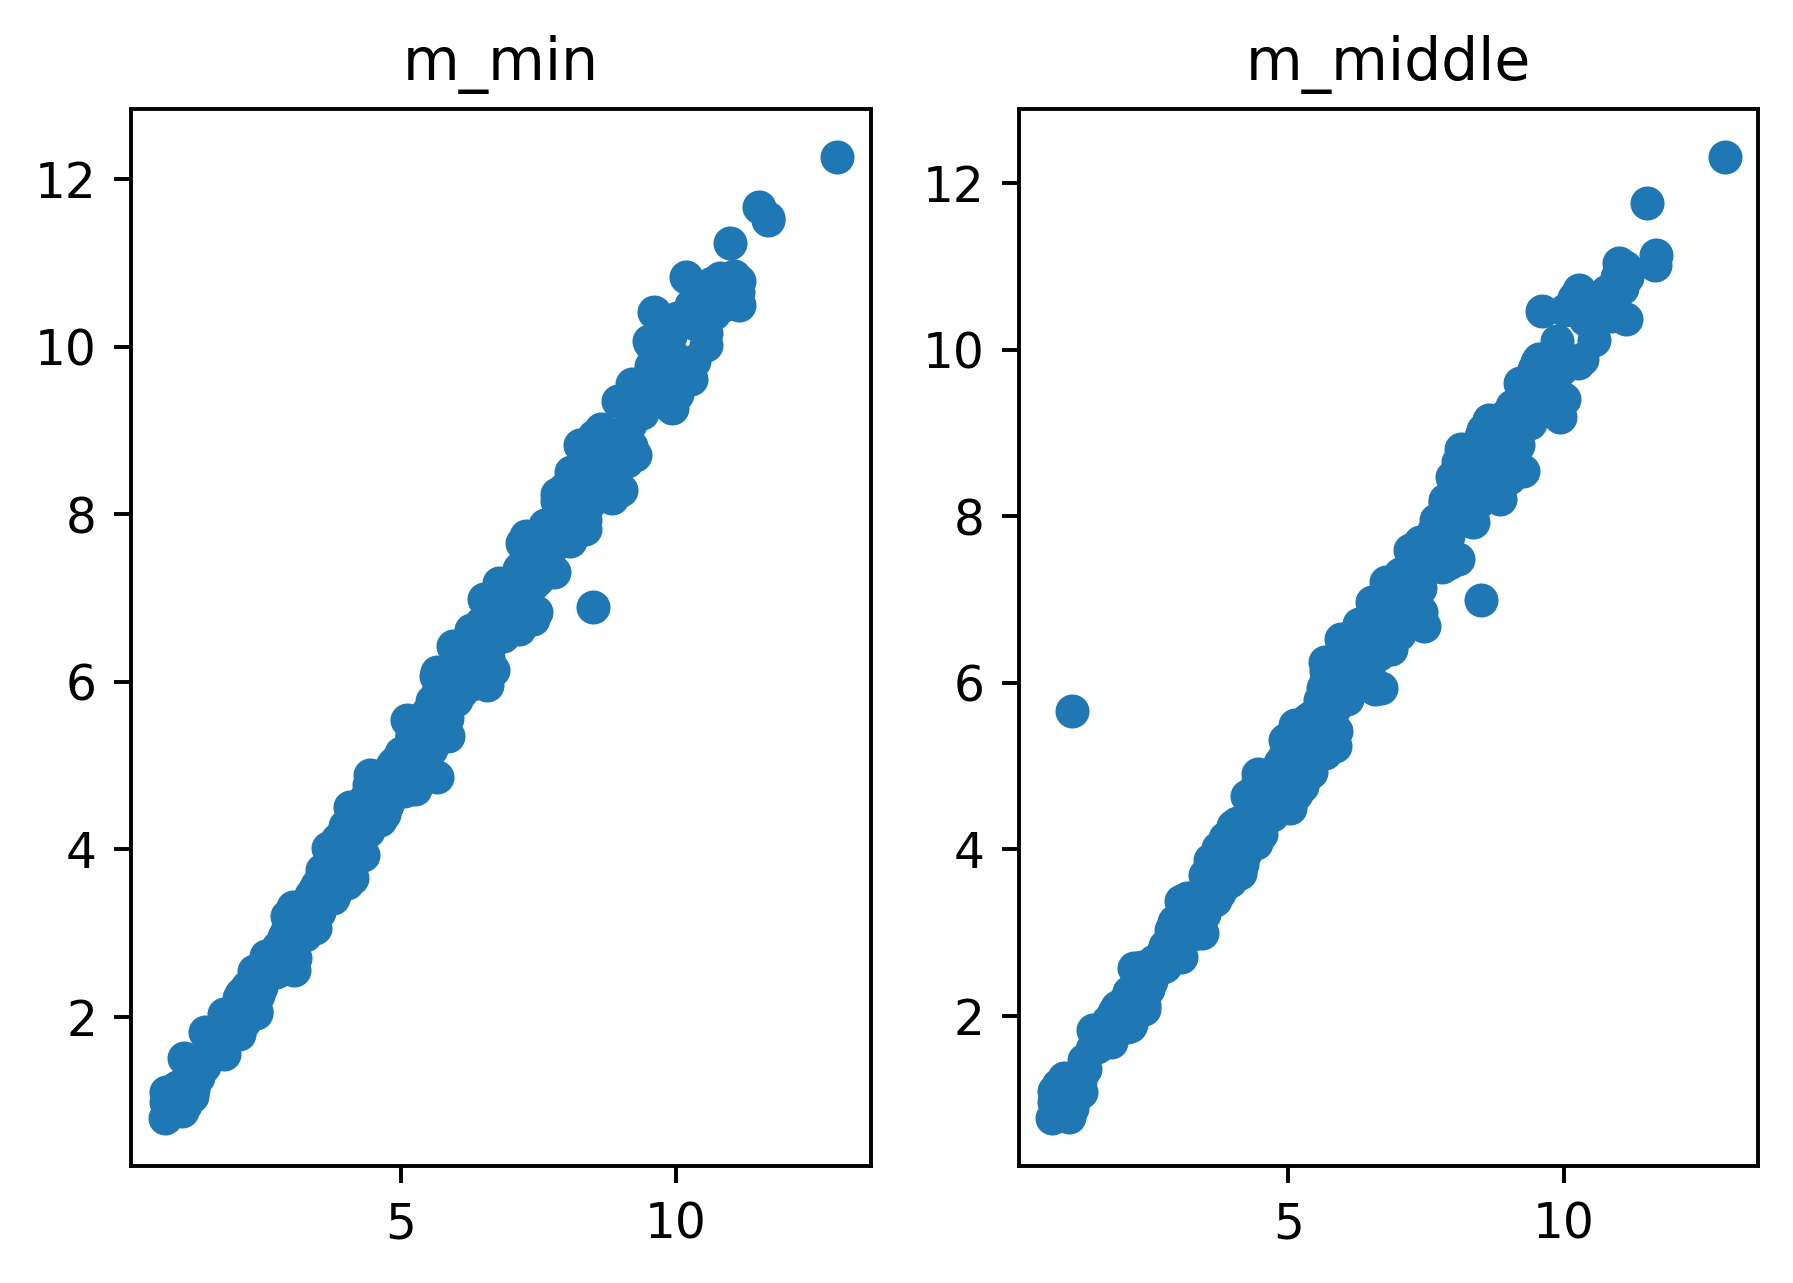

In [43]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_min, b4_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_min, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_min, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(b4_min, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

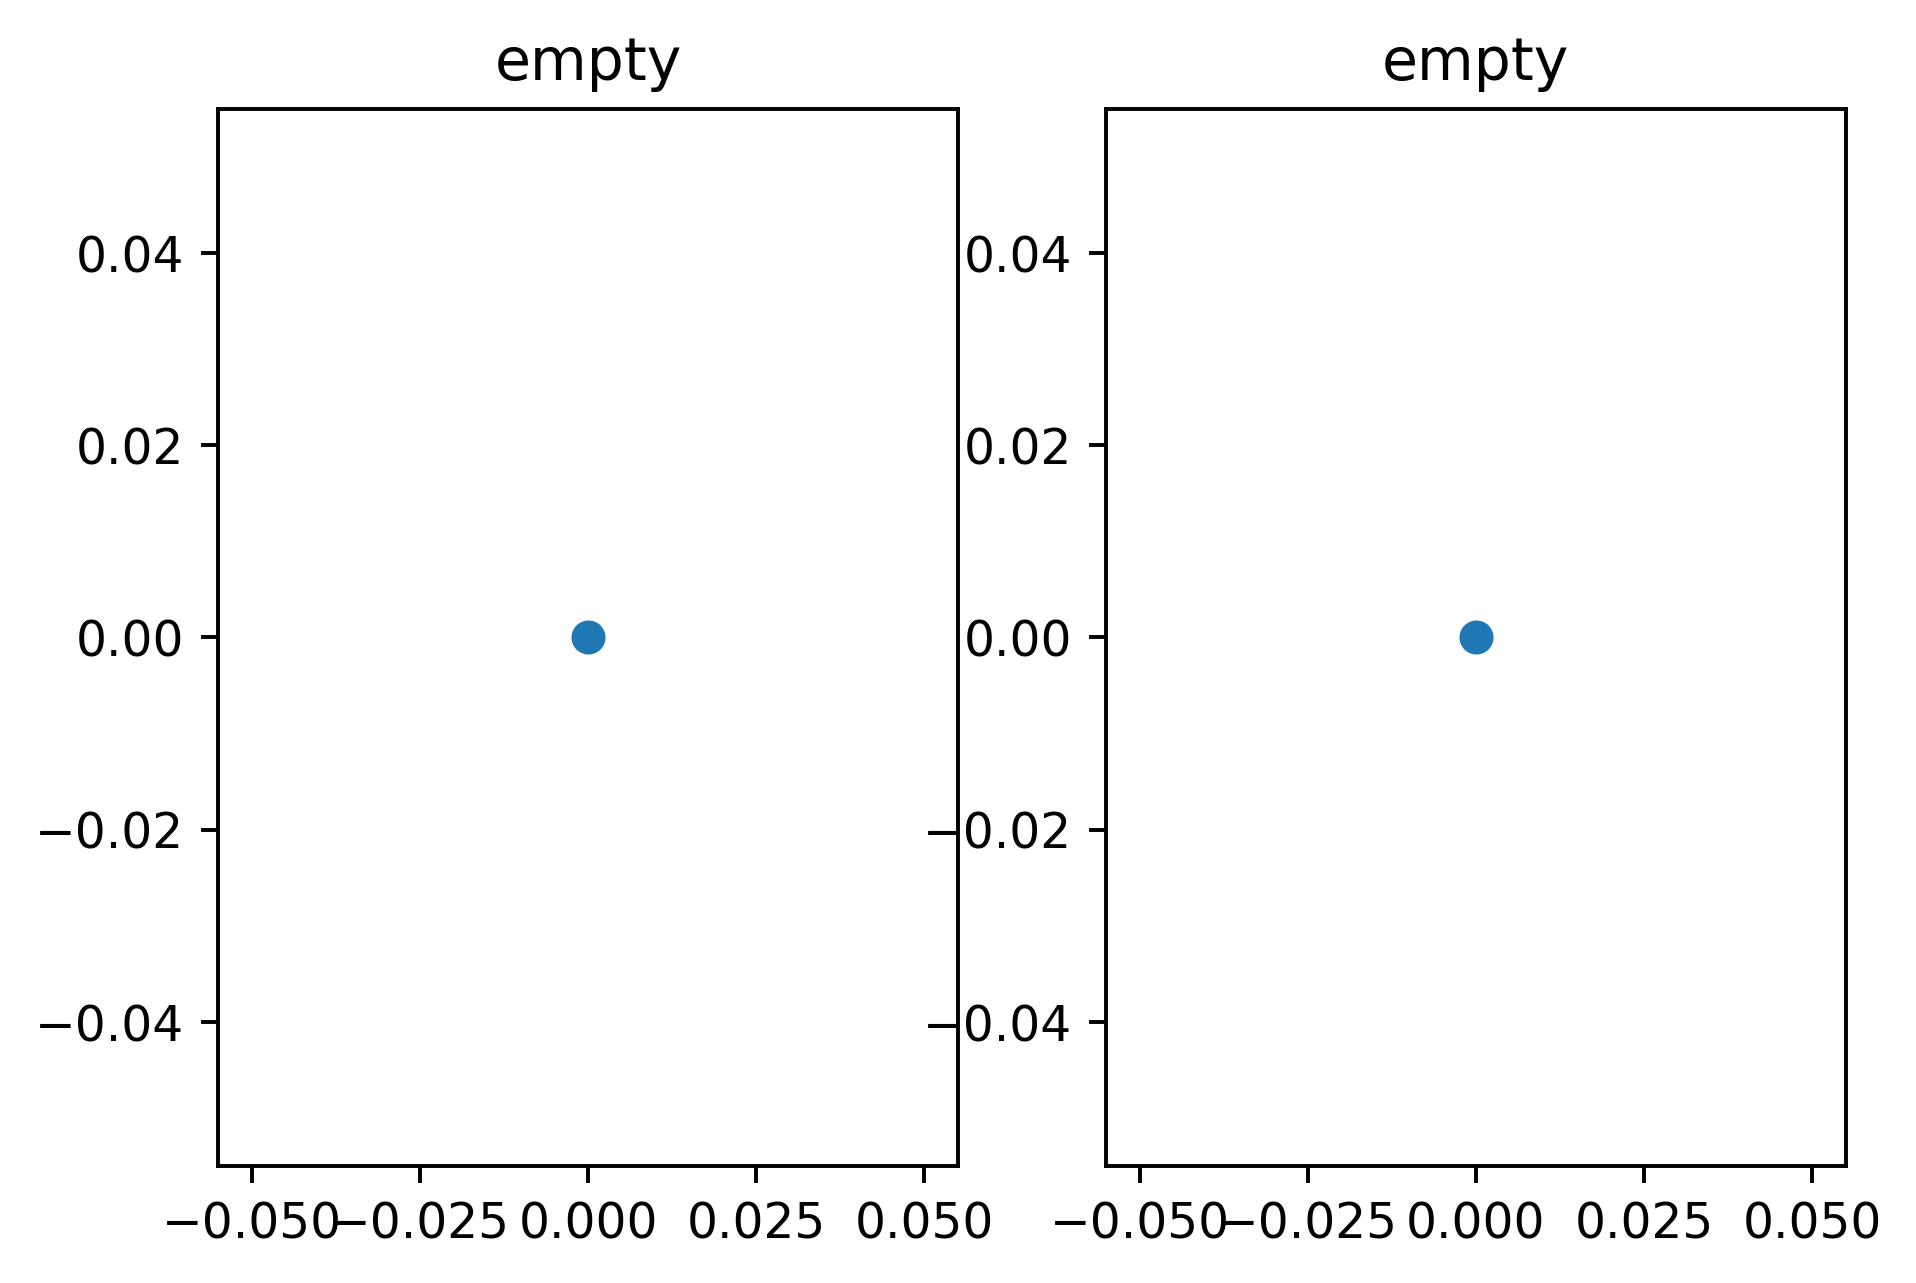

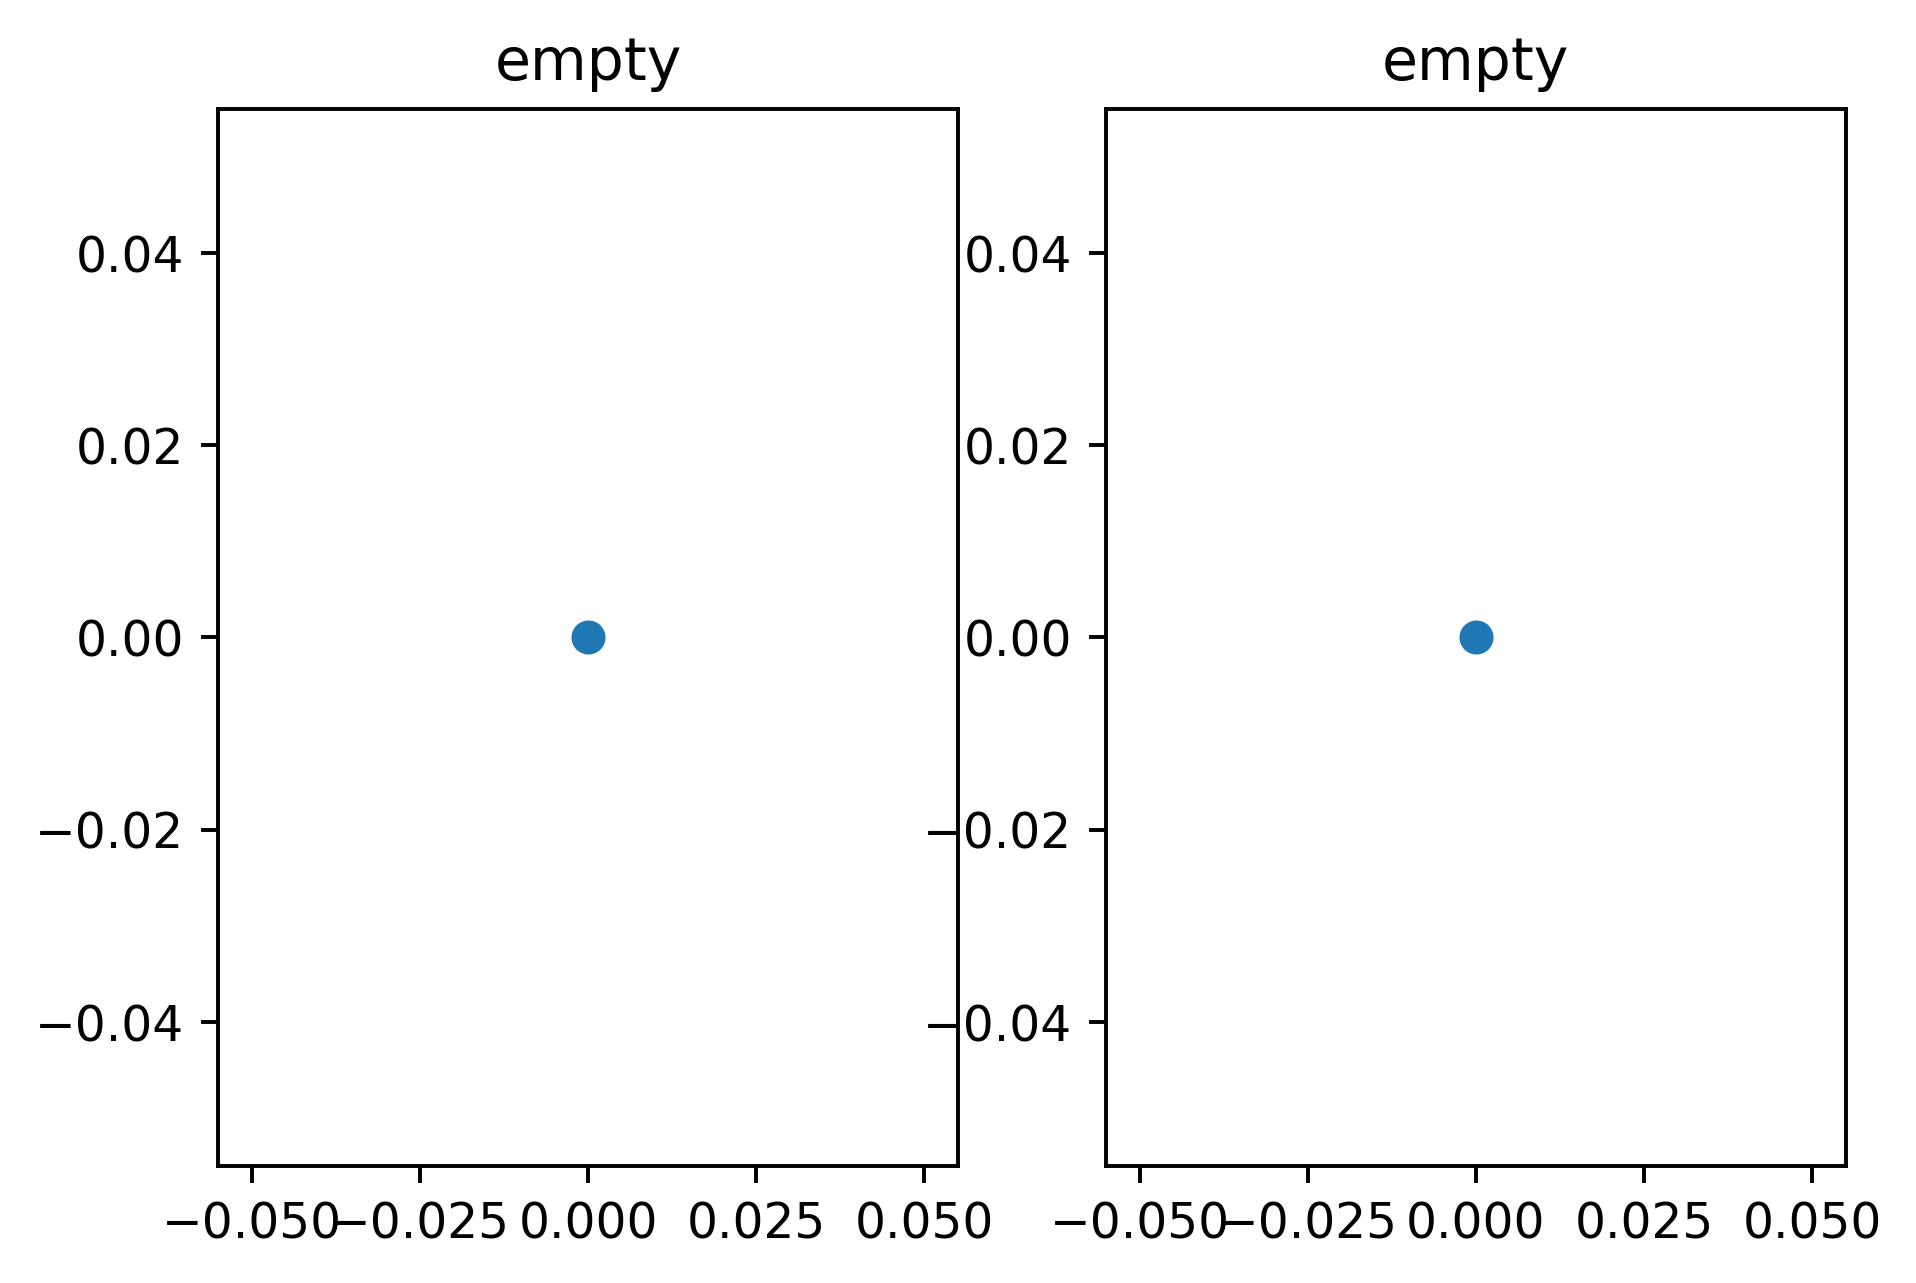

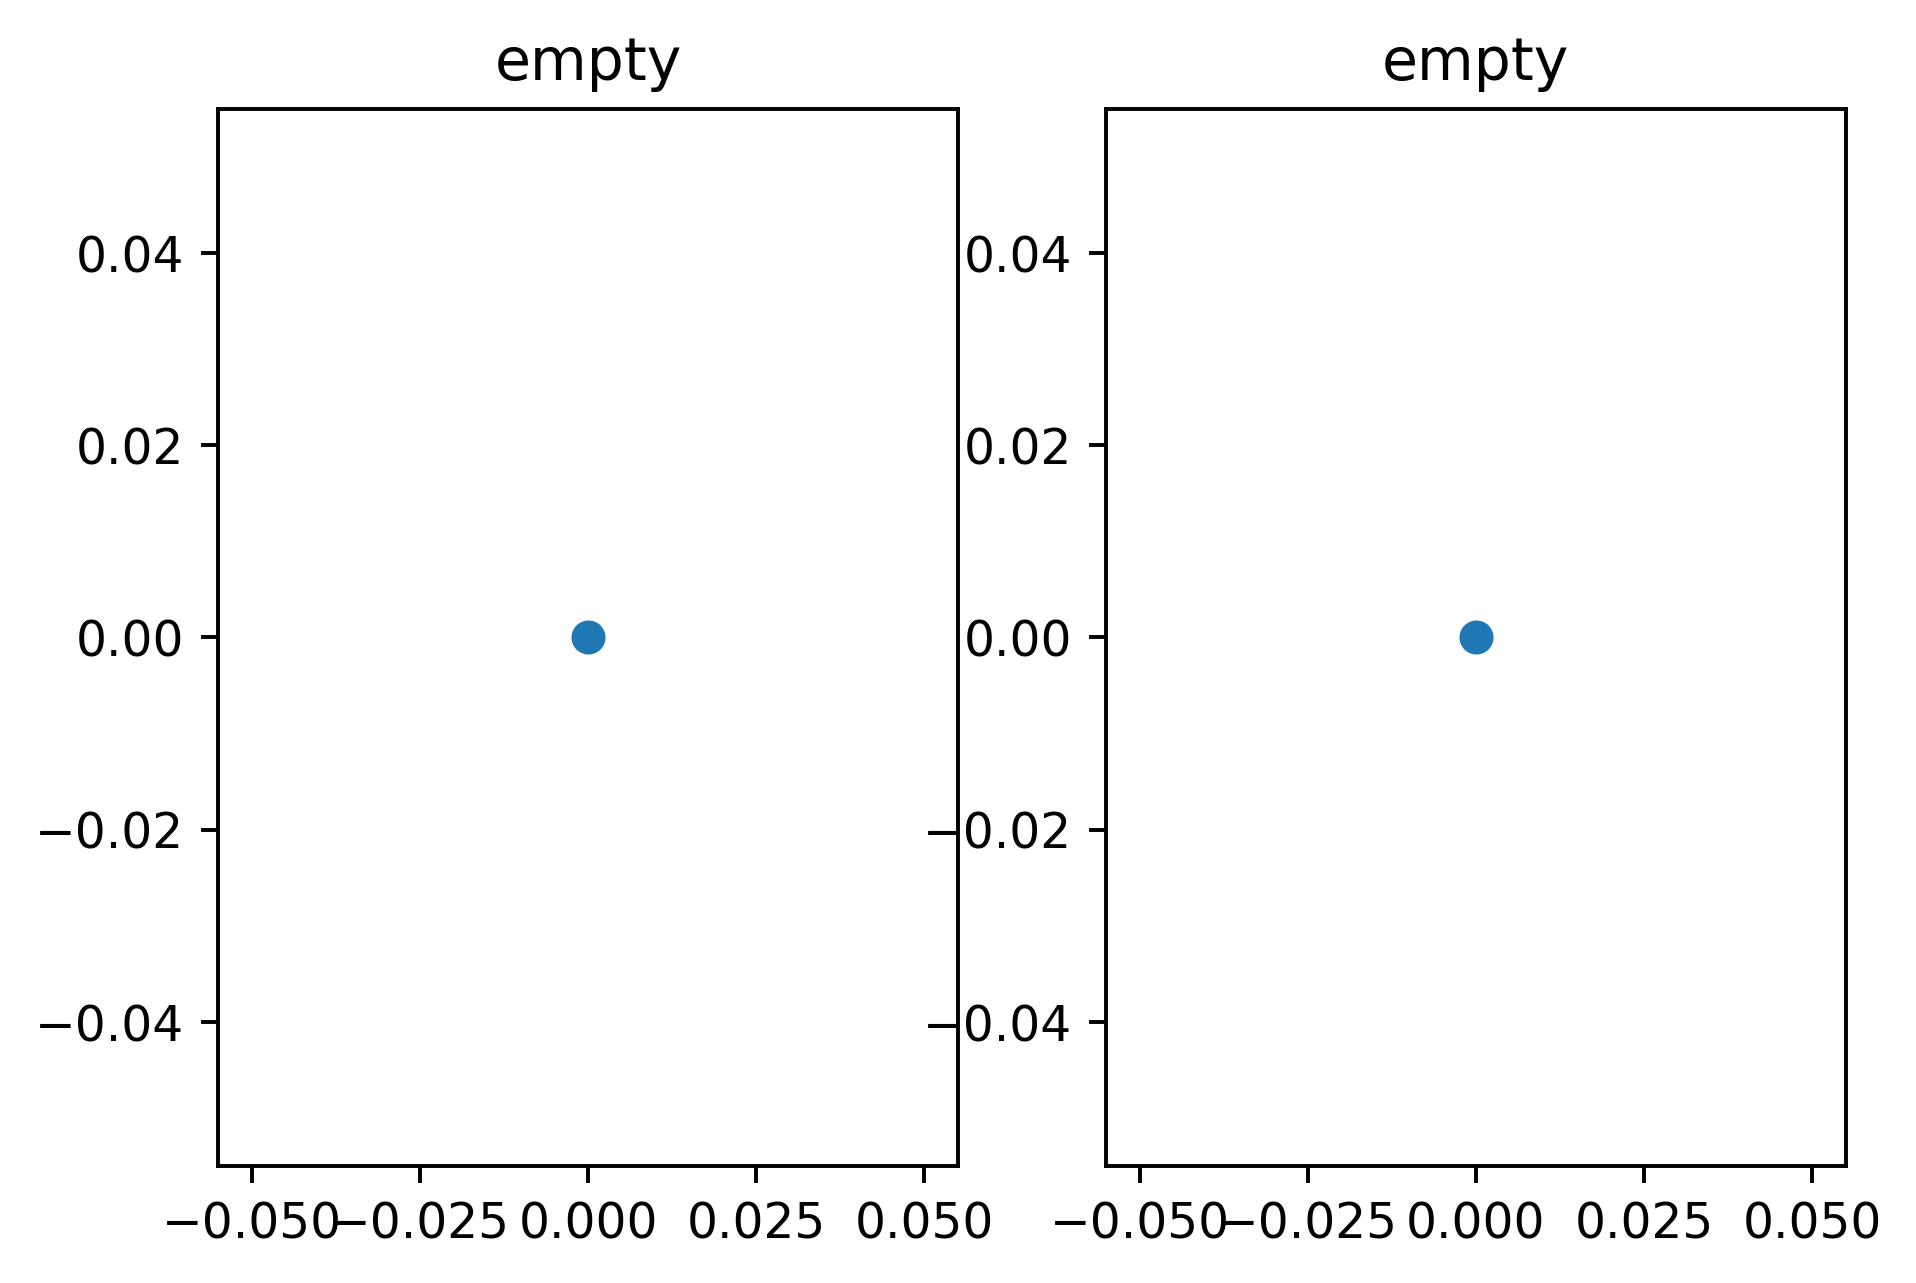

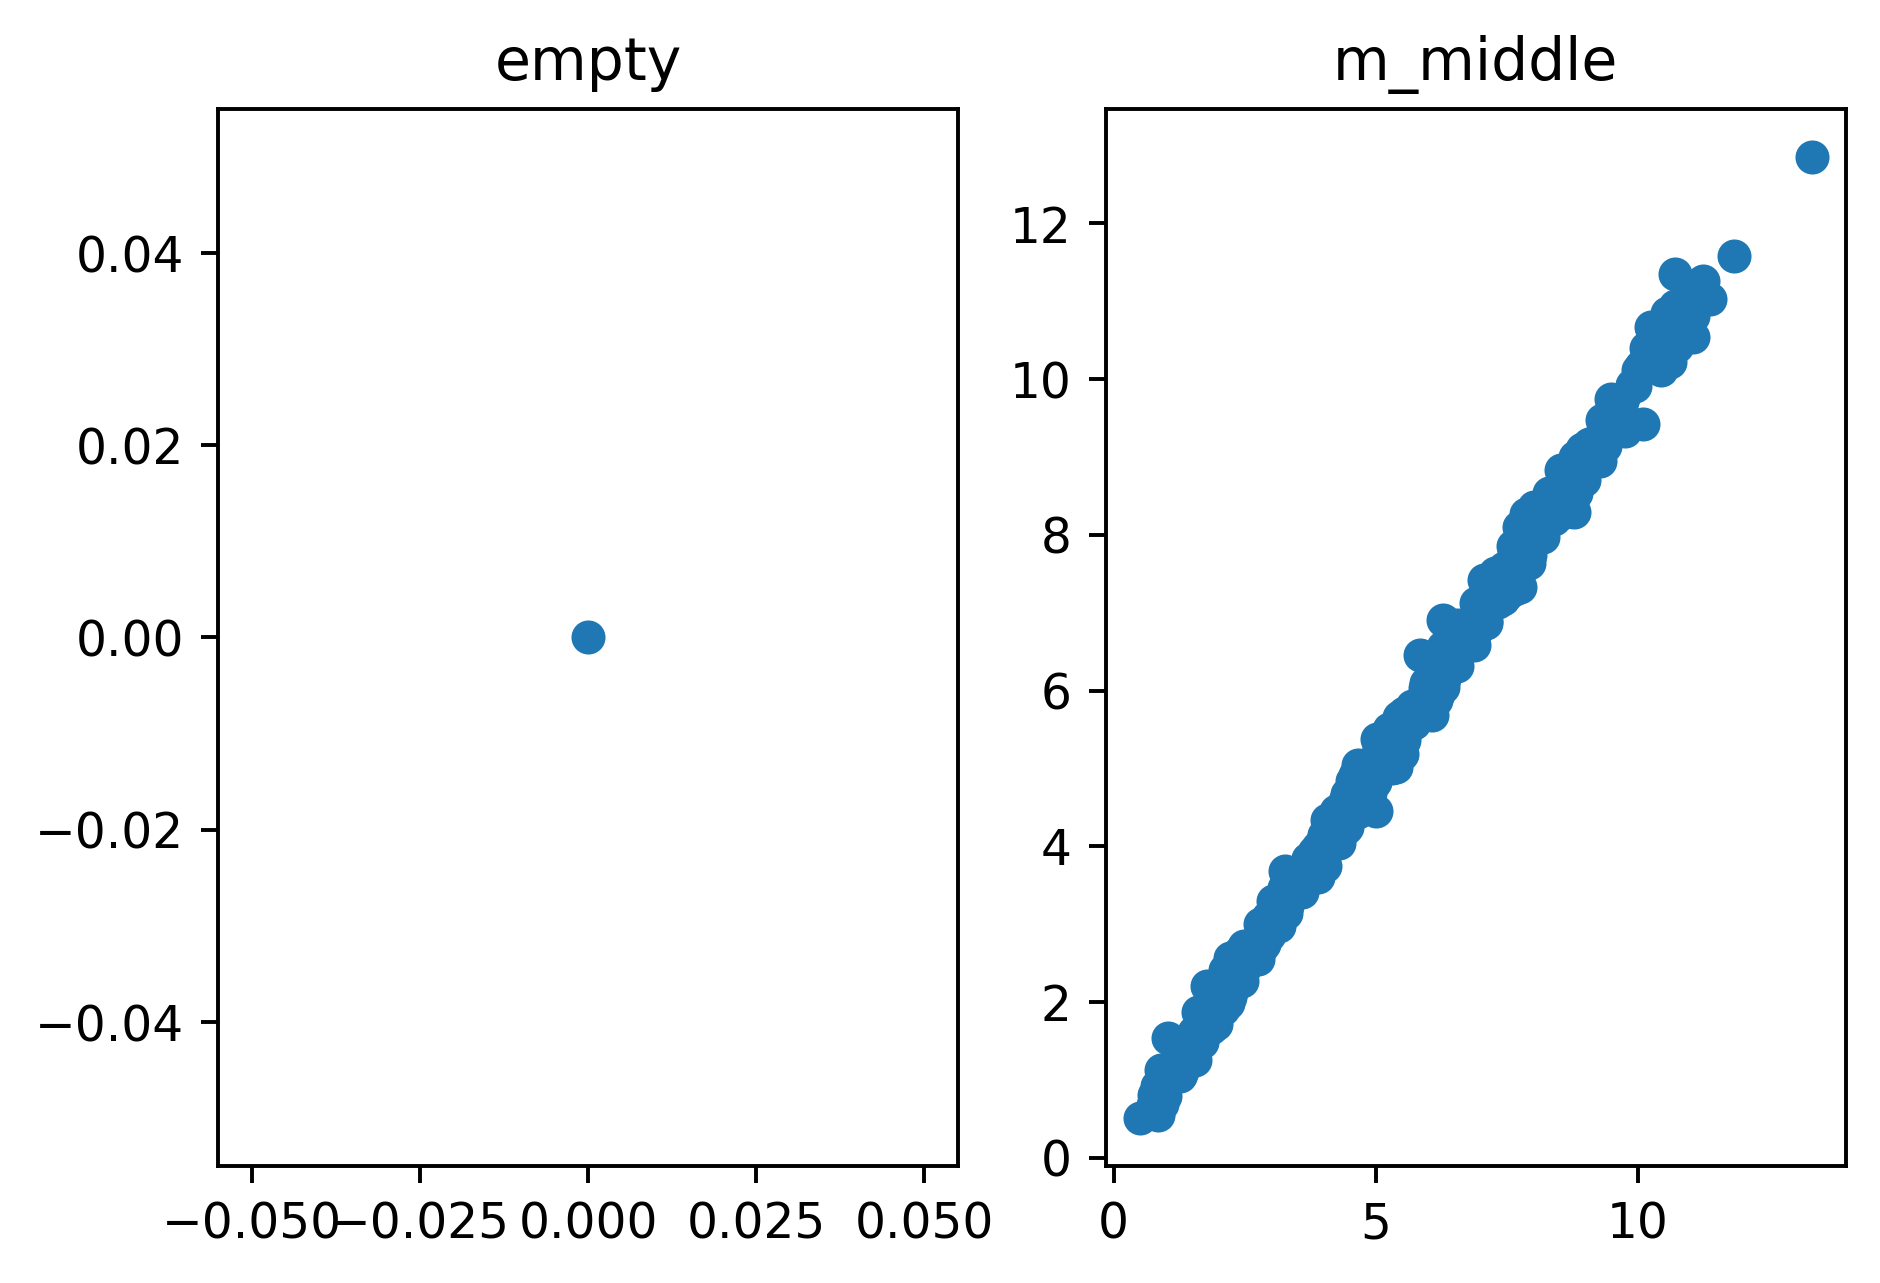

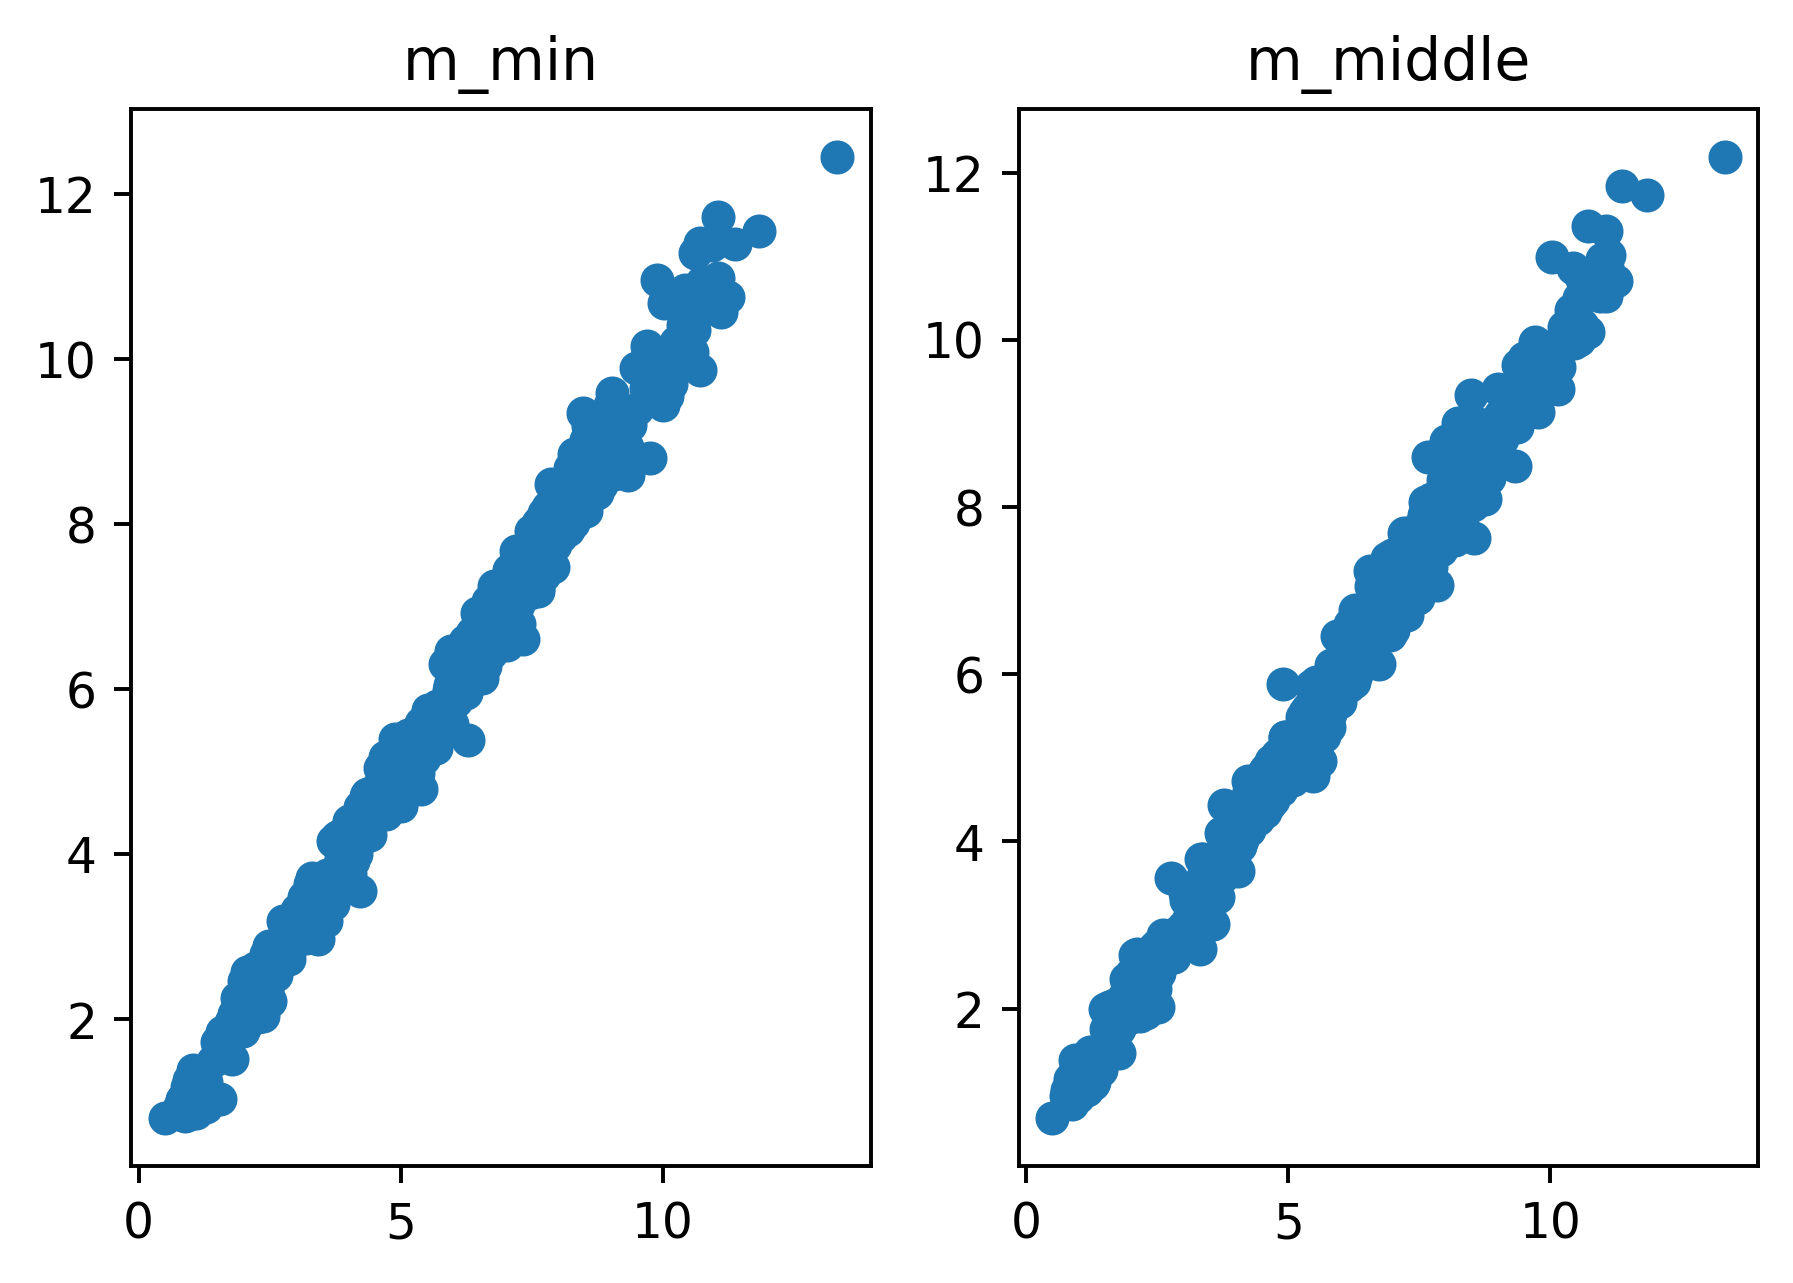

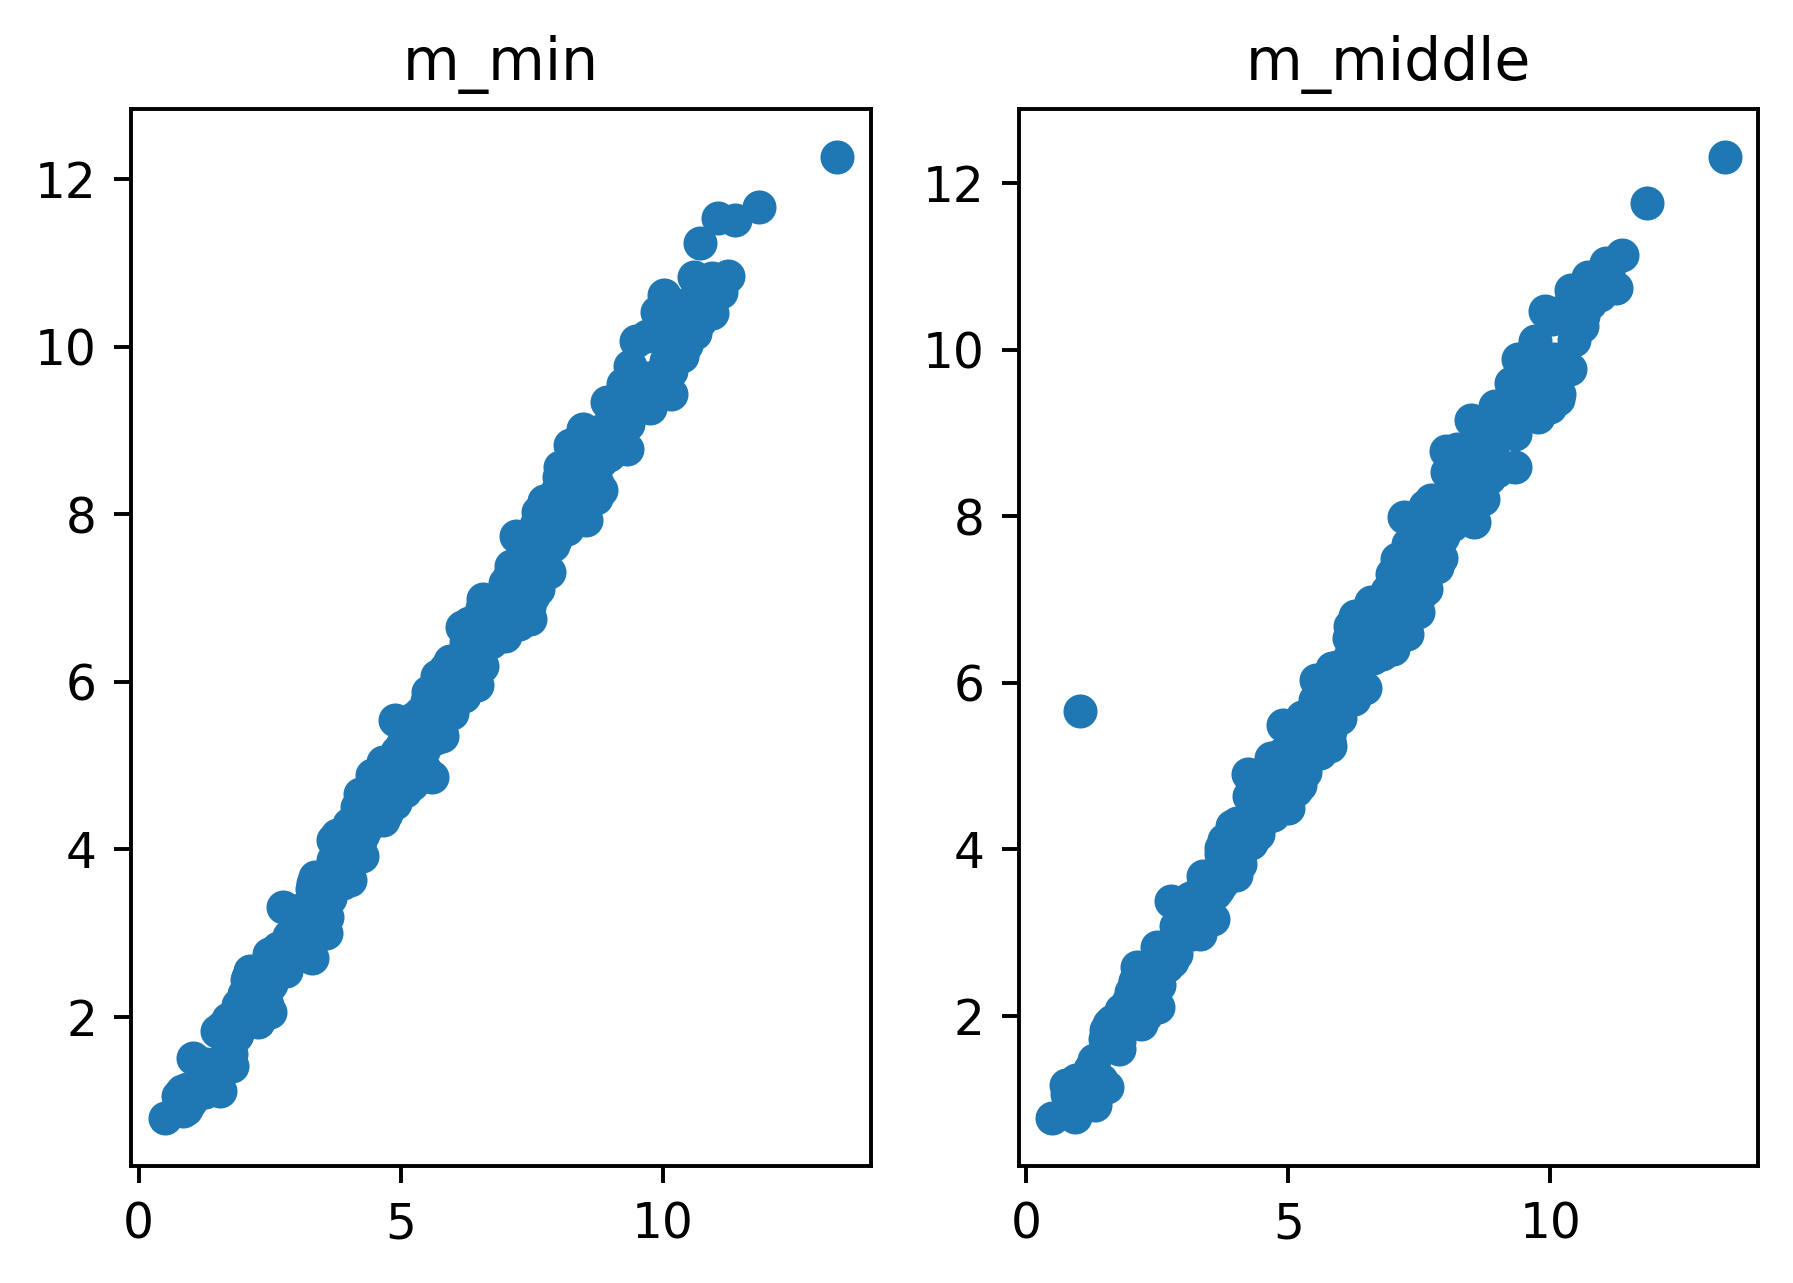

In [42]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(b4_middle, b4_max)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_middle, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(b4_middle, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_middle, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_middle, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

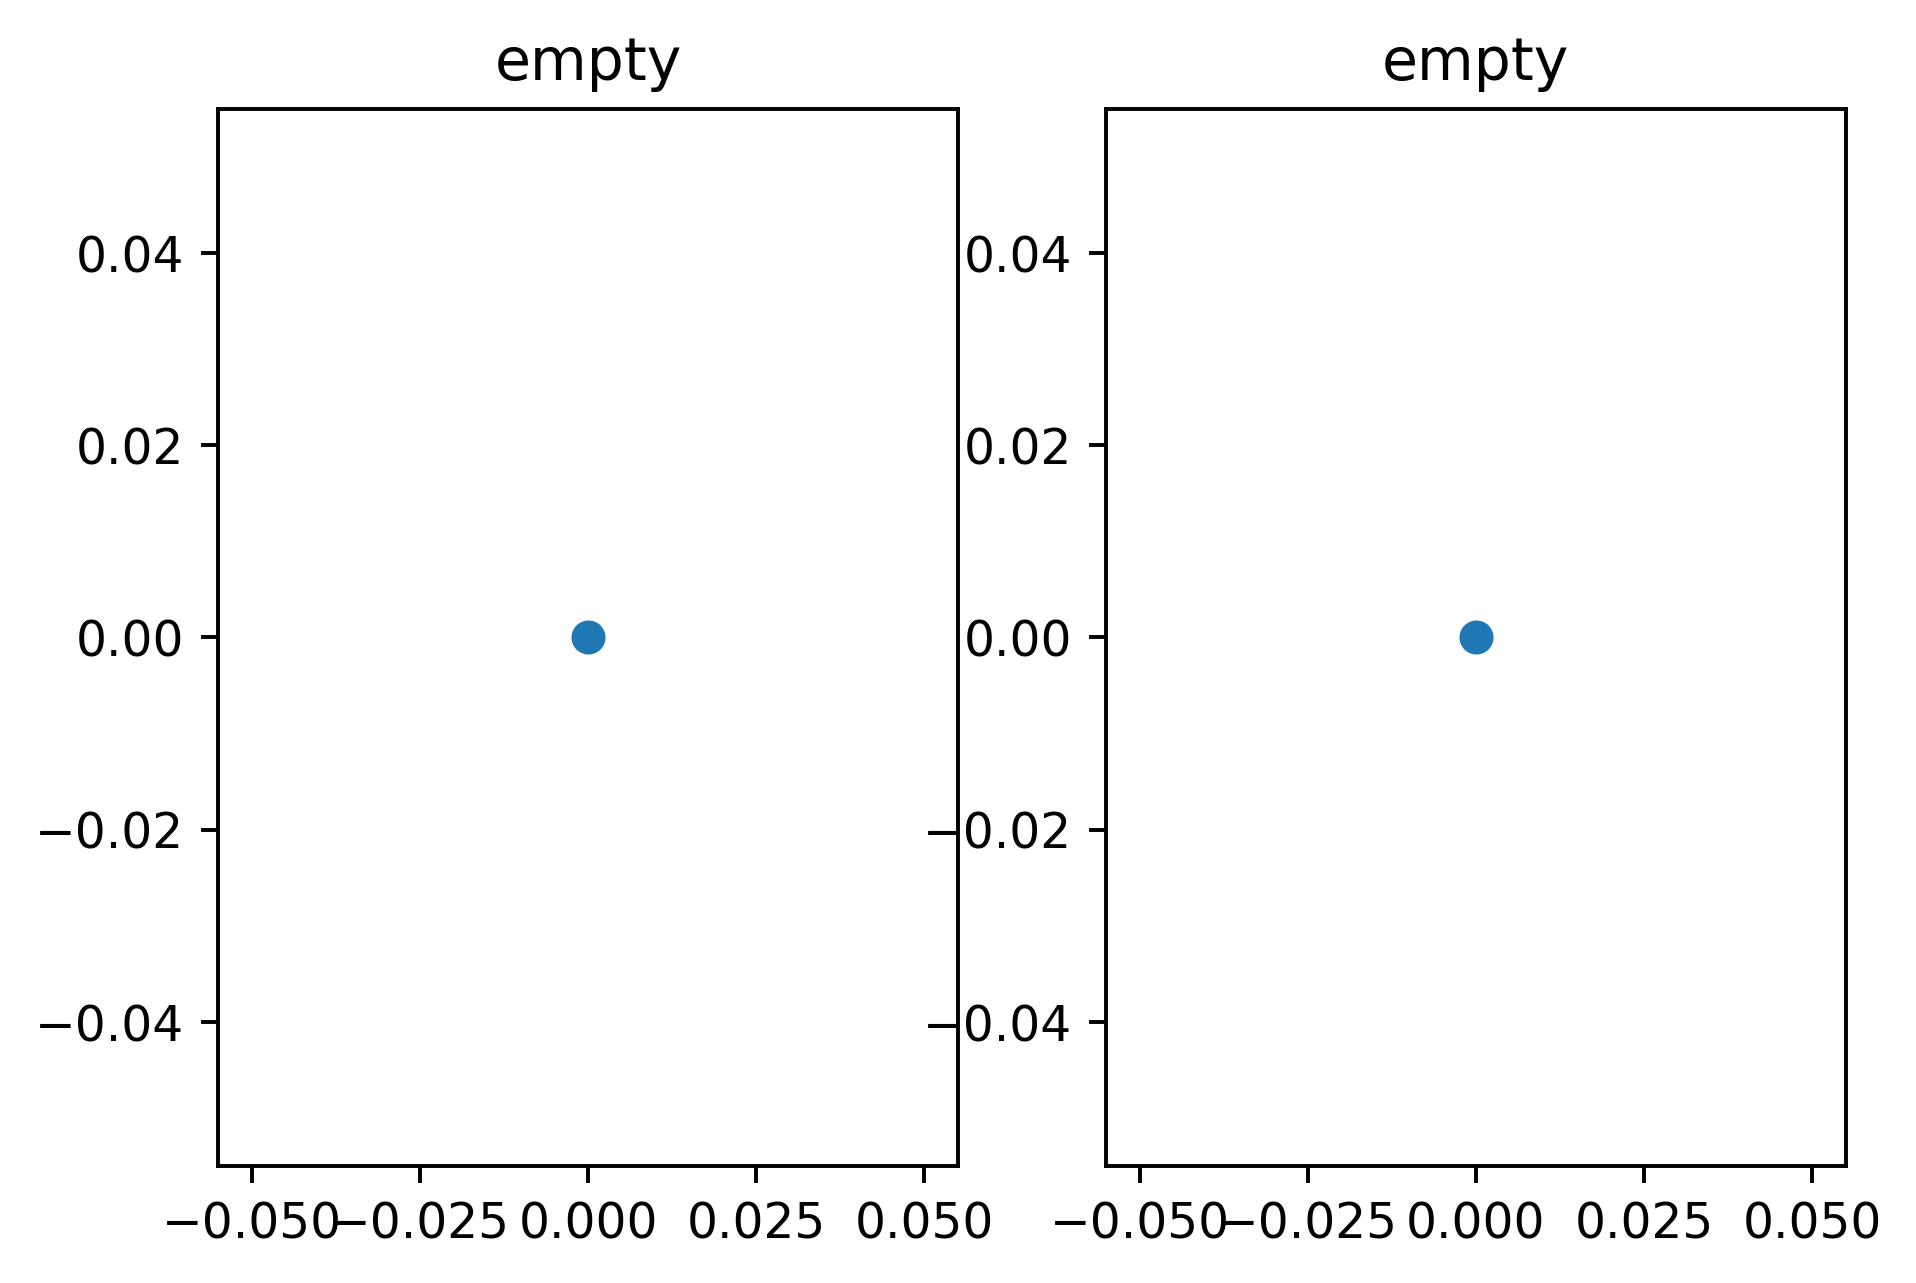

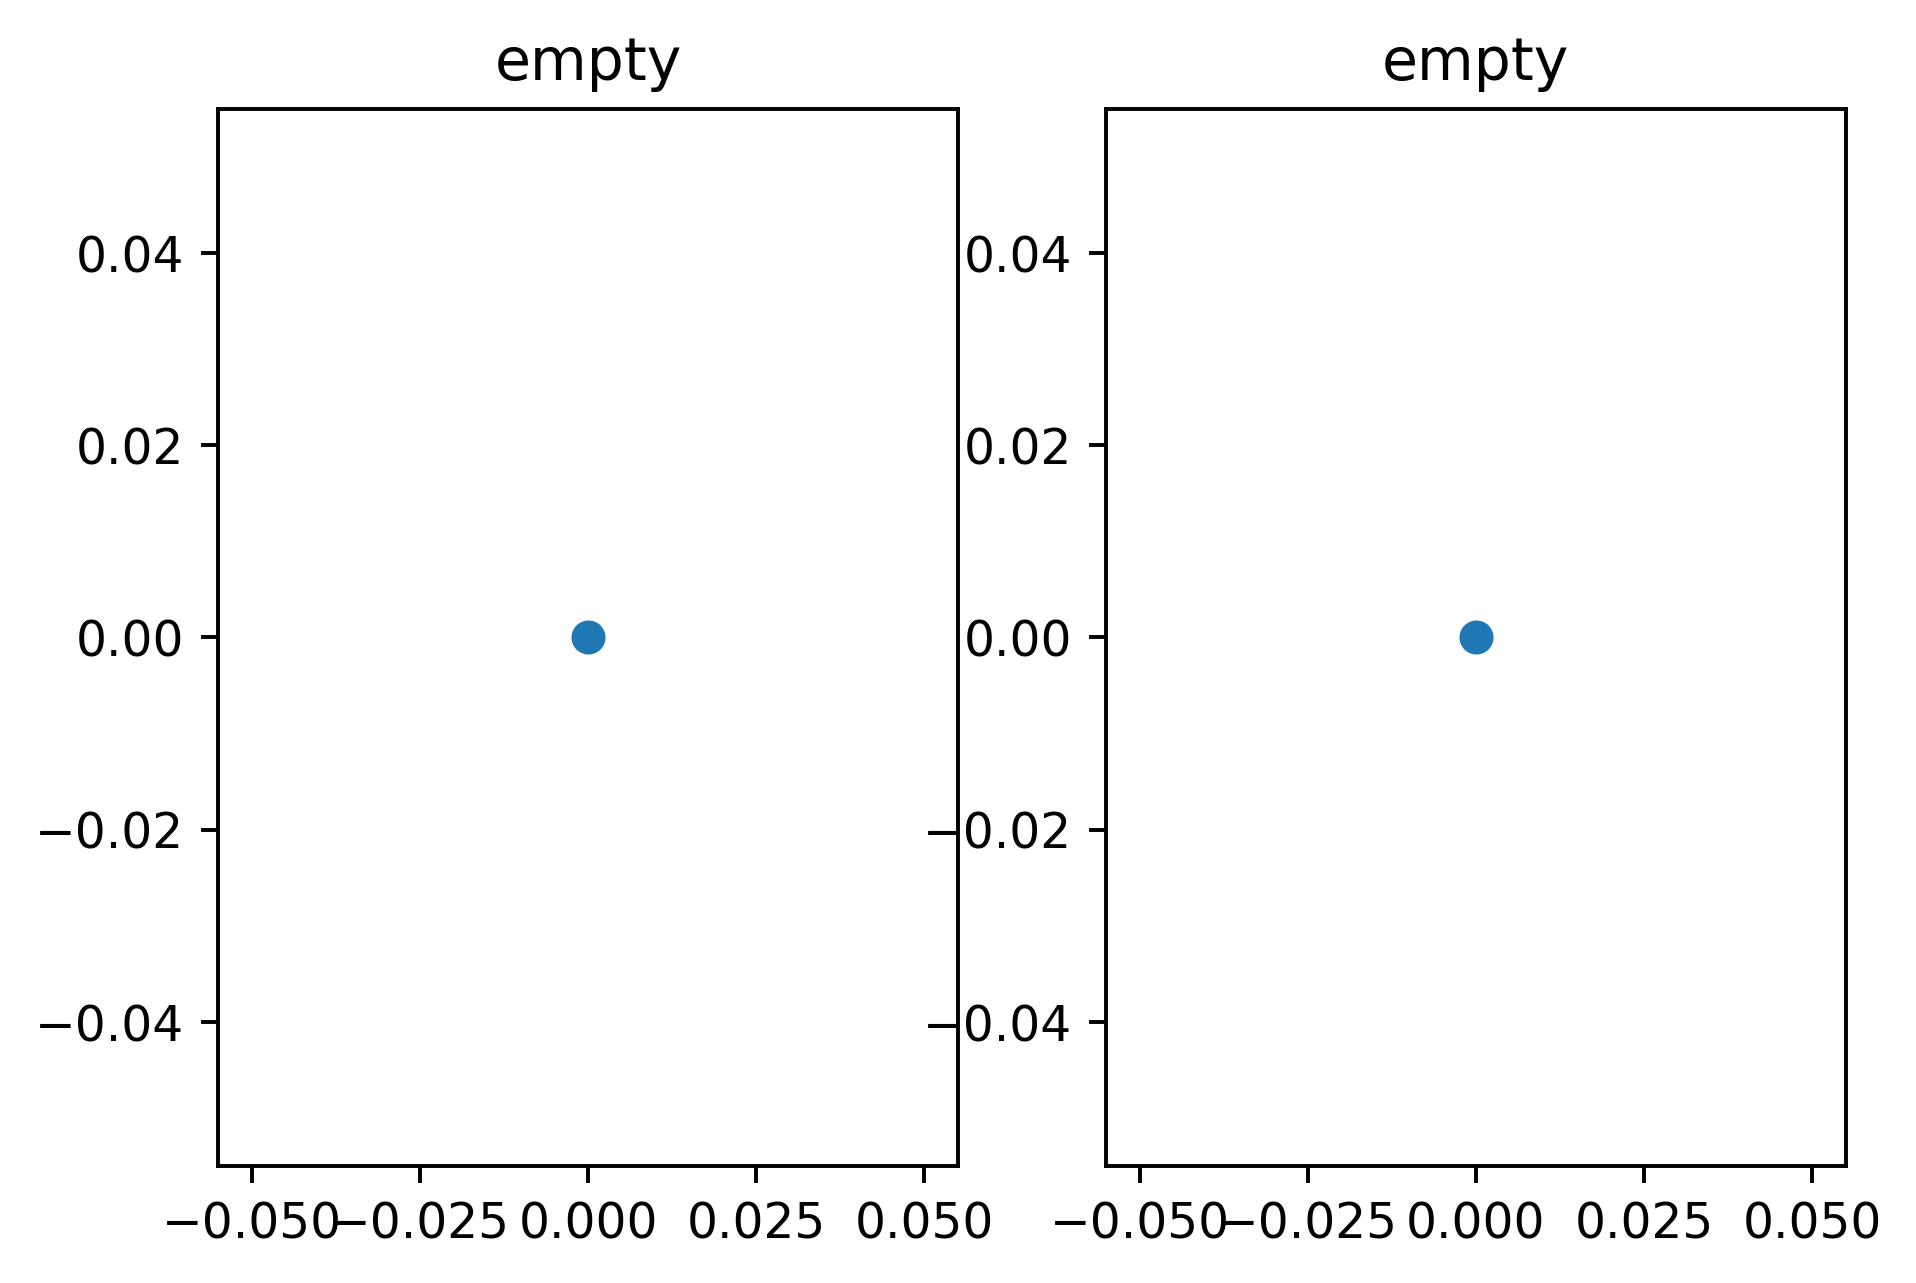

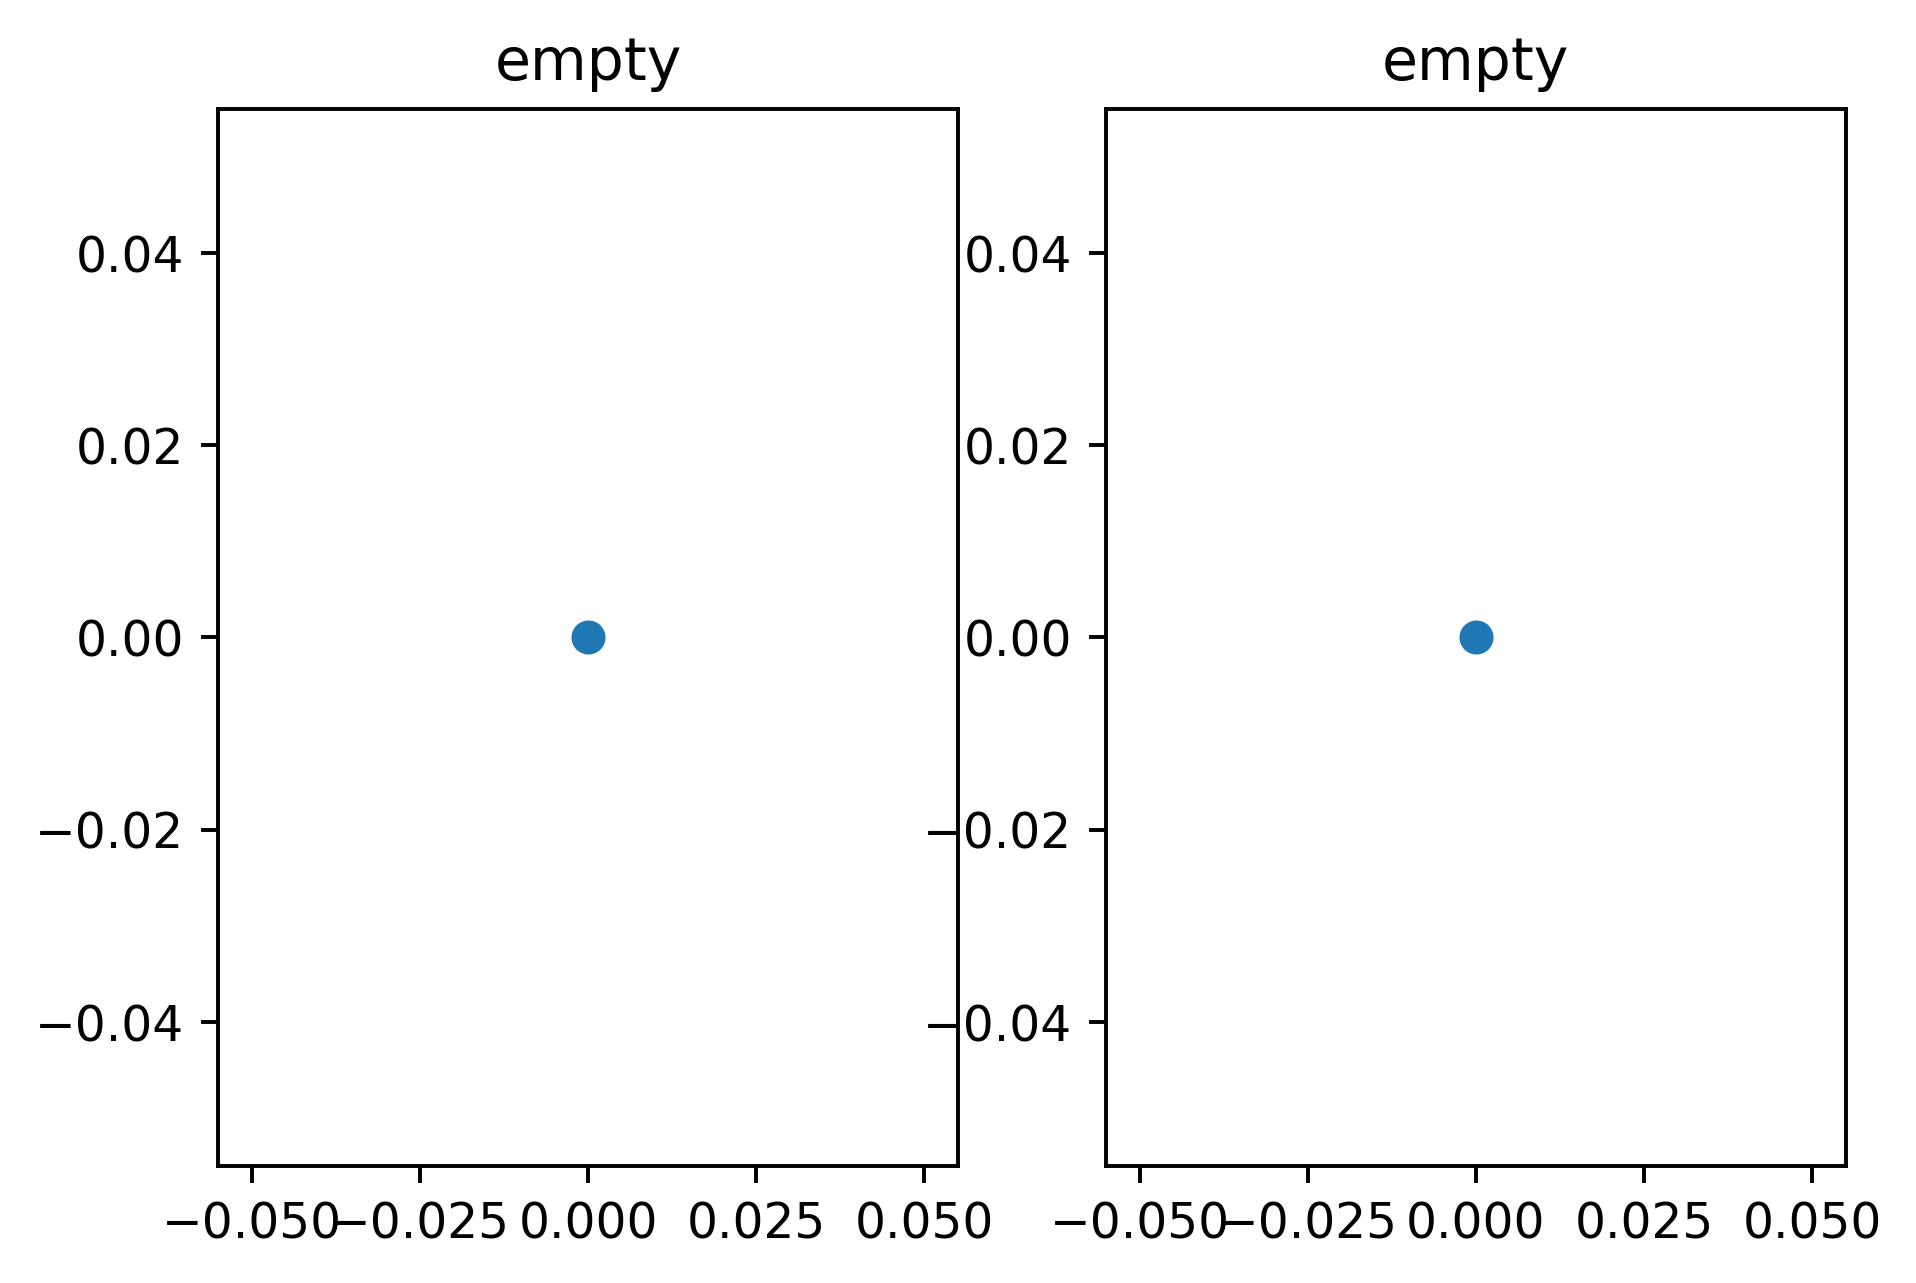

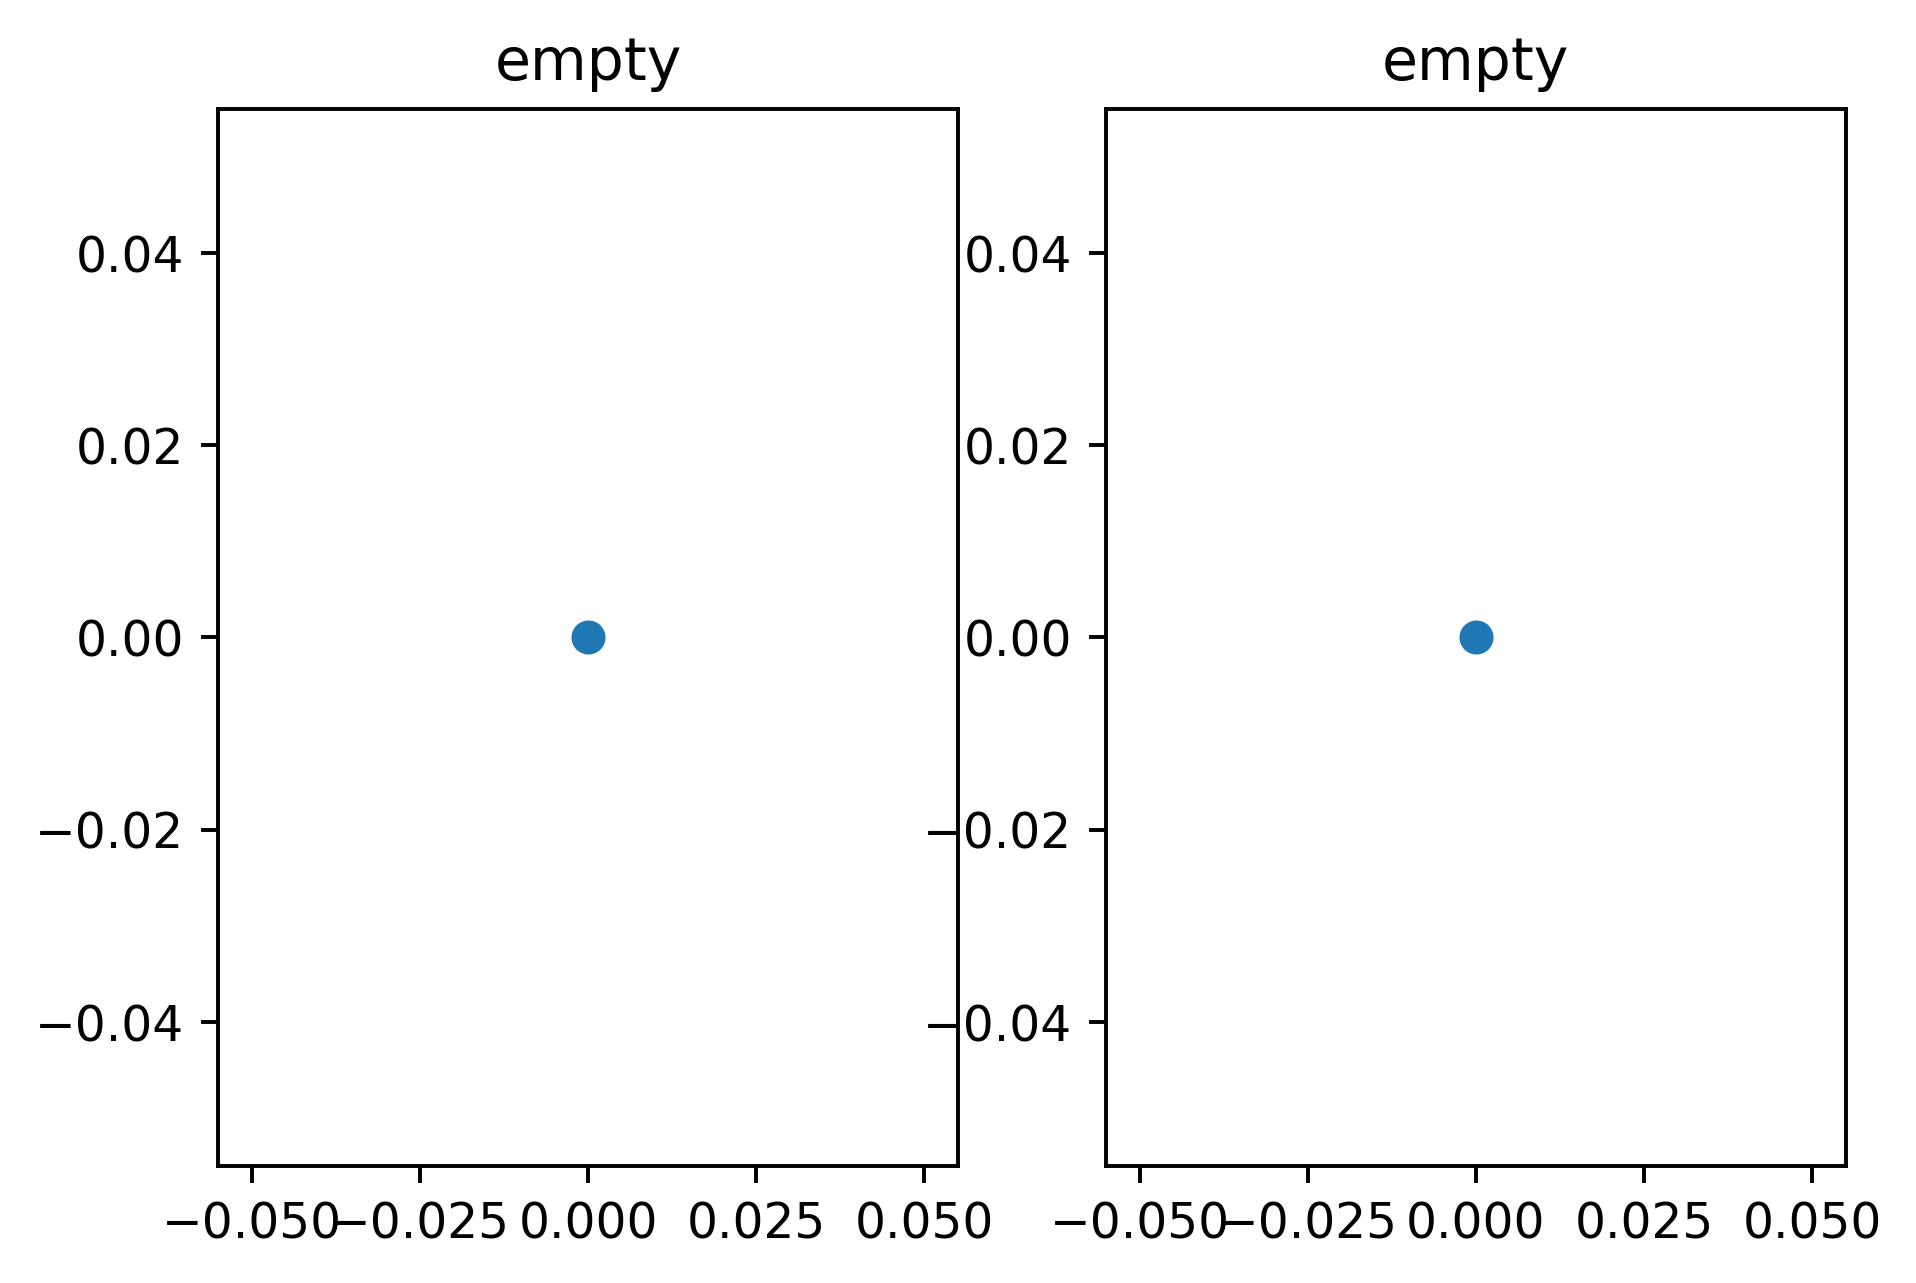

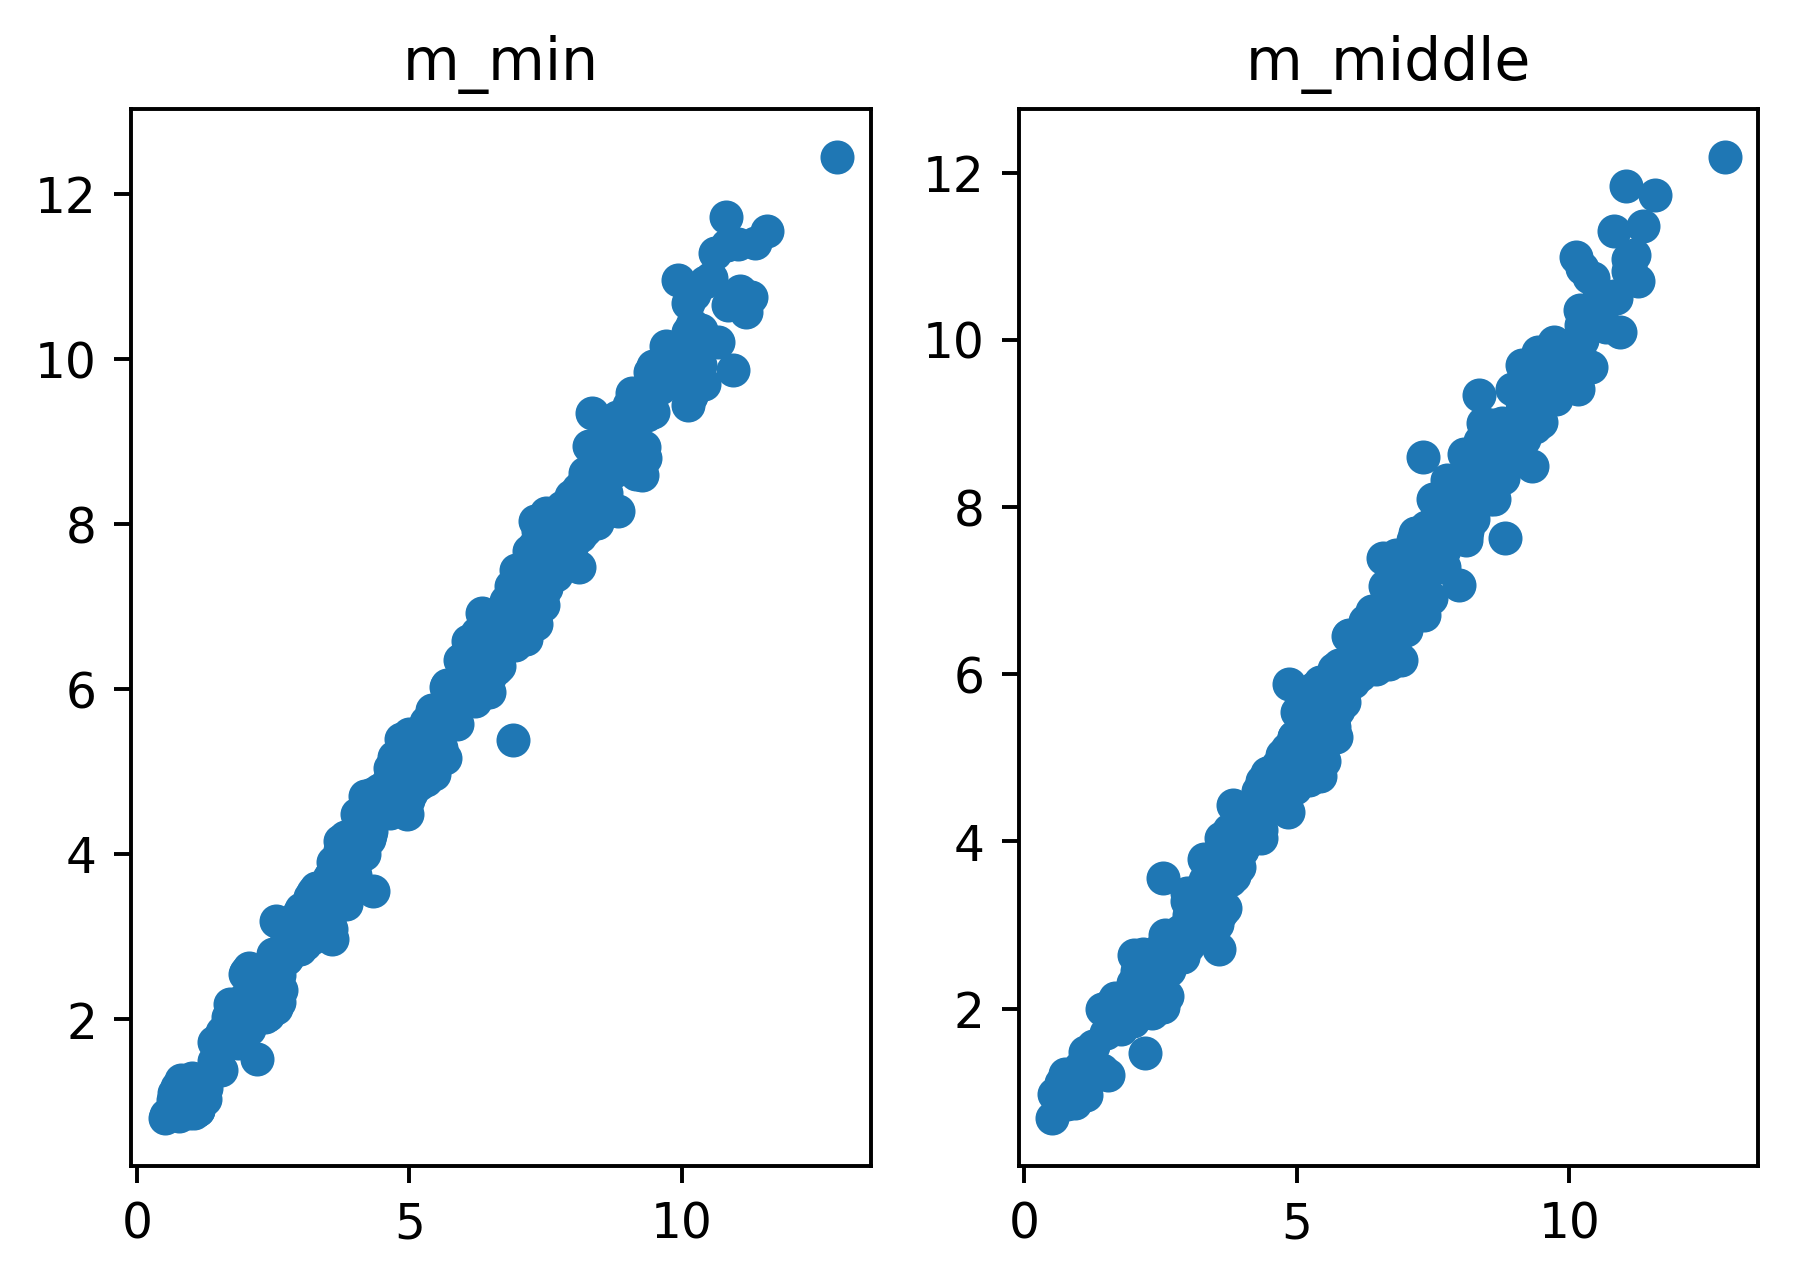

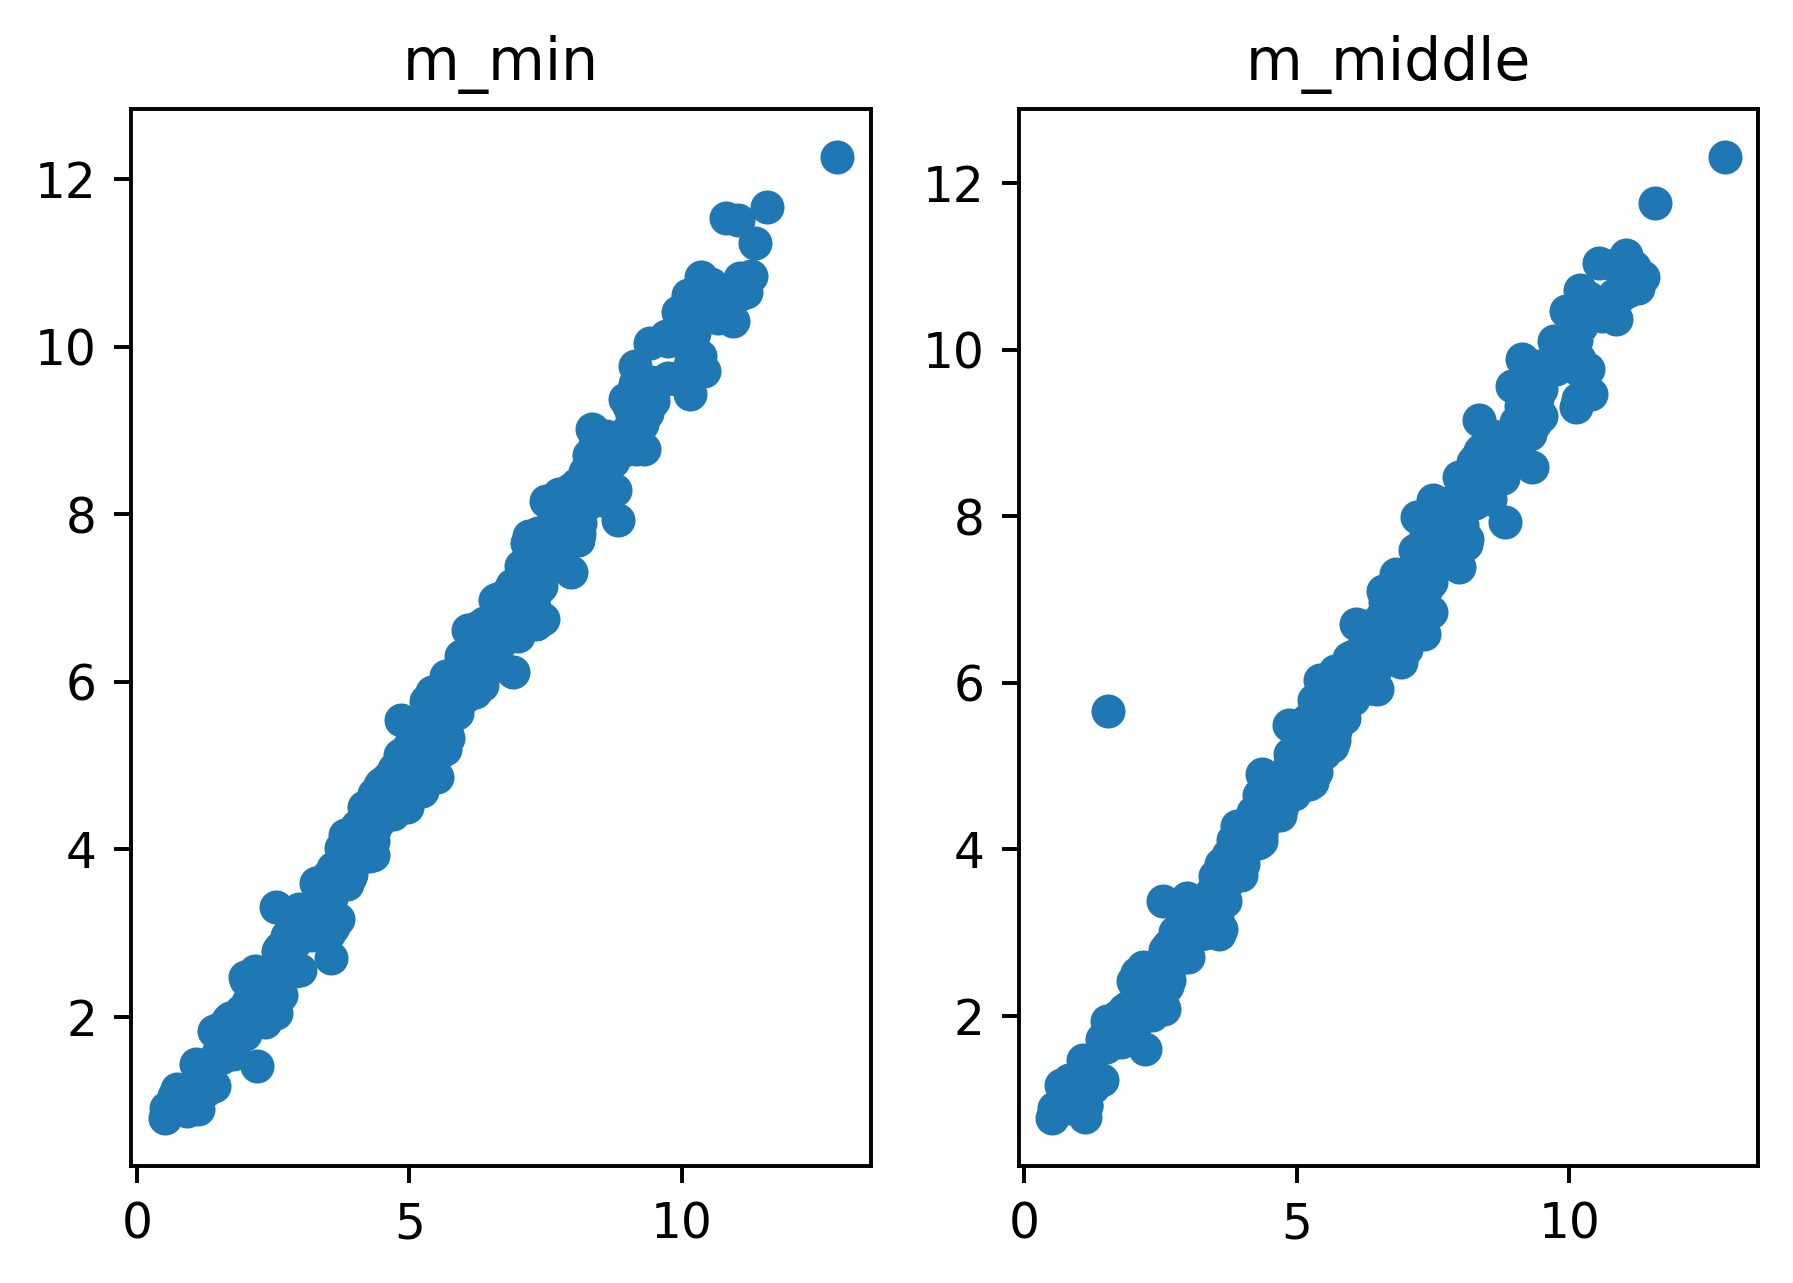

In [41]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_max, b5_min)
axs[0].set_title('m_min')
axs[1].scatter(b4_max, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b4_max, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b4_max, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

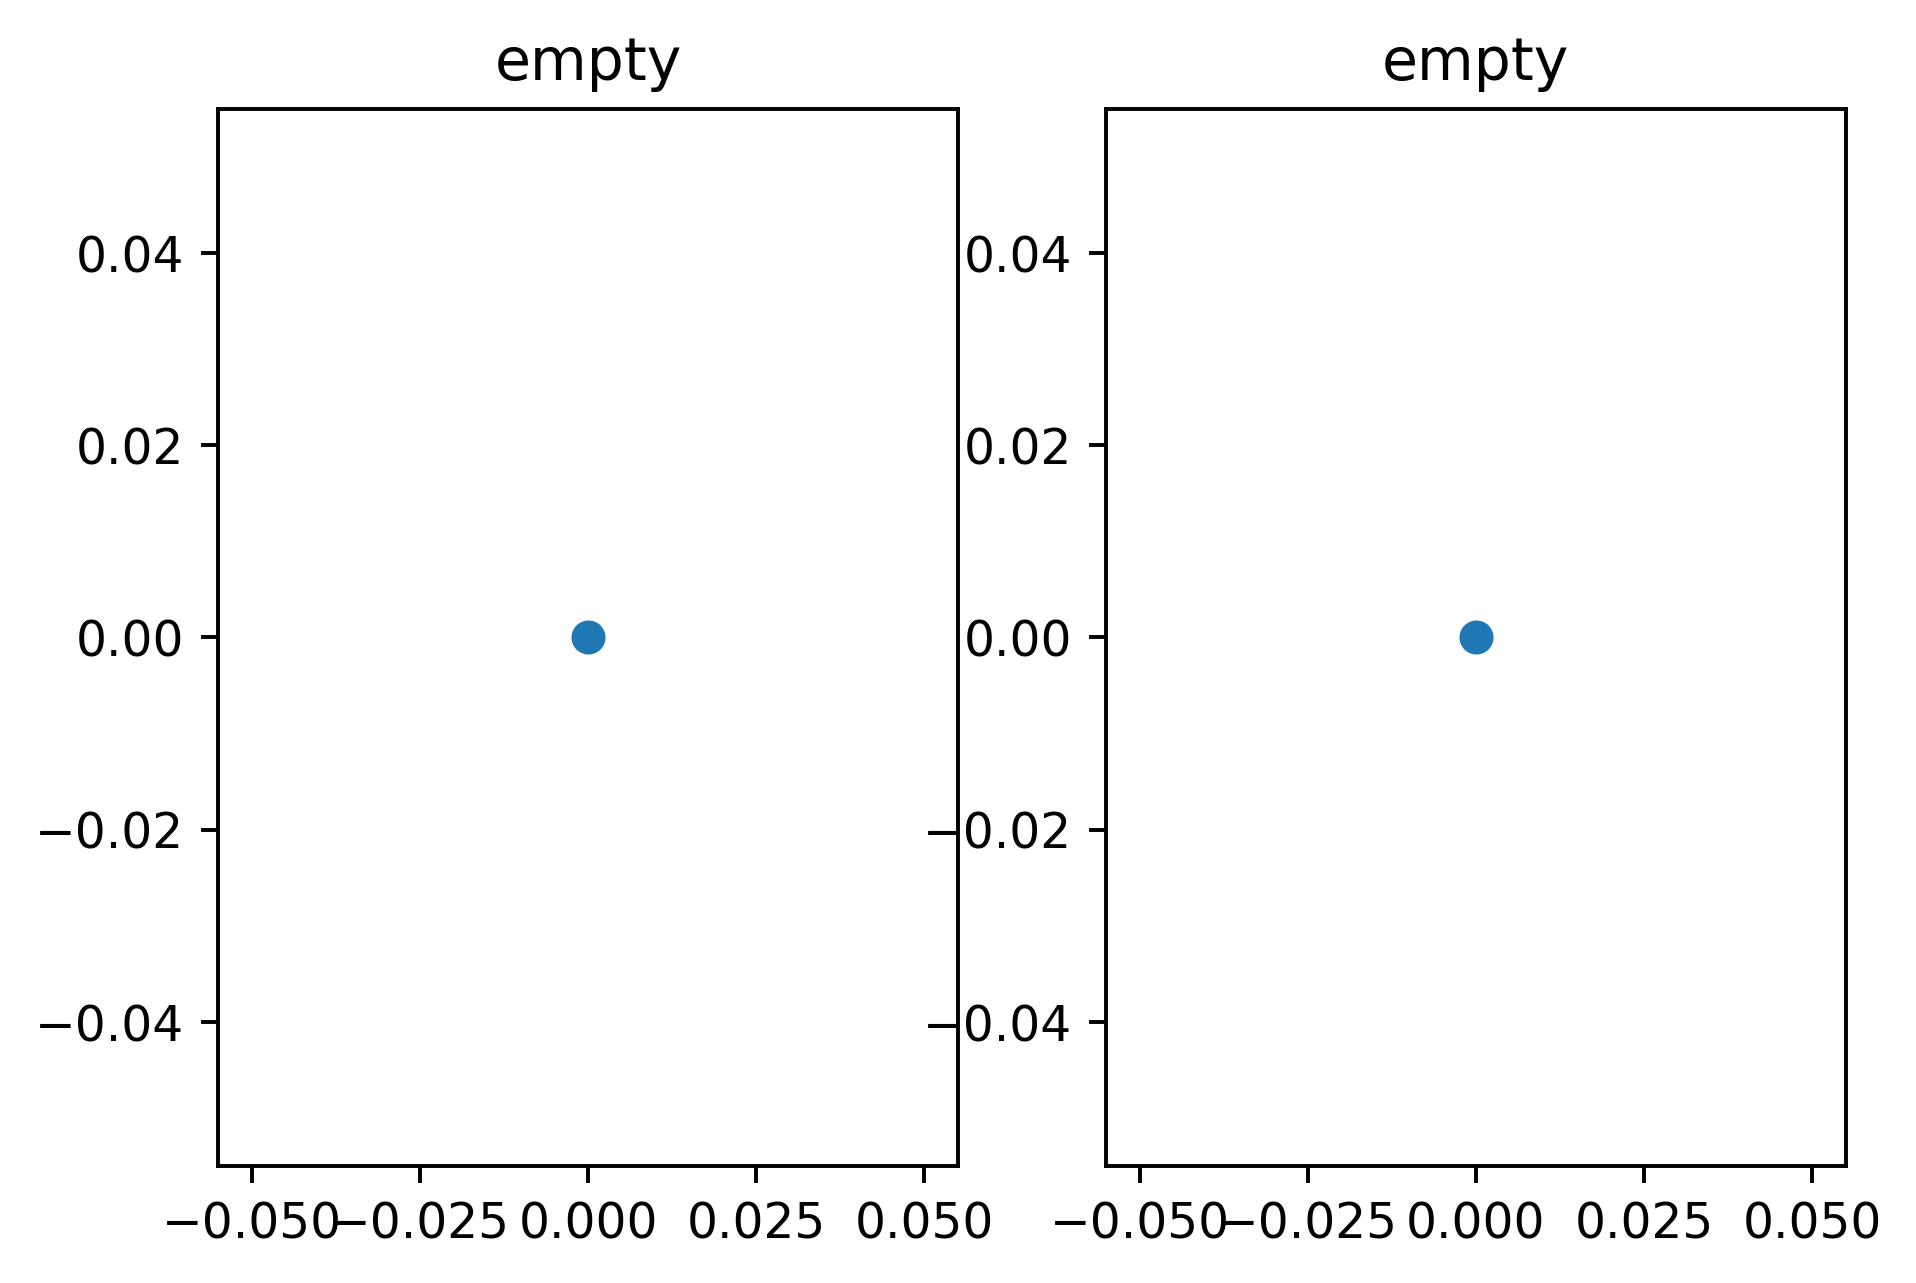

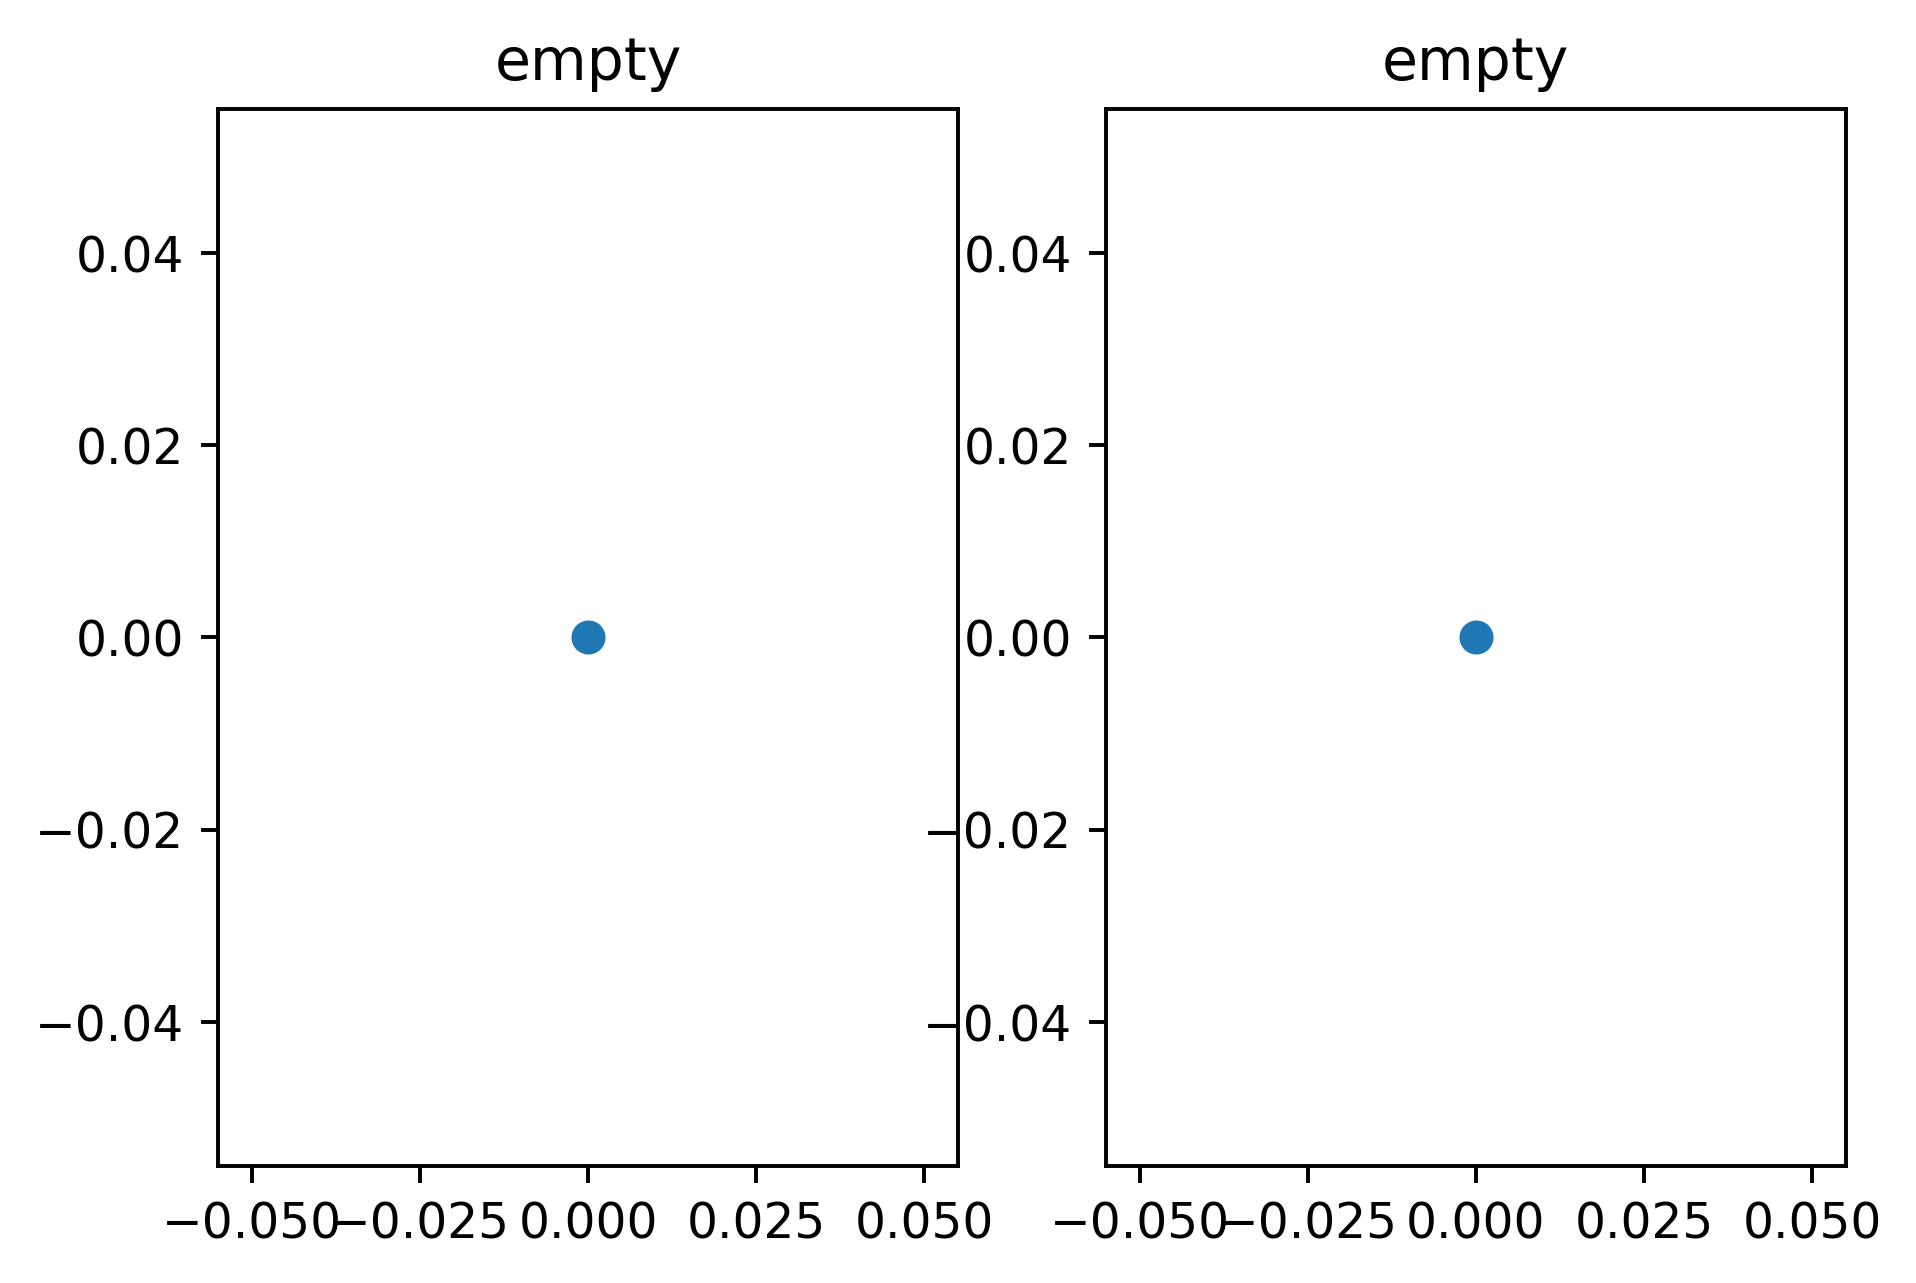

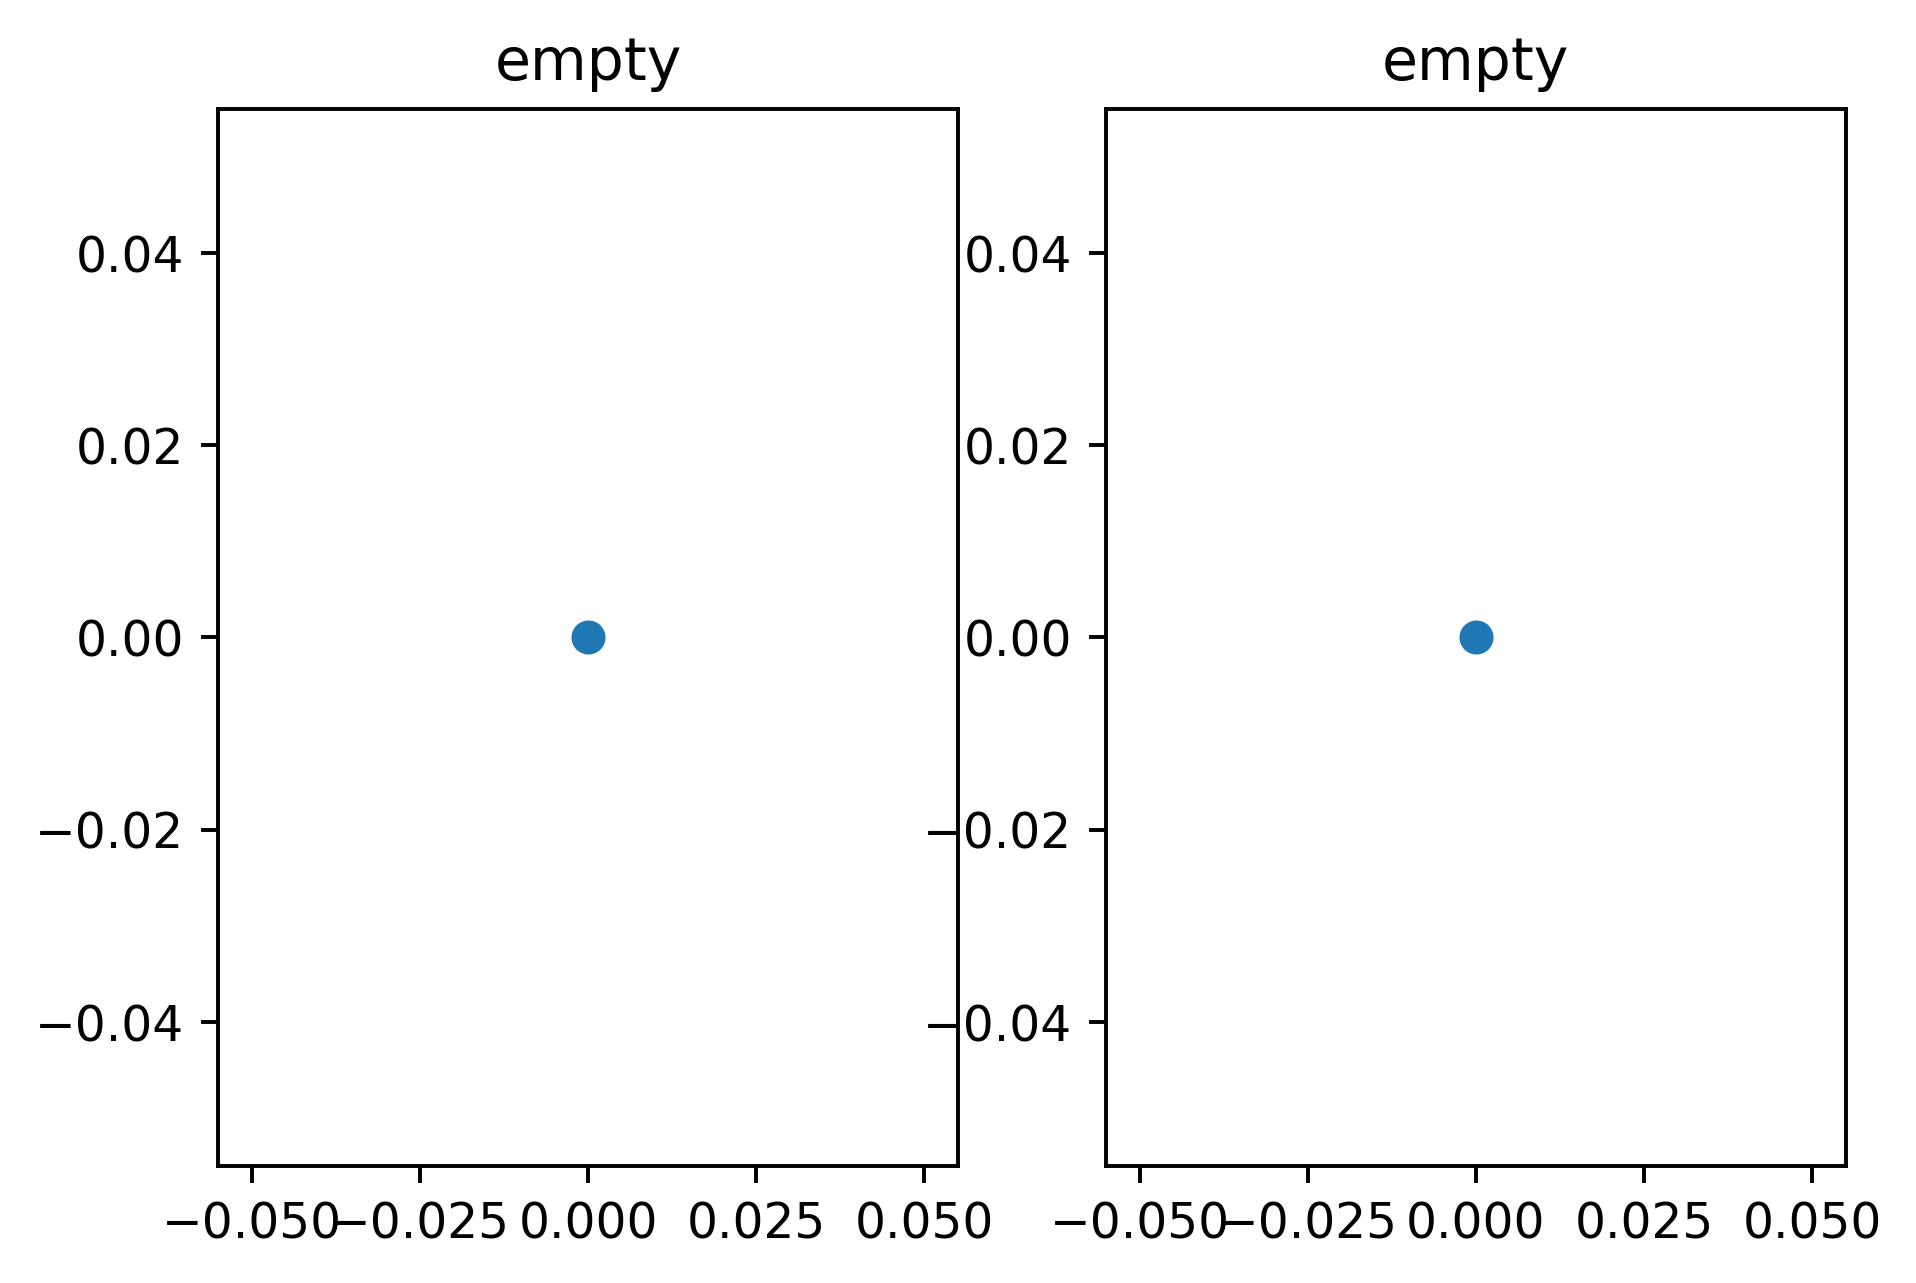

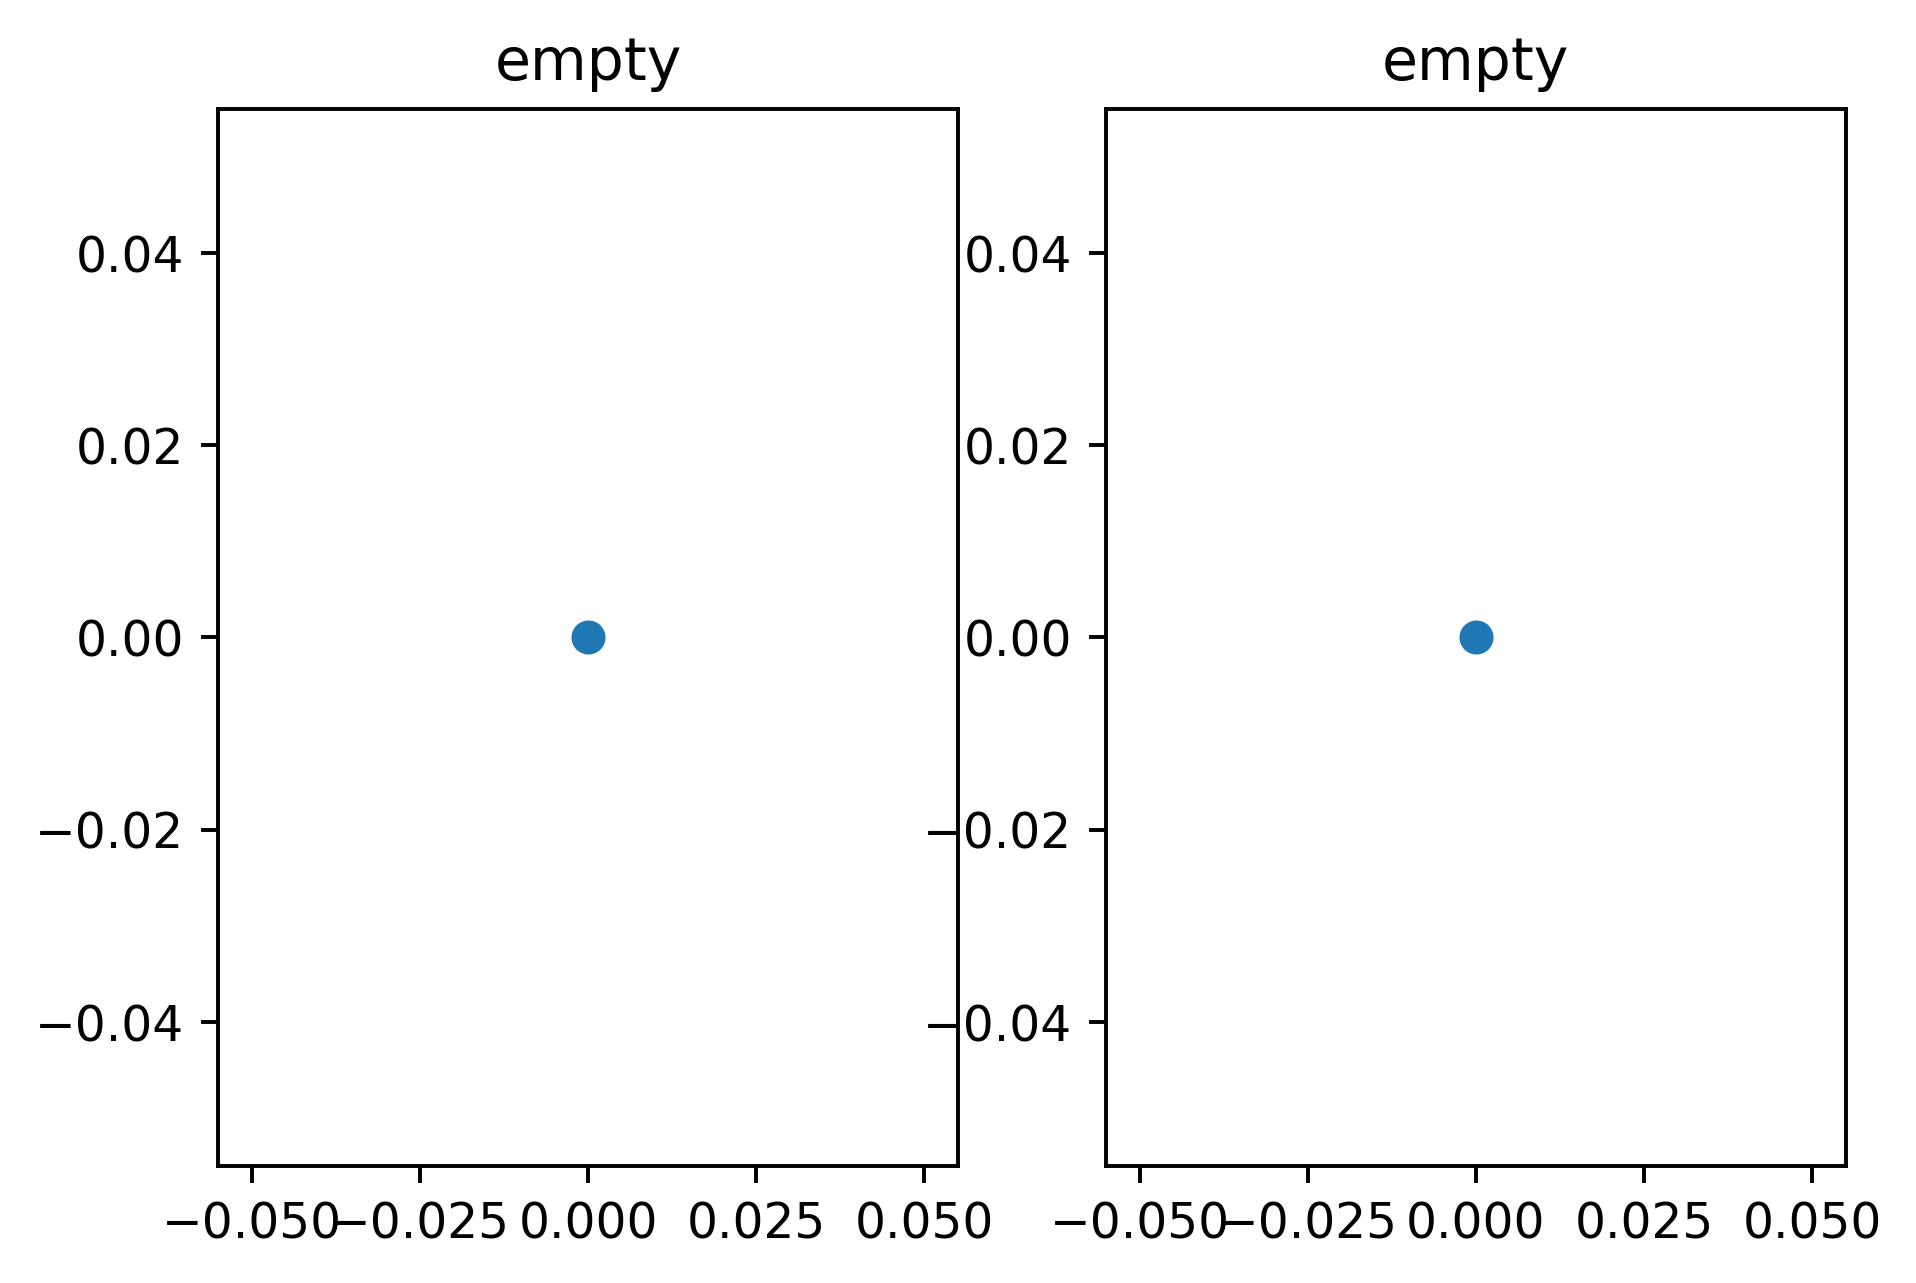

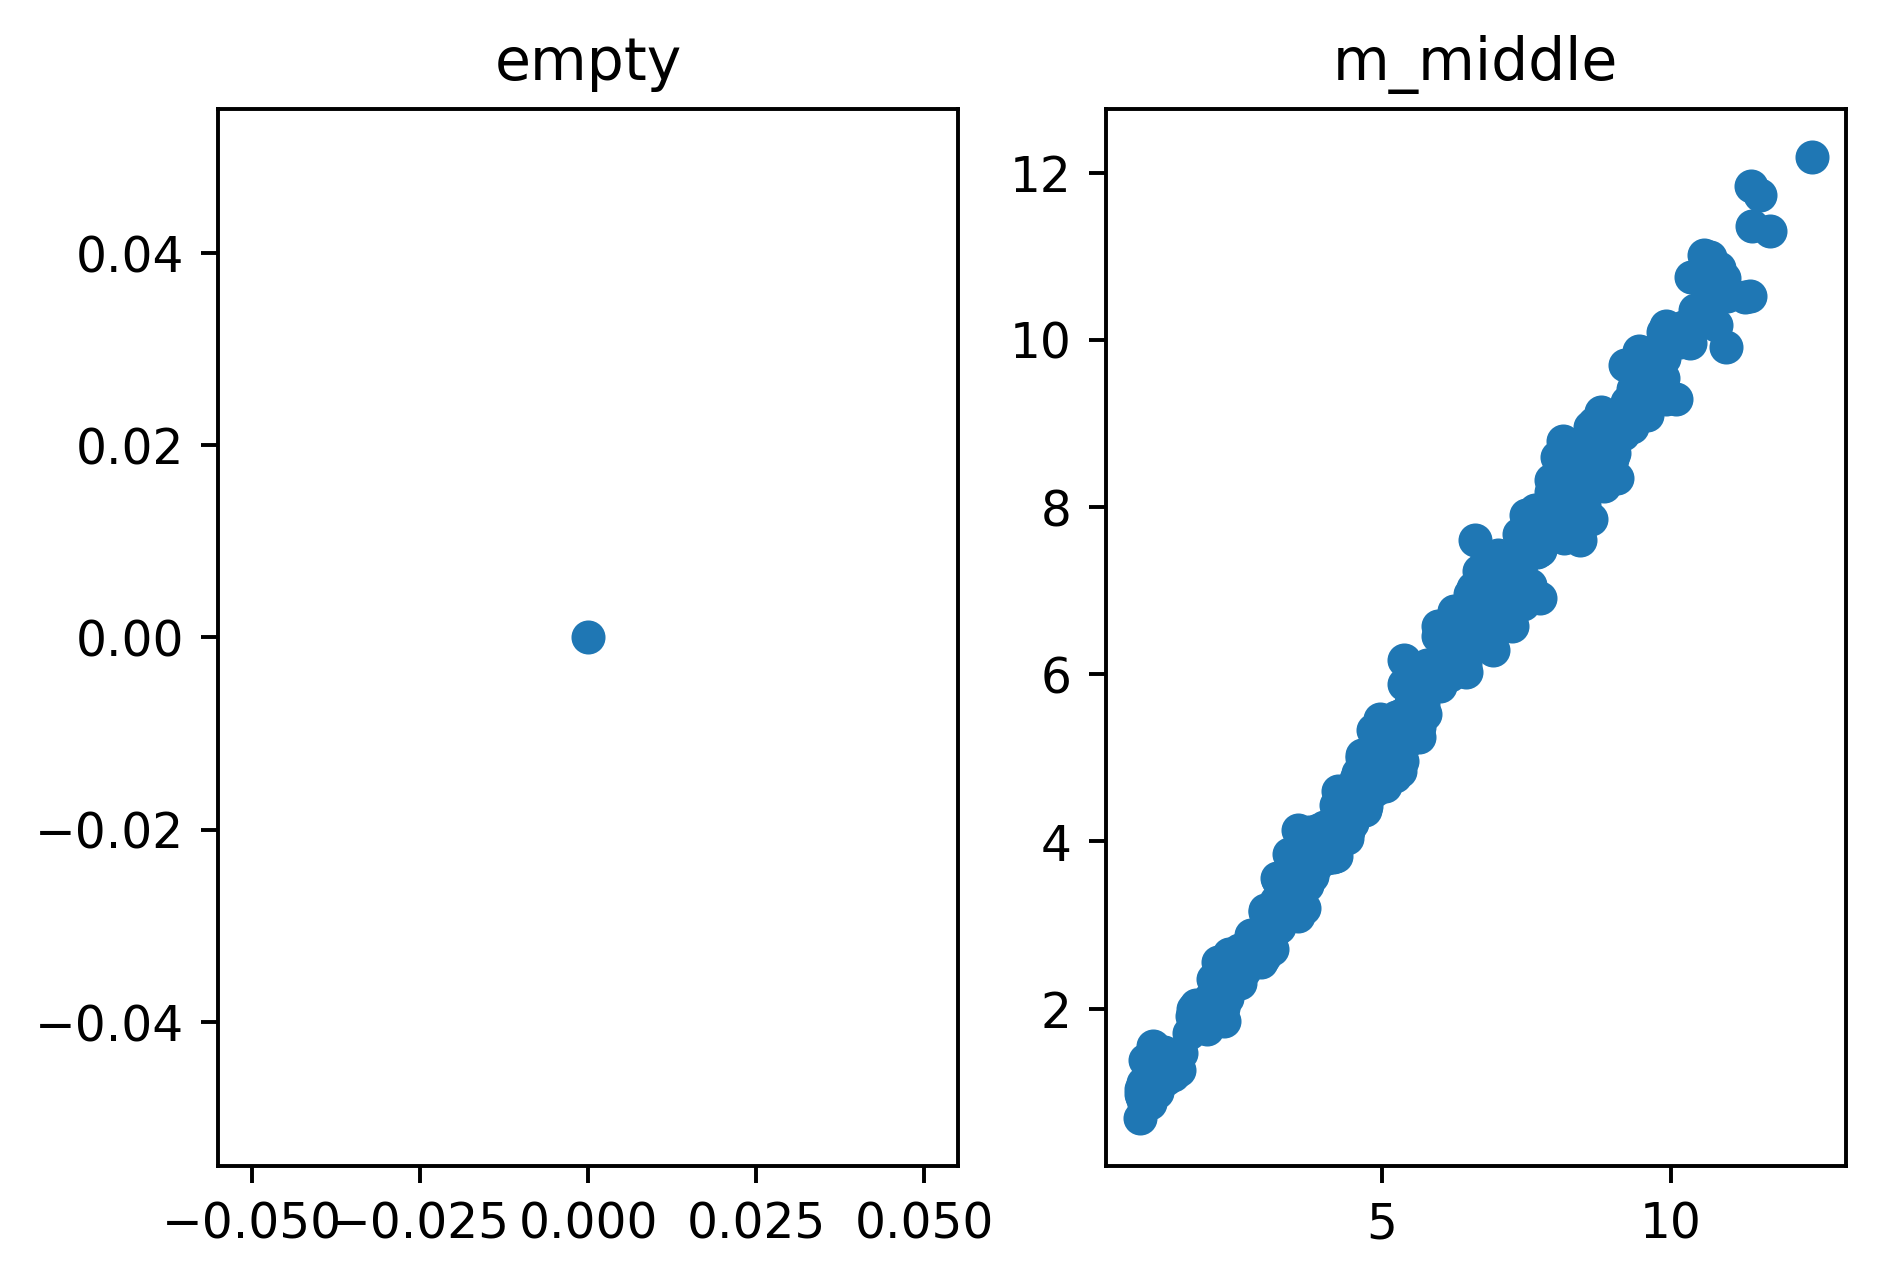

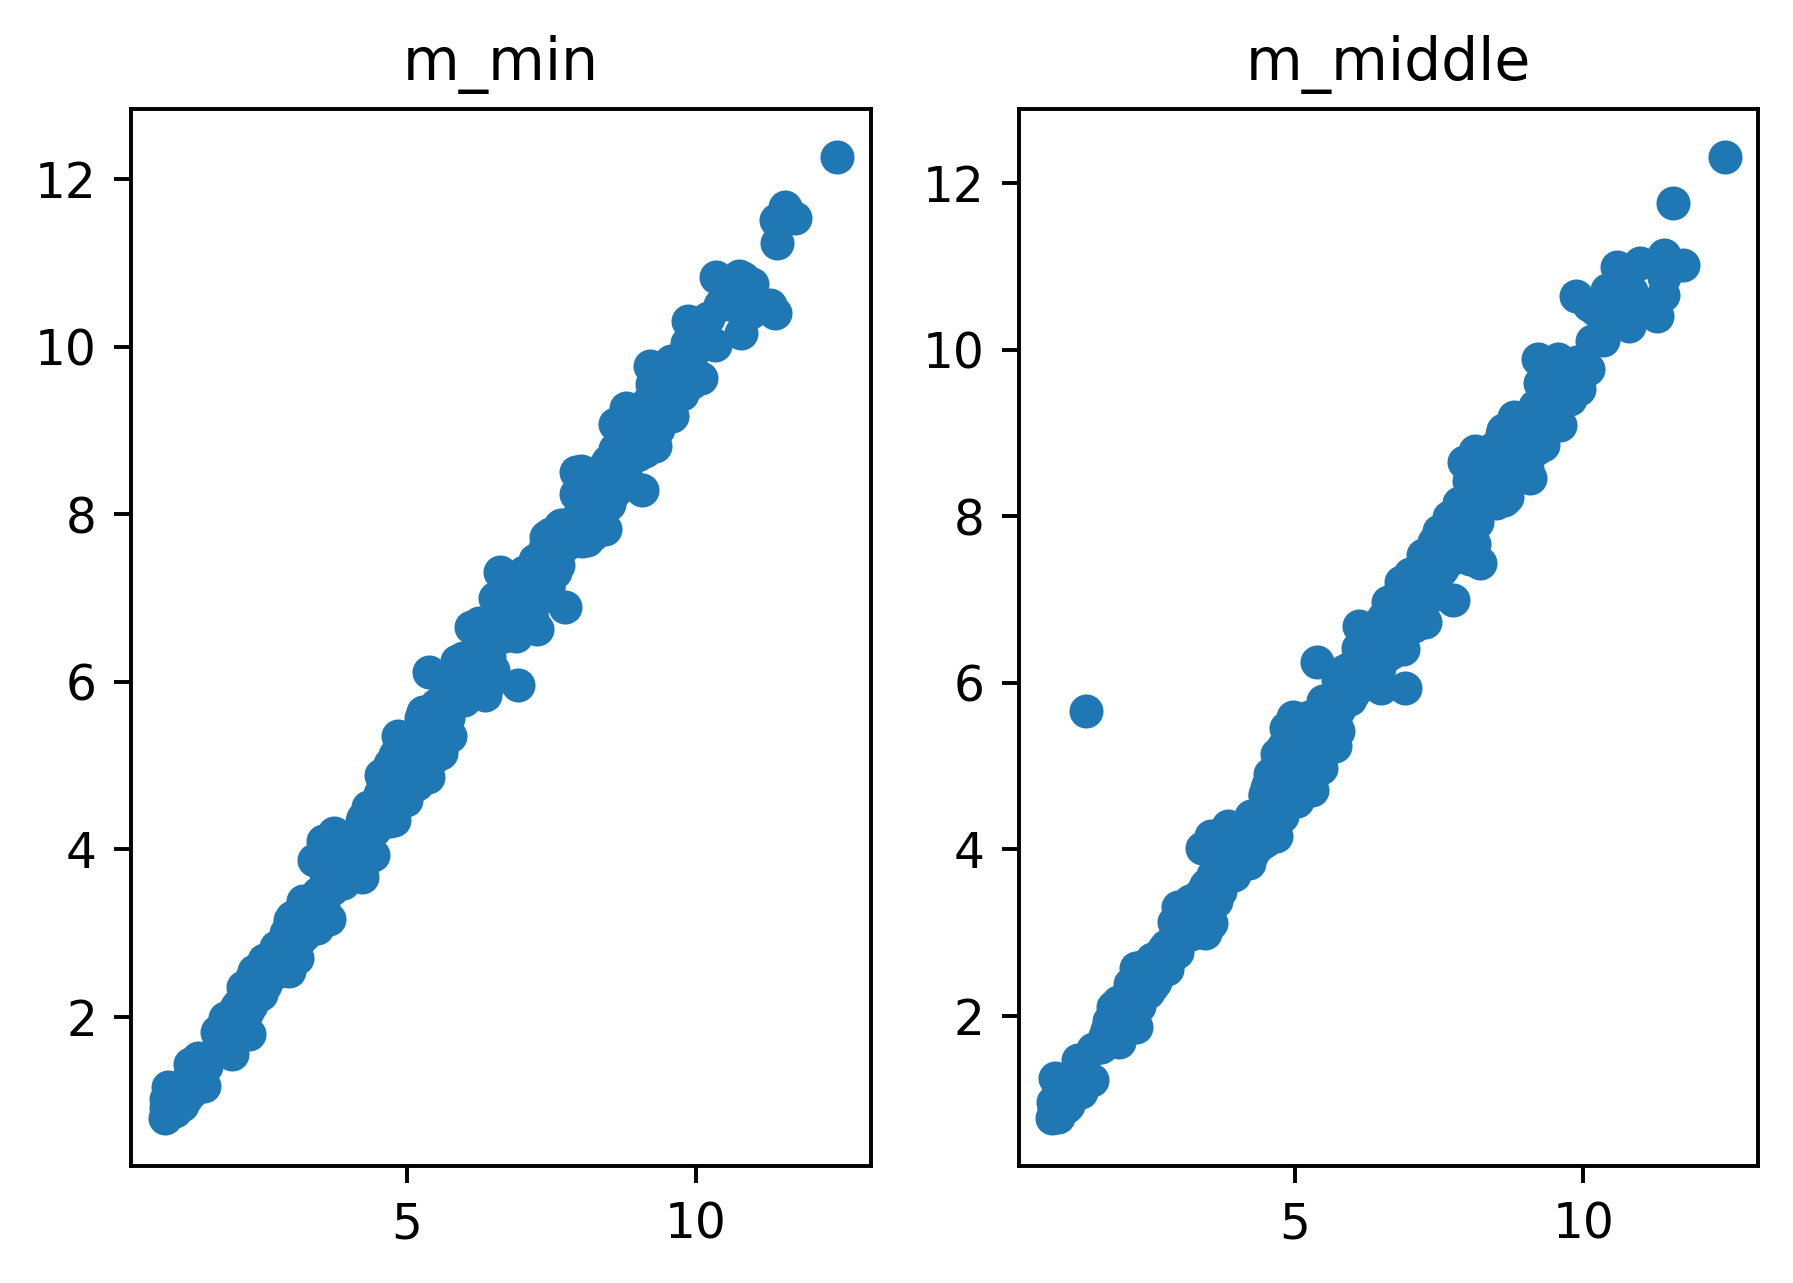

In [40]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(b5_min, b6_min)
axs[1].set_title('m_middle')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b5_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b5_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

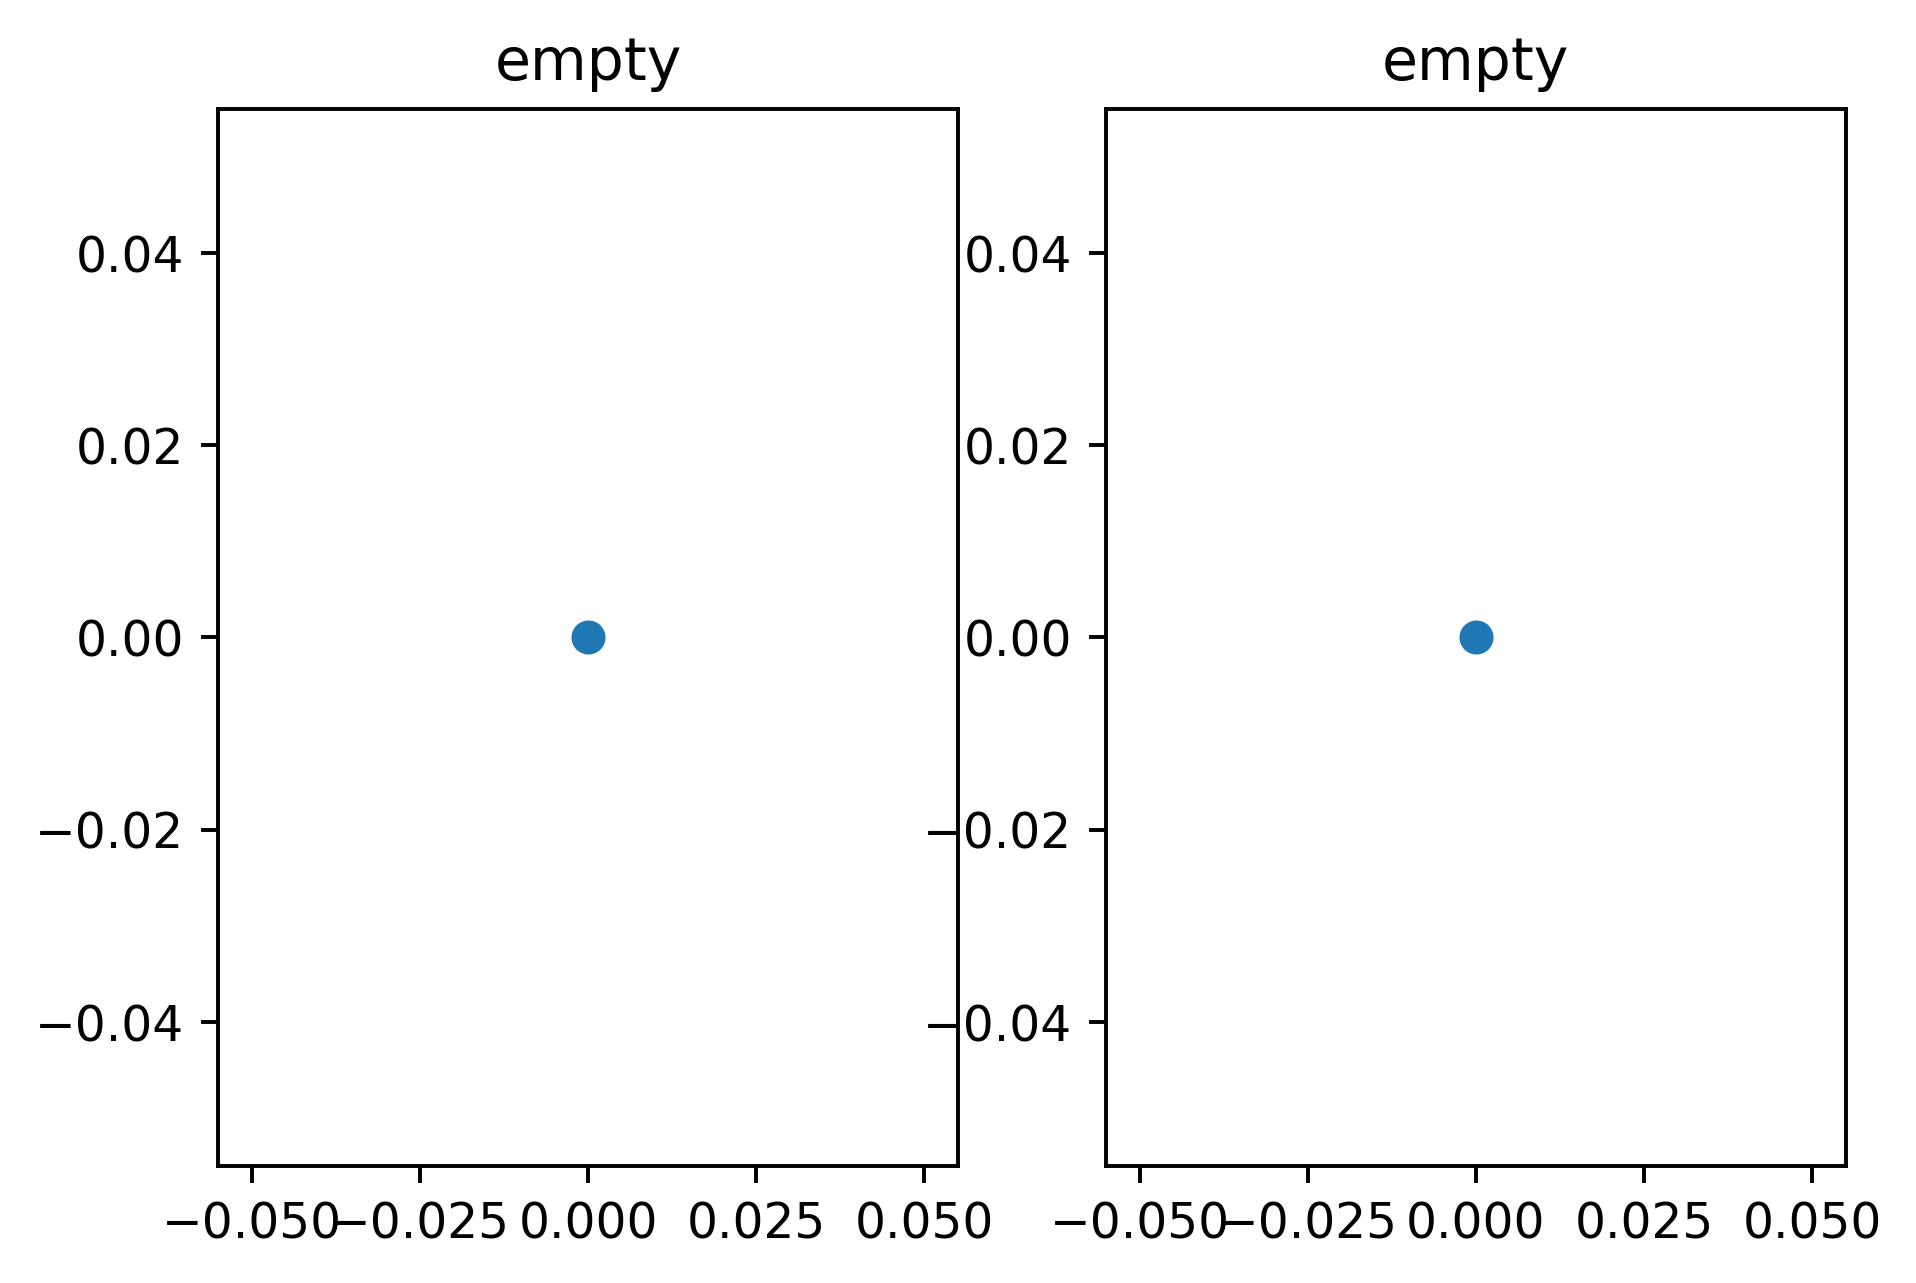

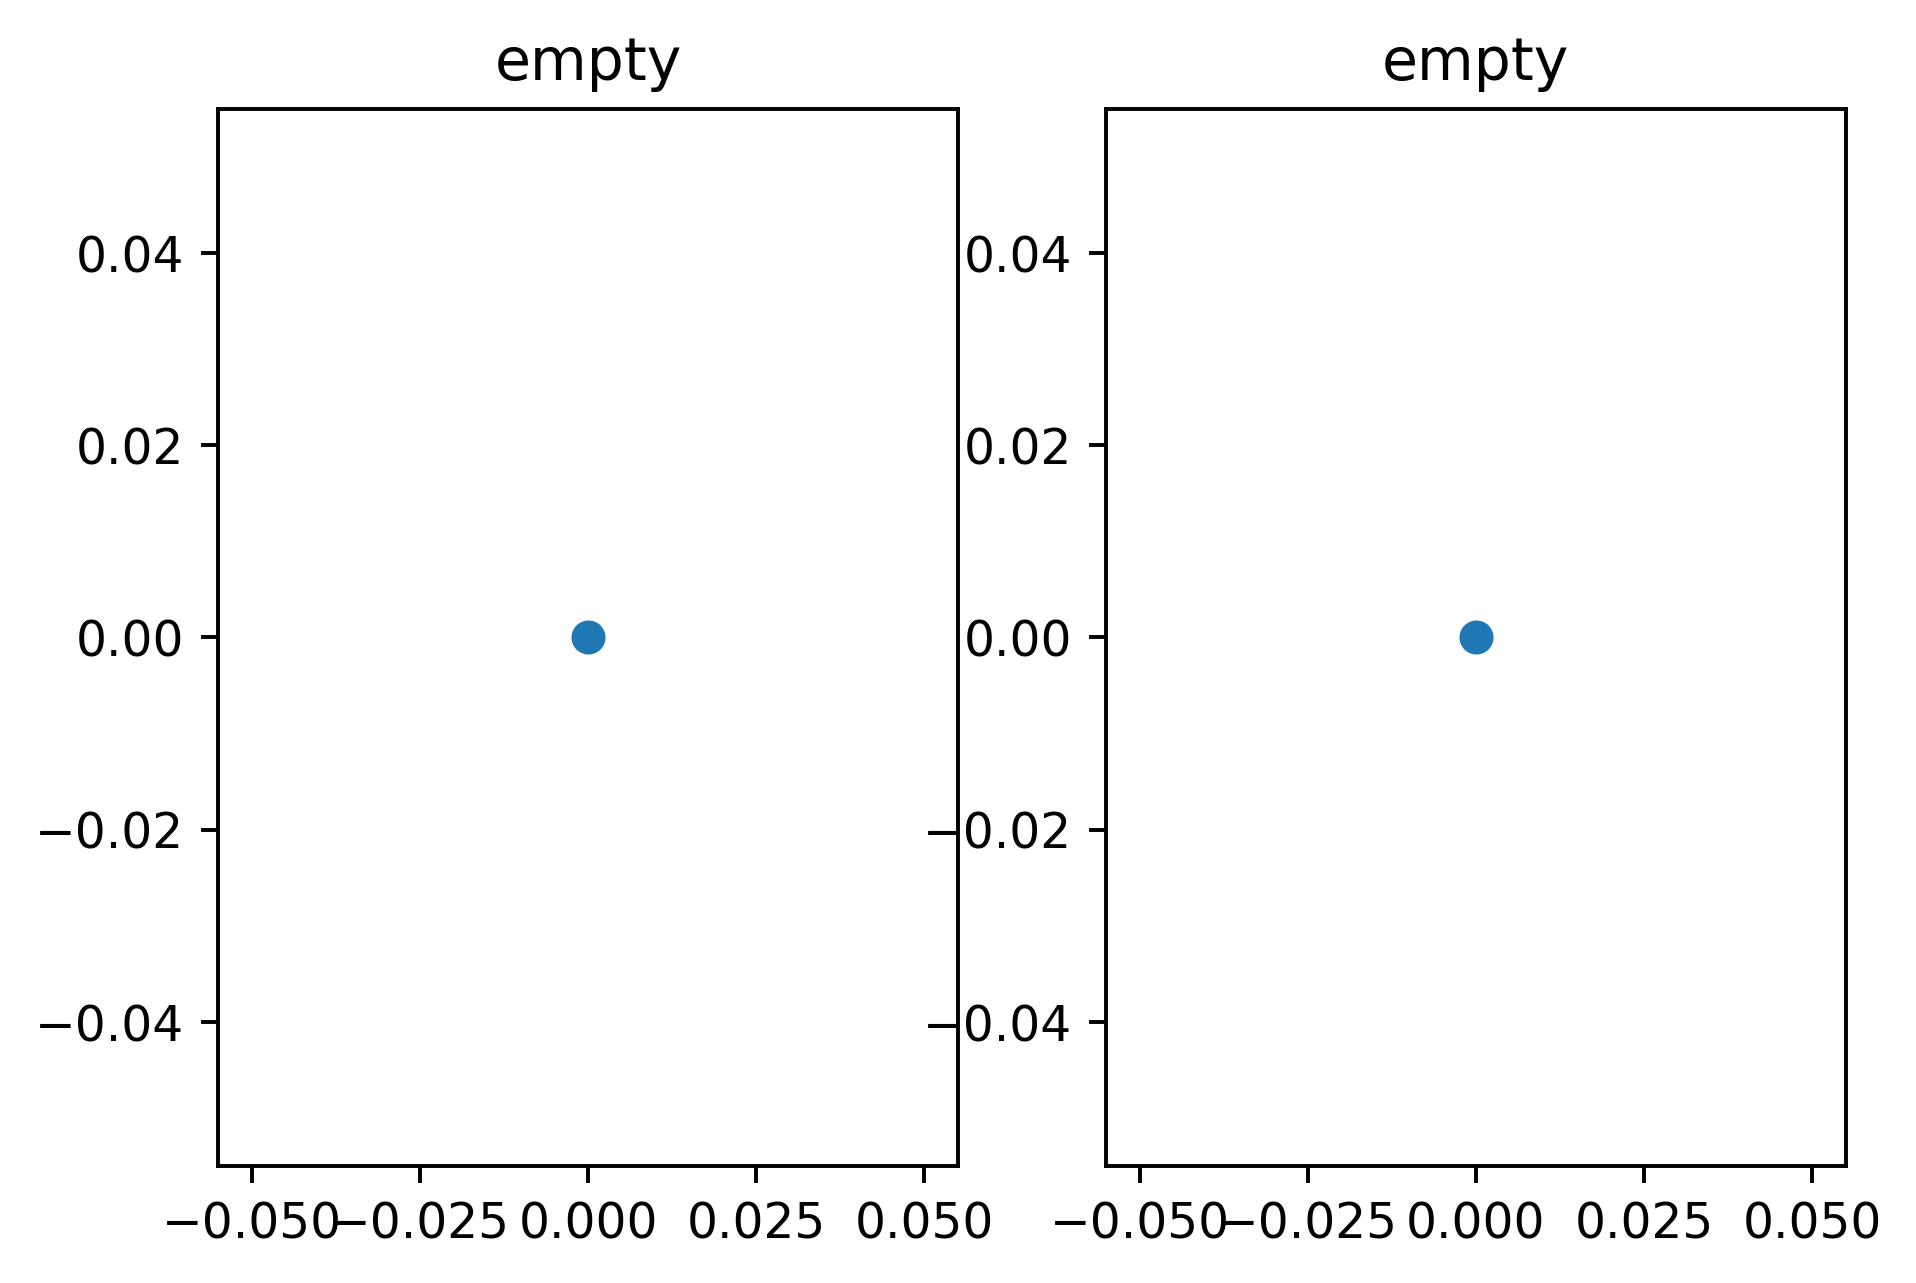

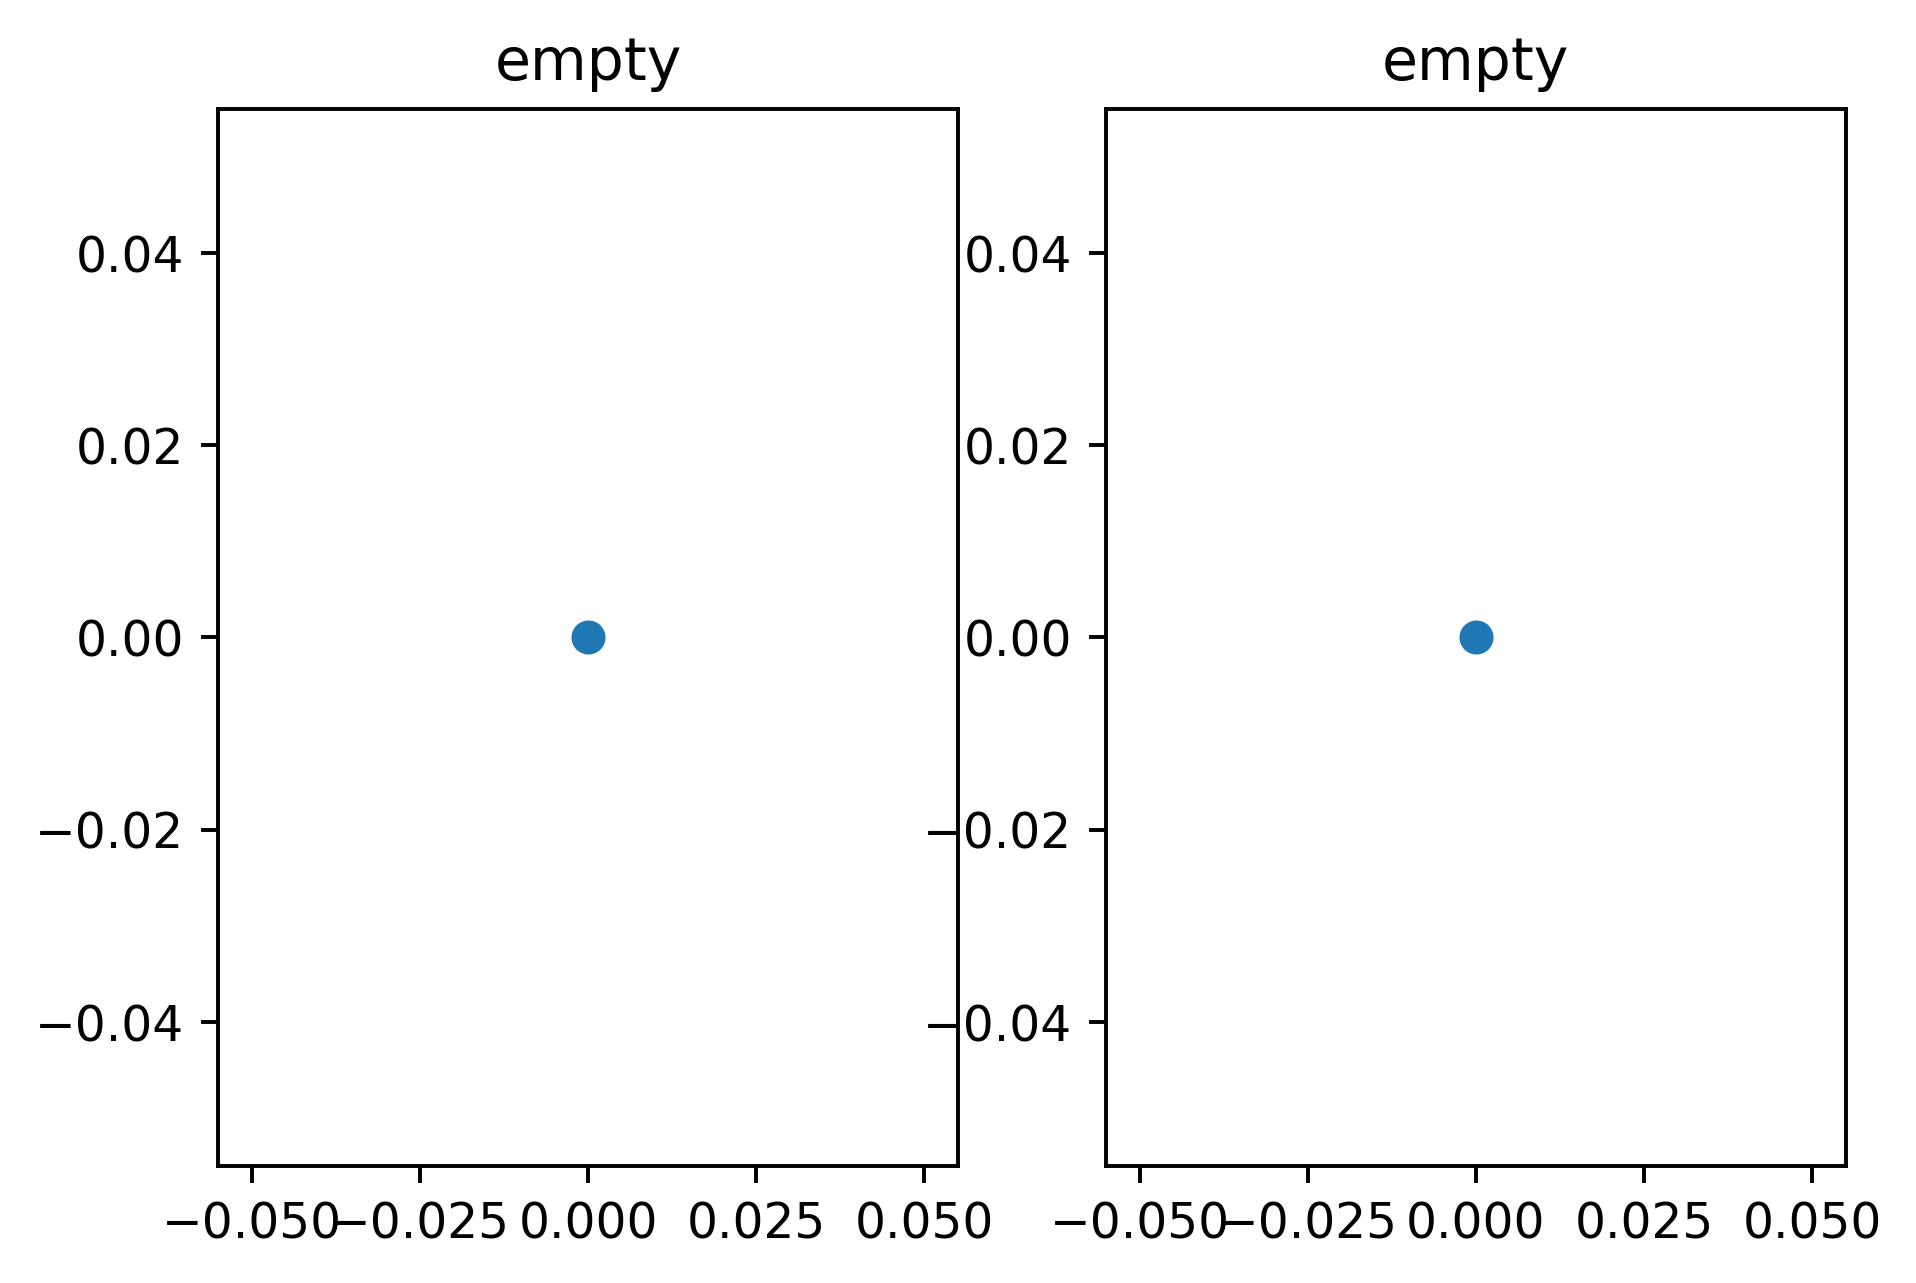

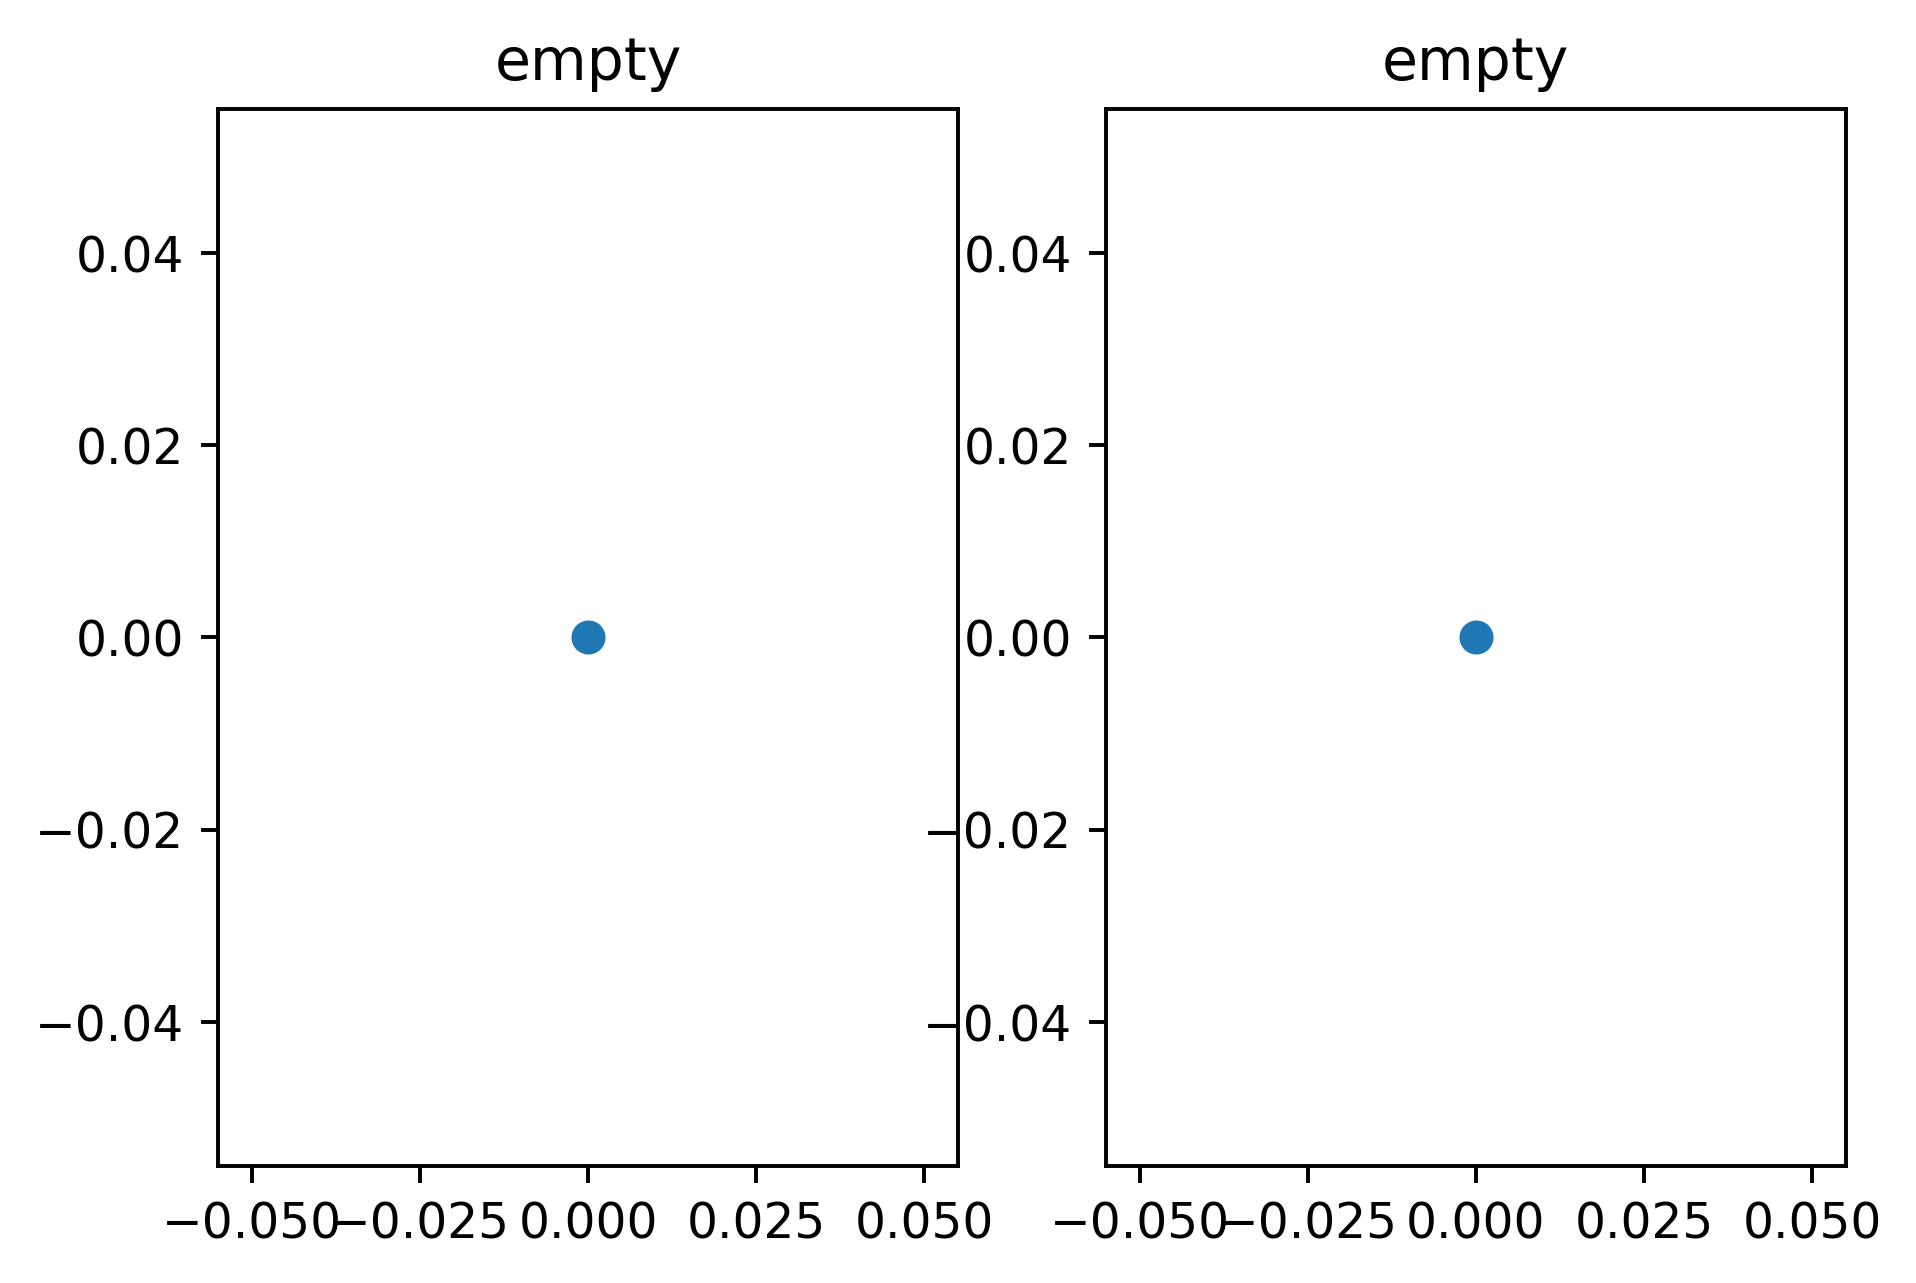

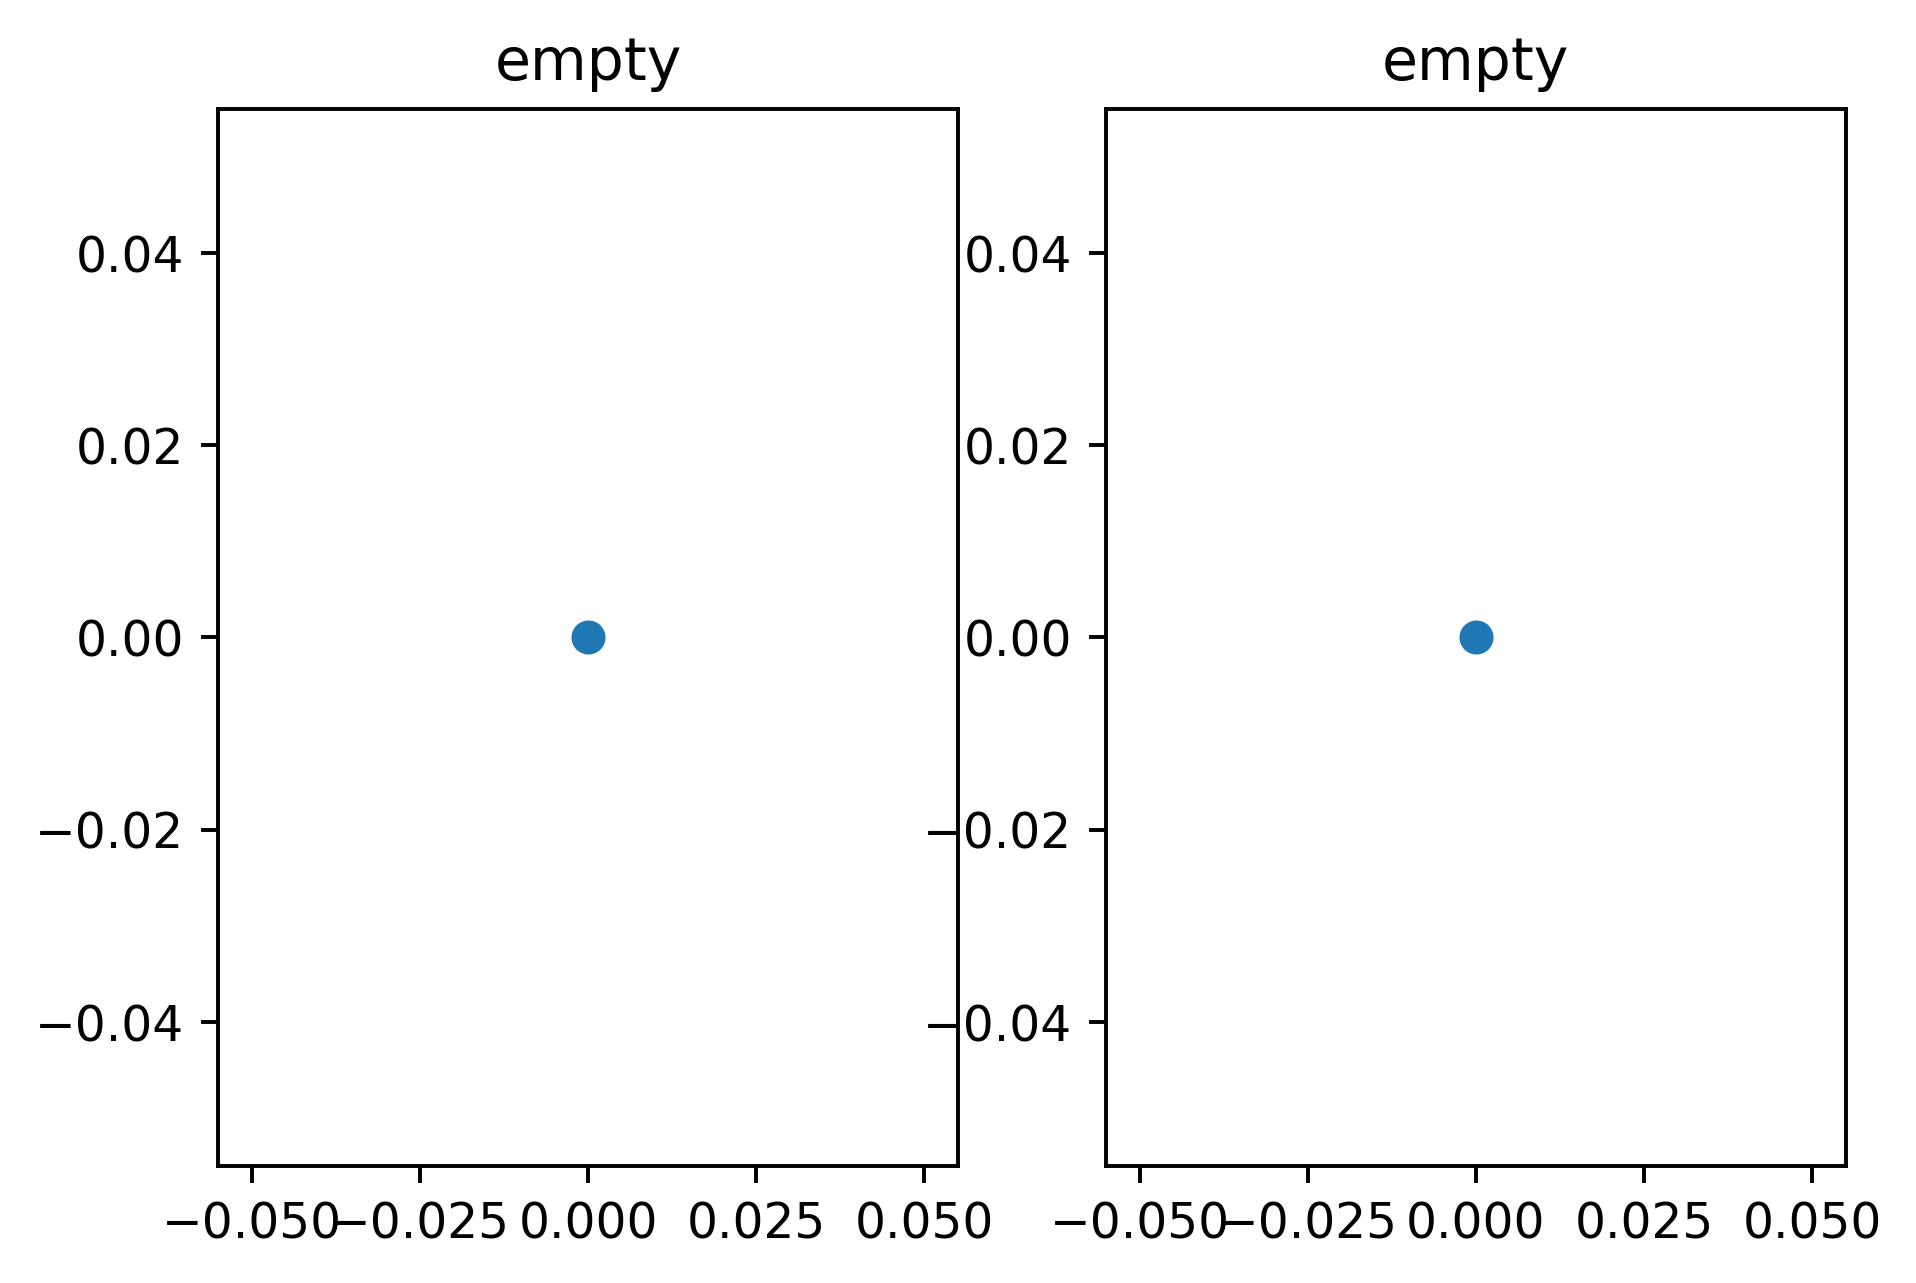

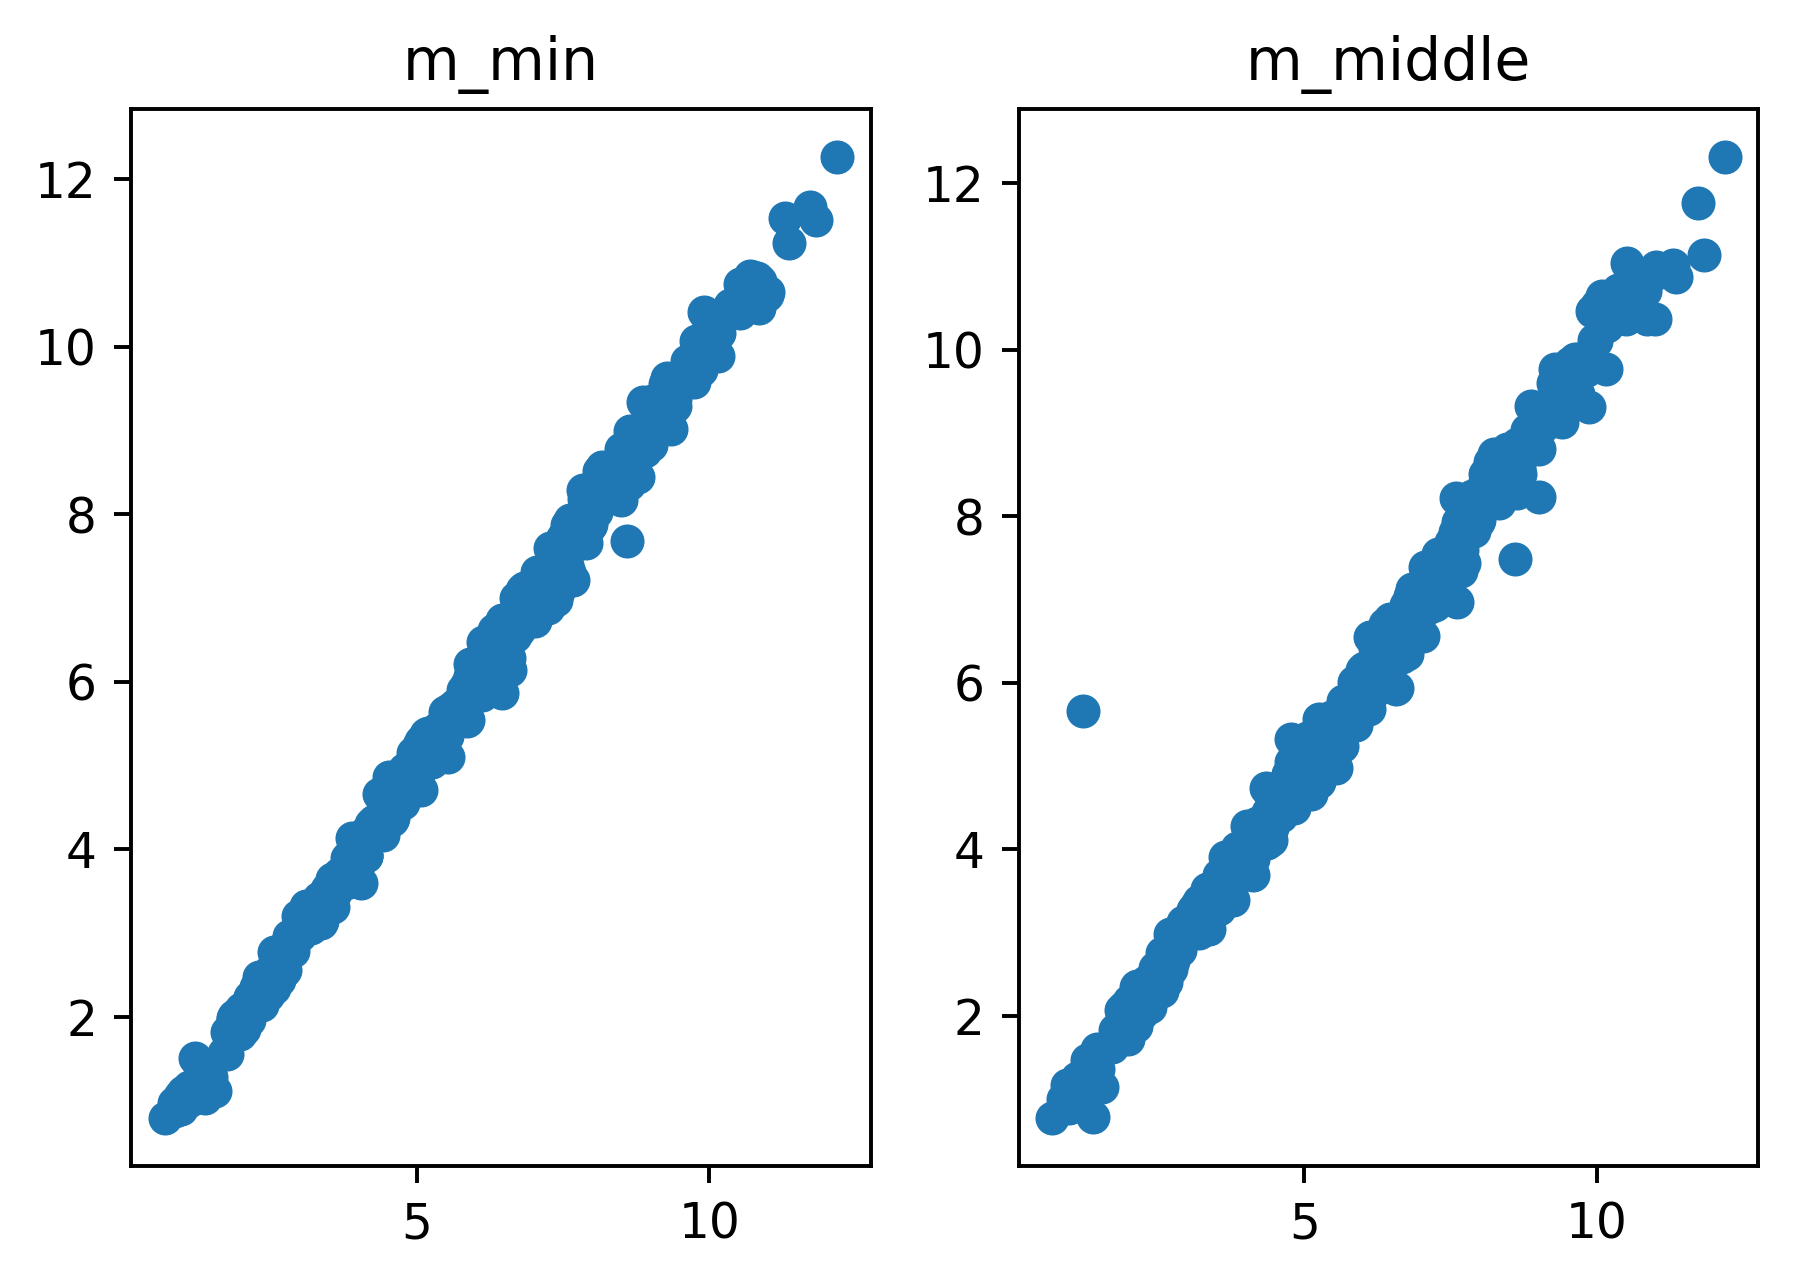

In [39]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(b6_min, b6_middle)
axs[0].set_title('m_min')
axs[1].scatter(b6_min, b6_max)
axs[1].set_title('m_middle')

Text(0.5, 1.0, 'm_middle')

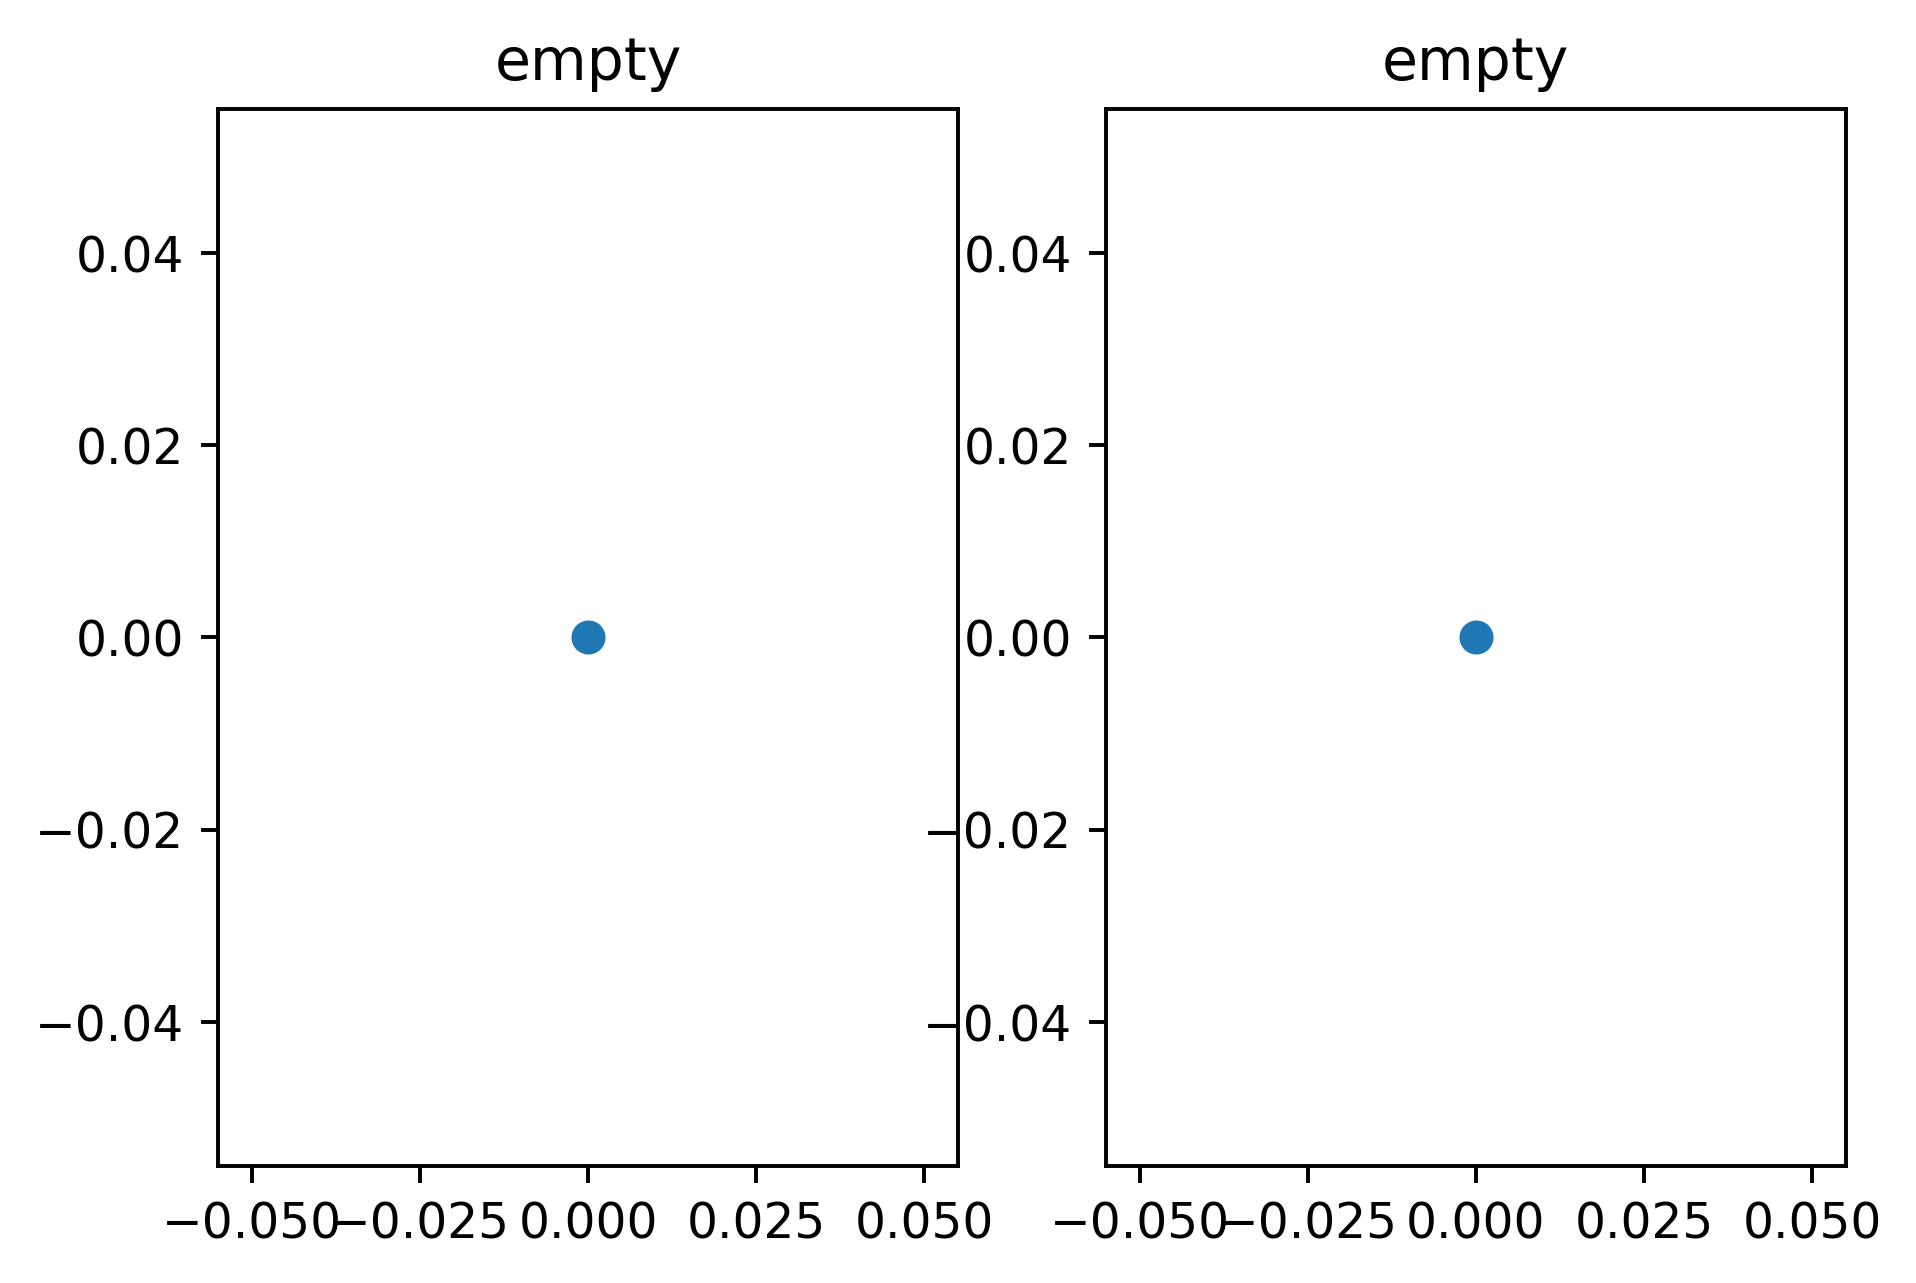

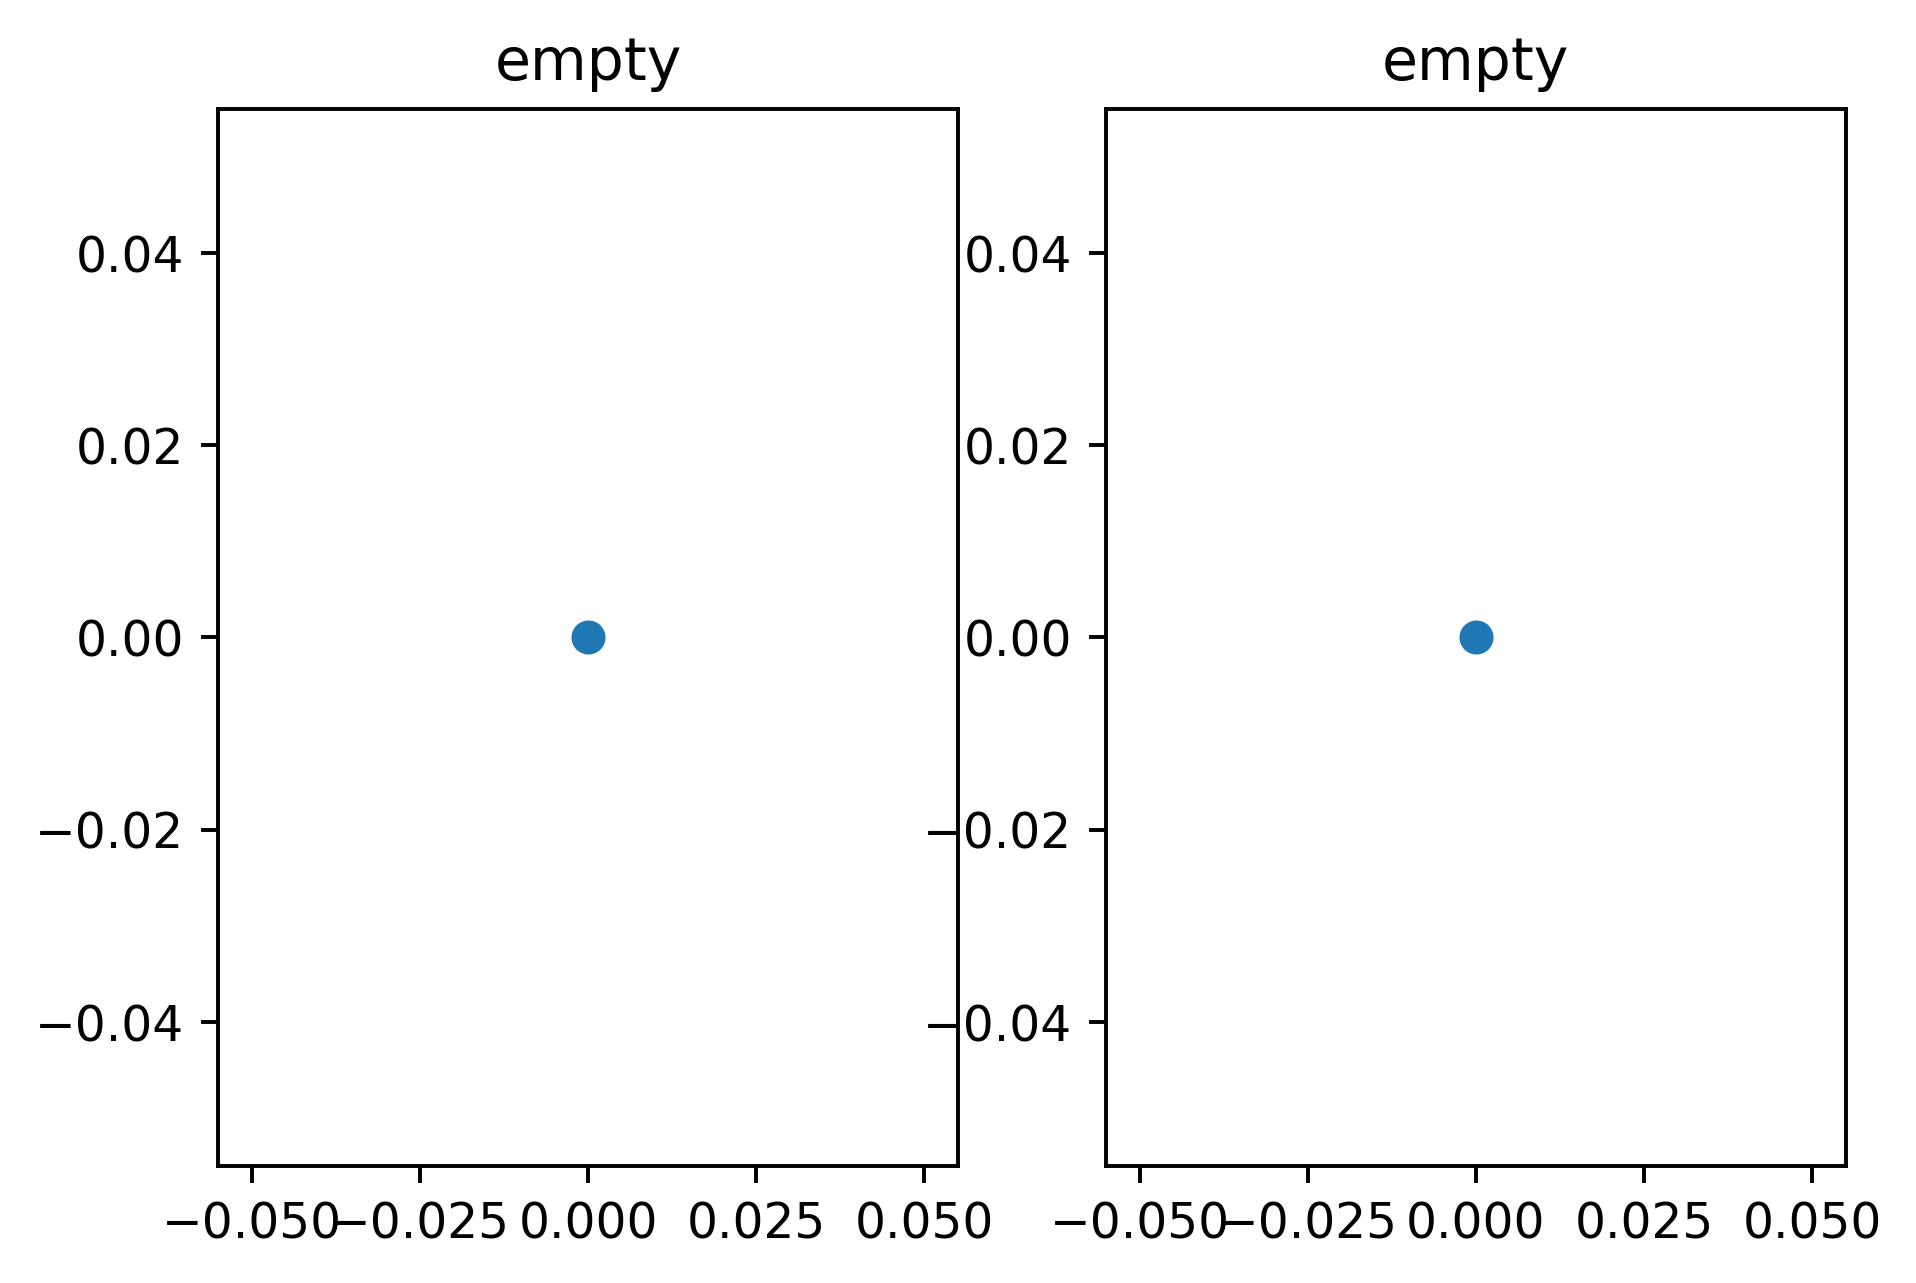

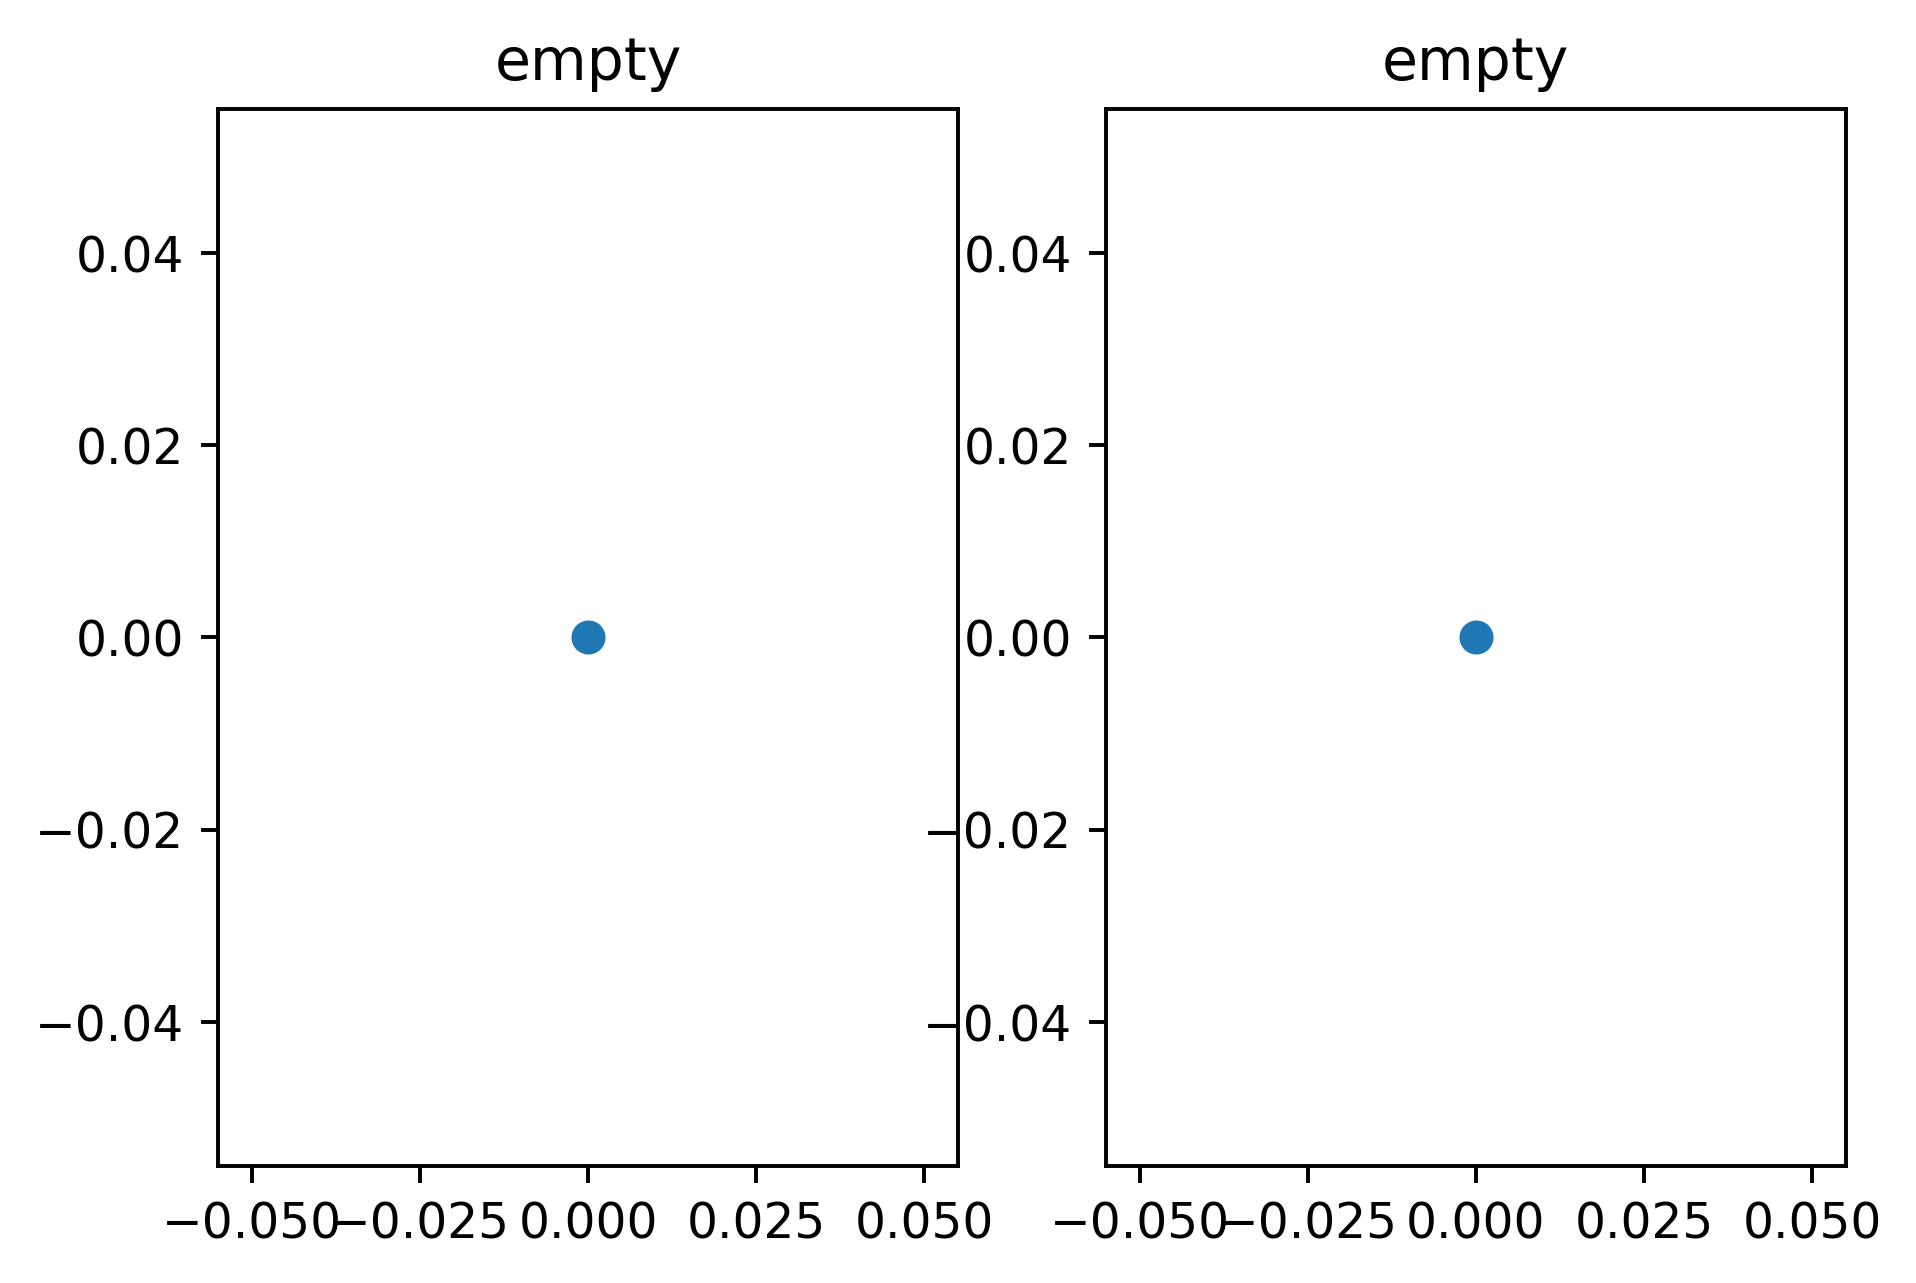

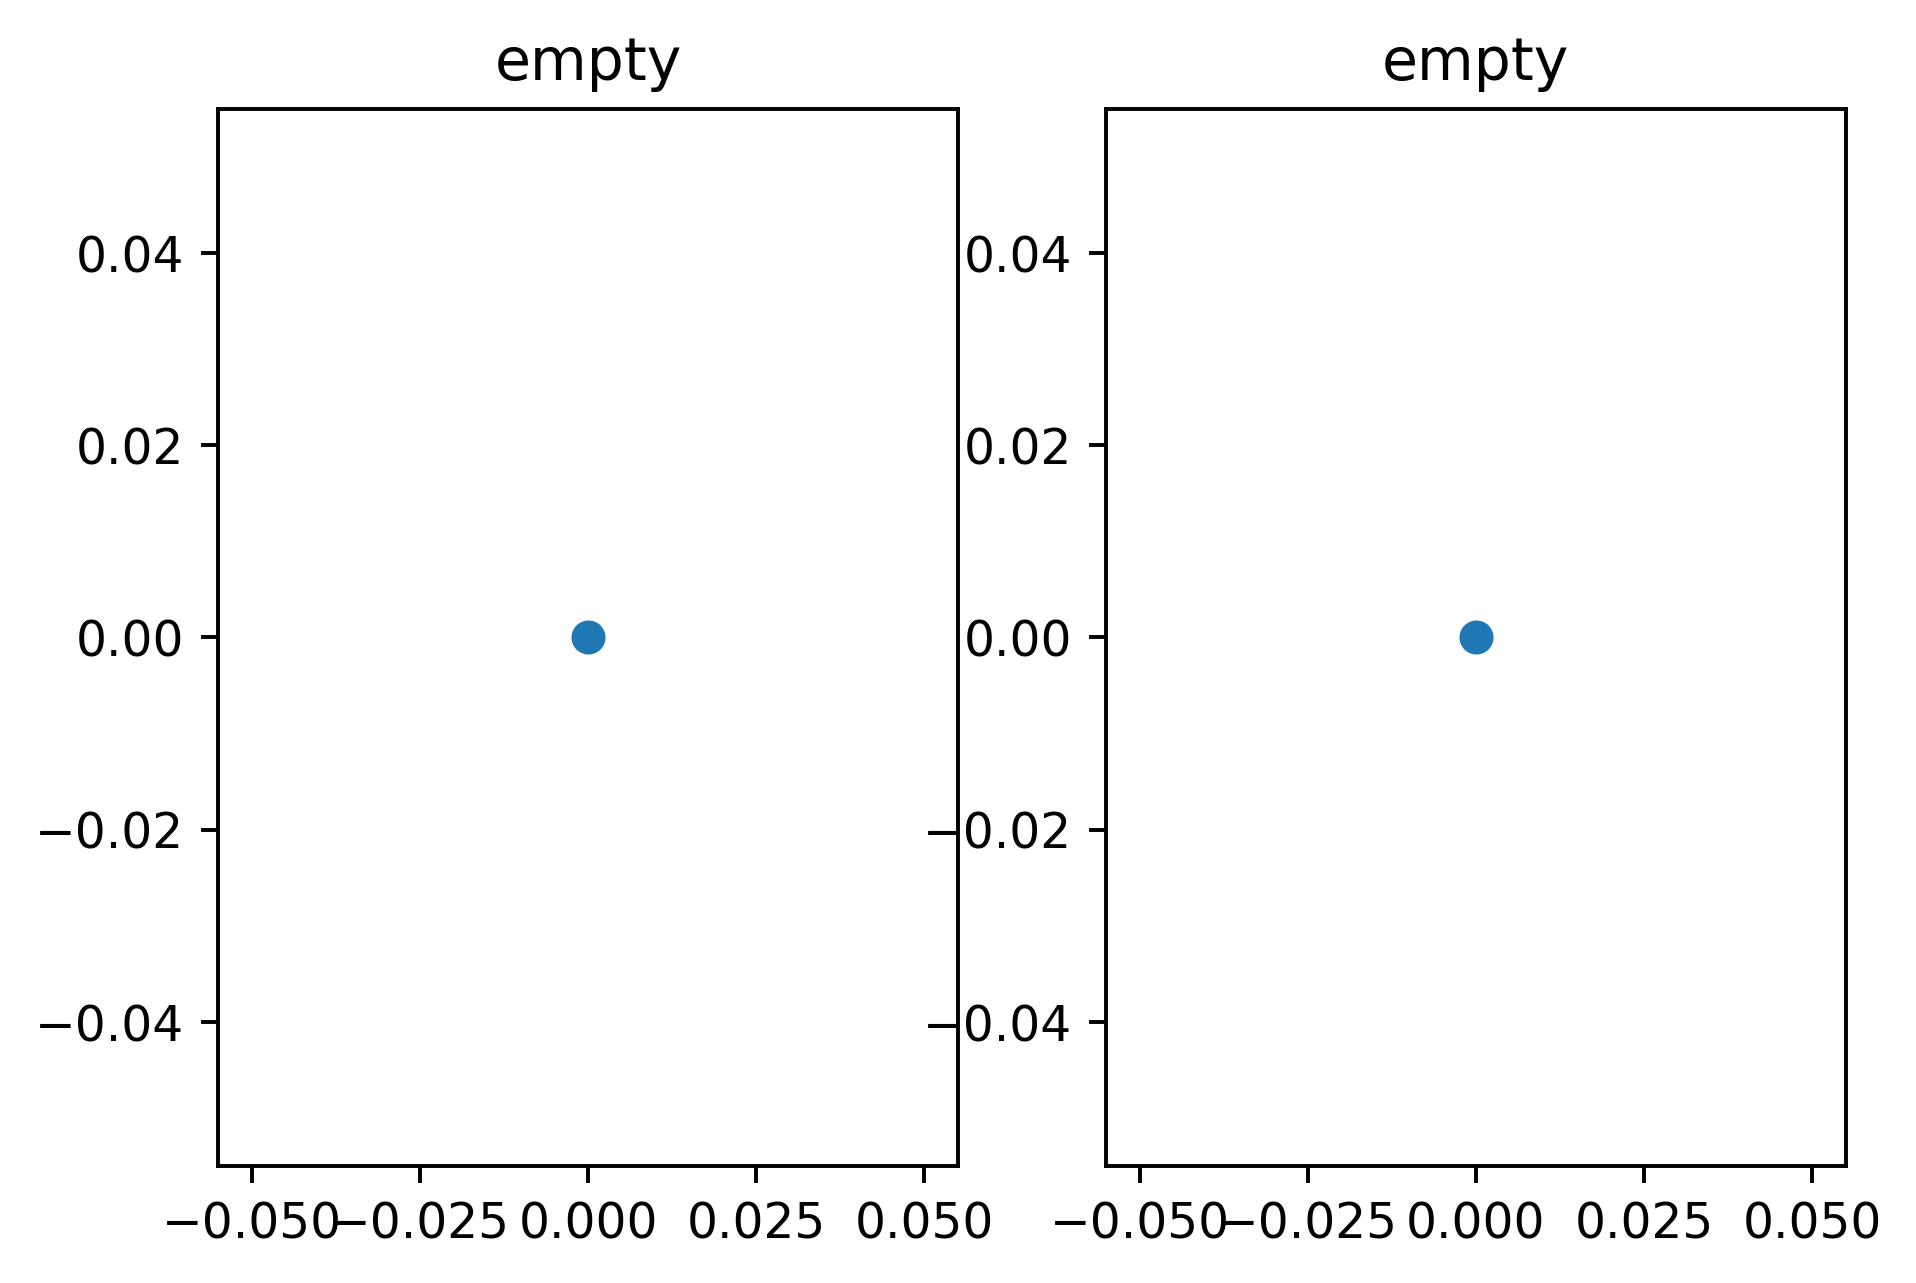

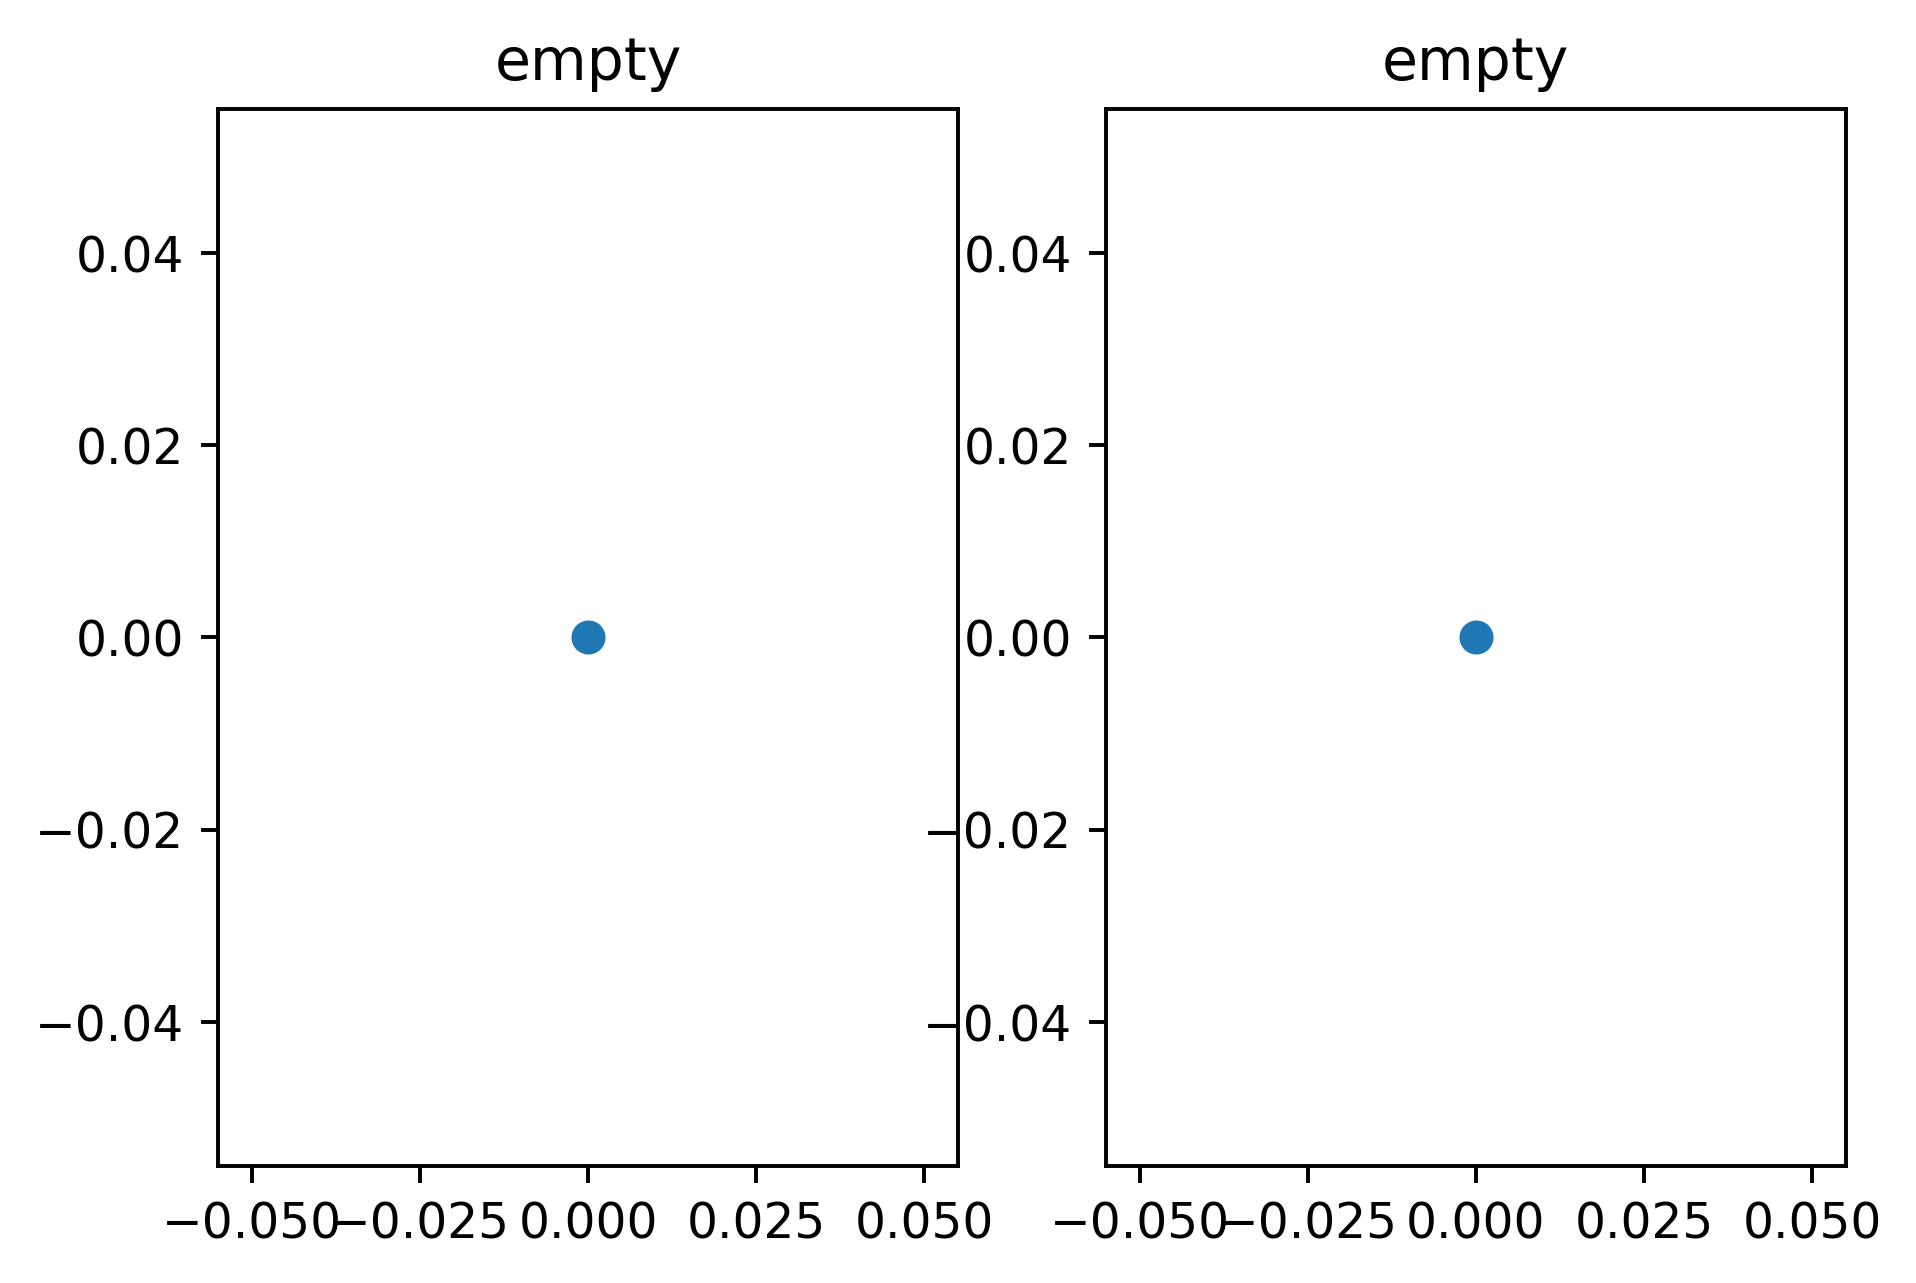

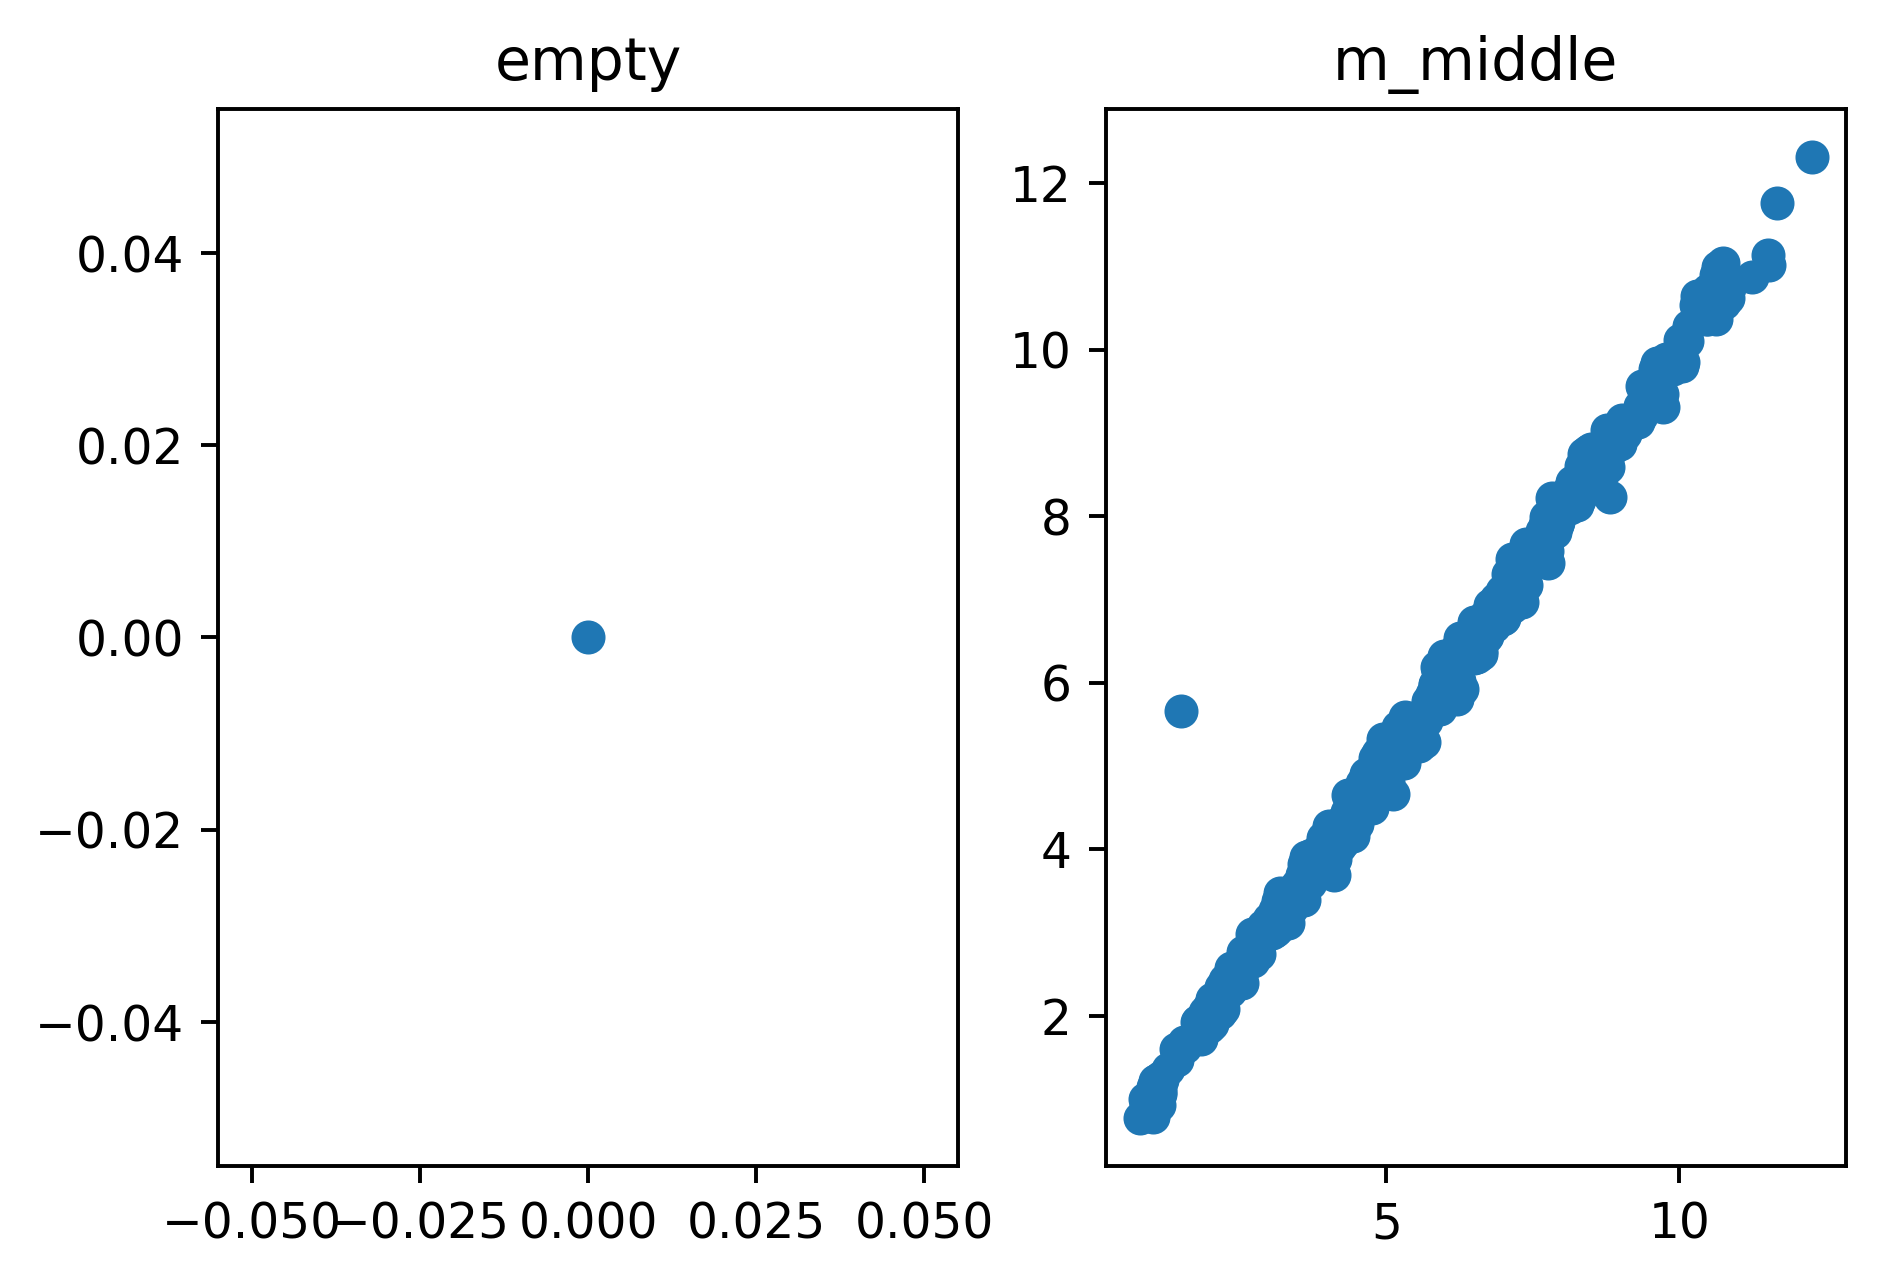

In [38]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0,0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(0, 0)
axs[1].set_title('empty')

fig, axs = plt.subplots(1, 2)
axs[0].scatter(0, 0)
axs[0].set_title('empty')
axs[1].scatter(b6_middle, b6_max)
axs[1].set_title('m_middle')